# Overall Performance Plotting

For FLog project

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import math
import os
import glob
from scipy.optimize import least_squares
sns.set_style(style='white')
from matplotlib.backends.backend_pdf import PdfPages

# os.chdir("/mydir")
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
label_size = 22
ticks_size = 22
legend_size = 20
marker_size = 12
linewidth_t = 4

# 1. Read all groups

In [55]:
day1 = pd.read_csv('data/overall_data/40_80_120_160.csv')
day2 = pd.read_csv('data/overall_data/20_60_100_140.csv')

day1['d'] = day1['3d_d']


# 40 m
ex0_0 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 04:26:10.001Z') & (day1['UTC timestamp'] < '2022-10-24 04:28:04.999Z')]
ex0_1 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 04:29:27.001Z') & (day1['UTC timestamp'] < '2022-10-24 04:30:51.999Z')]
ex0_2 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 04:33:02.001Z') & (day1['UTC timestamp'] < '2022-10-24 04:34:20.999Z')]
ex0_3 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 04:35:44.001Z') & (day1['UTC timestamp'] < '2022-10-24 04:38:01.999Z')]
ex0_4 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 04:38:54.001Z') & (day1['UTC timestamp'] < '2022-10-24 04:40:31.999Z')]
ex0_5 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 04:50:09.001Z') & (day1['UTC timestamp'] < '2022-10-24 04:51:45.999Z')]
ex0_6 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 04:46:18.001Z') & (day1['UTC timestamp'] < '2022-10-24 04:47:43.999Z')]
# 80 m
ex1_0 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 04:54:58.001Z') & (day1['UTC timestamp'] < '2022-10-24 04:57:28.999Z')]
ex1_1 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 04:57:49.001Z') & (day1['UTC timestamp'] < '2022-10-24 04:59:06.999Z')]
ex1_2 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:00:10.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:01:26.999Z')]
ex1_3 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:09:55.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:11:31.999Z')]
ex1_4 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:15:58.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:16:42.999Z')]
ex1_5 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:17:33.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:19:30.999Z')]
ex1_6 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:20:53.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:22:16.999Z')]
# 120 m
ex2_0 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:24:53.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:26:45.999Z')]
ex2_1 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:31:06.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:32:20.999Z')]
ex2_2 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:33:16.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:34:35.999Z')]
ex2_3 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:36:02.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:37:06.999Z')]
ex2_4 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:40:44.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:42:03.999Z')]
ex2_5 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:43:28.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:45:21.999Z')]
ex2_6 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:46:56.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:48:07.999Z')]
# 160 m
ex3_0 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:52:16.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:53:50.999Z')]
ex3_1 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 06:03:42.001Z') & (day1['UTC timestamp'] < '2022-10-24 06:04:47.999Z')]
ex3_2 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 06:05:39.001Z') & (day1['UTC timestamp'] < '2022-10-24 06:07:00.999Z')]
ex3_3 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 06:08:56.001Z') & (day1['UTC timestamp'] < '2022-10-24 06:10:16.999Z')]
ex3_4 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:54:42.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:55:54.999Z')]
ex3_5 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 05:57:41.001Z') & (day1['UTC timestamp'] < '2022-10-24 05:59:04.999Z')]
ex3_6 = day1.loc[(day1['UTC timestamp'] > '2022-10-24 06:00:20.001Z') & (day1['UTC timestamp'] < '2022-10-24 06:01:50.999Z')]
# 20 m
ex4_0 = day2.loc[(day2['UTC timestamp'] > '2022-10-27 07:23:23.000Z') & (day2['UTC timestamp'] < '2022-10-27 07:24:44.999Z') & (day2['datarate'] == 'SF12  ')]
ex4_1 = day2.loc[(day2['UTC timestamp'] > '2022-10-27 07:27:33.000Z') & (day2['UTC timestamp'] < '2022-10-27 07:28:53.999Z') & (day2['datarate'] == 'SF12  ')]
ex4_2 = day2.loc[(day2['UTC timestamp'] > '2022-10-27 07:29:46.000Z') & (day2['UTC timestamp'] < '2022-10-27 07:30:50.999Z') & (day2['datarate'] == 'SF12  ')]
ex4_3 = day2.loc[(day2['UTC timestamp'] > '2022-10-27 07:32:29.000Z') & (day2['UTC timestamp'] < '2022-10-27 07:33:29.999Z') & (day2['datarate'] == 'SF12  ')]
ex4_4 = day2.loc[(day2['UTC timestamp'] > '2022-10-27 07:33:52.000Z') & (day2['UTC timestamp'] < '2022-10-27 07:34:52.999Z') & (day2['datarate'] == 'SF12  ')]
ex4_5 = day2.loc[(day2['UTC timestamp'] > '2022-10-27 07:35:45.000Z') & (day2['UTC timestamp'] < '2022-10-27 07:36:45.999Z') & (day2['datarate'] == 'SF12  ')]
ex4_6 = day2.loc[(day2['UTC timestamp'] > '2022-10-27 07:37:00.000Z') & (day2['UTC timestamp'] < '2022-10-27 07:38:18.999Z') & (day2['datarate'] == 'SF12  ')]
# 60 m 
ex5_0 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 01:40:32.000Z') & (day2['UTC timestamp'] < '2022-10-26 01:41:48.999Z') & (day2['datarate'] == 'SF12  ')]
ex5_1 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 01:44:00.000Z') & (day2['UTC timestamp'] < '2022-10-26 01:45:12.999Z') & (day2['datarate'] == 'SF12  ')]
ex5_2 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 01:47:33.000Z') & (day2['UTC timestamp'] < '2022-10-26 01:49:01.999Z') & (day2['datarate'] == 'SF12  ')]
ex5_3 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 01:49:40.000Z') & (day2['UTC timestamp'] < '2022-10-26 01:50:50.999Z') & (day2['datarate'] == 'SF12  ')]
ex5_4 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 01:56:55.000Z') & (day2['UTC timestamp'] < '2022-10-26 01:57:56.999Z') & (day2['datarate'] == 'SF12  ')]
ex5_5 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 01:58:52.000Z') & (day2['UTC timestamp'] < '2022-10-26 02:00:00.999Z') & (day2['datarate'] == 'SF12  ')]
ex5_6 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 02:02:57.000Z') & (day2['UTC timestamp'] < '2022-10-26 02:04:26.999Z') & (day2['datarate'] == 'SF12  ')]
# 100 m 
ex6_0 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 02:04:02.000Z') & (day2['UTC timestamp'] < '2022-10-26 02:06:53.999Z') & (day2['datarate'] == 'SF12  ')]
ex6_1 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 02:07:00.000Z') & (day2['UTC timestamp'] < '2022-10-26 02:08:59.999Z') & (day2['datarate'] == 'SF12  ')]
ex6_2 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 02:14:03.000Z') & (day2['UTC timestamp'] < '2022-10-26 02:15:23.999Z') & (day2['datarate'] == 'SF12  ')]
ex6_3 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 02:21:38.000Z') & (day2['UTC timestamp'] < '2022-10-26 02:23:25.999Z') & (day2['datarate'] == 'SF12  ')]
ex6_4 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 02:25:14.000Z') & (day2['UTC timestamp'] < '2022-10-26 02:26:50.999Z') & (day2['datarate'] == 'SF12  ')]
ex6_5 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 02:44:22.000Z') & (day2['UTC timestamp'] < '2022-10-26 02:45:52.999Z') & (day2['datarate'] == 'SF12  ')]
ex6_6 = day2.loc[(day2['UTC timestamp'] > '2022-10-26 02:41:12.000Z') & (day2['UTC timestamp'] < '2022-10-26 02:42:39.999Z') & (day2['datarate'] == 'SF12  ')]
# 140m
ex7_0 = day2.loc[(day2['UTC timestamp'] > '2022-10-30 03:26:04.000Z') & (day2['UTC timestamp'] < '2022-10-30 03:27:31.999Z') & (day2['datarate'] == 'SF12  ')]
ex7_4 = day2.loc[(day2['UTC timestamp'] > '2022-10-30 03:30:37.000Z') & (day2['UTC timestamp'] < '2022-10-30 03:31:38.999Z') & (day2['datarate'] == 'SF12  ')]
ex7_5 = day2.loc[(day2['UTC timestamp'] > '2022-10-30 03:34:01.000Z') & (day2['UTC timestamp'] < '2022-10-30 03:35:01.999Z') & (day2['datarate'] == 'SF12  ')]
ex7_6 = day2.loc[(day2['UTC timestamp'] > '2022-10-30 03:35:17.000Z') & (day2['UTC timestamp'] < '2022-10-30 03:36:17.999Z') & (day2['datarate'] == 'SF12  ')]

ex0_0['i'] = (ex0_0['i']//40 - 1).astype(int)
ex0_1['i'] = (ex0_1['i']//40 - 1).astype(int)
ex0_2['i'] = (ex0_2['i']//40 - 1).astype(int)
ex0_3['i'] = (ex0_3['i']//40 - 1).astype(int)
ex0_4['i'] = (ex0_4['i']//40 - 1).astype(int)
ex0_5['i'] = (ex0_5['i']//40 - 1).astype(int)
ex0_6['i'] = (ex0_6['i']//40 - 1).astype(int)

ex1_0['i'] = (ex1_0['i']//40 - 1).astype(int)
ex1_1['i'] = (ex1_1['i']//40 - 1).astype(int)
ex1_2['i'] = (ex1_2['i']//40 - 1).astype(int)
ex1_3['i'] = (ex1_3['i']//40 - 1).astype(int)
ex1_4['i'] = (ex1_4['i']//40 - 1).astype(int)
ex1_5['i'] = (ex1_5['i']//40 - 1).astype(int)
ex1_6['i'] = (ex1_6['i']//40 - 1).astype(int)

ex2_0['i'] = (ex2_0['i']//40 - 1).astype(int)
ex2_1['i'] = (ex2_1['i']//40 - 1).astype(int)
ex2_2['i'] = (ex2_2['i']//40 - 1).astype(int)
ex2_3['i'] = (ex2_3['i']//40 - 1).astype(int)
ex2_4['i'] = (ex2_4['i']//40 - 1).astype(int)
ex2_5['i'] = (ex2_5['i']//40 - 1).astype(int)
ex2_6['i'] = (ex2_6['i']//40 - 1).astype(int)

ex3_0['i'] = (ex3_0['i']//40 - 1).astype(int)
ex3_1['i'] = (ex3_1['i']//40 - 1).astype(int)
ex3_2['i'] = (ex3_2['i']//40 - 1).astype(int)
ex3_3['i'] = (ex3_3['i']//40 - 1).astype(int)
ex3_4['i'] = (ex3_4['i']//40 - 1).astype(int)
ex3_5['i'] = (ex3_5['i']//40 - 1).astype(int)
ex3_6['i'] = (ex3_6['i']//40 - 1).astype(int)

ex0_0['j'] = ex0_0['j'].astype(int)
ex0_1['j'] = ex0_1['j'].astype(int)
ex0_2['j'] = ex0_2['j'].astype(int)
ex0_3['j'] = ex0_3['j'].astype(int)
ex0_4['j'] = ex0_4['j'].astype(int)
ex0_5['j'] = ex0_5['j'].astype(int)
ex0_6['j'] = ex0_6['j'].astype(int)

ex1_0['j'] = ex1_0['j'].astype(int)
ex1_1['j'] = ex1_1['j'].astype(int)
ex1_2['j'] = ex1_2['j'].astype(int)
ex1_3['j'] = ex1_3['j'].astype(int)
ex1_4['j'] = ex1_4['j'].astype(int)
ex1_5['j'] = ex1_5['j'].astype(int)
ex1_6['j'] = ex1_6['j'].astype(int)

ex2_0['j'] = ex2_0['j'].astype(int)
ex2_1['j'] = ex2_1['j'].astype(int)
ex2_2['j'] = ex2_2['j'].astype(int)
ex2_3['j'] = ex2_3['j'].astype(int)
ex2_4['j'] = ex2_4['j'].astype(int)
ex2_5['j'] = ex2_5['j'].astype(int)
ex2_6['j'] = ex2_6['j'].astype(int)

ex3_0['j'] = ex3_0['j'].astype(int)
ex3_1['j'] = ex3_1['j'].astype(int)
ex3_2['j'] = ex3_2['j'].astype(int)
ex3_3['j'] = ex3_3['j'].astype(int)
ex3_4['j'] = ex3_4['j'].astype(int)
ex3_5['j'] = ex3_5['j'].astype(int)
ex3_6['j'] = ex3_6['j'].astype(int)

d3 = math.pow(20*20 + 9.55**2, 0.5)
ex4_0["i"] = 4
ex4_0["j"] = 0
ex4_0["d"] = d3

ex4_1["i"] = 4
ex4_1["j"] = 1
ex4_1["d"] = d3

ex4_2["i"] = 4
ex4_2["j"] = 2
ex4_2["d"] = d3

ex4_3["i"] = 4
ex4_3["j"] = 3
ex4_3["d"] = d3

ex4_4["i"] = 4
ex4_4["j"] = 4
ex4_4["d"] = d3

ex4_5["i"] = 4
ex4_5["j"] = 5
ex4_5["d"] = d3

ex4_6["i"] = 4
ex4_6["j"] = 6
ex4_6["d"] = d3

d0 = math.pow(60*60 + 9.55**2, 0.5)
ex5_0["i"] = 5
ex5_0["j"] = 0
ex5_0["d"] = d0

ex5_1["i"] = 5
ex5_1["j"] = 1
ex5_1["d"] = d0

ex5_2["i"] = 5
ex5_2["j"] = 2
ex5_2["d"] = d0

ex5_3["i"] = 5
ex5_3["j"] = 3
ex5_3["d"] = d0

ex5_4["i"] = 5
ex5_4["j"] = 4
ex5_4["d"] = d0

ex5_5["i"] = 5
ex5_5["j"] = 5
ex5_5["d"] = d0

ex5_6["i"] = 5
ex5_6["j"] = 6
ex5_6["d"] = d0

d1 = math.pow(100*100 + 9.55**2, 0.5)
ex6_0["i"] = 6
ex6_0["j"] = 0
ex6_0["d"] = d1

ex6_1["i"] = 6
ex6_1["j"] = 1
ex6_1["d"] = d1

ex6_2["i"] = 6
ex6_2["j"] = 2
ex6_2["d"] = d1

ex6_3["i"] = 6
ex6_3["j"] = 3
ex6_3["d"] = d1

ex6_4["i"] = 6
ex6_4["j"] = 4
ex6_4["d"] = d1

ex6_5["i"] = 6
ex6_5["j"] = 5
ex6_5["d"] = d1

ex6_6["i"] = 6
ex6_6["j"] = 6
ex6_6["d"] = d1

d2 = math.pow(140*140 + 9.55**2, 0.5)
ex7_0["i"] = 7
ex7_0["j"] = 0
ex7_0["d"] = d2

ex7_4["i"] = 7
ex7_4["j"] = 4
ex7_4["d"] = d2

ex7_5["i"] = 7
ex7_5["j"] = 5
ex7_5["d"] = d2

ex7_6["i"] = 7
ex7_6["j"] = 6
ex7_6["d"] = d2

overall_data_40 = pd.concat([ex0_0,ex0_1,ex0_2,ex0_3,ex0_4,ex0_5,ex0_6])
overall_data_80 = pd.concat([ex1_0,ex1_1,ex1_2,ex1_3,ex1_4,ex1_5,ex1_6])
overall_data_120 = pd.concat([ex2_0,ex2_1,ex2_2,ex2_3,ex2_4,ex2_5,ex2_6])
overall_data_160 = pd.concat([ex3_0,ex3_1,ex3_2,ex3_3,ex3_4,ex3_5,ex3_6])
overall_data_20 = pd.concat([ex4_0,ex4_1,ex4_2,ex4_3,ex4_4,ex4_5,ex4_6])
overall_data_60 = pd.concat([ex5_0,ex5_1,ex5_2,ex5_3,ex5_4,ex5_5,ex5_6])
overall_data_100 = pd.concat([ex6_0,ex6_1,ex6_2,ex6_3,ex6_4,ex6_5,ex6_6])
overall_data_140 = pd.concat([ex7_0,ex7_4,ex7_5,ex7_6])

ex_day1 = pd.concat([ex0_0, ex0_1, ex0_2, ex0_3, ex0_4, ex0_5, ex0_6,
                  ex1_0, ex1_1, ex1_2, ex1_3, ex1_4, ex1_5, ex1_6,
                 ex2_0, ex2_1, ex2_2, ex2_3, ex2_4, ex2_5, ex2_6,
                 ex3_0, ex3_1, ex3_2, ex3_3, ex3_4, ex3_5, ex3_6])
ex_day2 = pd.concat([ex4_0, ex4_1, ex4_2, ex4_3, ex4_4, ex4_5, ex4_6,
                ex5_0, ex5_1, ex5_2, ex5_3, ex5_4, ex5_5, ex5_6,
                ex6_0, ex6_1, ex6_2, ex6_3, ex6_4, ex6_5, ex6_6,
                ex7_0, ex7_4, ex7_5, ex7_6])

dataset = [overall_data_40, overall_data_80, overall_data_120, overall_data_160, overall_data_20, overall_data_60, overall_data_100, overall_data_140]
train = []
test = []

/var/folders/1q/sx3pcz5j40ggydwylb__q4mr0000gn/T/ipykernel_14420/3580407845.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex0_0['i'] = (ex0_0['i']//40 - 1).astype(int)
/var/folders/1q/sx3pcz5j40ggydwylb__q4mr0000gn/T/ipykernel_14420/3580407845.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex0_1['i'] = (ex0_1['i']//40 - 1).astype(int)
/var/folders/1q/sx3pcz5j40ggydwylb__q4mr0000gn/T/ipykernel_14420/3580407845.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

# 2. Sampling


In [56]:
# Struct of tree
class Tree:
    def __init__(self, loc_x, loc_y, mid_z, hori_r, vert_r, trunk_r):
        self.loc_x = loc_x
        self.loc_y = loc_y
        self.mid_z = mid_z
        self.hori_r = hori_r
        self.vert_r = vert_r
        self.trunk_h = mid_z - vert_r + 0.5
        self.trunk_r = trunk_r
        
    def CheckPtFoliage(self, x, y, z):
        if(((x-self.loc_x)*(x-self.loc_x))/(self.hori_r*self.hori_r) + ((y-self.loc_y)*(y-self.loc_y))/(self.hori_r*self.hori_r) + ((z-self.mid_z)*(z-self.mid_z))/(self.vert_r*self.vert_r) > 1): return False
        else: return True
        
    def CheckPtTrunk(self, x, y, z):
        if (z > self.trunk_h or z < 0): return False
        elif ((x-self.loc_x)*(x-self.loc_x) + (y-self.loc_y)*(y-self.loc_y) - self.trunk_r*self.trunk_r > 0): return False
        else: return True
        
def CheckPtGround(z):
    if(z > 0): return False
    else: return True


In [57]:
def SampPairLineOverall(g_x, g_y, g_z, n_x, n_y, n_z, t_x, t_y, mid_z, topo, hori_r, vert_r, trunk_r, offset_x, offset_y, n, f, plane_gap, point_gap):
    empties = [[6,1],[8,23],[10,23],[13,22],[17,21],[18,9],[20,15],[21,11],[22,22],[22,31],[23,11],[25,8],[27,16],[36,8],[37,8],[38,2],[38,16],[38,28],[40,8]]
    sample_rec = []
    distance_gn = math.pow(((g_x-n_x)*(g_x-n_x) + (g_y-n_y)*(g_y-n_y) + (g_z-n_z)*(g_z-n_z)), 0.5)
    distance_hori_gn = math.pow(((g_x-n_x)*(g_x-n_x) + (g_y-n_y)*(g_y-n_y)), 0.5)
    xy = math.pow(((g_x-n_x)*(g_x-n_x) + (g_y-n_y)*(g_y-n_y)), 0.5)
    xyz = math.pow(((g_x-n_x)*(g_x-n_x) + (g_y-n_y)*(g_y-n_y) + (g_z-n_z)*(g_z-n_z)), 0.5)
    xyoxyz = xy / xyz
    yoxy = (g_y-n_y) / xy
    xoxy = (g_x-n_x) / xy
    yoxyz = (g_y-n_y) / xyz
    xoxyz = (g_x-n_x) / xyz
    zoxyz = (g_z-n_z) / xyz
    # Given a pair, find the related trees
    trees = []
    for i in range(45):
        for j in range(33):
            # check if one tree is possible to affect the path
            if([i,j] in empties):
                continue
            if(topo == 1 or j % 2 == 0):
                if(math.pow(((t_x+i*offset_x-n_x)*(t_x+i*offset_x-n_x) + (t_y+j*offset_y-n_y)*(t_y+j*offset_y-n_y)), 0.5) + math.pow(((t_x+i*offset_x-g_x)*(t_x+i*offset_x-g_x) + (t_y+j*offset_y-g_y)*(t_y+j*offset_y-g_y)), 0.5) < distance_hori_gn + (300/f) + 2*hori_r):
                    trees.append(Tree(t_x+i*offset_x, t_y+j*offset_y, mid_z, hori_r, vert_r, trunk_r))
            else:
                if(math.pow(((t_x+(i+0.5)*offset_x -n_x)*(t_x+(i+0.5)*offset_x-n_x) + (t_y+j*offset_y-n_y)*(t_y+j*offset_y-n_y)), 0.5) + math.pow(((t_x+(i+0.5)*offset_x-g_x)*(t_x+(i+0.5)*offset_x-g_x) + (t_y+j*offset_y-g_y)*(t_y+j*offset_y-g_y)), 0.5) < distance_hori_gn + (300/f) + 2*hori_r):
                    trees.append(Tree(t_x+(i+0.5)*offset_x, t_y+j*offset_y, mid_z, hori_r, vert_r, trunk_r))
    print("For this pair, ", len(trees), " trees are suspicious.")
    length_ref = 1
    num_pts = 0
    num_blk_pts = 0
    num_sdw_pts = 0
    for d in np.arange(length_ref, distance_gn, plane_gap):
        if(distance_gn - d < plane_gap):
            break
        else:
            c_x = n_x + d * xoxyz
            c_y = n_y + d * yoxyz
            c_z = n_z + d * zoxyz
            num_pts += 1
            if(CheckPtGround(c_z)): 
                num_blk_pts += 1
                continue
            else:
                for t in trees:
                    if(t.CheckPtTrunk(c_x, c_y, c_z)):
                        num_sdw_pts += 1
                    elif(t.CheckPtFoliage(c_x, c_y, c_z)):
                        num_sdw_pts += 1
    sample_rec = [num_pts, num_blk_pts, num_sdw_pts]
    return sample_rec

In [58]:
# Fan shape scan, line, 0.25m 40-160, annotated for excecution speed

# recs = []
# for j in range(40, 200, 40):
#     recs_sub = []
#     for i in range(0,105,15):
#         x = np.cos(np.radians(i)) * j + 9.76
#         y = np.sin(np.radians(i)) * j + 4
#         print(i, j, x, y)
#         recs_sub.append(SampPairLineOverall(9.76, 4, 10, x, y, 0.45, 0, 0, 3.3, 2, 2.8, 2.8, 0.1, 4.88, 6.66, 3, 904.3, 0.25, 0.1))
# #     print("Here",j, ":", recs_sub)
#     recs.append(recs_sub)
# print(recs)

In [59]:
# Fan shape scan, line, 0.25m 20-140, annotated for excecution speed


# recs = []
# for j in range(20, 180, 40):
#     recs_sub = []
#     for i in range(0,105,15):
#         x = np.cos(np.radians(i)) * j + 9.76
#         y = np.sin(np.radians(i)) * j + 4
#         print(i, j, x, y)
#         recs_sub.append(SampPairLineOverall(9.76, 4, 10, x, y, 0.45, 0, 0, 3.3, 2, 2.8, 2.8, 0.1, 4.88, 6.66, 3, 904.3, 0.25, 0.1))
# #     print("Here",j, ":", recs_sub)
#     recs.append(recs_sub)
# print(recs)

## Sampling Results

In [60]:
overall_samp_result1 = [[[[162701, 0, 0], [129309, 0, 0], [107113, 0, 0], [91193, 0, 0], [79289, 0, 0], [70065, 0, 0], [62657, 0, 6], [56601, 0, 2082], [51529, 0, 4294], [47273, 0, 5849], [43585, 0, 6718], [40421, 0, 6987], [37641, 0, 6784], [35181, 0, 6208], [33017, 0, 5348], [31077, 0, 4269], [29313, 0, 3055], [27669, 0, 1779], [26285, 0, 609], [24961, 0, 0], [23709, 0, 0], [22609, 0, 63], [21593, 0, 1393], [20673, 0, 2934], [19797, 0, 4271], [18941, 0, 5310], [18197, 0, 6078], [17473, 0, 6602], [16801, 0, 6896], [16173, 0, 7009], [15573, 0, 6936], [15005, 0, 6713], [14441, 0, 6365], [13965, 0, 5924], [13509, 0, 5378], [13061, 0, 4758], [12629, 0, 4204], [12217, 0, 3587], [11833, 0, 2855], [11449, 0, 2023], [11101, 0, 1516], [10765, 0, 1894], [10437, 0, 2634], [10129, 0, 3206], [9825, 0, 3590], [9569, 0, 3826], [9281, 0, 3939], [9009, 0, 4030], [8773, 0, 4101], [8529, 0, 4079], [8293, 0, 3988], [8069, 0, 3833], [7845, 0, 3617], [7653, 0, 3351], [7433, 0, 3065], [7237, 0, 2814], [7049, 0, 2509], [6869, 0, 2146], [6721, 0, 1730], [6525, 0, 1241], [6369, 0, 737], [6221, 0, 413], [6041, 0, 348], [5909, 0, 279], [5753, 0, 179], [5621, 0, 93], [5465, 0, 12], [5345, 0, 0], [5209, 0, 0], [5073, 0, 0], [4957, 0, 0], [4849, 0, 0], [4709, 0, 0], [4621, 0, 0], [4493, 0, 0], [4397, 0, 0], [4281, 0, 12], [4189, 0, 31], [4061, 0, 44], [3985, 0, 49], [3885, 0, 40], [3793, 0, 56], [3705, 0, 148], [3593, 0, 255], [3521, 0, 352], [3433, 0, 428], [3357, 0, 481], [3289, 0, 509], [3189, 0, 510], [3125, 0, 500], [3041, 0, 468], [2965, 0, 419], [2885, 0, 357], [2809, 0, 287], [2749, 0, 207], [2701, 0, 131], [2609, 0, 55], [2561, 0, 3], [2477, 0, 0], [2417, 0, 0], [2361, 0, 0], [2305, 0, 0], [2241, 0, 0], [2185, 0, 0], [2109, 0, 0], [2077, 0, 0], [2009, 0, 0], [1941, 0, 0], [1893, 0, 0], [1861, 0, 0], [1789, 0, 0], [1749, 0, 0], [1693, 0, 0], [1649, 0, 0], [1597, 0, 0], [1565, 0, 0], [1489, 0, 0], [1457, 0, 0], [1413, 0, 0], [1361, 0, 0], [1321, 0, 0], [1281, 0, 0], [1237, 0, 0], [1201, 0, 0], [1153, 0, 0], [1109, 0, 0], [1085, 0, 0], [1041, 0, 0], [997, 0, 0], [965, 0, 0], [933, 0, 0], [885, 0, 0], [853, 0, 0], [805, 0, 0], [777, 0, 0], [749, 0, 0], [709, 0, 0], [673, 0, 0], [641, 0, 0], [609, 0, 0], [577, 0, 0], [553, 0, 0], [509, 0, 0], [489, 0, 0], [437, 0, 0], [421, 0, 0], [385, 0, 0], [357, 0, 0], [341, 0, 0], [293, 0, 0], [277, 0, 0], [241, 0, 0], [221, 0, 0], [193, 0, 0], [177, 0, 0], [137, 0, 0], [113, 0, 0], [89, 0, 0], [61, 0, 0], [37, 0, 0]], [[162701, 0, 32286], [129309, 0, 22024], [107113, 0, 13394], [91193, 0, 6340], [79289, 0, 1234], [70065, 0, 0], [62657, 0, 6502], [56601, 0, 18149], [51529, 0, 26346], [47273, 0, 31254], [43585, 0, 33709], [40421, 0, 34505], [37641, 0, 34219], [35181, 0, 33241], [33017, 0, 31903], [31077, 288, 30077], [29313, 0, 28762], [27669, 0, 27100], [26285, 0, 25501], [24961, 0, 23790], [23709, 0, 21922], [22609, 0, 19914], [21593, 0, 17659], [20673, 0, 15097], [19797, 0, 14993], [18941, 0, 14938], [18197, 0, 13268], [17473, 0, 10655], [16801, 0, 11842], [16173, 0, 12572], [15573, 0, 12955], [15005, 0, 13074], [14441, 0, 12976], [13965, 0, 12776], [13509, 0, 12471], [13061, 0, 12074], [12629, 0, 11595], [12217, 0, 11037], [11833, 0, 10414], [11449, 0, 9699], [11101, 0, 8877], [10765, 0, 7934], [10437, 0, 6825], [10129, 0, 5549], [9825, 0, 4705], [9569, 0, 3600], [9281, 0, 2078], [9009, 0, 2595], [8773, 0, 3008], [8529, 0, 3331], [8293, 0, 3542], [8069, 0, 3643], [7845, 0, 3655], [7653, 0, 3574], [7433, 0, 3414], [7237, 0, 3215], [7049, 0, 2997], [6869, 0, 2727], [6721, 0, 2424], [6525, 0, 2061], [6369, 0, 1670], [6221, 0, 1242], [6041, 0, 785], [5909, 0, 346], [5753, 0, 2], [5621, 0, 0], [5465, 0, 0], [5345, 0, 14], [5209, 0, 69], [5073, 0, 123], [4957, 0, 162], [4849, 0, 188], [4709, 0, 185], [4621, 0, 176], [4493, 0, 140], [4397, 0, 103], [4281, 0, 54], [4189, 0, 11], [4061, 0, 0], [3985, 0, 111], [3885, 0, 349], [3793, 0, 564], [3705, 0, 744], [3593, 0, 870], [3521, 0, 970], [3433, 0, 1030], [3357, 0, 1060], [3289, 0, 1068], [3189, 0, 1036], [3125, 0, 1002], [3041, 0, 936], [2965, 0, 848], [2885, 0, 748], [2809, 0, 633], [2749, 0, 507], [2701, 0, 379], [2609, 0, 235], [2561, 0, 108], [2477, 0, 5], [2417, 0, 10], [2361, 0, 81], [2305, 0, 155], [2241, 0, 217], [2185, 0, 265], [2109, 0, 288], [2077, 0, 310], [2009, 0, 309], [1941, 0, 292], [1893, 0, 272], [1861, 0, 239], [1789, 0, 193], [1749, 0, 150], [1693, 0, 99], [1649, 0, 47], [1597, 0, 5], [1565, 0, 0], [1489, 0, 0], [1457, 0, 0], [1413, 0, 0], [1361, 0, 0], [1321, 0, 0], [1281, 0, 0], [1237, 0, 0], [1201, 0, 0], [1153, 0, 0], [1109, 0, 0], [1085, 0, 0], [1041, 0, 0], [997, 0, 0], [965, 0, 0], [933, 0, 0], [885, 0, 0], [853, 0, 0], [805, 0, 0], [777, 0, 0], [749, 0, 0], [709, 0, 0], [673, 0, 0], [641, 0, 0], [609, 0, 0], [577, 0, 0], [553, 0, 0], [509, 0, 0], [489, 0, 0], [437, 0, 0], [421, 0, 0], [385, 0, 0], [357, 0, 0], [341, 0, 0], [293, 0, 0], [277, 0, 0], [241, 0, 0], [221, 0, 0], [193, 0, 0], [177, 0, 0], [137, 0, 0], [113, 0, 0], [89, 0, 0], [61, 0, 0], [37, 0, 0]], [[162701, 0, 0], [129309, 0, 0], [107113, 0, 0], [91193, 0, 0], [79289, 0, 0], [70065, 0, 0], [62657, 0, 0], [56601, 0, 0], [51529, 0, 2402], [47273, 0, 7316], [43585, 0, 11263], [40421, 0, 13978], [37641, 0, 15610], [35181, 0, 16396], [33017, 0, 16560], [31077, 0, 16232], [29313, 0, 15529], [27669, 0, 14523], [26285, 0, 13354], [24961, 0, 11972], [23709, 0, 10422], [22609, 0, 8764], [21593, 0, 14132], [20673, 0, 17747], [19797, 0, 18955], [18941, 0, 18684], [18197, 0, 17859], [17473, 0, 17473], [16801, 0, 16801], [16173, 0, 16173], [15573, 0, 15573], [15005, 0, 15005], [14441, 0, 14441], [13965, 0, 13965], [13509, 0, 13509], [13061, 0, 13061], [12629, 0, 12629], [12217, 0, 12217], [11833, 0, 11833], [11449, 0, 11280], [11101, 0, 10760], [10765, 0, 10108], [10437, 0, 8796], [10129, 0, 6278], [9825, 0, 2887], [9569, 0, 3213], [9281, 0, 3412], [9009, 0, 3521], [8773, 0, 3556], [8529, 0, 3541], [8293, 0, 3528], [8069, 0, 3452], [7845, 0, 3297], [7653, 0, 3060], [7433, 0, 2722], [7237, 0, 2329], [7049, 0, 1859], [6869, 0, 1329], [6721, 0, 782], [6525, 0, 239], [6369, 0, 246], [6221, 0, 1015], [6041, 0, 1630], [5909, 0, 2118], [5753, 0, 2474], [5621, 0, 2740], [5465, 0, 2915], [5345, 0, 3032], [5209, 0, 3080], [5073, 0, 3080], [4957, 0, 3041], [4849, 0, 2962], [4709, 0, 2834], [4621, 0, 2691], [4493, 0, 2494], [4397, 0, 2286], [4281, 0, 2027], [4189, 0, 1869], [4061, 0, 1909], [3985, 0, 1888], [3885, 0, 1777], [3793, 0, 1577], [3705, 0, 1445], [3593, 0, 1543], [3521, 0, 1617], [3433, 0, 1648], [3357, 0, 1648], [3289, 0, 1628], [3189, 0, 1561], [3125, 0, 1482], [3041, 0, 1378], [2965, 0, 1251], [2885, 0, 1100], [2809, 0, 939], [2749, 0, 761], [2701, 0, 570], [2609, 0, 348], [2561, 0, 153], [2477, 0, 0], [2417, 0, 0], [2361, 0, 0], [2305, 0, 0], [2241, 0, 0], [2185, 0, 0], [2109, 0, 0], [2077, 0, 0], [2009, 0, 0], [1941, 0, 0], [1893, 0, 0], [1861, 0, 0], [1789, 0, 0], [1749, 0, 0], [1693, 0, 0], [1649, 0, 0], [1597, 0, 0], [1565, 0, 0], [1489, 0, 0], [1457, 0, 0], [1413, 0, 0], [1361, 0, 0], [1321, 0, 0], [1281, 0, 0], [1237, 0, 0], [1201, 0, 0], [1153, 0, 0], [1109, 0, 0], [1085, 0, 0], [1041, 0, 0], [997, 0, 0], [965, 0, 0], [933, 0, 0], [885, 0, 0], [853, 0, 0], [805, 0, 0], [777, 0, 0], [749, 0, 0], [709, 0, 0], [673, 0, 0], [641, 0, 0], [609, 0, 0], [577, 0, 0], [553, 0, 0], [509, 0, 0], [489, 0, 0], [437, 0, 0], [421, 0, 0], [385, 0, 0], [357, 0, 0], [341, 0, 0], [293, 0, 0], [277, 0, 0], [241, 0, 0], [221, 0, 0], [193, 0, 0], [177, 0, 0], [137, 0, 0], [113, 0, 0], [89, 0, 0], [61, 0, 0], [37, 0, 0]], [[162701, 0, 12318], [129309, 0, 12462], [107113, 0, 10349], [91193, 0, 7406], [79289, 0, 4375], [70065, 0, 1708], [62657, 0, 18], [56601, 0, 0], [51529, 0, 0], [47273, 0, 0], [43585, 0, 0], [40421, 0, 0], [37641, 0, 0], [35181, 0, 0], [33017, 0, 314], [31077, 0, 6854], [29313, 0, 12124], [27669, 0, 15630], [26285, 0, 17842], [24961, 0, 19044], [23709, 0, 19529], [22609, 0, 19549], [21593, 0, 19255], [20673, 0, 18739], [19797, 0, 18057], [18941, 0, 17231], [18197, 0, 16351], [17473, 0, 15349], [16801, 0, 14939], [16173, 0, 15715], [15573, 0, 16077], [15005, 0, 15915], [14441, 0, 15217], [13965, 0, 14096], [13509, 0, 12523], [13061, 0, 10515], [12629, 0, 8101], [12217, 0, 7943], [11833, 0, 7751], [11449, 0, 7452], [11101, 0, 7082], [10765, 0, 6617], [10437, 0, 6076], [10129, 0, 5462], [9825, 0, 4764], [9569, 0, 4000], [9281, 0, 3194], [9009, 0, 2344], [8773, 0, 1415], [8529, 0, 461], [8293, 0, 274], [8069, 0, 254], [7845, 0, 207], [7653, 0, 2120], [7433, 0, 3340], [7237, 0, 4166], [7049, 0, 4782], [6869, 0, 5193], [6721, 0, 5469], [6525, 0, 5596], [6369, 0, 5659], [6221, 0, 5651], [6041, 0, 5565], [5909, 0, 5461], [5753, 0, 5308], [5621, 0, 5131], [5465, 0, 4907], [5345, 0, 4655], [5209, 0, 4494], [5073, 0, 4357], [4957, 0, 4166], [4849, 0, 3859], [4709, 0, 3401], [4621, 0, 2799], [4493, 0, 1927], [4397, 0, 1192], [4281, 0, 1197], [4189, 0, 1184], [4061, 0, 1123], [3985, 0, 1053], [3885, 0, 955], [3793, 0, 831], [3705, 0, 688], [3593, 0, 523], [3521, 0, 354], [3433, 0, 178], [3357, 0, 32], [3289, 0, 8], [3189, 0, 12], [3125, 0, 10], [3041, 0, 3], [2965, 0, 0], [2885, 0, 0], [2809, 0, 24], [2749, 0, 135], [2701, 0, 249], [2609, 0, 341], [2561, 0, 424], [2477, 0, 480], [2417, 0, 522], [2361, 0, 546], [2305, 0, 548], [2241, 0, 540], [2185, 0, 512], [2109, 0, 467], [2077, 0, 421], [2009, 0, 356], [1941, 0, 272], [1893, 0, 192], [1861, 0, 114], [1789, 0, 32], [1749, 0, 0], [1693, 0, 0], [1649, 0, 0], [1597, 0, 0], [1565, 0, 0], [1489, 0, 0], [1457, 0, 0], [1413, 0, 0], [1361, 0, 0], [1321, 0, 0], [1281, 0, 0], [1237, 0, 0], [1201, 0, 0], [1153, 0, 0], [1109, 0, 0], [1085, 0, 0], [1041, 0, 0], [997, 0, 0], [965, 0, 0], [933, 0, 0], [885, 0, 0], [853, 0, 0], [805, 0, 0], [777, 0, 0], [749, 0, 0], [709, 0, 0], [673, 0, 0], [641, 0, 0], [609, 0, 0], [577, 0, 0], [553, 0, 0], [509, 0, 0], [489, 0, 0], [437, 0, 0], [421, 0, 0], [385, 0, 0], [357, 0, 0], [341, 0, 0], [293, 0, 0], [277, 0, 0], [241, 0, 0], [221, 0, 0], [193, 0, 0], [177, 0, 0], [137, 0, 0], [113, 0, 0], [89, 0, 0], [61, 0, 0], [37, 0, 0]], [[162701, 0, 0], [129309, 0, 0], [107113, 0, 0], [91193, 0, 0], [79289, 0, 0], [70065, 0, 0], [62657, 0, 0], [56601, 0, 0], [51529, 0, 0], [47273, 0, 0], [43585, 0, 0], [40421, 0, 0], [37641, 0, 8892], [35181, 0, 18442], [33017, 0, 23708], [31077, 0, 26271], [29313, 0, 27125], [27669, 0, 26902], [26285, 0, 26144], [24961, 0, 24961], [23709, 292, 23417], [22609, 0, 22609], [21593, 0, 21593], [20673, 0, 20673], [19797, 0, 19760], [18941, 0, 18674], [18197, 0, 17481], [17473, 0, 16103], [16801, 0, 14534], [16173, 0, 12768], [15573, 0, 10847], [15005, 0, 8643], [14441, 0, 6079], [13965, 0, 3069], [13509, 0, 148], [13061, 0, 70], [12629, 0, 1], [12217, 0, 0], [11833, 0, 0], [11449, 0, 2392], [11101, 0, 4487], [10765, 0, 5946], [10437, 0, 6954], [10129, 0, 7617], [9825, 0, 8031], [9569, 0, 8265], [9281, 0, 8332], [9009, 0, 8281], [8773, 0, 8172], [8529, 0, 8019], [8293, 0, 8231], [8069, 0, 8439], [7845, 0, 8545], [7653, 0, 8540], [7433, 0, 8339], [7237, 0, 8015], [7049, 0, 7533], [6869, 0, 6875], [6721, 0, 6053], [6525, 0, 4980], [6369, 0, 3636], [6221, 0, 2226], [6041, 0, 2054], [5909, 0, 1846], [5753, 0, 1593], [5621, 0, 1315], [5465, 0, 999], [5345, 0, 674], [5209, 0, 538], [5073, 0, 486], [4957, 0, 688], [4849, 0, 884], [4709, 0, 1029], [4621, 0, 1146], [4493, 0, 1217], [4397, 0, 1260], [4281, 0, 1338], [4189, 0, 1564], [4061, 0, 1739], [3985, 0, 1886], [3885, 0, 1940], [3793, 0, 1957], [3705, 0, 1903], [3593, 0, 1785], [3521, 0, 1653], [3433, 0, 1473], [3357, 0, 1313], [3289, 0, 1258], [3189, 0, 1195], [3125, 0, 1114], [3041, 0, 1008], [2965, 0, 876], [2885, 0, 728], [2809, 0, 566], [2749, 0, 388], [2701, 0, 201], [2609, 0, 26], [2561, 0, 0], [2477, 0, 0], [2417, 0, 0], [2361, 0, 0], [2305, 0, 0], [2241, 0, 0], [2185, 0, 0], [2109, 0, 0], [2077, 0, 0], [2009, 0, 0], [1941, 0, 0], [1893, 0, 21], [1861, 0, 48], [1789, 0, 64], [1749, 0, 81], [1693, 0, 90], [1649, 0, 87], [1597, 0, 81], [1565, 0, 71], [1489, 0, 43], [1457, 0, 25], [1413, 0, 5], [1361, 0, 0], [1321, 0, 0], [1281, 0, 0], [1237, 0, 0], [1201, 0, 0], [1153, 0, 0], [1109, 0, 0], [1085, 0, 0], [1041, 0, 0], [997, 0, 0], [965, 0, 0], [933, 0, 0], [885, 0, 0], [853, 0, 0], [805, 0, 0], [777, 0, 0], [749, 0, 0], [709, 0, 0], [673, 0, 0], [641, 0, 0], [609, 0, 0], [577, 0, 0], [553, 0, 0], [509, 0, 0], [489, 0, 0], [437, 0, 0], [421, 0, 0], [385, 0, 0], [357, 0, 0], [341, 0, 0], [293, 0, 0], [277, 0, 0], [241, 0, 0], [221, 0, 0], [193, 0, 0], [177, 0, 0], [137, 0, 0], [113, 0, 0], [89, 0, 0], [61, 0, 0], [37, 0, 0]], [[162701, 0, 0], [129309, 0, 27677], [107113, 0, 48175], [91193, 0, 56211], [79289, 0, 57598], [70065, 0, 55809], [62657, 207, 52536], [56601, 1792, 46907], [51529, 0, 44707], [47273, 0, 40762], [43585, 0, 36895], [40421, 0, 33120], [37641, 0, 29390], [35181, 0, 25694], [33017, 0, 22017], [31077, 0, 18324], [29313, 0, 14586], [27669, 0, 10811], [26285, 0, 7088], [24961, 0, 3448], [23709, 0, 365], [22609, 0, 0], [21593, 0, 0], [20673, 0, 0], [19797, 0, 0], [18941, 0, 0], [18197, 0, 4121], [17473, 0, 10880], [16801, 0, 14381], [16173, 0, 15983], [15573, 0, 15596], [15005, 0, 15094], [14441, 0, 14567], [13965, 0, 14091], [13509, 0, 13600], [13061, 0, 13094], [12629, 0, 12629], [12217, 0, 12217], [11833, 0, 11833], [11449, 0, 11449], [11101, 0, 11101], [10765, 0, 10765], [10437, 0, 10437], [10129, 0, 10129], [9825, 0, 9298], [9569, 0, 7879], [9281, 0, 6043], [9009, 0, 3762], [8773, 0, 332], [8529, 0, 0], [8293, 0, 0], [8069, 0, 0], [7845, 0, 83], [7653, 0, 630], [7433, 0, 2346], [7237, 0, 3522], [7049, 0, 4382], [6869, 0, 4982], [6721, 0, 5417], [6525, 0, 5635], [6369, 0, 5768], [6221, 0, 5767], [6041, 0, 5658], [5909, 0, 5507], [5753, 0, 5260], [5621, 0, 4969], [5465, 0, 4621], [5345, 0, 4272], [5209, 0, 3984], [5073, 0, 3703], [4957, 0, 3392], [4849, 0, 3015], [4709, 0, 2567], [4621, 0, 2043], [4493, 0, 1379], [4397, 0, 469], [4281, 0, 0], [4189, 0, 0], [4061, 0, 0], [3985, 0, 0], [3885, 0, 26], [3793, 0, 103], [3705, 0, 215], [3593, 0, 437], [3521, 0, 654], [3433, 0, 832], [3357, 0, 973], [3289, 0, 1065], [3189, 0, 1103], [3125, 0, 1119], [3041, 0, 1084], [2965, 0, 1027], [2885, 0, 934], [2809, 0, 832], [2749, 0, 752], [2701, 0, 683], [2609, 0, 587], [2561, 0, 494], [2477, 0, 374], [2417, 0, 249], [2361, 0, 121], [2305, 0, 12], [2241, 0, 0], [2185, 0, 0], [2109, 0, 0], [2077, 0, 0], [2009, 0, 0], [1941, 0, 0], [1893, 0, 0], [1861, 0, 0], [1789, 0, 0], [1749, 0, 0], [1693, 0, 0], [1649, 0, 0], [1597, 0, 0], [1565, 0, 0], [1489, 0, 0], [1457, 0, 0], [1413, 0, 0], [1361, 0, 0], [1321, 0, 0], [1281, 0, 0], [1237, 0, 0], [1201, 0, 0], [1153, 0, 0], [1109, 0, 0], [1085, 0, 0], [1041, 0, 0], [997, 0, 0], [965, 0, 0], [933, 0, 0], [885, 0, 0], [853, 0, 0], [805, 0, 0], [777, 0, 0], [749, 0, 0], [709, 0, 0], [673, 0, 0], [641, 0, 0], [609, 0, 0], [577, 0, 0], [553, 0, 0], [509, 0, 0], [489, 0, 0], [437, 0, 0], [421, 0, 0], [385, 0, 0], [357, 0, 0], [341, 0, 0], [293, 0, 0], [277, 0, 0], [241, 0, 0], [221, 0, 0], [193, 0, 0], [177, 0, 0], [137, 0, 0], [113, 0, 0], [89, 0, 0], [61, 0, 0], [37, 0, 0]], [[162701, 0, 0], [129309, 0, 0], [107113, 0, 0], [91193, 0, 0], [79289, 0, 64], [70065, 0, 16456], [62657, 0, 29365], [56601, 0, 36341], [51529, 0, 39307], [47273, 0, 39868], [43585, 0, 39022], [40421, 0, 37449], [37641, 1156, 34533], [35181, 0, 33403], [33017, 0, 31281], [31077, 0, 29126], [29313, 0, 26929], [27669, 0, 24643], [26285, 0, 22342], [24961, 0, 19857], [23709, 0, 17202], [22609, 0, 14390], [21593, 0, 11378], [20673, 0, 8133], [19797, 0, 4680], [18941, 0, 1146], [18197, 0, 0], [17473, 0, 0], [16801, 0, 0], [16173, 0, 0], [15573, 0, 466], [15005, 0, 3426], [14441, 0, 6234], [13965, 0, 8518], [13509, 0, 10261], [13061, 0, 11504], [12629, 0, 12319], [12217, 0, 12788], [11833, 0, 12980], [11449, 0, 12894], [11101, 0, 12642], [10765, 0, 12177], [10437, 0, 11558], [10129, 0, 10781], [9825, 0, 9868], [9569, 0, 8828], [9281, 0, 7616], [9009, 0, 6289], [8773, 0, 4834], [8529, 0, 3249], [8293, 0, 1579], [8069, 0, 90], [7845, 0, 0], [7653, 0, 0], [7433, 0, 0], [7237, 0, 38], [7049, 0, 2078], [6869, 0, 3270], [6721, 0, 4105], [6525, 0, 4657], [6369, 0, 5013], [6221, 0, 5234], [6041, 0, 5318], [5909, 0, 5355], [5753, 0, 5312], [5621, 0, 5250], [5465, 0, 5126], [5345, 0, 4997], [5209, 0, 4825], [5073, 0, 4616], [4957, 0, 4389], [4849, 0, 4117], [4709, 0, 3770], [4621, 0, 3381], [4493, 0, 2884], [4397, 0, 2286], [4281, 0, 1544], [4189, 0, 592], [4061, 0, 0], [3985, 0, 0], [3885, 0, 0], [3793, 0, 0], [3705, 0, 0], [3593, 0, 0], [3521, 0, 77], [3433, 0, 209], [3357, 0, 395], [3289, 0, 570], [3189, 0, 707], [3125, 0, 814], [3041, 0, 875], [2965, 0, 907], [2885, 0, 899], [2809, 0, 862], [2749, 0, 797], [2701, 0, 706], [2609, 0, 581], [2561, 0, 445], [2477, 0, 287], [2417, 0, 146], [2361, 0, 50], [2305, 0, 0], [2241, 0, 0], [2185, 0, 0], [2109, 0, 0], [2077, 0, 0], [2009, 0, 0], [1941, 0, 0], [1893, 0, 0], [1861, 0, 0], [1789, 0, 0], [1749, 0, 0], [1693, 0, 0], [1649, 0, 0], [1597, 0, 0], [1565, 0, 0], [1489, 0, 0], [1457, 0, 4], [1413, 0, 4], [1361, 0, 0], [1321, 0, 0], [1281, 0, 0], [1237, 0, 0], [1201, 0, 0], [1153, 0, 0], [1109, 0, 0], [1085, 0, 0], [1041, 0, 0], [997, 0, 0], [965, 0, 0], [933, 0, 0], [885, 0, 0], [853, 0, 0], [805, 0, 0], [777, 0, 0], [749, 0, 0], [709, 0, 0], [673, 0, 0], [641, 0, 0], [609, 0, 0], [577, 0, 0], [553, 0, 0], [509, 0, 0], [489, 0, 0], [437, 0, 0], [421, 0, 0], [385, 0, 0], [357, 0, 0], [341, 0, 0], [293, 0, 0], [277, 0, 0], [241, 0, 0], [221, 0, 0], [193, 0, 0], [177, 0, 0], [137, 0, 0], [113, 0, 0], [89, 0, 0], [61, 0, 0], [37, 0, 0]]], [[[164605, 0, 0], [131345, 1106, 0], [109125, 1922, 0], [93245, 2305, 0], [81301, 2474, 0], [72065, 2493, 0], [64657, 2427, 0], [58585, 2377, 0], [53521, 2168, 0], [49229, 2074, 0], [45613, 1937, 690], [42401, 1728, 2006], [39637, 1593, 3079], [37153, 1494, 3749], [34981, 1325, 4049], [33033, 1311, 4011], [31277, 1099, 3711], [29717, 1029, 3196], [28229, 968, 2507], [26909, 839, 1715], [25741, 827, 901], [24601, 720, 189], [23581, 637, 0], [22617, 566, 0], [21749, 514, 0], [20953, 465, 99], [20185, 425, 1011], [19445, 317, 2021], [18781, 293, 2923], [18121, 266, 3632], [17561, 195, 4175], [16977, 181, 4529], [16461, 173, 4735], [15965, 118, 4788], [15477, 112, 4705], [15029, 69, 4512], [14625, 71, 4225], [14209, 36, 3828], [13825, 13, 3350], [13453, 15, 2840], [13109, 0, 2365], [12761, 0, 1826], [12401, 0, 1217], [12109, 0, 747], [11833, 0, 1295], [11545, 0, 1992], [11245, 0, 2543], [11009, 0, 2983], [10741, 0, 3266], [10501, 0, 3473], [10269, 0, 3635], [10049, 0, 3761], [9825, 0, 3812], [9649, 0, 3799], [9433, 0, 3711], [9249, 0, 3559], [9033, 0, 3387], [8857, 0, 3290], [8693, 0, 3149], [8521, 0, 2922], [8349, 0, 2602], [8197, 0, 2216], [8037, 0, 1858], [7885, 0, 1882], [7721, 0, 2022], [7597, 0, 2423], [7441, 0, 2709], [7337, 0, 2913], [7193, 0, 2999], [7073, 0, 3019], [6953, 0, 2981], [6817, 0, 2920], [6721, 0, 2920], [6589, 0, 2879], [6493, 0, 2815], [6369, 0, 2811], [6269, 0, 2807], [6181, 0, 2759], [6065, 0, 2633], [5973, 0, 2450], [5877, 0, 2208], [5761, 0, 1878], [5705, 0, 1912], [5621, 0, 1888], [5505, 0, 1909], [5417, 0, 2141], [5369, 0, 2320], [5249, 0, 2383], [5177, 0, 2410], [5097, 0, 2384], [5013, 0, 2299], [4957, 0, 2215], [4881, 0, 2166], [4825, 0, 2137], [4709, 0, 2143], [4669, 0, 2176], [4597, 0, 2162], [4509, 0, 2091], [4477, 0, 2006], [4405, 0, 1850], [4349, 0, 1654], [4281, 0, 1507], [4205, 0, 1528], [4189, 0, 1485], [4117, 0, 1550], [4049, 0, 1675], [3993, 0, 1759], [3945, 0, 1804], [3885, 0, 1793], [3833, 0, 1751], [3777, 0, 1676], [3729, 0, 1588], [3697, 0, 1558], [3613, 0, 1541], [3577, 0, 1575], [3545, 0, 1589], [3505, 0, 1564], [3433, 0, 1493], [3389, 0, 1405], [3357, 0, 1285], [3313, 0, 1125], [3265, 0, 1077], [3233, 0, 1075], [3173, 0, 1005], [3133, 0, 1116], [3125, 0, 1217], [3061, 0, 1247], [3001, 0, 1245], [2981, 0, 1236], [2957, 0, 1199], [2917, 0, 1142], [2869, 0, 1088], [2837, 0, 1070], [2801, 0, 1072], [2757, 0, 1073], [2733, 0, 1068], [2709, 0, 1042], [2661, 0, 981], [2617, 0, 903], [2593, 0, 803], [2561, 0, 682], [2537, 0, 665], [2501, 0, 639], [2469, 0, 664], [2433, 0, 735], [2409, 0, 786], [2377, 0, 805], [2361, 0, 812], [2321, 0, 788], [2285, 0, 747], [2241, 0, 717], [2233, 0, 714], [2217, 0, 698], [2185, 0, 681], [2145, 0, 667], [2121, 0, 646], [2093, 0, 625], [2077, 0, 578], [2053, 0, 516], [2025, 0, 437], [2001, 0, 350], [1969, 0, 321], [1941, 0, 320], [1925, 0, 377], [1893, 0, 412], [1885, 0, 452], [1861, 0, 459], [1829, 0, 454], [1789, 0, 436], [1781, 0, 436], [1757, 0, 439], [1749, 0, 435], [1725, 0, 414], [1693, 0, 387], [1685, 0, 369], [1649, 0, 341], [1633, 0, 315], [1617, 0, 277], [1597, 0, 229], [1581, 0, 173], [1565, 0, 117], [1541, 0, 93], [1513, 0, 134], [1481, 0, 159], [1481, 0, 189], [1465, 0, 206], [1449, 0, 215], [1433, 0, 225], [1405, 0, 232], [1373, 0, 233], [1361, 0, 230], [1353, 0, 224], [1329, 0, 209], [1313, 0, 189], [1305, 0, 168], [1281, 0, 137], [1265, 0, 110], [1245, 0, 80], [1229, 0, 48], [1209, 0, 18], [1201, 0, 9], [1185, 0, 8], [1177, 0, 16], [1153, 0, 31], [1129, 0, 50], [1117, 0, 67], [1101, 0, 77], [1093, 0, 90], [1085, 0, 97], [1057, 0, 94], [1049, 0, 91], [1041, 0, 87], [1009, 0, 72], [997, 0, 62], [989, 0, 47], [973, 0, 28], [973, 0, 15], [949, 0, 1], [941, 0, 0], [933, 0, 0], [901, 0, 0], [885, 0, 0], [877, 0, 0], [869, 0, 0], [861, 0, 0], [845, 0, 0], [829, 0, 0], [821, 0, 0], [797, 0, 0], [793, 0, 0], [777, 0, 0], [769, 0, 0], [749, 0, 0], [749, 0, 0], [741, 0, 0], [725, 0, 0], [709, 0, 0], [697, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [657, 0, 0], [641, 0, 0], [633, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [593, 0, 0], [577, 0, 0], [569, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [481, 0, 0], [473, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [377, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [305, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [121, 0, 0], [121, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [25, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0]], [[164605, 0, 0], [131345, 1106, 0], [109125, 1922, 0], [93245, 2305, 0], [81301, 2474, 0], [72065, 2493, 0], [64657, 2427, 0], [58585, 2377, 0], [53521, 2168, 0], [49229, 2074, 0], [45613, 1937, 295], [42401, 1728, 586], [39637, 1593, 668], [37153, 1494, 550], [34981, 1325, 294], [33033, 1311, 31], [31277, 1099, 0], [29717, 1029, 0], [28229, 968, 0], [26909, 839, 0], [25741, 827, 116], [24601, 720, 953], [23581, 637, 1845], [22617, 566, 2592], [21749, 514, 3152], [20953, 465, 3517], [20185, 425, 3691], [19445, 317, 3693], [18781, 293, 3553], [18121, 266, 3276], [17561, 195, 2907], [16977, 181, 2430], [16461, 173, 1887], [15965, 118, 1294], [15477, 112, 680], [15029, 69, 783], [14625, 71, 2342], [14209, 36, 3824], [13825, 13, 5005], [13453, 15, 5913], [13109, 0, 6602], [12761, 0, 7077], [12401, 0, 7373], [12109, 0, 7543], [11833, 0, 7594], [11545, 16, 7514], [11245, 0, 7356], [11009, 0, 7128], [10741, 0, 6794], [10501, 0, 6390], [10269, 0, 5904], [10049, 0, 5338], [9825, 0, 4679], [9649, 0, 3936], [9433, 0, 5663], [9249, 0, 6432], [9033, 0, 6457], [8857, 0, 6326], [8693, 0, 6908], [8521, 0, 7280], [8349, 0, 7504], [8197, 0, 7618], [8037, 0, 7642], [7885, 0, 7598], [7721, 64, 7443], [7597, 0, 7381], [7441, 0, 7203], [7337, 0, 7020], [7193, 0, 6749], [7073, 0, 6432], [6953, 0, 6033], [6817, 0, 5507], [6721, 0, 4864], [6589, 0, 5747], [6493, 0, 5759], [6369, 0, 4818], [6269, 0, 4278], [6181, 0, 4653], [6065, 0, 4895], [5973, 0, 5058], [5877, 0, 5138], [5761, 0, 5156], [5705, 0, 5155], [5621, 4, 5101], [5505, 0, 5003], [5417, 0, 4876], [5369, 0, 4738], [5249, 0, 4514], [5177, 0, 4277], [5097, 0, 3965], [5013, 0, 3595], [4957, 0, 3186], [4881, 0, 3213], [4825, 0, 2822], [4709, 0, 2050], [4669, 0, 1753], [4597, 0, 1990], [4509, 0, 2162], [4477, 0, 2316], [4405, 0, 2404], [4349, 0, 2450], [4281, 0, 2449], [4205, 0, 2410], [4189, 0, 2356], [4117, 0, 2250], [4049, 0, 2124], [3993, 0, 2002], [3945, 0, 1850], [3885, 0, 1663], [3833, 0, 1510], [3777, 0, 1398], [3729, 0, 1280], [3697, 0, 1218], [3613, 0, 1052], [3577, 0, 1035], [3545, 0, 1211], [3505, 0, 1344], [3433, 0, 1417], [3389, 0, 1471], [3357, 0, 1501], [3313, 0, 1492], [3265, 0, 1441], [3233, 0, 1368], [3173, 0, 1255], [3133, 0, 1133], [3125, 0, 993], [3061, 0, 807], [3001, 0, 804], [2981, 0, 839], [2957, 0, 876], [2917, 0, 907], [2869, 0, 912], [2837, 0, 977], [2801, 0, 1042], [2757, 0, 1088], [2733, 0, 1143], [2709, 0, 1175], [2661, 0, 1180], [2617, 0, 1166], [2593, 0, 1142], [2561, 0, 1094], [2537, 0, 1033], [2501, 0, 944], [2469, 0, 830], [2433, 0, 709], [2409, 0, 570], [2377, 0, 754], [2361, 0, 836], [2321, 0, 836], [2285, 0, 861], [2241, 0, 955], [2233, 0, 1036], [2217, 0, 1093], [2185, 0, 1127], [2145, 0, 1133], [2121, 0, 1141], [2093, 0, 1128], [2077, 0, 1109], [2053, 0, 1071], [2025, 0, 1026], [2001, 0, 965], [1969, 0, 885], [1941, 0, 795], [1925, 0, 704], [1893, 0, 585], [1885, 0, 688], [1861, 0, 698], [1829, 0, 635], [1789, 0, 590], [1781, 0, 665], [1757, 0, 718], [1749, 0, 759], [1725, 0, 789], [1693, 0, 791], [1685, 0, 796], [1649, 0, 785], [1633, 0, 766], [1617, 0, 736], [1597, 0, 699], [1581, 0, 649], [1565, 0, 601], [1541, 0, 536], [1513, 0, 455], [1481, 0, 366], [1481, 0, 324], [1465, 0, 291], [1449, 0, 243], [1433, 0, 240], [1405, 0, 287], [1373, 0, 316], [1361, 0, 344], [1353, 0, 359], [1329, 0, 369], [1313, 0, 371], [1305, 0, 368], [1281, 0, 352], [1265, 0, 336], [1245, 0, 312], [1229, 0, 282], [1209, 0, 245], [1201, 0, 206], [1185, 0, 161], [1177, 0, 112], [1153, 0, 62], [1129, 0, 15], [1117, 0, 0], [1101, 0, 14], [1093, 0, 31], [1085, 0, 44], [1057, 0, 54], [1049, 0, 63], [1041, 0, 71], [1009, 0, 70], [997, 0, 68], [989, 0, 65], [973, 0, 56], [973, 0, 48], [949, 0, 32], [941, 0, 21], [933, 0, 7], [901, 0, 0], [885, 0, 0], [877, 0, 0], [869, 0, 0], [861, 0, 0], [845, 0, 0], [829, 0, 0], [821, 0, 0], [797, 0, 0], [793, 0, 0], [777, 0, 0], [769, 0, 0], [749, 0, 0], [749, 0, 0], [741, 0, 0], [725, 0, 0], [709, 0, 0], [697, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [657, 0, 0], [641, 0, 0], [633, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [593, 0, 0], [577, 0, 0], [569, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [481, 0, 0], [473, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [377, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [305, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [121, 0, 0], [121, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [25, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0]], [[164605, 0, 0], [131345, 1106, 0], [109125, 1922, 0], [93245, 2305, 0], [81301, 2474, 0], [72065, 2493, 0], [64657, 2427, 0], [58585, 2377, 0], [53521, 2168, 0], [49229, 2074, 0], [45613, 1937, 0], [42401, 1728, 0], [39637, 1593, 0], [37153, 1494, 0], [34981, 1325, 0], [33033, 1311, 1037], [31277, 1099, 5602], [29717, 1029, 9544], [28229, 968, 12425], [26909, 839, 14415], [25741, 827, 15699], [24601, 720, 16379], [23581, 637, 16650], [22617, 566, 16589], [21749, 945, 16132], [20953, 465, 15788], [20185, 425, 15103], [19445, 317, 14262], [18781, 293, 13324], [18121, 266, 12219], [17561, 195, 11025], [16977, 181, 9664], [16461, 173, 9078], [15965, 118, 9062], [15477, 112, 8657], [15029, 69, 7777], [14625, 71, 6490], [14209, 36, 6516], [13825, 13, 6935], [13453, 15, 7180], [13109, 0, 7285], [12761, 0, 7261], [12401, 0, 7118], [12109, 0, 6906], [11833, 0, 6597], [11545, 0, 6201], [11245, 0, 5718], [11009, 0, 5176], [10741, 0, 4536], [10501, 0, 3815], [10269, 0, 3020], [10049, 0, 2124], [9825, 0, 1142], [9649, 0, 115], [9433, 0, 505], [9249, 0, 1251], [9033, 0, 1900], [8857, 0, 2460], [8693, 0, 2893], [8521, 0, 3204], [8349, 0, 3401], [8197, 0, 3509], [8037, 0, 3511], [7885, 0, 3434], [7721, 0, 3297], [7597, 0, 3126], [7441, 0, 2955], [7337, 0, 2780], [7193, 0, 2539], [7073, 0, 2254], [6953, 0, 3144], [6817, 0, 4558], [6721, 0, 5578], [6589, 0, 5956], [6493, 0, 6007], [6369, 0, 6019], [6269, 0, 6157], [6181, 0, 6176], [6065, 0, 6065], [5973, 0, 5973], [5877, 17, 5860], [5761, 0, 5761], [5705, 0, 5705], [5621, 0, 5621], [5505, 0, 5504], [5417, 0, 5335], [5369, 0, 5085], [5249, 0, 5178], [5177, 0, 5133], [5097, 0, 4662], [5013, 0, 3899], [4957, 0, 3012], [4881, 0, 2215], [4825, 0, 2368], [4709, 0, 2447], [4669, 0, 2514], [4597, 0, 2534], [4509, 0, 2524], [4477, 0, 2530], [4405, 0, 2484], [4349, 0, 2426], [4281, 0, 2312], [4205, 0, 2159], [4189, 0, 1999], [4117, 0, 1764], [4049, 0, 1484], [3993, 0, 1168], [3945, 0, 806], [3885, 0, 410], [3833, 0, 449], [3777, 0, 793], [3729, 0, 1077], [3697, 0, 1312], [3613, 0, 1460], [3577, 0, 1594], [3545, 0, 1694], [3505, 0, 1735], [3433, 0, 1740], [3389, 0, 1718], [3357, 0, 1680], [3313, 0, 1608], [3265, 0, 1528], [3233, 0, 1450], [3173, 0, 1358], [3133, 0, 1252], [3125, 0, 1238], [3061, 0, 1713], [3001, 0, 1976], [2981, 0, 2080], [2957, 0, 2067], [2917, 0, 1944], [2869, 0, 1928], [2837, 0, 2001], [2801, 0, 2048], [2757, 0, 2061], [2733, 0, 2064], [2709, 0, 2045], [2661, 0, 1993], [2617, 0, 1934], [2593, 0, 1859], [2561, 0, 1764], [2537, 0, 1645], [2501, 0, 1509], [2469, 0, 1476], [2433, 0, 1412], [2409, 0, 1283], [2377, 0, 1062], [2361, 0, 696], [2321, 0, 629], [2285, 0, 669], [2241, 0, 700], [2233, 0, 719], [2217, 0, 749], [2185, 0, 762], [2145, 0, 753], [2121, 0, 740], [2093, 0, 711], [2077, 0, 667], [2053, 0, 608], [2025, 0, 526], [2001, 0, 436], [1969, 0, 325], [1941, 0, 209], [1925, 0, 88], [1893, 0, 32], [1885, 0, 138], [1861, 0, 236], [1829, 0, 313], [1789, 0, 375], [1781, 0, 436], [1757, 0, 482], [1749, 0, 514], [1725, 0, 530], [1693, 0, 539], [1685, 0, 548], [1649, 0, 530], [1633, 0, 514], [1617, 0, 492], [1597, 0, 458], [1581, 0, 421], [1565, 0, 372], [1541, 0, 374], [1513, 0, 403], [1481, 0, 409], [1481, 0, 412], [1465, 0, 390], [1449, 0, 412], [1433, 0, 446], [1405, 0, 467], [1373, 0, 479], [1361, 0, 487], [1353, 0, 490], [1329, 0, 478], [1313, 0, 460], [1305, 0, 438], [1281, 0, 409], [1265, 0, 374], [1245, 0, 324], [1229, 0, 276], [1209, 0, 218], [1201, 0, 156], [1185, 0, 93], [1177, 0, 44], [1153, 0, 39], [1129, 0, 54], [1117, 0, 65], [1101, 0, 74], [1093, 0, 77], [1085, 0, 78], [1057, 0, 72], [1049, 0, 65], [1041, 0, 59], [1009, 0, 46], [997, 0, 32], [989, 0, 15], [973, 0, 3], [973, 0, 0], [949, 0, 0], [941, 0, 0], [933, 0, 0], [901, 0, 0], [885, 0, 0], [877, 0, 0], [869, 0, 7], [861, 0, 21], [845, 0, 32], [829, 0, 40], [821, 0, 50], [797, 0, 52], [793, 0, 54], [777, 0, 55], [769, 0, 49], [749, 0, 43], [749, 0, 37], [741, 0, 28], [725, 0, 14], [709, 0, 4], [697, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [657, 0, 0], [641, 0, 2], [633, 0, 8], [621, 0, 9], [601, 0, 11], [593, 0, 11], [593, 0, 13], [577, 0, 10], [569, 0, 9], [553, 0, 2], [553, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [481, 0, 0], [473, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [377, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [305, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [121, 0, 0], [121, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [25, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0]], [[164605, 0, 88937], [131345, 1106, 69395], [109125, 1922, 54392], [93245, 2305, 42267], [81301, 2474, 32153], [72065, 2493, 23524], [64657, 2427, 16019], [58585, 2377, 9520], [53521, 2168, 4110], [49229, 2074, 348], [45613, 1937, 0], [42401, 1728, 0], [39637, 1593, 0], [37153, 1494, 0], [34981, 1325, 0], [33033, 1311, 0], [31277, 1099, 0], [29717, 1029, 0], [28229, 968, 0], [26909, 839, 0], [25741, 827, 77], [24601, 720, 690], [23581, 637, 1347], [22617, 566, 1869], [21749, 514, 2239], [20953, 465, 2437], [20185, 425, 2485], [19445, 317, 2385], [18781, 293, 2179], [18121, 266, 4202], [17561, 195, 7096], [16977, 181, 8947], [16461, 173, 10113], [15965, 118, 10796], [15477, 112, 11320], [15029, 69, 11729], [14625, 71, 11915], [14209, 36, 11892], [13825, 160, 11738], [13453, 15, 11507], [13109, 0, 11165], [12761, 0, 10726], [12401, 0, 10189], [12109, 0, 9602], [11833, 0, 8915], [11545, 0, 8131], [11245, 0, 7215], [11009, 0, 6394], [10741, 0, 5454], [10501, 0, 4304], [10269, 0, 2845], [10049, 0, 1010], [9825, 0, 1089], [9649, 0, 1133], [9433, 0, 1114], [9249, 0, 1339], [9033, 0, 1894], [8857, 0, 2356], [8693, 0, 2697], [8521, 0, 2916], [8349, 0, 3025], [8197, 0, 3076], [8037, 0, 3159], [7885, 0, 3254], [7721, 0, 3276], [7597, 0, 3251], [7441, 0, 3169], [7337, 0, 3054], [7193, 0, 3522], [7073, 0, 5227], [6953, 0, 6155], [6817, 0, 6592], [6721, 0, 6775], [6589, 0, 6709], [6493, 0, 6513], [6369, 0, 6154], [6269, 0, 5761], [6181, 0, 5716], [6065, 13, 5638], [5973, 0, 5563], [5877, 0, 5441], [5761, 0, 5268], [5705, 0, 5090], [5621, 0, 4846], [5505, 0, 4535], [5417, 0, 4190], [5369, 0, 3850], [5249, 0, 3359], [5177, 0, 2747], [5097, 0, 1748], [5013, 0, 564], [4957, 0, 475], [4881, 0, 497], [4825, 0, 493], [4709, 0, 935], [4669, 0, 1366], [4597, 0, 1672], [4509, 0, 1883], [4477, 0, 2040], [4405, 0, 2124], [4349, 0, 2161], [4281, 0, 2190], [4205, 0, 2230], [4189, 0, 2268], [4117, 0, 2256], [4049, 0, 2222], [3993, 0, 2157], [3945, 0, 2102], [3885, 0, 2793], [3833, 0, 3146], [3777, 0, 3332], [3729, 0, 3404], [3697, 0, 3385], [3613, 0, 3241], [3577, 0, 3047], [3545, 0, 2759], [3505, 0, 2471], [3433, 0, 2454], [3389, 0, 2441], [3357, 0, 2407], [3313, 0, 2340], [3265, 0, 2250], [3233, 0, 2146], [3173, 0, 2001], [3133, 0, 1836], [3125, 0, 1648], [3061, 0, 1407], [3001, 0, 1147], [2981, 0, 812], [2957, 0, 306], [2917, 0, 97], [2869, 0, 102], [2837, 0, 102], [2801, 0, 287], [2757, 0, 540], [2733, 0, 735], [2709, 0, 879], [2661, 0, 980], [2617, 0, 1061], [2593, 0, 1146], [2561, 0, 1206], [2537, 0, 1241], [2501, 0, 1264], [2469, 0, 1260], [2433, 0, 1244], [2409, 0, 1226], [2377, 0, 1175], [2361, 0, 1294], [2321, 0, 1393], [2285, 0, 1442], [2241, 0, 1456], [2233, 0, 1442], [2217, 0, 1384], [2185, 0, 1279], [2145, 0, 1117], [2121, 0, 891], [2093, 0, 913], [2077, 0, 916], [2053, 0, 908], [2025, 0, 883], [2001, 0, 845], [1969, 0, 789], [1941, 0, 728], [1925, 0, 665], [1893, 0, 581], [1885, 0, 488], [1861, 0, 378], [1829, 0, 252], [1789, 0, 111], [1781, 0, 11], [1757, 0, 8], [1749, 0, 7], [1725, 0, 8], [1693, 0, 104], [1685, 0, 206], [1649, 0, 288], [1633, 0, 361], [1617, 0, 415], [1597, 0, 467], [1581, 0, 500], [1565, 0, 523], [1541, 0, 541], [1513, 0, 542], [1481, 0, 535], [1481, 0, 531], [1465, 0, 514], [1449, 0, 482], [1433, 0, 457], [1405, 0, 451], [1373, 0, 437], [1361, 0, 423], [1353, 0, 393], [1329, 0, 344], [1313, 0, 286], [1305, 0, 227], [1281, 0, 236], [1265, 0, 239], [1245, 0, 236], [1229, 0, 229], [1209, 0, 214], [1201, 0, 196], [1185, 0, 173], [1177, 0, 147], [1153, 0, 113], [1129, 0, 79], [1117, 0, 44], [1101, 0, 9], [1093, 0, 0], [1085, 0, 0], [1057, 0, 0], [1049, 0, 0], [1041, 0, 0], [1009, 0, 0], [997, 0, 1], [989, 0, 23], [973, 0, 49], [973, 0, 74], [949, 0, 91], [941, 0, 111], [933, 0, 127], [901, 0, 129], [885, 0, 135], [877, 0, 137], [869, 0, 134], [861, 0, 129], [845, 0, 116], [829, 0, 102], [821, 0, 84], [797, 0, 61], [793, 0, 41], [777, 0, 21], [769, 0, 2], [749, 0, 0], [749, 0, 0], [741, 0, 0], [725, 0, 0], [709, 0, 0], [697, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [657, 0, 0], [641, 0, 0], [633, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [593, 0, 0], [577, 0, 0], [569, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [481, 0, 0], [473, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [377, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [305, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [121, 0, 0], [121, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [25, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0]], [[164605, 0, 0], [131345, 1106, 0], [109125, 1922, 0], [93245, 2305, 0], [81301, 2474, 0], [72065, 2493, 0], [64657, 2427, 0], [58585, 2377, 0], [53521, 2168, 0], [49229, 2074, 0], [45613, 1937, 0], [42401, 1728, 0], [39637, 1593, 0], [37153, 1494, 0], [34981, 1325, 0], [33033, 1311, 355], [31277, 1099, 1919], [29717, 1029, 3431], [28229, 968, 4596], [26909, 839, 5428], [25741, 827, 5937], [24601, 720, 6134], [23581, 637, 6452], [22617, 566, 8465], [21749, 514, 10213], [20953, 465, 11374], [20185, 425, 11989], [19445, 317, 12085], [18781, 293, 11822], [18121, 266, 11236], [17561, 195, 10478], [16977, 181, 9613], [16461, 173, 9151], [15965, 118, 8752], [15477, 112, 8225], [15029, 69, 7599], [14625, 71, 6881], [14209, 36, 6059], [13825, 13, 5153], [13453, 15, 4158], [13109, 0, 3090], [12761, 0, 1953], [12401, 0, 802], [12109, 0, 59], [11833, 0, 322], [11545, 0, 601], [11245, 0, 838], [11009, 0, 1033], [10741, 0, 1169], [10501, 0, 2933], [10269, 0, 5477], [10049, 0, 6948], [9825, 0, 7852], [9649, 0, 8416], [9433, 0, 8661], [9249, 0, 8718], [9033, 0, 8594], [8857, 0, 8393], [8693, 54, 8123], [8521, 0, 7983], [8349, 0, 7797], [8197, 0, 7584], [8037, 0, 7303], [7885, 0, 6969], [7721, 0, 6559], [7597, 0, 6099], [7441, 0, 5532], [7337, 0, 4912], [7193, 0, 4130], [7073, 0, 3178], [6953, 0, 1922], [6817, 0, 65], [6721, 0, 48], [6589, 0, 16], [6493, 0, 0], [6369, 0, 0], [6269, 0, 6], [6181, 0, 1259], [6065, 0, 2713], [5973, 0, 3687], [5877, 0, 4265], [5761, 0, 4626], [5705, 0, 4887], [5621, 0, 5036], [5505, 0, 5079], [5417, 0, 5093], [5369, 4, 5086], [5249, 0, 5002], [5177, 0, 5089], [5097, 0, 5178], [5013, 0, 5212], [4957, 0, 5205], [4881, 0, 5113], [4825, 0, 4945], [4709, 0, 4631], [4669, 0, 4249], [4597, 0, 3673], [4509, 0, 2794], [4477, 0, 1781], [4405, 0, 1048], [4349, 0, 981], [4281, 0, 893], [4205, 0, 786], [4189, 0, 671], [4117, 0, 588], [4049, 0, 973], [3993, 0, 1185], [3945, 0, 1338], [3885, 0, 1515], [3833, 0, 1700], [3777, 0, 1837], [3729, 0, 1932], [3697, 0, 2016], [3613, 0, 2040], [3577, 0, 2210], [3545, 0, 2520], [3505, 0, 2748], [3433, 0, 2874], [3389, 0, 2962], [3357, 0, 2995], [3313, 0, 2975], [3265, 0, 2892], [3233, 0, 2770], [3173, 0, 2579], [3133, 0, 2338], [3125, 0, 2055], [3061, 0, 1638], [3001, 0, 1382], [2981, 0, 1325], [2957, 0, 1244], [2917, 0, 1138], [2869, 0, 1014], [2837, 0, 871], [2801, 0, 755], [2757, 0, 666], [2733, 0, 553], [2709, 0, 363], [2661, 0, 437], [2617, 0, 499], [2593, 0, 551], [2561, 0, 590], [2537, 0, 613], [2501, 0, 898], [2469, 0, 1147], [2433, 0, 1312], [2409, 0, 1440], [2377, 0, 1520], [2361, 0, 1573], [2321, 0, 1578], [2285, 0, 1544], [2241, 0, 1491], [2233, 0, 1432], [2217, 0, 1350], [2185, 0, 1246], [2145, 0, 1192], [2121, 0, 1154], [2093, 0, 1099], [2077, 0, 1037], [2053, 0, 954], [2025, 0, 853], [2001, 0, 737], [1969, 0, 596], [1941, 0, 434], [1925, 0, 227], [1893, 0, 0], [1885, 0, 0], [1861, 0, 11], [1829, 0, 21], [1789, 0, 30], [1781, 0, 41], [1757, 0, 184], [1749, 0, 313], [1725, 0, 409], [1693, 0, 483], [1685, 0, 548], [1649, 0, 589], [1633, 0, 622], [1617, 0, 653], [1597, 0, 669], [1581, 0, 678], [1565, 0, 682], [1541, 0, 670], [1513, 0, 653], [1481, 0, 616], [1481, 0, 587], [1465, 0, 549], [1449, 0, 505], [1433, 0, 446], [1405, 0, 375], [1373, 0, 285], [1361, 0, 188], [1353, 0, 73], [1329, 0, 21], [1313, 0, 15], [1305, 0, 8], [1281, 0, 1], [1265, 0, 0], [1245, 0, 0], [1229, 0, 1], [1209, 0, 31], [1201, 0, 71], [1185, 0, 106], [1177, 0, 143], [1153, 0, 167], [1129, 0, 185], [1117, 0, 203], [1101, 0, 214], [1093, 0, 217], [1085, 0, 221], [1057, 0, 208], [1049, 0, 201], [1041, 0, 191], [1009, 0, 172], [997, 0, 161], [989, 0, 141], [973, 0, 115], [973, 0, 92], [949, 0, 60], [941, 0, 42], [933, 0, 39], [901, 0, 31], [885, 0, 24], [877, 0, 14], [869, 0, 6], [861, 0, 0], [845, 0, 0], [829, 0, 0], [821, 0, 0], [797, 0, 0], [793, 0, 0], [777, 0, 0], [769, 0, 0], [749, 0, 0], [749, 0, 0], [741, 0, 1], [725, 0, 0], [709, 0, 0], [697, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [657, 0, 0], [641, 0, 0], [633, 0, 2], [621, 0, 3], [601, 0, 4], [593, 0, 3], [593, 0, 3], [577, 0, 0], [569, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [481, 0, 0], [473, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [377, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [305, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [121, 0, 0], [121, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [25, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0]], [[164605, 0, 56487], [131345, 1106, 56550], [109125, 1922, 52374], [93245, 2305, 46793], [81301, 2474, 40850], [72065, 2493, 35018], [64657, 2427, 29395], [58585, 2377, 24034], [53521, 2168, 18952], [49229, 2074, 14165], [45613, 1937, 9699], [42401, 1728, 5613], [39637, 1593, 2125], [37153, 1494, 0], [34981, 1325, 0], [33033, 1311, 0], [31277, 1099, 0], [29717, 1029, 0], [28229, 968, 0], [26909, 839, 0], [25741, 827, 0], [24601, 720, 0], [23581, 637, 1747], [22617, 566, 5005], [21749, 514, 7759], [20953, 465, 9828], [20185, 425, 11262], [19445, 317, 12128], [18781, 293, 12565], [18121, 266, 12583], [17561, 195, 12349], [16977, 209, 11792], [16461, 173, 11116], [15965, 118, 10263], [15477, 112, 9348], [15029, 69, 8577], [14625, 71, 7783], [14209, 36, 6872], [13825, 13, 5871], [13453, 15, 4770], [13109, 0, 3580], [12761, 0, 2323], [12401, 0, 1006], [12109, 0, 0], [11833, 0, 0], [11545, 0, 330], [11245, 0, 1106], [11009, 0, 1841], [10741, 0, 2438], [10501, 0, 3009], [10269, 0, 4479], [10049, 0, 5728], [9825, 0, 6699], [9649, 0, 7428], [9433, 0, 7913], [9249, 0, 8211], [9033, 0, 8310], [8857, 0, 8281], [8693, 0, 8120], [8521, 0, 7820], [8349, 0, 7403], [8197, 0, 6895], [8037, 0, 6256], [7885, 0, 5537], [7721, 0, 4706], [7597, 0, 3830], [7441, 0, 3073], [7337, 0, 2600], [7193, 0, 2056], [7073, 0, 1468], [6953, 0, 799], [6817, 0, 83], [6721, 0, 325], [6589, 0, 1186], [6493, 0, 1832], [6369, 0, 2319], [6269, 0, 2706], [6181, 0, 3031], [6065, 0, 3681], [5973, 0, 4264], [5877, 0, 4715], [5761, 0, 5040], [5705, 0, 5294], [5621, 0, 5435], [5505, 0, 5469], [5417, 0, 5436], [5369, 0, 5367], [5249, 0, 5156], [5177, 0, 4913], [5097, 0, 4589], [5013, 0, 4189], [4957, 0, 3731], [4881, 0, 3165], [4825, 0, 2500], [4709, 0, 1629], [4669, 0, 1246], [4597, 0, 974], [4509, 0, 675], [4477, 0, 354], [4405, 0, 19], [4349, 0, 274], [4281, 0, 1033], [4205, 0, 1513], [4189, 0, 1888], [4117, 0, 2156], [4049, 0, 2357], [3993, 0, 2594], [3945, 0, 2883], [3885, 0, 3115], [3833, 0, 3283], [3777, 0, 3415], [3729, 0, 3491], [3697, 0, 3524], [3613, 0, 3475], [3577, 0, 3412], [3545, 0, 3302], [3505, 0, 3145], [3433, 0, 2912], [3389, 0, 2644], [3357, 0, 2321], [3313, 0, 1922], [3265, 0, 1419], [3233, 0, 696], [3173, 0, 477], [3133, 0, 348], [3125, 0, 209], [3061, 0, 68], [3001, 0, 0], [2981, 0, 177], [2957, 0, 653], [2917, 0, 953], [2869, 0, 1191], [2837, 0, 1363], [2801, 0, 1505], [2757, 0, 1615], [2733, 0, 1697], [2709, 0, 1799], [2661, 0, 1887], [2617, 0, 1933], [2593, 0, 1976], [2561, 0, 1991], [2537, 0, 1968], [2501, 0, 1925], [2469, 0, 1850], [2433, 0, 1736], [2409, 0, 1608], [2377, 0, 1444], [2361, 0, 1236], [2321, 0, 987], [2285, 0, 665], [2241, 0, 202], [2233, 0, 93], [2217, 0, 45], [2185, 0, 3], [2145, 0, 0], [2121, 0, 0], [2093, 0, 93], [2077, 0, 306], [2053, 0, 473], [2025, 0, 603], [2001, 0, 708], [1969, 0, 793], [1941, 0, 857], [1925, 0, 909], [1893, 0, 939], [1885, 0, 961], [1861, 0, 972], [1829, 0, 961], [1789, 0, 948], [1781, 0, 930], [1757, 0, 899], [1749, 0, 858], [1725, 0, 798], [1693, 0, 714], [1685, 0, 629], [1649, 0, 514], [1633, 0, 380], [1617, 0, 232], [1597, 0, 39], [1581, 0, 0], [1565, 0, 0], [1541, 0, 0], [1513, 0, 0], [1481, 0, 0], [1481, 0, 0], [1465, 0, 73], [1449, 0, 151], [1433, 0, 223], [1405, 0, 279], [1373, 0, 322], [1361, 0, 370], [1353, 0, 401], [1329, 0, 414], [1313, 0, 427], [1305, 0, 434], [1281, 0, 430], [1265, 0, 423], [1245, 0, 407], [1229, 0, 386], [1209, 0, 356], [1201, 0, 323], [1185, 0, 282], [1177, 0, 238], [1153, 0, 177], [1129, 0, 115], [1117, 0, 49], [1101, 0, 0], [1093, 0, 0], [1085, 0, 0], [1057, 0, 0], [1049, 0, 0], [1041, 0, 0], [1009, 0, 0], [997, 0, 0], [989, 0, 2], [973, 0, 20], [973, 0, 47], [949, 0, 65], [941, 0, 84], [933, 0, 102], [901, 0, 109], [885, 0, 113], [877, 0, 120], [869, 0, 124], [861, 0, 121], [845, 0, 109], [829, 0, 100], [821, 0, 87], [797, 0, 67], [793, 0, 50], [777, 0, 30], [769, 0, 9], [749, 0, 0], [749, 0, 0], [741, 0, 0], [725, 0, 0], [709, 0, 0], [697, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [657, 0, 0], [641, 0, 0], [633, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [593, 0, 0], [577, 0, 0], [569, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [481, 0, 0], [473, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [377, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [305, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [121, 0, 0], [121, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [25, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0]], [[164605, 0, 0], [131345, 1106, 0], [109125, 1922, 0], [93245, 2305, 0], [81301, 2474, 0], [72065, 2493, 7640], [64657, 2427, 17358], [58585, 2377, 23762], [53521, 2168, 27380], [49229, 2074, 28997], [45613, 1937, 29346], [42401, 1728, 28762], [39637, 2968, 27222], [37153, 1494, 26100], [34981, 1325, 24327], [33033, 1311, 22360], [31277, 1099, 20230], [29717, 1029, 18008], [28229, 968, 15630], [26909, 839, 13136], [25741, 827, 10588], [24601, 720, 7907], [23581, 637, 5182], [22617, 566, 2477], [21749, 514, 187], [20953, 465, 0], [20185, 425, 0], [19445, 317, 0], [18781, 293, 0], [18121, 266, 0], [17561, 195, 29], [16977, 181, 1652], [16461, 173, 3933], [15965, 118, 5962], [15477, 112, 7602], [15029, 69, 8855], [14625, 71, 9767], [14209, 36, 10336], [13825, 13, 10627], [13453, 15, 10663], [13109, 0, 10481], [12761, 0, 10105], [12401, 0, 9524], [12109, 0, 8820], [11833, 0, 7973], [11545, 0, 6962], [11245, 0, 5807], [11009, 0, 4569], [10741, 0, 3224], [10501, 0, 1826], [10269, 0, 488], [10049, 0, 0], [9825, 0, 0], [9649, 0, 0], [9433, 0, 0], [9249, 0, 0], [9033, 0, 2245], [8857, 0, 4510], [8693, 0, 5814], [8521, 0, 6638], [8349, 0, 7141], [8197, 0, 7432], [8037, 0, 7561], [7885, 0, 7592], [7721, 0, 7532], [7597, 45, 7423], [7441, 0, 7332], [7337, 0, 7210], [7193, 0, 7021], [7073, 0, 6806], [6953, 0, 6552], [6817, 0, 6232], [6721, 0, 5837], [6589, 0, 5315], [6493, 0, 4662], [6369, 0, 3821], [6269, 0, 2692], [6181, 0, 1100], [6065, 0, 0], [5973, 0, 0], [5877, 0, 0], [5761, 0, 0], [5705, 0, 278], [5621, 0, 1359], [5505, 0, 2236], [5417, 0, 2951], [5369, 0, 3557], [5249, 0, 3992], [5177, 0, 4340], [5097, 0, 4583], [5013, 0, 4742], [4957, 0, 4840], [4881, 0, 4851], [4825, 0, 4811], [4709, 0, 4654], [4669, 0, 4520], [4597, 0, 4280], [4509, 0, 3972], [4477, 0, 3660], [4405, 0, 3243], [4349, 0, 2780], [4281, 0, 2246], [4205, 0, 1622], [4189, 0, 933], [4117, 0, 106], [4049, 0, 0], [3993, 0, 0], [3945, 0, 0], [3885, 0, 0], [3833, 0, 709], [3777, 0, 1459], [3729, 0, 2013], [3697, 0, 2373], [3613, 0, 2623], [3577, 0, 2803], [3545, 0, 2955], [3505, 0, 3076], [3433, 0, 3130], [3389, 0, 3141], [3357, 0, 3146], [3313, 0, 3109], [3265, 0, 3019], [3233, 0, 2907], [3173, 0, 2741], [3133, 0, 2555], [3125, 0, 2349], [3061, 0, 2107], [3001, 0, 1817], [2981, 0, 1446], [2957, 0, 927], [2917, 0, 346], [2869, 0, 0], [2837, 0, 0], [2801, 0, 0], [2757, 0, 0], [2733, 0, 83], [2709, 0, 439], [2661, 0, 753], [2617, 0, 1015], [2593, 0, 1230], [2561, 0, 1418], [2537, 0, 1566], [2501, 0, 1668], [2469, 0, 1740], [2433, 0, 1772], [2409, 0, 1792], [2377, 0, 1776], [2361, 0, 1747], [2321, 0, 1676], [2285, 0, 1577], [2241, 0, 1454], [2233, 0, 1330], [2217, 0, 1172], [2185, 0, 978], [2145, 0, 755], [2121, 0, 510], [2093, 0, 245], [2077, 0, 0], [2053, 0, 0], [2025, 0, 0], [2001, 0, 0], [1969, 0, 0], [1941, 0, 200], [1925, 0, 360], [1893, 0, 487], [1885, 0, 591], [1861, 0, 677], [1829, 0, 733], [1789, 0, 779], [1781, 0, 817], [1757, 0, 840], [1749, 0, 854], [1725, 0, 848], [1693, 0, 832], [1685, 0, 814], [1649, 0, 775], [1633, 0, 733], [1617, 0, 682], [1597, 0, 617], [1581, 0, 539], [1565, 0, 452], [1541, 0, 347], [1513, 0, 225], [1481, 0, 83], [1481, 0, 0], [1465, 0, 0], [1449, 0, 0], [1433, 0, 0], [1405, 0, 0], [1373, 0, 1], [1361, 0, 44], [1353, 0, 111], [1329, 0, 175], [1313, 0, 235], [1305, 0, 287], [1281, 0, 328], [1265, 0, 356], [1245, 0, 372], [1229, 0, 377], [1209, 0, 370], [1201, 0, 363], [1185, 0, 341], [1177, 0, 310], [1153, 0, 267], [1129, 0, 215], [1117, 0, 165], [1101, 0, 101], [1093, 0, 47], [1085, 0, 8], [1057, 0, 0], [1049, 0, 0], [1041, 0, 0], [1009, 0, 0], [997, 0, 0], [989, 0, 0], [973, 0, 0], [973, 0, 0], [949, 0, 21], [941, 0, 42], [933, 0, 69], [901, 0, 86], [885, 0, 101], [877, 0, 112], [869, 0, 124], [861, 0, 129], [845, 0, 126], [829, 0, 123], [821, 0, 116], [797, 0, 105], [793, 0, 91], [777, 0, 73], [769, 0, 55], [749, 0, 36], [749, 0, 16], [741, 0, 0], [725, 0, 0], [709, 0, 0], [697, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [657, 0, 0], [641, 0, 0], [633, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [593, 0, 0], [577, 0, 0], [569, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [481, 0, 0], [473, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [377, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [305, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [121, 0, 0], [121, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [25, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0]]], [[[165381, 1971, 0], [131977, 4014, 0], [109745, 5054, 0], [93897, 5477, 0], [82005, 5633, 0], [72749, 5578, 0], [65317, 5424, 0], [59289, 5316, 0], [54205, 4995, 0], [49917, 4829, 0], [46289, 4610, 0], [43085, 4472, 0], [40325, 4257, 0], [37833, 3929, 385], [35685, 3837, 1421], [33745, 3634, 2343], [31949, 3459, 2988], [30381, 3192, 3349], [28913, 3089, 3444], [27613, 2886, 3311], [26405, 2840, 2995], [25281, 2675, 2515], [24261, 2540, 1929], [23329, 2420, 1257], [22445, 2315, 595], [21601, 2218, 65], [20857, 2144, 0], [20113, 1951, 0], [19445, 1894, 0], [18829, 1848, 196], [18245, 1699, 950], [17665, 1661, 1734], [17141, 1634, 2408], [16621, 1503, 2948], [16173, 1493, 3362], [15721, 1380, 3624], [15273, 1368, 3758], [14873, 1269, 3779], [14469, 1170, 3684], [14105, 1177, 3513], [13777, 1098, 3246], [13453, 1110, 2902], [13117, 1029, 2478], [12801, 954, 2050], [12517, 973, 1633], [12241, 908, 1182], [11961, 843, 704], [11689, 862, 540], [11441, 805, 1111], [11213, 754, 1664], [10977, 702, 2109], [10741, 726, 2446], [10517, 677, 2688], [10325, 635, 2864], [10113, 586, 3039], [9925, 548, 3150], [9729, 576, 3181], [9549, 540, 3151], [9377, 501, 3052], [9209, 467, 2911], [9033, 432, 2791], [8889, 465, 2698], [8717, 430, 2538], [8577, 404, 2331], [8413, 369, 2029], [8285, 347, 1667], [8113, 314, 1463], [8021, 296, 1518], [7869, 325, 1857], [7761, 304, 2188], [7645, 284, 2430], [7513, 259, 2574], [7393, 239, 2645], [7289, 221, 2654], [7161, 198, 2613], [7049, 229, 2598], [6961, 213, 2601], [6861, 196, 2562], [6761, 180, 2536], [6641, 160, 2551], [6557, 147, 2553], [6477, 135, 2494], [6369, 119, 2362], [6277, 106, 2181], [6197, 98, 1935], [6109, 121, 1758], [6005, 108, 1786], [5957, 100, 1764], [5877, 90, 1979], [5761, 73, 2152], [5713, 67, 2296], [5629, 59, 2355], [5573, 51, 2372], [5497, 42, 2321], [5417, 36, 2245], [5369, 30, 2160], [5273, 22, 2114], [5209, 38, 2157], [5169, 34, 2230], [5089, 28, 2245], [5025, 18, 2225], [4957, 15, 2160], [4905, 13, 2049], [4849, 9, 1885], [4785, 3, 1663], [4709, 0, 1741], [4677, 0, 1745], [4637, 0, 1663], [4577, 0, 1839], [4501, 0, 1947], [4477, 0, 2035], [4421, 0, 2054], [4373, 0, 2035], [4317, 0, 1966], [4257, 0, 1875], [4205, 0, 1763], [4189, 0, 1803], [4141, 0, 1872], [4061, 0, 1901], [4041, 0, 1921], [3993, 0, 1889], [3953, 0, 1828], [3909, 0, 1718], [3869, 0, 1566], [3817, 0, 1511], [3777, 0, 1574], [3753, 0, 1524], [3705, 0, 1494], [3673, 0, 1623], [3613, 0, 1683], [3577, 0, 1722], [3569, 0, 1734], [3521, 0, 1685], [3497, 0, 1633], [3449, 0, 1534], [3397, 0, 1462], [3381, 0, 1530], [3341, 0, 1571], [3313, 0, 1609], [3289, 0, 1608], [3249, 0, 1563], [3205, 0, 1487], [3181, 0, 1385], [3149, 0, 1253], [3125, 0, 1331], [3093, 0, 1335], [3061, 0, 1217], [3041, 0, 1304], [2997, 0, 1371], [2965, 0, 1412], [2957, 0, 1435], [2925, 0, 1419], [2885, 0, 1364], [2869, 0, 1311], [2837, 0, 1233], [2801, 0, 1219], [2785, 0, 1275], [2757, 0, 1310], [2733, 0, 1315], [2709, 0, 1301], [2701, 0, 1269], [2661, 0, 1197], [2617, 0, 1091], [2601, 0, 1043], [2593, 0, 1108], [2561, 0, 1070], [2537, 0, 1015], [2521, 0, 1090], [2493, 0, 1144], [2469, 0, 1159], [2449, 0, 1160], [2425, 0, 1132], [2409, 0, 1087], [2385, 0, 1029], [2361, 0, 991], [2353, 0, 1009], [2321, 0, 1039], [2305, 0, 1058], [2285, 0, 1056], [2241, 0, 1025], [2241, 0, 993], [2225, 0, 929], [2209, 0, 848], [2185, 0, 873], [2161, 0, 876], [2145, 0, 816], [2121, 0, 832], [2093, 0, 879], [2085, 0, 914], [2077, 0, 930], [2061, 0, 916], [2025, 0, 879], [2025, 0, 841], [2001, 0, 792], [1993, 0, 782], [1961, 0, 799], [1941, 0, 820], [1933, 0, 836], [1917, 0, 828], [1893, 0, 797], [1885, 0, 760], [1877, 0, 700], [1861, 0, 644], [1837, 0, 680], [1813, 0, 655], [1789, 0, 613], [1789, 0, 671], [1781, 0, 702], [1757, 0, 714], [1749, 0, 722], [1741, 0, 705], [1725, 0, 677], [1701, 0, 631], [1685, 0, 595], [1685, 0, 608], [1649, 0, 627], [1649, 0, 641], [1617, 0, 631], [1617, 0, 628], [1605, 0, 599], [1597, 0, 562], [1581, 0, 510], [1565, 0, 491], [1565, 0, 505], [1549, 0, 479], [1533, 0, 491], [1513, 0, 512], [1489, 0, 528], [1481, 0, 540], [1481, 0, 535], [1473, 0, 527], [1457, 0, 498], [1449, 0, 468], [1433, 0, 444], [1425, 0, 464], [1405, 0, 474], [1389, 0, 477], [1369, 0, 470], [1369, 0, 458], [1353, 0, 431], [1353, 0, 395], [1353, 0, 355], [1321, 0, 345], [1313, 0, 340], [1305, 0, 328], [1305, 0, 365], [1281, 0, 384], [1273, 0, 393], [1265, 0, 396], [1245, 0, 389], [1237, 0, 370], [1225, 0, 347], [1217, 0, 327], [1201, 0, 326], [1201, 0, 339], [1201, 0, 348], [1185, 0, 343], [1177, 0, 335], [1161, 0, 320], [1153, 0, 295], [1137, 0, 258], [1125, 0, 226], [1117, 0, 223], [1109, 0, 215], [1101, 0, 230], [1093, 0, 255], [1085, 0, 270], [1085, 0, 275], [1069, 0, 271], [1049, 0, 257], [1049, 0, 251], [1041, 0, 240], [1041, 0, 237], [1033, 0, 233], [1005, 0, 231], [1005, 0, 233], [997, 0, 231], [989, 0, 218], [973, 0, 200], [973, 0, 181], [973, 0, 153], [949, 0, 124], [949, 0, 121], [949, 0, 133], [941, 0, 152], [933, 0, 163], [917, 0, 171], [889, 0, 170], [885, 0, 167], [885, 0, 166], [885, 0, 162], [877, 0, 160], [869, 0, 158], [861, 0, 154], [853, 0, 148], [853, 0, 145], [845, 0, 140], [829, 0, 124], [829, 0, 112], [805, 0, 88], [805, 0, 67], [793, 0, 50], [793, 0, 56], [793, 0, 77], [777, 0, 85], [777, 0, 95], [761, 0, 90], [757, 0, 97], [749, 0, 95], [749, 0, 102], [749, 0, 104], [741, 0, 104], [725, 0, 97], [717, 0, 91], [717, 0, 87], [697, 0, 75], [697, 0, 67], [681, 0, 53], [681, 0, 44], [673, 0, 27], [673, 0, 16], [673, 0, 12], [665, 0, 17], [665, 0, 29], [657, 0, 32], [641, 0, 39], [641, 0, 45], [633, 0, 50], [621, 0, 54], [613, 0, 55], [609, 0, 58], [593, 0, 52], [593, 0, 50], [593, 0, 46], [593, 0, 41], [593, 0, 34], [577, 0, 23], [577, 0, 14], [561, 0, 4], [561, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [545, 0, 4], [529, 0, 9], [517, 0, 13], [517, 0, 16], [509, 0, 21], [509, 0, 22], [505, 0, 22], [497, 0, 21], [497, 0, 21], [489, 0, 18], [489, 0, 17], [481, 0, 10], [481, 0, 6], [473, 0, 1], [465, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 1], [421, 0, 2], [405, 0, 2], [405, 0, 2], [401, 0, 2], [401, 0, 2], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [317, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0]], [[165381, 1971, 17495], [131977, 4014, 24984], [109745, 5054, 26786], [93897, 5477, 25694], [82005, 5633, 23174], [72749, 5578, 19940], [65317, 5424, 16392], [59289, 5316, 12763], [54205, 4995, 9155], [49917, 4829, 5737], [46289, 4610, 2666], [43085, 4472, 342], [40325, 4257, 108], [37833, 3929, 4156], [35685, 3837, 8362], [33745, 3634, 11630], [31949, 3459, 13917], [30381, 3192, 15431], [28913, 3089, 16290], [27613, 2886, 16668], [26405, 2840, 16634], [25281, 2675, 16310], [24261, 2540, 15743], [23329, 2420, 14989], [22445, 2315, 14040], [21601, 2218, 12940], [20857, 2144, 11707], [20113, 1951, 10321], [19445, 1894, 8805], [18829, 1848, 7139], [18245, 1699, 5470], [17665, 1661, 5303], [17141, 1634, 5020], [16621, 1503, 5136], [16173, 1493, 6268], [15721, 1380, 7114], [15273, 1368, 7705], [14873, 1269, 8100], [14469, 1170, 8320], [14105, 1177, 8395], [13777, 1229, 8292], [13453, 1110, 8176], [13117, 1029, 7898], [12801, 954, 7528], [12517, 973, 7078], [12241, 908, 6529], [11961, 843, 5892], [11689, 862, 5158], [11441, 805, 4326], [11213, 754, 3391], [10977, 702, 2902], [10741, 726, 2373], [10517, 677, 1892], [10325, 635, 2414], [10113, 586, 2830], [9925, 548, 3156], [9729, 576, 3381], [9549, 540, 3538], [9377, 501, 3618], [9209, 467, 3632], [9033, 432, 3575], [8889, 465, 3473], [8717, 430, 3307], [8577, 404, 3097], [8413, 369, 2821], [8285, 347, 2511], [8113, 314, 2139], [8021, 296, 1877], [7869, 325, 1682], [7761, 304, 1453], [7645, 284, 1268], [7513, 259, 1460], [7393, 239, 1836], [7289, 221, 2147], [7161, 198, 2373], [7049, 229, 2538], [6961, 213, 2630], [6861, 196, 2654], [6761, 180, 2610], [6641, 160, 2485], [6557, 147, 2327], [6477, 135, 2101], [6369, 119, 1817], [6277, 106, 1487], [6197, 98, 1471], [6109, 121, 1662], [6005, 108, 1765], [5957, 100, 1958], [5877, 90, 2105], [5761, 73, 2314], [5713, 67, 2497], [5629, 59, 2632], [5573, 51, 2721], [5497, 42, 2787], [5417, 36, 2830], [5369, 30, 2844], [5273, 22, 2794], [5209, 38, 2720], [5169, 34, 2604], [5089, 28, 2427], [5025, 18, 2219], [4957, 15, 1971], [4905, 13, 1674], [4849, 9, 1940], [4785, 3, 2440], [4709, 0, 2651], [4677, 0, 2515], [4637, 0, 2830], [4577, 0, 3063], [4501, 0, 3205], [4477, 0, 3330], [4421, 0, 3398], [4373, 0, 3422], [4317, 22, 3405], [4257, 0, 3376], [4205, 0, 3303], [4189, 0, 3221], [4141, 0, 3094], [4061, 0, 2917], [4041, 0, 2725], [3993, 0, 2470], [3953, 0, 2151], [3909, 0, 2253], [3869, 0, 2292], [3817, 0, 2197], [3777, 0, 2106], [3753, 0, 2495], [3705, 0, 2790], [3673, 0, 2961], [3613, 0, 3055], [3577, 0, 3109], [3569, 0, 3150], [3521, 14, 3128], [3497, 0, 3104], [3449, 0, 3036], [3397, 0, 2936], [3381, 0, 2812], [3341, 0, 2635], [3313, 0, 2371], [3289, 0, 2042], [3249, 0, 1677], [3205, 0, 1717], [3181, 0, 1666], [3149, 0, 1456], [3125, 0, 1304], [3093, 0, 1468], [3061, 0, 1597], [3041, 0, 1692], [2997, 0, 1752], [2965, 0, 1787], [2957, 0, 1809], [2925, 0, 1794], [2885, 0, 1758], [2869, 0, 1711], [2837, 0, 1636], [2801, 0, 1554], [2785, 0, 1464], [2757, 0, 1350], [2733, 0, 1231], [2709, 0, 1131], [2701, 0, 1199], [2661, 0, 1149], [2617, 0, 970], [2601, 0, 892], [2593, 0, 1018], [2561, 0, 1106], [2537, 0, 1175], [2521, 0, 1223], [2493, 0, 1238], [2469, 0, 1243], [2449, 0, 1224], [2425, 0, 1182], [2409, 0, 1127], [2385, 0, 1048], [2361, 0, 956], [2353, 0, 848], [2321, 0, 827], [2305, 0, 830], [2285, 0, 807], [2241, 0, 786], [2241, 0, 794], [2225, 0, 776], [2209, 0, 801], [2185, 0, 878], [2161, 0, 939], [2145, 0, 981], [2121, 0, 1008], [2093, 0, 1006], [2085, 0, 1004], [2077, 0, 984], [2061, 0, 945], [2025, 0, 874], [2025, 0, 808], [2001, 0, 720], [1993, 0, 615], [1961, 0, 699], [1941, 0, 762], [1933, 0, 750], [1917, 0, 701], [1893, 0, 747], [1885, 0, 804], [1877, 0, 852], [1861, 0, 885], [1837, 0, 906], [1813, 0, 920], [1789, 0, 917], [1789, 0, 919], [1781, 0, 900], [1757, 0, 872], [1749, 0, 826], [1741, 0, 782], [1725, 0, 717], [1701, 0, 633], [1685, 0, 540], [1685, 0, 643], [1649, 0, 721], [1649, 0, 704], [1617, 0, 642], [1617, 0, 727], [1605, 0, 782], [1597, 0, 824], [1581, 0, 850], [1565, 0, 867], [1565, 0, 878], [1549, 0, 875], [1533, 0, 863], [1513, 0, 832], [1489, 0, 802], [1481, 0, 766], [1481, 0, 724], [1473, 0, 664], [1457, 0, 592], [1449, 0, 512], [1433, 0, 594], [1425, 0, 589], [1405, 0, 495], [1389, 0, 460], [1369, 0, 510], [1369, 0, 557], [1353, 0, 575], [1353, 0, 605], [1353, 0, 621], [1321, 0, 615], [1313, 0, 617], [1305, 0, 606], [1305, 0, 594], [1281, 0, 564], [1273, 0, 537], [1265, 0, 501], [1245, 0, 454], [1237, 0, 404], [1225, 0, 348], [1217, 0, 345], [1201, 0, 319], [1201, 0, 268], [1201, 0, 248], [1185, 0, 288], [1177, 0, 318], [1161, 0, 345], [1153, 0, 359], [1137, 0, 365], [1125, 0, 366], [1117, 0, 358], [1109, 0, 344], [1101, 0, 327], [1093, 0, 303], [1085, 0, 283], [1085, 0, 259], [1069, 0, 226], [1049, 0, 193], [1049, 0, 174], [1041, 0, 151], [1041, 0, 145], [1033, 0, 134], [1005, 0, 157], [1005, 0, 185], [997, 0, 206], [989, 0, 223], [973, 0, 227], [973, 0, 229], [973, 0, 236], [949, 0, 218], [949, 0, 205], [949, 0, 187], [941, 0, 167], [933, 0, 138], [917, 0, 102], [889, 0, 76], [885, 0, 79], [885, 0, 92], [885, 0, 101], [877, 0, 119], [869, 0, 133], [861, 0, 151], [853, 0, 157], [853, 0, 167], [845, 0, 170], [829, 0, 169], [829, 0, 167], [805, 0, 155], [805, 0, 150], [793, 0, 137], [793, 0, 121], [793, 0, 103], [777, 0, 81], [777, 0, 60], [761, 0, 59], [757, 0, 66], [749, 0, 81], [749, 0, 108], [749, 0, 125], [741, 0, 140], [725, 0, 149], [717, 0, 160], [717, 0, 167], [697, 0, 164], [697, 0, 165], [681, 0, 158], [681, 0, 154], [673, 0, 142], [673, 0, 133], [673, 0, 118], [665, 0, 103], [665, 0, 85], [657, 0, 62], [641, 0, 49], [641, 0, 48], [633, 0, 55], [621, 0, 72], [613, 0, 83], [609, 0, 96], [593, 0, 104], [593, 0, 108], [593, 0, 115], [593, 0, 116], [593, 0, 116], [577, 0, 111], [577, 0, 107], [561, 0, 98], [561, 0, 87], [553, 0, 77], [553, 0, 64], [545, 0, 47], [545, 0, 32], [529, 0, 15], [517, 0, 1], [517, 0, 10], [509, 0, 18], [509, 0, 27], [505, 0, 36], [497, 0, 39], [497, 0, 46], [489, 0, 48], [489, 0, 50], [481, 0, 49], [481, 0, 47], [473, 0, 42], [465, 0, 35], [457, 0, 30], [437, 0, 18], [437, 0, 13], [437, 0, 6], [437, 0, 1], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [405, 0, 0], [401, 0, 0], [401, 0, 1], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [317, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0]], [[165381, 1971, 0], [131977, 4014, 0], [109745, 5054, 0], [93897, 5477, 0], [82005, 5633, 0], [72749, 5578, 0], [65317, 5424, 0], [59289, 5316, 0], [54205, 4995, 0], [49917, 4829, 0], [46289, 4610, 200], [43085, 4472, 3289], [40325, 4257, 6465], [37833, 3929, 8903], [35685, 3837, 10605], [33745, 3634, 11635], [31949, 3459, 12100], [30381, 3192, 12161], [28913, 3089, 11846], [27613, 2886, 11276], [26405, 2840, 10469], [25281, 2675, 9480], [24261, 2540, 8329], [23329, 2420, 7066], [22445, 2315, 5683], [21601, 2218, 5527], [20857, 2144, 6476], [20113, 1951, 7041], [19445, 1894, 7462], [18829, 1848, 8567], [18245, 1699, 9378], [17665, 1661, 9891], [17141, 1634, 10172], [16621, 1503, 10247], [16173, 1531, 10177], [15721, 1380, 9951], [15273, 1368, 9592], [14873, 1269, 9135], [14469, 1170, 8571], [14105, 1177, 7906], [13777, 1098, 7146], [13453, 1110, 6291], [13117, 1029, 5315], [12801, 954, 4227], [12517, 973, 3111], [12241, 908, 2127], [11961, 843, 1055], [11689, 862, 1142], [11441, 805, 1416], [11213, 754, 1629], [10977, 702, 1870], [10741, 726, 2166], [10517, 677, 2406], [10325, 635, 2567], [10113, 586, 2619], [9925, 548, 2582], [9729, 576, 2441], [9549, 540, 2225], [9377, 501, 1932], [9209, 467, 1568], [9033, 432, 1171], [8889, 465, 783], [8717, 430, 578], [8577, 404, 1277], [8413, 369, 2193], [8285, 347, 2869], [8113, 314, 3458], [8021, 296, 3964], [7869, 325, 4317], [7761, 304, 4588], [7645, 284, 4763], [7513, 259, 4861], [7393, 239, 4899], [7289, 302, 4840], [7161, 198, 4804], [7049, 229, 4680], [6961, 213, 4518], [6861, 196, 4304], [6761, 180, 4044], [6641, 160, 3715], [6557, 147, 4308], [6477, 135, 4800], [6369, 119, 4921], [6277, 106, 4798], [6197, 98, 4394], [6109, 121, 3633], [6005, 108, 3815], [5957, 100, 3953], [5877, 90, 4027], [5761, 73, 4037], [5713, 111, 4007], [5629, 59, 3977], [5573, 51, 3895], [5497, 42, 3761], [5417, 36, 3588], [5369, 30, 3390], [5273, 22, 3133], [5209, 38, 2833], [5169, 34, 2593], [5089, 28, 2335], [5025, 18, 1982], [4957, 15, 1374], [4905, 13, 803], [4849, 9, 1117], [4785, 3, 1403], [4709, 0, 1632], [4677, 0, 1834], [4637, 0, 1979], [4577, 0, 2066], [4501, 0, 2100], [4477, 0, 2115], [4421, 0, 2065], [4373, 0, 1994], [4317, 0, 1866], [4257, 0, 1701], [4205, 0, 1513], [4189, 0, 1302], [4141, 0, 1057], [4061, 0, 815], [4041, 0, 1400], [3993, 0, 1877], [3953, 0, 2231], [3909, 0, 2397], [3869, 0, 2464], [3817, 0, 2606], [3777, 0, 2722], [3753, 0, 2803], [3705, 0, 2840], [3673, 0, 2860], [3613, 6, 2828], [3577, 0, 2791], [3569, 0, 2739], [3521, 0, 2641], [3497, 0, 2522], [3449, 0, 2368], [3397, 0, 2239], [3381, 0, 2550], [3341, 0, 2653], [3313, 0, 2490], [3289, 0, 2225], [3249, 0, 1873], [3205, 0, 1768], [3181, 0, 1852], [3149, 0, 1904], [3125, 0, 1946], [3093, 0, 1950], [3061, 0, 1937], [3041, 0, 1919], [2997, 0, 1874], [2965, 0, 1820], [2957, 0, 1747], [2925, 0, 1641], [2885, 0, 1498], [2869, 0, 1363], [2837, 0, 1229], [2801, 0, 1056], [2785, 0, 794], [2757, 0, 516], [2733, 0, 609], [2709, 0, 798], [2701, 0, 955], [2661, 0, 1067], [2617, 0, 1146], [2601, 0, 1209], [2593, 0, 1259], [2561, 0, 1270], [2537, 0, 1258], [2521, 0, 1232], [2493, 0, 1182], [2469, 0, 1111], [2449, 0, 1024], [2425, 0, 917], [2409, 0, 797], [2385, 0, 671], [2361, 0, 737], [2353, 0, 975], [2321, 0, 1163], [2305, 0, 1287], [2285, 0, 1342], [2241, 0, 1310], [2241, 0, 1394], [2225, 0, 1453], [2209, 0, 1490], [2185, 0, 1507], [2161, 0, 1507], [2145, 0, 1492], [2121, 0, 1464], [2093, 0, 1418], [2085, 0, 1364], [2077, 0, 1290], [2061, 0, 1201], [2025, 0, 1253], [2025, 0, 1300], [2001, 0, 1232], [1993, 0, 1115], [1961, 0, 941], [1941, 0, 755], [1933, 0, 811], [1917, 0, 848], [1893, 0, 866], [1885, 0, 888], [1877, 0, 915], [1861, 0, 920], [1837, 0, 908], [1813, 0, 887], [1789, 0, 850], [1789, 0, 815], [1781, 0, 762], [1757, 0, 681], [1749, 0, 596], [1741, 0, 514], [1725, 0, 423], [1701, 0, 288], [1685, 0, 219], [1685, 0, 330], [1649, 0, 412], [1649, 0, 497], [1617, 0, 545], [1617, 0, 596], [1605, 0, 630], [1597, 0, 645], [1581, 0, 649], [1565, 0, 640], [1565, 0, 629], [1549, 0, 596], [1533, 0, 557], [1513, 0, 512], [1489, 0, 448], [1481, 0, 398], [1481, 0, 362], [1473, 0, 508], [1457, 0, 600], [1449, 0, 636], [1433, 0, 636], [1425, 0, 619], [1405, 0, 612], [1389, 0, 644], [1369, 0, 669], [1369, 0, 684], [1353, 0, 692], [1353, 0, 695], [1353, 0, 688], [1321, 0, 661], [1313, 0, 640], [1305, 0, 607], [1305, 0, 575], [1281, 0, 528], [1273, 0, 550], [1265, 0, 549], [1245, 0, 517], [1237, 0, 459], [1225, 0, 355], [1217, 0, 308], [1201, 0, 327], [1201, 0, 346], [1201, 0, 361], [1185, 0, 368], [1177, 0, 378], [1161, 0, 377], [1153, 0, 377], [1137, 0, 358], [1125, 0, 342], [1117, 0, 315], [1109, 0, 286], [1101, 0, 245], [1093, 0, 200], [1085, 0, 143], [1085, 0, 89], [1069, 0, 29], [1049, 0, 56], [1049, 0, 108], [1041, 0, 148], [1041, 0, 188], [1033, 0, 218], [1005, 0, 233], [1005, 0, 249], [997, 0, 258], [989, 0, 258], [973, 0, 254], [973, 0, 247], [973, 0, 238], [949, 0, 222], [949, 0, 213], [949, 0, 195], [941, 0, 175], [933, 0, 186], [917, 0, 213], [889, 0, 218], [885, 0, 228], [885, 0, 221], [885, 0, 227], [877, 0, 246], [869, 0, 260], [861, 0, 269], [853, 0, 276], [853, 0, 280], [845, 0, 276], [829, 0, 267], [829, 0, 258], [805, 0, 240], [805, 0, 228], [793, 0, 207], [793, 0, 182], [793, 0, 160], [777, 0, 143], [777, 0, 125], [761, 0, 99], [757, 0, 67], [749, 0, 82], [749, 0, 94], [749, 0, 103], [741, 0, 104], [725, 0, 102], [717, 0, 102], [717, 0, 101], [697, 0, 95], [697, 0, 87], [681, 0, 73], [681, 0, 62], [673, 0, 48], [673, 0, 32], [673, 0, 16], [665, 0, 2], [665, 0, 0], [657, 0, 0], [641, 0, 2], [641, 0, 17], [633, 0, 29], [621, 0, 42], [613, 0, 52], [609, 0, 60], [593, 0, 67], [593, 0, 70], [593, 0, 73], [593, 0, 73], [593, 0, 73], [577, 0, 70], [577, 0, 67], [561, 0, 55], [561, 0, 48], [553, 0, 39], [553, 0, 28], [545, 0, 22], [545, 0, 23], [529, 0, 28], [517, 0, 38], [517, 0, 50], [509, 0, 57], [509, 0, 63], [505, 0, 68], [497, 0, 68], [497, 0, 70], [489, 0, 66], [489, 0, 64], [481, 0, 60], [481, 0, 51], [473, 0, 46], [465, 0, 34], [457, 0, 24], [437, 0, 10], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 1], [405, 0, 0], [405, 0, 0], [401, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [317, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0]], [[165381, 1971, 0], [131977, 4014, 1180], [109745, 5054, 3515], [93897, 5477, 4217], [82005, 5633, 3732], [72749, 5578, 2605], [65317, 5424, 1264], [59289, 5316, 155], [54205, 4995, 2234], [49917, 4829, 6555], [46289, 4610, 10028], [43085, 4472, 12375], [40325, 4257, 13785], [37833, 3929, 14402], [35685, 3837, 14472], [33745, 3634, 14087], [31949, 3459, 13338], [30381, 3192, 12351], [28913, 3089, 11137], [27613, 2886, 9767], [26405, 2840, 8269], [25281, 2675, 6650], [24261, 2540, 4973], [23329, 2420, 3266], [22445, 2315, 1608], [21601, 2218, 231], [20857, 2144, 0], [20113, 1951, 0], [19445, 1894, 0], [18829, 1848, 0], [18245, 1699, 0], [17665, 1661, 577], [17141, 1634, 2228], [16621, 1503, 3696], [16173, 1493, 4891], [15721, 1380, 5813], [15273, 1368, 6465], [14873, 1269, 6919], [14469, 1170, 7192], [14105, 1177, 7314], [13777, 1169, 7275], [13453, 1110, 7187], [13117, 1029, 6949], [12801, 954, 6627], [12517, 973, 6221], [12241, 908, 6601], [11961, 843, 7051], [11689, 862, 7254], [11441, 805, 7234], [11213, 754, 6972], [10977, 702, 6483], [10741, 726, 5798], [10517, 677, 5005], [10325, 635, 4949], [10113, 605, 4919], [9925, 548, 4867], [9729, 576, 4719], [9549, 540, 4521], [9377, 501, 4246], [9209, 467, 3926], [9033, 432, 3542], [8889, 465, 3101], [8717, 430, 2587], [8577, 404, 2059], [8413, 369, 1477], [8285, 347, 842], [8113, 314, 182], [8021, 296, 177], [7869, 325, 168], [7761, 304, 146], [7645, 284, 1211], [7513, 259, 2259], [7393, 239, 2979], [7289, 221, 3544], [7161, 198, 3966], [7049, 229, 4273], [6961, 213, 4496], [6861, 196, 4636], [6761, 180, 4717], [6641, 160, 4716], [6557, 188, 4669], [6477, 135, 4628], [6369, 119, 4497], [6277, 106, 4330], [6197, 98, 4594], [6109, 121, 4831], [6005, 108, 4913], [5957, 100, 4906], [5877, 90, 4754], [5761, 73, 4432], [5713, 67, 3997], [5629, 59, 3325], [5573, 51, 2457], [5497, 42, 2487], [5417, 36, 2474], [5369, 30, 2445], [5273, 22, 2358], [5209, 38, 2265], [5169, 34, 2250], [5089, 28, 2216], [5025, 18, 2142], [4957, 15, 2017], [4905, 13, 1855], [4849, 9, 1633], [4785, 3, 1333], [4709, 0, 964], [4677, 0, 703], [4637, 0, 695], [4577, 0, 669], [4501, 0, 777], [4477, 0, 1533], [4421, 0, 2165], [4373, 0, 2684], [4317, 0, 3017], [4257, 0, 3173], [4205, 0, 3260], [4189, 0, 3318], [4141, 0, 3393], [4061, 0, 3410], [4041, 22, 3409], [3993, 0, 3394], [3953, 0, 3330], [3909, 0, 3241], [3869, 0, 3245], [3817, 0, 3347], [3777, 0, 3382], [3753, 0, 3331], [3705, 0, 3162], [3673, 0, 2842], [3613, 0, 2419], [3577, 0, 1940], [3569, 0, 1411], [3521, 0, 1298], [3497, 0, 1315], [3449, 0, 1302], [3397, 0, 1276], [3381, 0, 1367], [3341, 0, 1435], [3313, 0, 1481], [3289, 0, 1492], [3249, 0, 1463], [3205, 0, 1395], [3181, 0, 1301], [3149, 0, 1166], [3125, 0, 995], [3093, 0, 766], [3061, 0, 761], [3041, 0, 742], [2997, 0, 710], [2965, 0, 1021], [2957, 0, 1386], [2925, 0, 1687], [2885, 0, 1916], [2869, 0, 2095], [2837, 0, 2204], [2801, 0, 2267], [2785, 0, 2257], [2757, 0, 2261], [2733, 0, 2286], [2709, 3, 2280], [2701, 0, 2264], [2661, 0, 2205], [2617, 0, 2125], [2601, 0, 2123], [2593, 0, 2087], [2561, 0, 1990], [2537, 0, 1848], [2521, 0, 1661], [2493, 0, 1435], [2469, 0, 1170], [2449, 0, 866], [2425, 0, 657], [2409, 0, 672], [2385, 0, 671], [2361, 0, 667], [2353, 0, 777], [2321, 0, 861], [2305, 0, 922], [2285, 0, 957], [2241, 0, 950], [2241, 0, 953], [2225, 0, 916], [2209, 0, 865], [2185, 0, 778], [2161, 0, 684], [2145, 0, 656], [2121, 0, 648], [2093, 0, 621], [2085, 0, 699], [2077, 0, 942], [2061, 0, 1146], [2025, 0, 1286], [2025, 0, 1369], [2001, 0, 1389], [1993, 0, 1381], [1961, 0, 1335], [1941, 0, 1257], [1933, 0, 1256], [1917, 0, 1261], [1893, 0, 1252], [1885, 0, 1232], [1877, 0, 1202], [1861, 0, 1157], [1837, 0, 1132], [1813, 0, 1115], [1789, 0, 1064], [1789, 0, 999], [1781, 0, 889], [1757, 0, 719], [1749, 0, 528], [1741, 0, 309], [1725, 0, 307], [1701, 0, 307], [1685, 0, 305], [1685, 0, 378], [1649, 0, 448], [1649, 0, 507], [1617, 0, 542], [1617, 0, 574], [1605, 0, 582], [1597, 0, 573], [1581, 0, 553], [1565, 0, 525], [1565, 0, 498], [1549, 0, 495], [1533, 0, 489], [1513, 0, 478], [1489, 0, 460], [1481, 0, 618], [1481, 0, 727], [1473, 0, 785], [1457, 0, 812], [1449, 0, 823], [1433, 0, 806], [1425, 0, 769], [1405, 0, 715], [1389, 0, 666], [1369, 0, 673], [1369, 0, 676], [1353, 0, 665], [1353, 0, 654], [1353, 0, 636], [1321, 0, 600], [1313, 0, 564], [1305, 0, 532], [1305, 0, 500], [1281, 0, 446], [1273, 0, 390], [1265, 0, 305], [1245, 0, 172], [1237, 0, 102], [1225, 0, 102], [1217, 0, 103], [1201, 0, 117], [1201, 0, 176], [1201, 0, 228], [1185, 0, 257], [1177, 0, 289], [1161, 0, 304], [1153, 0, 313], [1137, 0, 310], [1125, 0, 312], [1117, 0, 322], [1109, 0, 323], [1101, 0, 322], [1093, 0, 319], [1085, 0, 312], [1085, 0, 343], [1069, 0, 385], [1049, 0, 409], [1049, 0, 430], [1041, 0, 429], [1041, 0, 424], [1033, 0, 409], [1005, 0, 368], [1005, 0, 329], [997, 0, 334], [989, 0, 336], [973, 0, 332], [973, 0, 329], [973, 0, 318], [949, 0, 297], [949, 0, 280], [949, 0, 260], [941, 0, 228], [933, 0, 195], [917, 0, 156], [889, 0, 104], [885, 0, 57], [885, 0, 6], [885, 0, 9], [877, 0, 10], [869, 0, 9], [861, 0, 22], [853, 0, 52], [853, 0, 82], [845, 0, 105], [829, 0, 122], [829, 0, 146], [805, 0, 160], [805, 0, 170], [793, 0, 178], [793, 0, 185], [793, 0, 187], [777, 0, 182], [777, 0, 179], [761, 0, 167], [757, 0, 162], [749, 0, 172], [749, 0, 178], [749, 0, 178], [741, 0, 175], [725, 0, 163], [717, 0, 143], [717, 0, 127], [697, 0, 128], [697, 0, 135], [681, 0, 133], [681, 0, 132], [673, 0, 125], [673, 0, 118], [673, 0, 112], [665, 0, 99], [665, 0, 84], [657, 0, 66], [641, 0, 47], [641, 0, 28], [633, 0, 7], [621, 0, 0], [613, 0, 0], [609, 0, 0], [593, 0, 0], [593, 0, 0], [593, 0, 1], [593, 0, 12], [593, 0, 27], [577, 0, 38], [577, 0, 52], [561, 0, 57], [561, 0, 68], [553, 0, 71], [553, 0, 77], [545, 0, 78], [545, 0, 78], [529, 0, 74], [517, 0, 68], [517, 0, 64], [509, 0, 55], [509, 0, 44], [505, 0, 35], [497, 0, 29], [497, 0, 24], [489, 0, 15], [489, 0, 20], [481, 0, 22], [481, 0, 28], [473, 0, 26], [465, 0, 25], [457, 0, 24], [437, 0, 17], [437, 0, 14], [437, 0, 12], [437, 0, 7], [437, 0, 3], [429, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [405, 0, 0], [401, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 3], [357, 0, 4], [357, 0, 7], [349, 0, 11], [349, 0, 12], [349, 0, 12], [341, 0, 11], [341, 0, 11], [333, 0, 9], [325, 0, 4], [325, 0, 2], [317, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0]], [[165381, 1971, 46112], [131977, 4014, 51150], [109745, 5054, 49965], [93897, 5477, 46270], [82005, 7790, 39410], [72749, 5578, 36542], [65317, 5424, 31528], [59289, 5316, 26624], [54205, 4995, 21848], [49917, 4829, 17278], [46289, 4610, 12916], [43085, 4472, 8766], [40325, 4257, 4965], [37833, 3929, 1700], [35685, 3837, 0], [33745, 3634, 0], [31949, 3459, 0], [30381, 3192, 0], [28913, 3089, 0], [27613, 2886, 0], [26405, 2840, 0], [25281, 2675, 0], [24261, 2540, 621], [23329, 2420, 3605], [22445, 2315, 6188], [21601, 2218, 8155], [20857, 2144, 9580], [20113, 1951, 10529], [19445, 1894, 11142], [18829, 1848, 11458], [18245, 1699, 11543], [17665, 1768, 11413], [17141, 1634, 11137], [16621, 1503, 10715], [16173, 1493, 10195], [15721, 1380, 9549], [15273, 1368, 8802], [14873, 1269, 8152], [14469, 1170, 7460], [14105, 1177, 6654], [13777, 1098, 5676], [13453, 1110, 4531], [13117, 1029, 3201], [12801, 954, 1719], [12517, 973, 934], [12241, 908, 810], [11961, 843, 642], [11689, 862, 448], [11441, 805, 239], [11213, 754, 57], [10977, 702, 766], [10741, 726, 1780], [10517, 677, 2609], [10325, 635, 3280], [10113, 586, 3786], [9925, 548, 4177], [9729, 576, 4449], [9549, 540, 4624], [9377, 501, 4714], [9209, 476, 4729], [9033, 432, 5224], [8889, 465, 5759], [8717, 430, 6138], [8577, 404, 6378], [8413, 369, 6461], [8285, 347, 6410], [8113, 314, 6217], [8021, 296, 5940], [7869, 325, 5498], [7761, 304, 4964], [7645, 284, 4300], [7513, 259, 3509], [7393, 239, 3037], [7289, 221, 2872], [7161, 198, 2647], [7049, 229, 2392], [6961, 213, 2098], [6861, 196, 1756], [6761, 180, 1513], [6641, 160, 1413], [6557, 147, 1271], [6477, 135, 1091], [6369, 119, 1282], [6277, 106, 1466], [6197, 98, 1607], [6109, 121, 1712], [6005, 108, 1765], [5957, 100, 2271], [5877, 90, 3367], [5761, 73, 3988], [5713, 67, 4426], [5629, 59, 4689], [5573, 51, 4842], [5497, 42, 4883], [5417, 36, 4826], [5369, 30, 4718], [5273, 22, 4499], [5209, 76, 4220], [5169, 34, 3959], [5089, 28, 3649], [5025, 18, 3527], [4957, 15, 3374], [4905, 13, 3192], [4849, 9, 2966], [4785, 3, 2688], [4709, 0, 2363], [4677, 0, 1989], [4637, 0, 1532], [4577, 0, 986], [4501, 0, 214], [4477, 0, 260], [4421, 0, 341], [4373, 0, 402], [4317, 0, 454], [4257, 0, 485], [4205, 0, 906], [4189, 0, 1617], [4141, 0, 2224], [4061, 0, 2703], [4041, 0, 3119], [3993, 0, 3426], [3953, 0, 3639], [3909, 0, 3711], [3869, 0, 3695], [3817, 0, 3621], [3777, 12, 3529], [3753, 0, 3512], [3705, 0, 3524], [3673, 0, 3521], [3613, 0, 3451], [3577, 0, 3331], [3569, 0, 3101], [3521, 0, 2790], [3497, 0, 2428], [3449, 0, 2002], [3397, 0, 1533], [3381, 0, 1007], [3341, 0, 504], [3313, 0, 476], [3289, 0, 436], [3249, 0, 385], [3205, 0, 319], [3181, 0, 267], [3149, 0, 544], [3125, 0, 920], [3093, 0, 1186], [3061, 0, 1400], [3041, 0, 1564], [2997, 0, 1687], [2965, 0, 1784], [2957, 0, 1858], [2925, 0, 1894], [2885, 0, 1914], [2869, 0, 2111], [2837, 0, 2257], [2801, 0, 2347], [2785, 0, 2414], [2757, 0, 2427], [2733, 0, 2403], [2709, 0, 2346], [2701, 0, 2247], [2661, 0, 2086], [2617, 0, 1861], [2601, 0, 1548], [2593, 0, 1183], [2561, 0, 888], [2537, 0, 848], [2521, 0, 803], [2493, 0, 743], [2469, 0, 669], [2449, 0, 585], [2425, 0, 685], [2409, 0, 741], [2385, 0, 738], [2361, 0, 694], [2353, 0, 695], [2321, 0, 766], [2305, 0, 820], [2285, 0, 857], [2241, 0, 876], [2241, 0, 945], [2225, 0, 1247], [2209, 0, 1433], [2185, 0, 1555], [2161, 0, 1628], [2145, 0, 1673], [2121, 0, 1693], [2093, 0, 1665], [2085, 0, 1629], [2077, 0, 1566], [2061, 0, 1469], [2025, 0, 1337], [2025, 0, 1176], [2001, 0, 1027], [1993, 0, 993], [1961, 0, 937], [1941, 0, 879], [1933, 0, 803], [1917, 0, 716], [1893, 0, 623], [1885, 0, 550], [1877, 0, 439], [1861, 0, 248], [1837, 0, 215], [1813, 0, 256], [1789, 0, 280], [1789, 0, 305], [1781, 0, 326], [1757, 0, 411], [1749, 0, 640], [1741, 0, 823], [1725, 0, 938], [1701, 0, 1006], [1685, 0, 1056], [1685, 0, 1090], [1649, 0, 1085], [1649, 0, 1083], [1617, 0, 1051], [1617, 0, 1011], [1605, 0, 959], [1597, 0, 918], [1581, 0, 900], [1565, 0, 883], [1565, 0, 871], [1549, 0, 833], [1533, 0, 775], [1513, 0, 704], [1489, 0, 606], [1481, 0, 487], [1481, 0, 312], [1473, 0, 108], [1457, 0, 91], [1449, 0, 97], [1433, 0, 87], [1425, 0, 84], [1405, 0, 73], [1389, 0, 152], [1369, 0, 268], [1369, 0, 365], [1353, 0, 435], [1353, 0, 487], [1353, 0, 532], [1321, 0, 553], [1313, 0, 569], [1305, 0, 582], [1305, 0, 595], [1281, 0, 597], [1273, 0, 621], [1265, 0, 642], [1245, 0, 656], [1237, 0, 661], [1225, 0, 654], [1217, 0, 640], [1201, 0, 606], [1201, 0, 570], [1201, 0, 508], [1185, 0, 432], [1177, 0, 330], [1161, 0, 187], [1153, 0, 179], [1137, 0, 164], [1125, 0, 146], [1117, 0, 124], [1109, 0, 101], [1101, 0, 107], [1093, 0, 134], [1085, 0, 151], [1085, 0, 173], [1069, 0, 206], [1049, 0, 229], [1049, 0, 256], [1041, 0, 269], [1041, 0, 288], [1033, 0, 293], [1005, 0, 312], [1005, 0, 356], [997, 0, 382], [989, 0, 409], [973, 0, 411], [973, 0, 423], [973, 0, 418], [949, 0, 393], [949, 0, 374], [949, 0, 349], [941, 0, 310], [933, 0, 258], [917, 0, 215], [889, 0, 199], [885, 0, 188], [885, 0, 174], [885, 0, 156], [877, 0, 132], [869, 0, 102], [861, 0, 72], [853, 0, 53], [853, 0, 36], [845, 0, 41], [829, 0, 56], [829, 0, 68], [805, 0, 72], [805, 0, 83], [793, 0, 85], [793, 0, 113], [793, 0, 146], [777, 0, 164], [777, 0, 188], [761, 0, 195], [757, 0, 203], [749, 0, 204], [749, 0, 205], [749, 0, 200], [741, 0, 192], [725, 0, 180], [717, 0, 177], [717, 0, 173], [697, 0, 161], [697, 0, 153], [681, 0, 135], [681, 0, 119], [673, 0, 100], [673, 0, 77], [673, 0, 54], [665, 0, 26], [665, 0, 0], [657, 0, 0], [641, 0, 0], [641, 0, 0], [633, 0, 0], [621, 0, 0], [613, 0, 0], [609, 0, 0], [593, 0, 16], [593, 0, 35], [593, 0, 51], [593, 0, 66], [593, 0, 75], [577, 0, 86], [577, 0, 91], [561, 0, 98], [561, 0, 101], [553, 0, 99], [553, 0, 99], [545, 0, 95], [545, 0, 90], [529, 0, 77], [517, 0, 67], [517, 0, 54], [509, 0, 41], [509, 0, 27], [505, 0, 13], [497, 0, 0], [497, 0, 0], [489, 0, 0], [489, 0, 0], [481, 0, 0], [481, 0, 0], [473, 0, 0], [465, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 2], [437, 0, 8], [437, 0, 13], [429, 0, 16], [421, 0, 18], [421, 0, 24], [421, 0, 26], [405, 0, 24], [405, 0, 24], [401, 0, 21], [401, 0, 18], [385, 0, 12], [385, 0, 9], [373, 0, 2], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [317, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0]], [[165381, 1971, 3414], [131977, 4014, 3997], [109745, 5054, 2831], [93897, 5477, 1170], [82005, 5633, 0], [72749, 5578, 0], [65317, 5424, 0], [59289, 5316, 0], [54205, 4995, 0], [49917, 4829, 0], [46289, 4610, 0], [43085, 4472, 0], [40325, 4257, 0], [37833, 3929, 0], [35685, 3837, 0], [33745, 3634, 425], [31949, 3459, 1907], [30381, 3192, 3325], [28913, 3089, 4427], [27613, 2886, 5210], [26405, 2840, 6731], [25281, 2675, 8209], [24261, 2540, 9266], [23329, 2420, 9891], [22445, 2315, 10060], [21601, 2218, 9829], [20857, 2144, 9314], [20113, 1951, 8485], [19445, 1894, 7447], [18829, 1848, 6246], [18245, 1699, 4956], [17665, 1661, 3757], [17141, 1634, 3068], [16621, 1503, 2340], [16173, 1493, 1585], [15721, 1380, 821], [15273, 1368, 171], [14873, 1269, 0], [14469, 1170, 0], [14105, 1177, 0], [13777, 1098, 761], [13453, 1110, 2056], [13117, 1029, 3139], [12801, 954, 4002], [12517, 973, 4670], [12241, 908, 5152], [11961, 843, 5509], [11689, 862, 6122], [11441, 805, 6715], [11213, 788, 7134], [10977, 702, 7457], [10741, 726, 7587], [10517, 677, 7552], [10325, 635, 7409], [10113, 586, 7115], [9925, 548, 6694], [9729, 576, 6145], [9549, 540, 5486], [9377, 501, 4694], [9209, 467, 3800], [9033, 432, 2768], [8889, 465, 1652], [8717, 430, 1041], [8577, 404, 696], [8413, 369, 343], [8285, 347, 44], [8113, 314, 0], [8021, 296, 0], [7869, 325, 1438], [7761, 304, 2492], [7645, 284, 3229], [7513, 259, 3763], [7393, 239, 4158], [7289, 221, 4444], [7161, 198, 4638], [7049, 229, 4930], [6961, 213, 5214], [6861, 225, 5421], [6761, 180, 5563], [6641, 160, 5591], [6557, 147, 5583], [6477, 135, 5494], [6369, 119, 5312], [6277, 106, 5054], [6197, 98, 4741], [6109, 121, 4317], [6005, 108, 3806], [5957, 100, 3210], [5877, 90, 2459], [5761, 73, 1450], [5713, 67, 543], [5629, 59, 365], [5573, 51, 188], [5497, 42, 34], [5417, 36, 0], [5369, 30, 0], [5273, 22, 726], [5209, 38, 1698], [5169, 34, 2540], [5089, 28, 3137], [5025, 18, 3506], [4957, 15, 3755], [4905, 13, 3909], [4849, 9, 4026], [4785, 3, 4145], [4709, 3, 4222], [4677, 3, 4293], [4637, 0, 4326], [4577, 0, 4298], [4501, 0, 4215], [4477, 0, 4107], [4421, 0, 3930], [4373, 0, 3691], [4317, 0, 3364], [4257, 0, 2946], [4205, 0, 2347], [4189, 0, 1639], [4141, 0, 852], [4061, 0, 221], [4041, 0, 139], [3993, 0, 55], [3953, 0, 0], [3909, 0, 50], [3869, 0, 114], [3817, 0, 530], [3777, 0, 1197], [3753, 0, 1768], [3705, 0, 2253], [3673, 0, 2674], [3613, 0, 2987], [3577, 0, 3250], [3569, 0, 3417], [3521, 0, 3468], [3497, 0, 3520], [3449, 10, 3504], [3397, 0, 3446], [3381, 0, 3367], [3341, 0, 3233], [3313, 0, 3051], [3289, 0, 2824], [3249, 0, 2549], [3205, 0, 2228], [3181, 0, 1870], [3149, 0, 1460], [3125, 0, 1012], [3093, 0, 523], [3061, 0, 54], [3041, 0, 18], [2997, 0, 37], [2965, 0, 128], [2957, 0, 216], [2925, 0, 299], [2885, 0, 545], [2869, 0, 1013], [2837, 0, 1425], [2801, 0, 1775], [2785, 0, 2053], [2757, 0, 2215], [2733, 0, 2332], [2709, 0, 2400], [2701, 0, 2428], [2661, 0, 2412], [2617, 4, 2367], [2601, 0, 2310], [2593, 0, 2238], [2561, 0, 2117], [2537, 0, 1989], [2521, 0, 1832], [2493, 0, 1640], [2469, 0, 1471], [2449, 0, 1245], [2425, 0, 980], [2409, 0, 673], [2385, 0, 352], [2361, 0, 4], [2353, 0, 10], [2321, 0, 112], [2305, 0, 213], [2285, 0, 300], [2241, 0, 372], [2241, 0, 519], [2225, 0, 872], [2209, 0, 1146], [2185, 0, 1330], [2161, 0, 1461], [2145, 0, 1568], [2121, 0, 1630], [2093, 0, 1665], [2085, 0, 1685], [2077, 0, 1692], [2061, 0, 1659], [2025, 0, 1600], [2025, 0, 1537], [2001, 0, 1450], [1993, 0, 1338], [1961, 0, 1192], [1941, 0, 1041], [1933, 0, 880], [1917, 0, 781], [1893, 0, 661], [1885, 0, 508], [1877, 0, 288], [1861, 0, 39], [1837, 0, 19], [1813, 0, 129], [1789, 0, 221], [1789, 0, 304], [1781, 0, 370], [1757, 0, 453], [1749, 0, 672], [1741, 0, 827], [1725, 0, 938], [1701, 0, 1029], [1685, 0, 1092], [1685, 0, 1144], [1649, 0, 1161], [1649, 0, 1179], [1617, 0, 1159], [1617, 0, 1147], [1605, 0, 1110], [1597, 0, 1061], [1581, 0, 993], [1565, 0, 900], [1565, 0, 808], [1549, 0, 678], [1533, 0, 531], [1513, 0, 447], [1489, 0, 369], [1481, 0, 291], [1481, 0, 195], [1473, 0, 56], [1457, 0, 2], [1449, 0, 110], [1433, 0, 191], [1425, 0, 258], [1405, 0, 313], [1389, 0, 360], [1369, 0, 455], [1369, 0, 555], [1353, 0, 625], [1353, 0, 692], [1353, 0, 743], [1321, 0, 764], [1313, 0, 787], [1305, 0, 796], [1305, 0, 793], [1281, 0, 772], [1273, 0, 747], [1265, 0, 707], [1245, 0, 647], [1237, 0, 581], [1225, 0, 508], [1217, 0, 409], [1201, 0, 298], [1201, 0, 218], [1201, 0, 184], [1185, 0, 132], [1177, 0, 82], [1161, 0, 21], [1153, 0, 0], [1137, 0, 71], [1125, 0, 136], [1117, 0, 188], [1109, 0, 231], [1101, 0, 270], [1093, 0, 299], [1085, 0, 345], [1085, 0, 393], [1069, 0, 428], [1049, 0, 448], [1049, 0, 479], [1041, 0, 493], [1041, 0, 496], [1033, 0, 492], [1005, 0, 477], [1005, 0, 453], [997, 0, 428], [989, 0, 389], [973, 0, 335], [973, 0, 287], [973, 0, 224], [949, 0, 139], [949, 0, 79], [949, 0, 59], [941, 0, 37], [933, 0, 12], [917, 0, 0], [889, 0, 0], [885, 0, 28], [885, 0, 73], [885, 0, 112], [877, 0, 146], [869, 0, 175], [861, 0, 193], [853, 0, 214], [853, 0, 231], [845, 0, 243], [829, 0, 250], [829, 0, 266], [805, 0, 265], [805, 0, 268], [793, 0, 264], [793, 0, 258], [793, 0, 247], [777, 0, 222], [777, 0, 201], [761, 0, 164], [757, 0, 126], [749, 0, 87], [749, 0, 40], [749, 0, 7], [741, 0, 0], [725, 0, 0], [717, 0, 0], [717, 0, 0], [697, 0, 0], [697, 0, 0], [681, 0, 23], [681, 0, 48], [673, 0, 69], [673, 0, 88], [673, 0, 107], [665, 0, 122], [665, 0, 130], [657, 0, 139], [641, 0, 138], [641, 0, 145], [633, 0, 142], [621, 0, 137], [613, 0, 130], [609, 0, 122], [593, 0, 109], [593, 0, 96], [593, 0, 82], [593, 0, 68], [593, 0, 47], [577, 0, 23], [577, 0, 5], [561, 0, 0], [561, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [545, 0, 0], [529, 0, 0], [517, 0, 0], [517, 0, 4], [509, 0, 14], [509, 0, 26], [505, 0, 38], [497, 0, 43], [497, 0, 52], [489, 0, 54], [489, 0, 62], [481, 0, 60], [481, 0, 62], [473, 0, 60], [465, 0, 57], [457, 0, 47], [437, 0, 40], [437, 0, 33], [437, 0, 25], [437, 0, 15], [437, 0, 6], [429, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [405, 0, 0], [401, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 1], [357, 0, 3], [349, 0, 6], [349, 0, 9], [349, 0, 10], [341, 0, 9], [341, 0, 9], [333, 0, 7], [325, 0, 4], [325, 0, 2], [317, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0]], [[165381, 1971, 0], [131977, 4014, 0], [109745, 5054, 0], [93897, 5477, 0], [82005, 5633, 0], [72749, 5578, 4374], [65317, 5424, 13034], [59289, 5316, 19273], [54205, 4995, 23016], [49917, 4829, 24929], [46289, 4610, 25557], [43085, 4472, 25260], [40325, 4592, 24400], [37833, 3931, 23072], [35685, 3837, 21483], [33745, 3634, 19679], [31949, 3459, 17668], [30381, 3192, 15530], [28913, 3089, 13279], [27613, 2886, 10925], [26405, 2840, 8490], [25281, 2675, 5979], [24261, 2540, 3481], [23329, 2420, 1149], [22445, 2315, 0], [21601, 2218, 0], [20857, 2144, 0], [20113, 1951, 0], [19445, 1894, 0], [18829, 1848, 0], [18245, 1699, 0], [17665, 1661, 654], [17141, 1634, 2496], [16621, 1503, 4289], [16173, 1493, 5829], [15721, 1380, 7038], [15273, 1368, 7914], [14873, 1269, 8501], [14469, 1170, 8823], [14105, 1177, 8912], [13777, 1098, 8800], [13453, 1110, 8478], [13117, 1029, 7984], [12801, 954, 7327], [12517, 973, 6533], [12241, 908, 5610], [11961, 843, 4565], [11689, 862, 3415], [11441, 805, 2208], [11213, 754, 1003], [10977, 702, 68], [10741, 726, 0], [10517, 677, 0], [10325, 635, 0], [10113, 586, 0], [9925, 548, 0], [9729, 576, 1898], [9549, 540, 3365], [9377, 501, 4392], [9209, 467, 5142], [9033, 432, 5672], [8889, 465, 6057], [8717, 430, 6299], [8577, 404, 6447], [8413, 369, 6492], [8285, 347, 6497], [8113, 331, 6381], [8021, 296, 6294], [7869, 325, 6091], [7761, 304, 5859], [7645, 284, 5564], [7513, 259, 5217], [7393, 239, 4790], [7289, 221, 4291], [7161, 198, 3714], [7049, 229, 3020], [6961, 213, 2178], [6861, 196, 1069], [6761, 180, 0], [6641, 160, 0], [6557, 147, 0], [6477, 135, 0], [6369, 119, 156], [6277, 106, 1209], [6197, 98, 2121], [6109, 121, 2866], [6005, 108, 3461], [5957, 100, 3967], [5877, 90, 4327], [5761, 73, 4583], [5713, 67, 4786], [5629, 59, 4891], [5573, 51, 4934], [5497, 42, 4892], [5417, 36, 4778], [5369, 30, 4633], [5273, 22, 4388], [5209, 38, 4111], [5169, 34, 3775], [5089, 28, 3358], [5025, 18, 2894], [4957, 15, 2346], [4905, 13, 1735], [4849, 9, 1025], [4785, 3, 197], [4709, 0, 0], [4677, 0, 0], [4637, 0, 0], [4577, 0, 0], [4501, 0, 549], [4477, 0, 1320], [4421, 0, 1983], [4373, 0, 2550], [4317, 0, 3045], [4257, 0, 3433], [4205, 0, 3717], [4189, 0, 3938], [4141, 0, 4059], [4061, 0, 4091], [4041, 19, 4101], [3993, 0, 4062], [3953, 0, 3979], [3909, 0, 3834], [3869, 0, 3614], [3817, 0, 3336], [3777, 0, 3000], [3753, 0, 2553], [3705, 0, 2055], [3673, 0, 1563], [3613, 0, 1028], [3577, 0, 457], [3569, 0, 0], [3521, 0, 0], [3497, 0, 0], [3449, 0, 0], [3397, 0, 102], [3381, 0, 807], [3341, 0, 1291], [3313, 0, 1690], [3289, 0, 2004], [3249, 0, 2255], [3205, 0, 2443], [3181, 0, 2589], [3149, 0, 2686], [3125, 0, 2764], [3093, 0, 2784], [3061, 0, 2777], [3041, 0, 2737], [2997, 0, 2660], [2965, 0, 2545], [2957, 0, 2425], [2925, 0, 2243], [2885, 0, 2034], [2869, 0, 1789], [2837, 0, 1510], [2801, 0, 1161], [2785, 0, 768], [2757, 0, 253], [2733, 0, 0], [2709, 0, 0], [2701, 0, 0], [2661, 0, 0], [2617, 0, 210], [2601, 0, 579], [2593, 0, 897], [2561, 0, 1190], [2537, 0, 1482], [2521, 0, 1744], [2493, 0, 1916], [2469, 0, 2033], [2449, 0, 2128], [2425, 0, 2173], [2409, 2, 2192], [2385, 0, 2176], [2361, 0, 2135], [2353, 0, 2065], [2321, 0, 1939], [2305, 0, 1806], [2285, 0, 1617], [2241, 0, 1378], [2241, 0, 1106], [2225, 0, 822], [2209, 0, 553], [2185, 0, 267], [2161, 0, 0], [2145, 0, 0], [2121, 0, 0], [2093, 0, 0], [2085, 0, 0], [2077, 0, 383], [2061, 0, 650], [2025, 0, 853], [2025, 0, 1031], [2001, 0, 1173], [1993, 0, 1293], [1961, 0, 1366], [1941, 0, 1423], [1933, 0, 1476], [1917, 0, 1492], [1893, 0, 1492], [1885, 0, 1476], [1877, 0, 1443], [1861, 0, 1384], [1837, 0, 1316], [1813, 0, 1216], [1789, 0, 1101], [1789, 0, 972], [1781, 0, 827], [1757, 0, 648], [1749, 0, 436], [1741, 0, 168], [1725, 0, 0], [1701, 0, 0], [1685, 0, 0], [1685, 0, 0], [1649, 0, 98], [1649, 0, 306], [1617, 0, 466], [1617, 0, 579], [1605, 0, 686], [1597, 0, 783], [1581, 0, 864], [1565, 0, 927], [1565, 0, 978], [1549, 0, 1008], [1533, 0, 1021], [1513, 0, 1008], [1489, 0, 980], [1481, 0, 950], [1481, 0, 902], [1473, 0, 840], [1457, 0, 759], [1449, 0, 667], [1433, 0, 563], [1425, 0, 465], [1405, 0, 348], [1389, 0, 182], [1369, 0, 0], [1369, 0, 0], [1353, 0, 0], [1353, 0, 0], [1353, 0, 0], [1321, 0, 117], [1313, 0, 243], [1305, 0, 354], [1305, 0, 452], [1281, 0, 525], [1273, 0, 588], [1265, 0, 640], [1245, 0, 668], [1237, 0, 692], [1225, 0, 712], [1217, 0, 717], [1201, 0, 704], [1201, 0, 691], [1201, 0, 660], [1185, 0, 629], [1177, 0, 576], [1161, 0, 513], [1153, 0, 447], [1137, 0, 362], [1125, 0, 279], [1117, 0, 170], [1109, 0, 58], [1101, 0, 0], [1093, 0, 0], [1085, 0, 0], [1085, 0, 0], [1069, 0, 38], [1049, 0, 117], [1049, 0, 178], [1041, 0, 229], [1041, 0, 270], [1033, 0, 301], [1005, 0, 328], [1005, 0, 358], [997, 0, 379], [989, 0, 390], [973, 0, 391], [973, 0, 399], [973, 0, 390], [949, 0, 369], [949, 0, 352], [949, 0, 330], [941, 0, 300], [933, 0, 270], [917, 0, 231], [889, 0, 187], [885, 0, 139], [885, 0, 85], [885, 0, 10], [877, 0, 0], [869, 0, 0], [861, 0, 0], [853, 0, 0], [853, 0, 2], [845, 0, 34], [829, 0, 80], [829, 0, 123], [805, 0, 153], [805, 0, 191], [793, 0, 220], [793, 0, 238], [793, 0, 255], [777, 0, 262], [777, 0, 268], [761, 0, 261], [757, 0, 255], [749, 0, 236], [749, 0, 220], [749, 0, 202], [741, 0, 171], [725, 0, 130], [717, 0, 96], [717, 0, 62], [697, 0, 20], [697, 0, 0], [681, 0, 0], [681, 0, 0], [673, 0, 0], [673, 0, 0], [673, 0, 0], [665, 0, 11], [665, 0, 32], [657, 0, 52], [641, 0, 69], [641, 0, 85], [633, 0, 100], [621, 0, 109], [613, 0, 117], [609, 0, 121], [593, 0, 120], [593, 0, 122], [593, 0, 121], [593, 0, 117], [593, 0, 112], [577, 0, 101], [577, 0, 87], [561, 0, 75], [561, 0, 61], [553, 0, 42], [553, 0, 22], [545, 0, 6], [545, 0, 0], [529, 0, 0], [517, 0, 0], [517, 0, 0], [509, 0, 0], [509, 0, 0], [505, 0, 0], [497, 0, 0], [497, 0, 0], [489, 0, 2], [489, 0, 8], [481, 0, 15], [481, 0, 26], [473, 0, 30], [465, 0, 34], [457, 0, 33], [437, 0, 28], [437, 0, 27], [437, 0, 25], [437, 0, 18], [437, 0, 14], [429, 0, 5], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [405, 0, 0], [401, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 2], [349, 0, 6], [349, 0, 7], [341, 0, 9], [341, 0, 11], [333, 0, 11], [325, 0, 9], [325, 0, 8], [317, 0, 4], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0]]], [[[165701, 3545, 0], [132385, 5859, 0], [110133, 6957, 0], [94237, 7593, 0], [82269, 7457, 0], [73085, 7372, 0], [65681, 7174, 0], [59569, 7002, 0], [54553, 6848, 0], [50269, 6435, 0], [46597, 6168, 0], [43417, 6002, 0], [40645, 5739, 0], [38197, 5376, 0], [36033, 5262, 0], [34077, 5017, 0], [32321, 4824, 189], [30709, 4502, 1045], [29273, 4388, 1884], [27969, 4151, 2531], [26765, 4091, 2955], [25637, 3898, 3161], [24609, 3733, 3166], [23645, 3584, 2990], [22805, 3470, 2679], [21969, 3355, 2243], [21201, 3257, 1715], [20477, 3039, 1123], [19805, 2965, 537], [19189, 2909, 60], [18553, 2717, 0], [18025, 2681, 0], [17473, 2639, 0], [16977, 2486, 332], [16533, 2474, 1005], [16053, 2331, 1644], [15629, 2317, 2195], [15217, 2196, 2627], [14849, 2087, 2947], [14441, 2075, 3135], [14097, 1975, 3237], [13793, 1991, 3245], [13461, 1894, 3145], [13157, 1805, 2981], [12841, 1815, 2726], [12589, 1741, 2421], [12289, 1654, 2034], [12033, 1581, 1687], [11785, 1606, 1313], [11545, 1535, 923], [11289, 1461, 514], [11077, 1493, 564], [10869, 1436, 1064], [10685, 1382, 1524], [10453, 1317, 1888], [10261, 1261, 2159], [10081, 1299, 2366], [9917, 1255, 2533], [9729, 1200, 2674], [9549, 1148, 2755], [9393, 1109, 2772], [9233, 1146, 2741], [9057, 1095, 2640], [8937, 1065, 2506], [8765, 1016, 2415], [8637, 982, 2324], [8485, 941, 2173], [8349, 903, 1965], [8237, 952, 1696], [8085, 909, 1347], [7989, 885, 1254], [7825, 840, 1333], [7721, 814, 1694], [7645, 792, 1981], [7513, 759, 2169], [7409, 731, 2291], [7305, 776, 2347], [7193, 745, 2341], [7113, 725, 2316], [7009, 697, 2330], [6893, 668, 2315], [6809, 646, 2276], [6729, 626, 2278], [6613, 597, 2290], [6549, 581, 2277], [6469, 626, 2206], [6369, 600, 2081], [6293, 581, 1908], [6221, 563, 1667], [6133, 541, 1578], [6041, 518, 1583], [5981, 504, 1611], [5909, 486, 1840], [5837, 470, 2011], [5761, 451, 2115], [5713, 439, 2171], [5629, 421, 2164], [5573, 407, 2120], [5497, 445, 2036], [5433, 431, 1966], [5385, 419, 1962], [5321, 403, 2022], [5249, 388, 2069], [5193, 374, 2086], [5137, 360, 2070], [5073, 348, 2000], [5013, 333, 1875], [4957, 319, 1711], [4905, 311, 1582], [4865, 301, 1640], [4825, 291, 1621], [4749, 276, 1619], [4709, 268, 1785], [4669, 258, 1895], [4621, 295, 1950], [4577, 289, 1964], [4501, 270, 1922], [4477, 264, 1864], [4429, 254, 1766], [4389, 248, 1689], [4349, 238, 1762], [4281, 223, 1816], [4249, 219, 1863], [4197, 207, 1856], [4189, 205, 1839], [4149, 197, 1768], [4093, 187, 1646], [4049, 178, 1483], [4009, 170, 1544], [3985, 166, 1567], [3945, 158, 1464], [3909, 152, 1550], [3869, 144, 1653], [3817, 133, 1706], [3793, 129, 1735], [3761, 127, 1723], [3721, 117, 1677], [3705, 152, 1614], [3657, 142, 1517], [3605, 133, 1501], [3577, 129, 1572], [3569, 127, 1630], [3521, 117, 1642], [3505, 115, 1644], [3457, 109, 1594], [3433, 103, 1512], [3397, 96, 1409], [3381, 94, 1341], [3341, 88, 1427], [3313, 84, 1399], [3297, 82, 1315], [3265, 76, 1409], [3241, 72, 1483], [3205, 65, 1521], [3173, 63, 1521], [3149, 59, 1499], [3125, 55, 1446], [3125, 55, 1387], [3077, 49, 1345], [3061, 47, 1354], [3017, 41, 1401], [2997, 36, 1432], [2965, 34, 1436], [2957, 32, 1424], [2941, 30, 1375], [2917, 30, 1305], [2885, 26, 1195], [2869, 24, 1250], [2837, 18, 1264], [2801, 15, 1173], [2785, 13, 1193], [2769, 32, 1267], [2749, 30, 1309], [2733, 30, 1330], [2709, 26, 1317], [2701, 24, 1297], [2669, 22, 1235], [2629, 16, 1175], [2617, 15, 1176], [2601, 13, 1192], [2593, 13, 1241], [2561, 11, 1250], [2561, 11, 1257], [2537, 9, 1225], [2509, 7, 1169], [2477, 5, 1089], [2469, 3, 1005], [2449, 0, 1101], [2433, 0, 1085], [2409, 0, 986], [2393, 0, 1068], [2385, 0, 1123], [2361, 0, 1150], [2361, 0, 1158], [2337, 0, 1134], [2313, 0, 1094], [2305, 0, 1048], [2285, 0, 1034], [2241, 0, 1007], [2241, 0, 1049], [2233, 0, 1078], [2217, 0, 1082], [2209, 0, 1070], [2185, 0, 1033], [2177, 0, 983], [2145, 0, 907], [2129, 0, 931], [2109, 0, 954], [2093, 0, 896], [2085, 0, 886], [2077, 0, 945], [2069, 0, 979], [2053, 0, 989], [2025, 0, 978], [2025, 0, 965], [2009, 0, 918], [1993, 0, 888], [1993, 0, 888], [1961, 0, 879], [1941, 0, 909], [1933, 0, 920], [1925, 0, 923], [1901, 0, 898], [1893, 0, 869], [1885, 0, 820], [1877, 0, 749], [1861, 0, 814], [1861, 0, 818], [1837, 0, 727], [1829, 0, 790], [1793, 0, 809], [1789, 0, 835], [1781, 0, 843], [1765, 0, 829], [1757, 0, 803], [1757, 0, 766], [1741, 0, 757], [1741, 0, 755], [1725, 0, 769], [1701, 0, 776], [1693, 0, 786], [1685, 0, 782], [1669, 0, 756], [1649, 0, 715], [1649, 0, 661], [1641, 0, 676], [1617, 0, 697], [1617, 0, 662], [1605, 0, 637], [1597, 0, 680], [1581, 0, 707], [1581, 0, 715], [1565, 0, 709], [1565, 0, 701], [1549, 0, 666], [1541, 0, 640], [1533, 0, 640], [1513, 0, 627], [1489, 0, 644], [1481, 0, 657], [1481, 0, 659], [1481, 0, 652], [1473, 0, 628], [1465, 0, 592], [1457, 0, 542], [1449, 0, 585], [1433, 0, 579], [1433, 0, 523], [1413, 0, 555], [1405, 0, 583], [1389, 0, 592], [1369, 0, 593], [1369, 0, 586], [1361, 0, 573], [1353, 0, 541], [1353, 0, 526], [1353, 0, 530], [1329, 0, 535], [1321, 0, 550], [1313, 0, 553], [1313, 0, 557], [1305, 0, 537], [1305, 0, 512], [1281, 0, 471], [1281, 0, 469], [1265, 0, 488], [1257, 0, 473], [1245, 0, 442], [1237, 0, 467], [1229, 0, 488], [1225, 0, 496], [1217, 0, 496], [1209, 0, 486], [1201, 0, 467], [1201, 0, 442], [1201, 0, 443], [1185, 0, 435], [1185, 0, 452], [1177, 0, 460], [1161, 0, 459], [1153, 0, 451], [1137, 0, 428], [1137, 0, 408], [1125, 0, 370], [1117, 0, 389], [1109, 0, 387], [1109, 0, 361], [1101, 0, 374], [1101, 0, 398], [1093, 0, 402], [1085, 0, 409], [1085, 0, 404], [1085, 0, 398], [1069, 0, 373], [1049, 0, 349], [1049, 0, 348], [1041, 0, 358], [1041, 0, 371], [1041, 0, 375], [1033, 0, 374], [1009, 0, 356], [1005, 0, 340], [1005, 0, 317], [997, 0, 300], [989, 0, 316], [989, 0, 305], [973, 0, 287], [973, 0, 307], [973, 0, 327], [973, 0, 330], [949, 0, 325], [949, 0, 322], [949, 0, 310], [949, 0, 293], [941, 0, 281], [933, 0, 283], [933, 0, 298], [917, 0, 298], [901, 0, 294], [885, 0, 287], [885, 0, 279], [885, 0, 262], [885, 0, 237], [877, 0, 240], [877, 0, 244], [877, 0, 230], [869, 0, 239], [861, 0, 250], [861, 0, 259], [853, 0, 261], [845, 0, 253], [845, 0, 253], [845, 0, 242], [829, 0, 220], [829, 0, 219], [821, 0, 226], [805, 0, 228], [797, 0, 231], [793, 0, 232], [793, 0, 226], [793, 0, 217], [793, 0, 199], [777, 0, 173], [777, 0, 182], [777, 0, 178], [769, 0, 172], [761, 0, 186], [757, 0, 196], [749, 0, 198], [749, 0, 200], [749, 0, 195], [749, 0, 190], [741, 0, 180], [733, 0, 164], [725, 0, 169], [725, 0, 176], [717, 0, 180], [717, 0, 180], [697, 0, 172], [697, 0, 165], [697, 0, 156], [681, 0, 136], [681, 0, 122], [673, 0, 118], [673, 0, 118], [673, 0, 130], [673, 0, 143], [665, 0, 145], [665, 0, 150], [665, 0, 150], [657, 0, 142], [657, 0, 136], [641, 0, 124], [641, 0, 122], [641, 0, 127], [633, 0, 131], [621, 0, 129], [621, 0, 126], [613, 0, 123], [609, 0, 114], [609, 0, 101], [601, 0, 89], [593, 0, 79], [593, 0, 78], [593, 0, 83], [593, 0, 93], [593, 0, 106], [593, 0, 109], [577, 0, 104], [577, 0, 105], [577, 0, 100], [569, 0, 92], [561, 0, 92], [553, 0, 88], [553, 0, 89], [553, 0, 92], [553, 0, 90], [553, 0, 89], [545, 0, 82], [545, 0, 77], [529, 0, 61], [517, 0, 49], [517, 0, 43], [517, 0, 48], [517, 0, 58], [509, 0, 63], [509, 0, 65], [505, 0, 67], [505, 0, 69], [497, 0, 65], [497, 0, 66], [489, 0, 64], [489, 0, 64], [489, 0, 64], [489, 0, 61], [481, 0, 59], [481, 0, 58], [481, 0, 56], [481, 0, 47], [473, 0, 39], [465, 0, 31], [457, 0, 19], [441, 0, 15], [437, 0, 23], [437, 0, 28], [437, 0, 35], [437, 0, 38], [437, 0, 40], [437, 0, 41], [437, 0, 43], [429, 0, 43], [421, 0, 44], [421, 0, 41], [421, 0, 40], [421, 0, 39], [421, 0, 35], [421, 0, 32], [405, 0, 22], [405, 0, 18], [401, 0, 10], [401, 0, 6], [401, 0, 4], [385, 0, 4], [385, 0, 8], [385, 0, 13], [377, 0, 13], [373, 0, 18], [373, 0, 22], [373, 0, 24], [373, 0, 26], [365, 0, 26], [357, 0, 25], [357, 0, 24], [357, 0, 21], [357, 0, 20], [349, 0, 15], [349, 0, 11], [349, 0, 6], [349, 0, 2], [341, 0, 0], [341, 0, 0], [341, 0, 0], [333, 0, 0], [333, 0, 0], [325, 0, 3], [325, 0, 6], [325, 0, 7], [325, 0, 10], [317, 0, 12], [305, 0, 12], [305, 0, 12], [301, 0, 11], [293, 0, 9], [293, 0, 7], [293, 0, 5], [293, 0, 4], [293, 0, 1], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 1], [261, 0, 1], [261, 0, 2], [261, 0, 2], [253, 0, 2], [253, 0, 2], [249, 0, 1], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [5, 0, 0], [1, 0, 0]], [[165701, 3545, 19941], [132385, 5859, 15590], [110133, 6957, 10705], [94237, 7593, 6126], [82269, 7457, 2299], [73085, 7372, 10], [65681, 7174, 0], [59569, 7002, 0], [54553, 6848, 0], [50269, 6435, 0], [46597, 6168, 0], [43417, 6002, 0], [40645, 5739, 0], [38197, 5376, 438], [36033, 5262, 1371], [34077, 5017, 2146], [32321, 4824, 2655], [30709, 4502, 2904], [29273, 4388, 2897], [27969, 4151, 2698], [26765, 4091, 2325], [25637, 3898, 1821], [24609, 3733, 1234], [23645, 3584, 631], [22805, 3470, 118], [21969, 3355, 0], [21201, 3257, 0], [20477, 3039, 0], [19805, 2965, 155], [19189, 2909, 559], [18553, 2717, 949], [18025, 2681, 1266], [17473, 2639, 1473], [16977, 2486, 1589], [16533, 2474, 1613], [16053, 2331, 1546], [15629, 2317, 1428], [15217, 2196, 1218], [14849, 2087, 938], [14441, 2075, 590], [14097, 1975, 268], [13793, 1991, 24], [13461, 1894, 140], [13157, 1805, 1027], [12841, 1815, 1927], [12589, 1741, 2708], [12289, 1654, 3338], [12033, 1581, 3832], [11785, 1606, 4213], [11545, 1535, 4470], [11289, 1461, 4617], [11077, 1493, 4690], [10869, 1516, 4607], [10685, 1382, 4590], [10453, 1317, 4408], [10261, 1261, 4172], [10081, 1299, 3885], [9917, 1255, 3523], [9729, 1200, 3102], [9549, 1148, 2622], [9393, 1109, 2333], [9233, 1146, 3072], [9057, 1095, 3390], [8937, 1065, 3494], [8765, 1016, 3939], [8637, 982, 4388], [8485, 941, 4726], [8349, 903, 4953], [8237, 952, 5122], [8085, 909, 5185], [7989, 885, 5217], [7825, 924, 5110], [7721, 814, 5064], [7645, 792, 4932], [7513, 759, 4722], [7409, 731, 4467], [7305, 776, 4164], [7193, 745, 3791], [7113, 725, 3369], [7009, 697, 3251], [6893, 668, 3798], [6809, 646, 3802], [6729, 626, 3315], [6613, 597, 3268], [6549, 581, 3588], [6469, 626, 3842], [6369, 600, 3999], [6293, 581, 4110], [6221, 563, 4172], [6133, 541, 4177], [6041, 569, 4107], [5981, 504, 4075], [5909, 486, 3966], [5837, 470, 3811], [5761, 451, 3615], [5713, 439, 3389], [5629, 421, 3096], [5573, 407, 2756], [5497, 445, 2665], [5433, 431, 2712], [5385, 419, 2447], [5321, 403, 1798], [5249, 388, 1880], [5193, 374, 2098], [5137, 360, 2280], [5073, 348, 2399], [5013, 333, 2489], [4957, 319, 2532], [4905, 311, 2545], [4865, 311, 2516], [4825, 291, 2464], [4749, 276, 2365], [4709, 268, 2268], [4669, 258, 2142], [4621, 295, 1988], [4577, 289, 1799], [4501, 270, 1655], [4477, 264, 1588], [4429, 254, 1616], [4389, 248, 1548], [4349, 238, 1238], [4281, 223, 1421], [4249, 219, 1604], [4197, 207, 1736], [4189, 205, 1850], [4149, 197, 1913], [4093, 187, 1931], [4049, 178, 1910], [4009, 170, 1862], [3985, 166, 1800], [3945, 158, 1688], [3909, 152, 1545], [3869, 144, 1375], [3817, 133, 1245], [3793, 129, 1338], [3761, 127, 1332], [3721, 117, 1326], [3705, 152, 1317], [3657, 142, 1302], [3605, 133, 1307], [3577, 129, 1458], [3569, 127, 1586], [3521, 117, 1666], [3505, 115, 1731], [3457, 109, 1750], [3433, 103, 1757], [3397, 96, 1726], [3381, 94, 1681], [3341, 88, 1591], [3313, 84, 1486], [3297, 82, 1357], [3265, 76, 1186], [3241, 72, 1135], [3205, 65, 1335], [3173, 63, 1438], [3149, 59, 1375], [3125, 55, 1404], [3125, 55, 1531], [3077, 49, 1631], [3061, 47, 1715], [3017, 41, 1763], [2997, 36, 1793], [2965, 34, 1815], [2957, 41, 1819], [2941, 30, 1811], [2917, 30, 1757], [2885, 26, 1699], [2869, 24, 1616], [2837, 18, 1502], [2801, 15, 1345], [2785, 13, 1183], [2769, 32, 1130], [2749, 30, 1188], [2733, 30, 1167], [2709, 26, 1075], [2701, 24, 1251], [2669, 22, 1438], [2629, 16, 1582], [2617, 15, 1694], [2601, 13, 1769], [2593, 13, 1814], [2561, 11, 1838], [2561, 11, 1825], [2537, 9, 1784], [2509, 7, 1715], [2477, 5, 1621], [2469, 3, 1500], [2449, 0, 1350], [2433, 0, 1187], [2409, 0, 990], [2393, 0, 939], [2385, 0, 964], [2361, 0, 943], [2361, 0, 870], [2337, 0, 1051], [2313, 0, 1174], [2305, 0, 1260], [2285, 0, 1320], [2241, 0, 1360], [2241, 0, 1386], [2233, 0, 1388], [2217, 0, 1371], [2209, 0, 1342], [2185, 0, 1295], [2177, 0, 1238], [2145, 0, 1158], [2129, 0, 1068], [2109, 0, 956], [2093, 0, 825], [2085, 0, 864], [2077, 0, 863], [2069, 0, 803], [2053, 0, 729], [2025, 0, 815], [2025, 0, 907], [2009, 0, 966], [1993, 0, 1003], [1993, 0, 1037], [1961, 0, 1030], [1941, 0, 1018], [1933, 0, 1001], [1925, 0, 972], [1901, 0, 916], [1893, 0, 855], [1885, 0, 781], [1877, 0, 740], [1861, 0, 729], [1861, 0, 703], [1837, 0, 725], [1829, 0, 743], [1793, 0, 696], [1789, 0, 644], [1781, 0, 715], [1765, 0, 769], [1757, 0, 811], [1757, 0, 845], [1741, 0, 856], [1741, 0, 861], [1725, 0, 848], [1701, 0, 816], [1693, 0, 781], [1685, 0, 734], [1669, 0, 676], [1649, 0, 591], [1649, 0, 599], [1641, 0, 658], [1617, 0, 646], [1617, 0, 590], [1605, 0, 595], [1597, 0, 608], [1581, 0, 631], [1581, 0, 689], [1565, 0, 721], [1565, 0, 754], [1549, 0, 766], [1541, 0, 775], [1533, 0, 767], [1513, 0, 746], [1489, 0, 715], [1481, 0, 674], [1481, 0, 633], [1481, 0, 576], [1473, 0, 499], [1465, 0, 510], [1457, 0, 544], [1449, 0, 530], [1433, 0, 483], [1433, 0, 560], [1413, 0, 616], [1405, 0, 654], [1389, 0, 690], [1369, 0, 702], [1369, 0, 720], [1361, 0, 721], [1353, 0, 716], [1353, 0, 704], [1353, 0, 684], [1329, 0, 648], [1321, 0, 612], [1313, 0, 562], [1313, 0, 508], [1305, 0, 432], [1305, 0, 436], [1281, 0, 448], [1281, 0, 429], [1265, 0, 423], [1257, 0, 487], [1245, 0, 534], [1237, 0, 568], [1229, 0, 596], [1225, 0, 615], [1217, 0, 618], [1209, 0, 619], [1201, 0, 613], [1201, 0, 608], [1201, 0, 587], [1185, 0, 559], [1185, 0, 526], [1177, 0, 484], [1161, 0, 432], [1153, 0, 368], [1137, 0, 386], [1137, 0, 381], [1125, 0, 347], [1117, 0, 324], [1109, 0, 368], [1109, 0, 408], [1101, 0, 430], [1101, 0, 452], [1093, 0, 460], [1085, 0, 464], [1085, 0, 463], [1085, 0, 458], [1069, 0, 435], [1049, 0, 415], [1049, 0, 382], [1041, 0, 355], [1041, 0, 326], [1041, 0, 304], [1033, 0, 293], [1009, 0, 308], [1005, 0, 310], [1005, 0, 276], [997, 0, 266], [989, 0, 292], [989, 0, 324], [973, 0, 340], [973, 0, 353], [973, 0, 367], [973, 0, 368], [949, 0, 355], [949, 0, 345], [949, 0, 327], [949, 0, 307], [941, 0, 283], [933, 0, 244], [933, 0, 236], [917, 0, 231], [901, 0, 218], [885, 0, 208], [885, 0, 212], [885, 0, 210], [885, 0, 227], [877, 0, 254], [877, 0, 273], [877, 0, 284], [869, 0, 292], [861, 0, 293], [861, 0, 293], [853, 0, 288], [845, 0, 272], [845, 0, 257], [845, 0, 236], [829, 0, 203], [829, 0, 175], [821, 0, 190], [805, 0, 191], [797, 0, 184], [793, 0, 172], [793, 0, 188], [793, 0, 207], [793, 0, 225], [777, 0, 233], [777, 0, 242], [777, 0, 249], [769, 0, 250], [761, 0, 246], [757, 0, 245], [749, 0, 231], [749, 0, 221], [749, 0, 207], [749, 0, 188], [741, 0, 164], [733, 0, 135], [725, 0, 171], [725, 0, 181], [717, 0, 170], [717, 0, 164], [697, 0, 182], [697, 0, 198], [697, 0, 211], [681, 0, 218], [681, 0, 226], [673, 0, 226], [673, 0, 228], [673, 0, 226], [673, 0, 221], [665, 0, 208], [665, 0, 203], [665, 0, 188], [657, 0, 169], [657, 0, 150], [641, 0, 127], [641, 0, 142], [641, 0, 141], [633, 0, 126], [621, 0, 116], [621, 0, 134], [613, 0, 148], [609, 0, 157], [609, 0, 163], [601, 0, 169], [593, 0, 170], [593, 0, 170], [593, 0, 169], [593, 0, 164], [593, 0, 154], [593, 0, 148], [577, 0, 132], [577, 0, 119], [577, 0, 103], [569, 0, 83], [561, 0, 73], [553, 0, 68], [553, 0, 57], [553, 0, 61], [553, 0, 74], [553, 0, 88], [545, 0, 95], [545, 0, 101], [529, 0, 101], [517, 0, 97], [517, 0, 99], [517, 0, 94], [517, 0, 90], [509, 0, 80], [509, 0, 78], [505, 0, 68], [505, 0, 58], [497, 0, 46], [497, 0, 33], [489, 0, 26], [489, 0, 17], [489, 0, 23], [489, 0, 34], [481, 0, 43], [481, 0, 51], [481, 0, 57], [481, 0, 61], [473, 0, 61], [465, 0, 59], [457, 0, 54], [441, 0, 45], [437, 0, 39], [437, 0, 31], [437, 0, 24], [437, 0, 15], [437, 0, 10], [437, 0, 9], [437, 0, 14], [429, 0, 21], [421, 0, 29], [421, 0, 34], [421, 0, 40], [421, 0, 44], [421, 0, 47], [421, 0, 48], [405, 0, 45], [405, 0, 45], [401, 0, 44], [401, 0, 40], [401, 0, 36], [385, 0, 29], [385, 0, 23], [385, 0, 15], [377, 0, 8], [373, 0, 3], [373, 0, 8], [373, 0, 17], [373, 0, 25], [365, 0, 31], [357, 0, 34], [357, 0, 42], [357, 0, 43], [357, 0, 45], [349, 0, 45], [349, 0, 45], [349, 0, 45], [349, 0, 43], [341, 0, 38], [341, 0, 35], [341, 0, 29], [333, 0, 25], [333, 0, 17], [325, 0, 10], [325, 0, 3], [325, 0, 3], [325, 0, 9], [317, 0, 14], [305, 0, 19], [305, 0, 25], [301, 0, 26], [293, 0, 27], [293, 0, 31], [293, 0, 31], [293, 0, 32], [293, 0, 31], [293, 0, 28], [293, 0, 25], [293, 0, 23], [293, 0, 19], [285, 0, 11], [277, 0, 7], [277, 0, 4], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 4], [261, 0, 6], [253, 0, 8], [253, 0, 10], [249, 0, 9], [241, 0, 8], [241, 0, 8], [241, 0, 8], [241, 0, 8], [241, 0, 6], [241, 0, 3], [241, 0, 2], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [5, 0, 0], [1, 0, 0]], [[165701, 3545, 0], [132385, 5859, 0], [110133, 6957, 0], [94237, 7593, 0], [82269, 7457, 0], [73085, 7372, 0], [65681, 7174, 0], [59569, 7002, 0], [54553, 6848, 0], [50269, 6435, 570], [46597, 6168, 1412], [43417, 6002, 1938], [40645, 5739, 2131], [38197, 5376, 2018], [36033, 5262, 1668], [34077, 5017, 1161], [32321, 4824, 588], [30709, 4502, 87], [29273, 4388, 158], [27969, 4151, 3033], [26765, 4091, 5941], [25637, 3898, 8254], [24609, 3733, 9959], [23645, 3584, 11148], [22805, 3470, 11911], [21969, 3355, 12318], [21201, 3257, 12433], [20477, 3039, 12304], [19805, 3307, 11807], [19189, 2909, 11537], [18553, 2717, 10903], [18025, 2681, 10170], [17473, 2639, 9294], [16977, 2486, 8311], [16533, 2474, 7225], [16053, 2331, 5999], [15629, 2317, 5022], [15217, 2196, 4403], [14849, 2087, 3673], [14441, 2075, 2820], [14097, 1975, 3191], [13793, 1991, 3608], [13461, 1894, 3892], [13157, 1805, 4068], [12841, 1815, 4125], [12589, 1741, 4112], [12289, 1654, 3994], [12033, 1581, 3806], [11785, 1606, 3553], [11545, 1535, 3218], [11289, 1461, 2822], [11077, 1493, 2383], [10869, 1436, 1886], [10685, 1382, 1342], [10453, 1317, 763], [10261, 1261, 209], [10081, 1299, 0], [9917, 1255, 501], [9729, 1200, 1134], [9549, 1148, 1699], [9393, 1109, 2168], [9233, 1146, 2555], [9057, 1095, 2842], [8937, 1065, 3067], [8765, 1016, 3204], [8637, 982, 3294], [8485, 941, 3309], [8349, 903, 3281], [8237, 952, 3200], [8085, 909, 3058], [7989, 885, 2898], [7825, 840, 2653], [7721, 814, 2387], [7645, 792, 2976], [7513, 759, 3745], [7409, 731, 4130], [7305, 776, 4257], [7193, 745, 4221], [7113, 725, 4155], [7009, 697, 4383], [6893, 668, 4540], [6809, 646, 4631], [6729, 626, 4676], [6613, 651, 4623], [6549, 581, 4602], [6469, 626, 4506], [6369, 600, 4353], [6293, 581, 4170], [6221, 563, 3936], [6133, 541, 3654], [6041, 518, 3465], [5981, 504, 3448], [5909, 486, 3304], [5837, 470, 2997], [5761, 451, 2434], [5713, 439, 1594], [5629, 421, 1733], [5573, 407, 1851], [5497, 445, 1974], [5433, 431, 2105], [5385, 419, 2211], [5321, 403, 2269], [5249, 388, 2282], [5193, 374, 2264], [5137, 360, 2192], [5073, 348, 2081], [5013, 333, 1928], [4957, 319, 1731], [4905, 311, 1490], [4865, 301, 1214], [4825, 291, 890], [4749, 276, 510], [4709, 268, 734], [4669, 258, 1104], [4621, 295, 1394], [4577, 289, 1655], [4501, 270, 1862], [4477, 264, 2039], [4429, 254, 2153], [4389, 248, 2234], [4349, 238, 2273], [4281, 223, 2258], [4249, 252, 2221], [4197, 207, 2177], [4189, 205, 2119], [4149, 197, 2036], [4093, 187, 1931], [4049, 178, 1815], [4009, 170, 1664], [3985, 166, 2068], [3945, 158, 2389], [3909, 152, 2617], [3869, 144, 2694], [3817, 133, 2559], [3793, 129, 2412], [3761, 127, 2538], [3721, 117, 2626], [3705, 152, 2676], [3657, 142, 2693], [3605, 155, 2665], [3577, 129, 2647], [3569, 127, 2595], [3521, 117, 2499], [3505, 115, 2386], [3457, 109, 2235], [3433, 103, 2060], [3397, 96, 2043], [3381, 94, 1888], [3341, 88, 1659], [3313, 84, 1380], [3297, 82, 1047], [3265, 76, 947], [3241, 72, 1109], [3205, 65, 1239], [3173, 63, 1362], [3149, 59, 1446], [3125, 55, 1511], [3125, 55, 1554], [3077, 49, 1542], [3061, 47, 1539], [3017, 41, 1478], [2997, 36, 1424], [2965, 34, 1326], [2957, 32, 1212], [2941, 30, 1075], [2917, 30, 904], [2885, 26, 694], [2869, 24, 578], [2837, 18, 777], [2801, 15, 1030], [2785, 13, 1181], [2769, 32, 1272], [2749, 30, 1358], [2733, 30, 1455], [2709, 26, 1514], [2701, 24, 1557], [2669, 22, 1565], [2629, 16, 1551], [2617, 15, 1529], [2601, 13, 1490], [2593, 13, 1438], [2561, 11, 1381], [2561, 11, 1313], [2537, 9, 1223], [2509, 7, 1232], [2477, 5, 1390], [2469, 3, 1485], [2449, 0, 1481], [2433, 0, 1408], [2409, 0, 1279], [2393, 0, 1359], [2385, 0, 1445], [2361, 0, 1494], [2361, 0, 1532], [2337, 4, 1534], [2313, 0, 1529], [2305, 0, 1506], [2285, 0, 1450], [2241, 0, 1393], [2241, 0, 1305], [2233, 0, 1191], [2217, 0, 1109], [2209, 0, 1057], [2185, 0, 963], [2177, 0, 837], [2145, 0, 671], [2129, 0, 521], [2109, 0, 644], [2093, 0, 746], [2085, 0, 843], [2077, 0, 912], [2069, 0, 970], [2053, 0, 1004], [2025, 0, 1013], [2025, 0, 1017], [2009, 0, 1004], [1993, 0, 974], [1993, 0, 931], [1961, 0, 863], [1941, 0, 782], [1933, 0, 693], [1925, 0, 589], [1901, 0, 454], [1893, 0, 470], [1885, 0, 614], [1877, 0, 740], [1861, 0, 816], [1861, 0, 872], [1837, 0, 894], [1829, 0, 951], [1793, 0, 980], [1789, 0, 1004], [1781, 0, 1017], [1765, 2, 1007], [1757, 0, 993], [1757, 0, 962], [1741, 0, 931], [1741, 0, 894], [1725, 0, 842], [1701, 0, 770], [1693, 0, 836], [1685, 0, 891], [1669, 0, 896], [1649, 0, 871], [1649, 0, 788], [1641, 0, 730], [1617, 0, 775], [1617, 0, 814], [1605, 0, 834], [1597, 0, 843], [1581, 0, 854], [1581, 0, 853], [1565, 0, 844], [1565, 0, 828], [1549, 0, 791], [1541, 0, 746], [1533, 0, 688], [1513, 0, 660], [1489, 0, 616], [1481, 0, 536], [1481, 0, 435], [1481, 0, 324], [1473, 0, 337], [1465, 0, 424], [1457, 0, 490], [1449, 0, 545], [1433, 0, 585], [1433, 0, 613], [1413, 0, 628], [1405, 0, 643], [1389, 0, 634], [1369, 0, 614], [1369, 0, 600], [1361, 0, 563], [1353, 0, 528], [1353, 0, 481], [1353, 0, 421], [1329, 0, 347], [1321, 0, 296], [1313, 0, 382], [1313, 0, 458], [1305, 0, 512], [1305, 0, 540], [1281, 0, 530], [1281, 0, 551], [1265, 0, 579], [1257, 0, 594], [1245, 0, 609], [1237, 0, 612], [1229, 0, 611], [1225, 0, 604], [1217, 0, 589], [1209, 0, 572], [1201, 0, 540], [1201, 0, 506], [1201, 0, 503], [1185, 0, 561], [1185, 0, 576], [1177, 0, 547], [1161, 0, 486], [1153, 0, 411], [1137, 0, 412], [1137, 0, 436], [1125, 0, 444], [1117, 0, 459], [1109, 0, 473], [1109, 0, 481], [1101, 0, 479], [1101, 0, 471], [1093, 0, 459], [1085, 0, 439], [1085, 0, 414], [1085, 0, 377], [1069, 0, 351], [1049, 0, 317], [1049, 0, 278], [1041, 0, 215], [1041, 0, 150], [1041, 0, 199], [1033, 0, 244], [1009, 0, 281], [1005, 0, 310], [1005, 0, 341], [997, 0, 356], [989, 0, 364], [989, 0, 369], [973, 0, 365], [973, 0, 359], [973, 0, 344], [973, 0, 324], [949, 0, 290], [949, 0, 262], [949, 0, 226], [949, 0, 191], [941, 0, 222], [933, 0, 278], [933, 0, 307], [917, 0, 318], [901, 0, 306], [885, 0, 299], [885, 0, 323], [885, 0, 337], [885, 0, 349], [877, 0, 354], [877, 0, 358], [877, 0, 356], [869, 0, 348], [861, 0, 336], [861, 0, 324], [853, 0, 305], [845, 0, 284], [845, 0, 306], [845, 0, 316], [829, 0, 306], [829, 0, 292], [821, 0, 243], [805, 0, 199], [797, 0, 209], [793, 0, 223], [793, 0, 231], [793, 0, 240], [793, 0, 245], [777, 0, 242], [777, 0, 248], [777, 0, 245], [769, 0, 235], [761, 0, 219], [757, 0, 201], [749, 0, 179], [749, 0, 153], [749, 0, 127], [749, 0, 100], [741, 0, 66], [733, 0, 57], [725, 0, 88], [725, 0, 110], [717, 0, 138], [717, 0, 160], [697, 0, 171], [697, 0, 178], [697, 0, 185], [681, 0, 183], [681, 0, 181], [673, 0, 173], [673, 0, 167], [673, 0, 156], [673, 0, 141], [665, 0, 121], [665, 0, 113], [665, 0, 103], [657, 0, 137], [657, 0, 151], [641, 0, 155], [641, 0, 157], [641, 0, 152], [633, 0, 163], [621, 0, 170], [621, 0, 180], [613, 0, 183], [609, 0, 186], [609, 0, 188], [601, 0, 184], [593, 0, 178], [593, 0, 172], [593, 0, 162], [593, 0, 153], [593, 0, 136], [593, 0, 139], [577, 0, 134], [577, 0, 124], [577, 0, 113], [569, 0, 92], [561, 0, 84], [553, 0, 90], [553, 0, 97], [553, 0, 101], [553, 0, 105], [553, 0, 106], [545, 0, 105], [545, 0, 106], [529, 0, 97], [517, 0, 88], [517, 0, 80], [517, 0, 71], [517, 0, 60], [509, 0, 43], [509, 0, 27], [505, 0, 10], [505, 0, 0], [497, 0, 6], [497, 0, 18], [489, 0, 30], [489, 0, 42], [489, 0, 52], [489, 0, 59], [481, 0, 64], [481, 0, 69], [481, 0, 72], [481, 0, 73], [473, 0, 70], [465, 0, 68], [457, 0, 64], [441, 0, 55], [437, 0, 49], [437, 0, 44], [437, 0, 34], [437, 0, 40], [437, 0, 49], [437, 0, 52], [437, 0, 52], [429, 0, 62], [421, 0, 66], [421, 0, 74], [421, 0, 77], [421, 0, 82], [421, 0, 83], [421, 0, 83], [405, 0, 78], [405, 0, 73], [401, 0, 70], [401, 0, 65], [401, 0, 57], [385, 0, 44], [385, 0, 35], [385, 0, 26], [377, 0, 18], [373, 0, 10], [373, 0, 15], [373, 0, 20], [373, 0, 23], [365, 0, 23], [357, 0, 26], [357, 0, 26], [357, 0, 26], [357, 0, 26], [349, 0, 21], [349, 0, 18], [349, 0, 16], [349, 0, 11], [341, 0, 6], [341, 0, 3], [341, 0, 0], [333, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [325, 0, 0], [325, 0, 3], [317, 0, 6], [305, 0, 10], [305, 0, 12], [301, 0, 13], [293, 0, 15], [293, 0, 17], [293, 0, 17], [293, 0, 17], [293, 0, 17], [293, 0, 14], [293, 0, 11], [293, 0, 10], [293, 0, 6], [285, 0, 3], [277, 0, 0], [277, 0, 0], [277, 0, 4], [277, 0, 9], [277, 0, 11], [261, 0, 12], [261, 0, 15], [261, 0, 17], [253, 0, 15], [253, 0, 16], [249, 0, 14], [241, 0, 13], [241, 0, 12], [241, 0, 10], [241, 0, 6], [241, 0, 5], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [5, 0, 0], [1, 0, 0]], [[165701, 3545, 0], [132385, 5859, 0], [110133, 6957, 0], [94237, 7593, 0], [82269, 7457, 0], [73085, 7372, 0], [65681, 7174, 0], [59569, 7002, 0], [54553, 6848, 114], [50269, 6435, 5184], [46597, 6168, 10263], [43417, 6002, 13998], [40645, 5739, 16422], [38197, 5376, 17815], [36033, 5262, 18426], [34077, 5017, 18440], [32321, 4854, 18003], [30709, 4513, 17203], [29273, 4388, 16198], [27969, 4151, 14969], [26765, 4091, 13562], [25637, 3898, 11992], [24609, 3733, 10314], [23645, 3584, 8518], [22805, 3470, 6633], [21969, 3355, 4736], [21201, 3257, 3204], [20477, 3039, 1808], [19805, 2965, 1428], [19189, 2909, 1714], [18553, 2717, 1868], [18025, 2681, 1929], [17473, 2639, 1865], [16977, 2486, 1710], [16533, 2474, 1490], [16053, 2331, 1184], [15629, 2317, 844], [15217, 2196, 651], [14849, 2087, 625], [14441, 2075, 750], [14097, 1975, 984], [13793, 1991, 1155], [13461, 1894, 1245], [13157, 1805, 1268], [12841, 1815, 1228], [12589, 1741, 1137], [12289, 1654, 2111], [12033, 1581, 3513], [11785, 1606, 4502], [11545, 1535, 5183], [11289, 1461, 5648], [11077, 1493, 6050], [10869, 1436, 6402], [10685, 1382, 6628], [10453, 1317, 6728], [10261, 1261, 6747], [10081, 1452, 6609], [9917, 1255, 6563], [9729, 1200, 6351], [9549, 1148, 6066], [9393, 1109, 5739], [9233, 1146, 5341], [9057, 1095, 4927], [8937, 1065, 4627], [8765, 1016, 4230], [8637, 982, 3743], [8485, 941, 3099], [8349, 903, 2250], [8237, 952, 1194], [8085, 909, 1243], [7989, 885, 1277], [7825, 840, 1253], [7721, 814, 1235], [7645, 792, 1493], [7513, 759, 1730], [7409, 731, 1903], [7305, 776, 2010], [7193, 745, 2036], [7113, 725, 2017], [7009, 697, 1947], [6893, 668, 1894], [6809, 646, 1937], [6729, 626, 1941], [6613, 597, 1908], [6549, 581, 1849], [6469, 626, 1896], [6369, 600, 3027], [6293, 581, 3661], [6221, 563, 4021], [6133, 541, 4219], [6041, 518, 4271], [5981, 504, 4239], [5909, 486, 4107], [5837, 470, 3945], [5761, 451, 3977], [5713, 448, 3991], [5629, 421, 3943], [5573, 407, 3878], [5497, 445, 3759], [5433, 431, 3616], [5385, 419, 3447], [5321, 403, 3216], [5249, 388, 2945], [5193, 374, 2622], [5137, 360, 2237], [5073, 348, 1757], [5013, 333, 1144], [4957, 319, 272], [4905, 311, 0], [4865, 301, 0], [4825, 291, 0], [4749, 276, 204], [4709, 268, 572], [4669, 258, 879], [4621, 295, 1109], [4577, 289, 1311], [4501, 270, 1460], [4477, 264, 1584], [4429, 254, 1678], [4389, 248, 1742], [4349, 238, 1770], [4281, 229, 1773], [4249, 219, 1772], [4197, 207, 1728], [4189, 205, 1680], [4149, 197, 2016], [4093, 187, 2501], [4049, 178, 2876], [4009, 170, 3052], [3985, 166, 3133], [3945, 158, 3116], [3909, 152, 3017], [3869, 144, 2832], [3817, 133, 2507], [3793, 129, 2535], [3761, 151, 2527], [3721, 117, 2509], [3705, 152, 2466], [3657, 142, 2382], [3605, 133, 2276], [3577, 129, 2147], [3569, 127, 2068], [3521, 117, 1939], [3505, 115, 1785], [3457, 109, 1551], [3433, 103, 1194], [3397, 96, 793], [3381, 94, 449], [3341, 88, 473], [3313, 84, 473], [3297, 82, 463], [3265, 76, 847], [3241, 72, 1121], [3205, 65, 1272], [3173, 63, 1397], [3149, 59, 1480], [3125, 55, 1521], [3125, 55, 1544], [3077, 49, 1527], [3061, 47, 1517], [3017, 41, 1512], [2997, 40, 1509], [2965, 34, 1493], [2957, 32, 1464], [2941, 30, 1479], [2917, 30, 1782], [2885, 26, 2022], [2869, 24, 2171], [2837, 18, 2228], [2801, 15, 2212], [2785, 13, 2132], [2769, 32, 1989], [2749, 30, 1713], [2733, 30, 1581], [2709, 30, 1587], [2701, 24, 1588], [2669, 22, 1563], [2629, 16, 1519], [2617, 15, 1467], [2601, 13, 1422], [2593, 13, 1375], [2561, 11, 1322], [2561, 11, 1264], [2537, 9, 1150], [2509, 7, 964], [2477, 5, 727], [2469, 3, 460], [2449, 0, 398], [2433, 0, 402], [2409, 0, 394], [2393, 0, 511], [2385, 0, 751], [2361, 0, 942], [2361, 0, 1086], [2337, 0, 1152], [2313, 0, 1180], [2305, 0, 1194], [2285, 0, 1211], [2241, 0, 1209], [2241, 0, 1240], [2233, 4, 1237], [2217, 0, 1236], [2209, 0, 1220], [2185, 0, 1184], [2177, 0, 1310], [2145, 0, 1475], [2129, 0, 1561], [2109, 0, 1573], [2093, 0, 1549], [2085, 0, 1475], [2077, 0, 1334], [2069, 0, 1153], [2053, 0, 964], [2025, 0, 980], [2025, 2, 980], [2009, 0, 975], [1993, 0, 958], [1993, 0, 961], [1961, 0, 956], [1941, 0, 946], [1933, 0, 918], [1925, 0, 892], [1901, 0, 835], [1893, 0, 757], [1885, 0, 644], [1877, 0, 474], [1861, 0, 334], [1861, 0, 344], [1837, 0, 334], [1829, 0, 325], [1793, 0, 488], [1789, 0, 634], [1781, 0, 752], [1765, 0, 837], [1757, 0, 895], [1757, 0, 920], [1741, 0, 919], [1741, 0, 923], [1725, 0, 947], [1701, 0, 961], [1693, 1, 958], [1685, 0, 951], [1669, 0, 929], [1649, 0, 931], [1649, 0, 1047], [1641, 0, 1098], [1617, 0, 1098], [1617, 0, 1070], [1605, 0, 996], [1597, 0, 900], [1581, 0, 786], [1581, 0, 647], [1565, 0, 591], [1565, 0, 603], [1549, 0, 600], [1541, 0, 593], [1533, 0, 617], [1513, 0, 632], [1489, 0, 638], [1481, 0, 635], [1481, 0, 624], [1481, 0, 603], [1473, 0, 560], [1465, 0, 501], [1457, 0, 430], [1449, 0, 305], [1433, 0, 277], [1433, 0, 276], [1413, 0, 267], [1405, 0, 327], [1389, 0, 442], [1369, 0, 529], [1369, 0, 611], [1361, 0, 659], [1353, 0, 679], [1353, 0, 692], [1353, 0, 686], [1329, 0, 679], [1321, 0, 689], [1313, 0, 695], [1313, 0, 695], [1305, 0, 680], [1305, 0, 665], [1281, 0, 707], [1281, 0, 736], [1265, 0, 741], [1257, 0, 728], [1245, 0, 685], [1237, 0, 619], [1229, 0, 538], [1225, 0, 441], [1217, 0, 346], [1209, 0, 353], [1201, 0, 354], [1201, 0, 353], [1201, 0, 377], [1185, 0, 401], [1185, 0, 423], [1177, 0, 437], [1161, 0, 431], [1153, 0, 421], [1137, 0, 397], [1137, 0, 372], [1125, 0, 333], [1117, 0, 280], [1109, 0, 225], [1109, 0, 225], [1101, 0, 219], [1101, 0, 220], [1093, 0, 313], [1085, 0, 398], [1085, 0, 459], [1085, 0, 490], [1069, 0, 504], [1049, 0, 498], [1049, 0, 494], [1041, 0, 472], [1041, 0, 472], [1041, 0, 480], [1033, 0, 482], [1009, 0, 472], [1005, 0, 458], [1005, 0, 452], [997, 0, 466], [989, 0, 468], [989, 0, 467], [973, 0, 454], [973, 0, 422], [973, 0, 375], [973, 0, 303], [949, 0, 213], [949, 0, 192], [949, 0, 195], [949, 0, 195], [941, 0, 204], [933, 0, 232], [933, 0, 254], [917, 0, 266], [901, 0, 270], [885, 0, 267], [885, 0, 262], [885, 0, 255], [885, 0, 240], [877, 0, 211], [877, 0, 188], [877, 0, 189], [869, 0, 183], [861, 0, 178], [861, 0, 223], [853, 0, 274], [845, 0, 315], [845, 0, 331], [845, 0, 350], [829, 0, 343], [829, 0, 333], [821, 0, 320], [805, 0, 300], [797, 0, 304], [793, 0, 307], [793, 0, 307], [793, 0, 302], [793, 0, 297], [777, 0, 279], [777, 0, 278], [777, 0, 273], [769, 0, 264], [761, 0, 247], [757, 0, 224], [749, 0, 191], [749, 0, 144], [749, 0, 88], [749, 0, 91], [741, 0, 90], [733, 0, 89], [725, 0, 104], [725, 0, 127], [717, 0, 142], [717, 0, 152], [697, 0, 157], [697, 0, 158], [697, 0, 156], [681, 0, 145], [681, 0, 142], [673, 0, 139], [673, 0, 140], [673, 0, 140], [673, 0, 138], [665, 0, 137], [665, 0, 169], [665, 0, 194], [657, 0, 207], [657, 0, 215], [641, 0, 210], [641, 0, 208], [641, 0, 197], [633, 0, 183], [621, 0, 182], [621, 0, 183], [613, 0, 183], [609, 0, 180], [609, 0, 179], [601, 0, 171], [593, 0, 158], [593, 0, 150], [593, 0, 135], [593, 0, 125], [593, 0, 112], [593, 0, 96], [577, 0, 63], [577, 0, 39], [577, 0, 28], [569, 0, 26], [561, 0, 25], [553, 0, 24], [553, 0, 37], [553, 0, 52], [553, 0, 63], [553, 0, 73], [545, 0, 78], [545, 0, 83], [529, 0, 84], [517, 0, 84], [517, 0, 91], [517, 0, 94], [517, 0, 94], [509, 0, 92], [509, 0, 89], [505, 0, 86], [505, 0, 101], [497, 0, 102], [497, 0, 110], [489, 0, 108], [489, 0, 106], [489, 0, 101], [489, 0, 96], [481, 0, 93], [481, 0, 97], [481, 0, 99], [481, 0, 99], [473, 0, 95], [465, 0, 90], [457, 0, 85], [441, 0, 74], [437, 0, 67], [437, 0, 55], [437, 0, 45], [437, 0, 34], [437, 0, 19], [437, 0, 7], [437, 0, 0], [429, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 8], [421, 0, 15], [421, 0, 26], [405, 0, 31], [405, 0, 38], [401, 0, 43], [401, 0, 46], [401, 0, 53], [385, 0, 51], [385, 0, 52], [385, 0, 52], [377, 0, 49], [373, 0, 45], [373, 0, 39], [373, 0, 39], [373, 0, 38], [365, 0, 35], [357, 0, 33], [357, 0, 30], [357, 0, 30], [357, 0, 35], [349, 0, 33], [349, 0, 34], [349, 0, 34], [349, 0, 34], [341, 0, 33], [341, 0, 32], [341, 0, 29], [333, 0, 22], [333, 0, 18], [325, 0, 11], [325, 0, 7], [325, 0, 1], [325, 0, 0], [317, 0, 0], [305, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 2], [293, 0, 6], [293, 0, 9], [293, 0, 14], [293, 0, 16], [293, 0, 19], [285, 0, 18], [277, 0, 18], [277, 0, 18], [277, 0, 18], [277, 0, 17], [277, 0, 17], [261, 0, 12], [261, 0, 8], [261, 0, 5], [253, 0, 0], [253, 0, 0], [249, 0, 1], [241, 0, 1], [241, 0, 2], [241, 0, 2], [241, 0, 4], [241, 0, 4], [241, 0, 2], [241, 0, 2], [241, 0, 1], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [5, 0, 0], [1, 0, 0]], [[165701, 3545, 0], [132385, 5859, 0], [110133, 6957, 5176], [94237, 7593, 9377], [82269, 7457, 11291], [73085, 7372, 11623], [65681, 7174, 10880], [59569, 7002, 9470], [54553, 6848, 7705], [50269, 6435, 5732], [46597, 6168, 3710], [43417, 6002, 1832], [40645, 5739, 335], [38197, 5376, 0], [36033, 5262, 0], [34077, 5017, 0], [32321, 4824, 0], [30709, 4502, 0], [29273, 4388, 0], [27969, 4151, 0], [26765, 4091, 0], [25637, 3898, 0], [24609, 3733, 0], [23645, 3584, 0], [22805, 3470, 0], [21969, 3355, 0], [21201, 3257, 0], [20477, 3039, 299], [19805, 2965, 819], [19189, 2909, 1302], [18553, 2717, 1674], [18025, 2681, 1943], [17473, 2639, 2088], [16977, 2486, 3593], [16533, 2474, 5095], [16053, 2331, 6220], [15629, 2317, 6998], [15217, 2196, 7458], [14849, 2087, 7652], [14441, 2075, 7615], [14097, 1975, 7445], [13793, 1991, 7238], [13461, 2122, 7031], [13157, 1805, 6979], [12841, 1815, 6701], [12589, 1741, 6355], [12289, 1654, 5910], [12033, 1581, 5384], [11785, 1606, 4796], [11545, 1535, 4120], [11289, 1461, 3363], [11077, 1493, 2536], [10869, 1436, 1637], [10685, 1382, 676], [10453, 1317, 0], [10261, 1261, 0], [10081, 1299, 7], [9917, 1255, 81], [9729, 1200, 163], [9549, 1148, 229], [9393, 1109, 1515], [9233, 1146, 2810], [9057, 1095, 3707], [8937, 1065, 4378], [8765, 1016, 4826], [8637, 982, 5131], [8485, 941, 5314], [8349, 903, 5421], [8237, 952, 5508], [8085, 909, 5521], [7989, 967, 5440], [7825, 840, 5365], [7721, 814, 5214], [7645, 792, 5026], [7513, 759, 4823], [7409, 731, 4618], [7305, 776, 4360], [7193, 745, 4015], [7113, 725, 3606], [7009, 697, 3059], [6893, 668, 2388], [6809, 646, 1551], [6729, 626, 462], [6613, 597, 403], [6549, 581, 348], [6469, 626, 275], [6369, 600, 182], [6293, 581, 86], [6221, 563, 868], [6133, 541, 1592], [6041, 518, 2113], [5981, 504, 2515], [5909, 486, 2822], [5837, 470, 3048], [5761, 451, 3212], [5713, 439, 3328], [5629, 421, 3390], [5573, 407, 3405], [5497, 469, 3543], [5433, 431, 3788], [5385, 419, 3971], [5321, 403, 4070], [5249, 388, 4081], [5193, 374, 4052], [5137, 360, 3937], [5073, 348, 3749], [5013, 333, 3486], [4957, 319, 3143], [4905, 311, 2701], [4865, 301, 2076], [4825, 291, 1448], [4749, 276, 1374], [4709, 268, 1282], [4669, 258, 1174], [4621, 295, 1039], [4577, 289, 886], [4501, 270, 1085], [4477, 264, 1219], [4429, 254, 1259], [4389, 248, 1240], [4349, 238, 1358], [4281, 223, 1484], [4249, 219, 1587], [4197, 207, 1657], [4189, 205, 1710], [4149, 197, 1794], [4093, 191, 2373], [4049, 178, 2723], [4009, 170, 2960], [3985, 166, 3125], [3945, 158, 3206], [3909, 152, 3228], [3869, 144, 3188], [3817, 133, 3103], [3793, 129, 2968], [3761, 135, 2787], [3721, 117, 2543], [3705, 152, 2229], [3657, 142, 1923], [3605, 133, 1851], [3577, 129, 1759], [3569, 127, 1646], [3521, 117, 1500], [3505, 115, 1336], [3457, 109, 1199], [3433, 103, 1090], [3397, 96, 915], [3381, 94, 583], [3341, 88, 517], [3313, 84, 591], [3297, 82, 651], [3265, 76, 693], [3241, 72, 727], [3205, 65, 838], [3173, 63, 1259], [3149, 59, 1616], [3125, 55, 1917], [3125, 55, 2173], [3077, 49, 2350], [3061, 47, 2482], [3017, 41, 2527], [2997, 36, 2530], [2965, 34, 2478], [2957, 44, 2396], [2941, 30, 2282], [2917, 30, 2143], [2885, 26, 2106], [2869, 24, 2063], [2837, 18, 1982], [2801, 15, 1864], [2785, 13, 1696], [2769, 32, 1484], [2749, 30, 1246], [2733, 30, 968], [2709, 26, 692], [2701, 24, 391], [2669, 22, 345], [2629, 16, 355], [2617, 15, 359], [2601, 13, 352], [2593, 13, 337], [2561, 11, 403], [2561, 11, 669], [2537, 9, 902], [2509, 7, 1115], [2477, 5, 1293], [2469, 3, 1441], [2449, 0, 1548], [2433, 0, 1628], [2409, 0, 1651], [2393, 0, 1667], [2385, 10, 1693], [2361, 0, 1784], [2361, 0, 1851], [2337, 0, 1867], [2313, 0, 1855], [2305, 0, 1804], [2285, 0, 1718], [2241, 0, 1596], [2241, 0, 1450], [2233, 0, 1272], [2217, 0, 1062], [2209, 0, 835], [2185, 0, 566], [2177, 0, 532], [2145, 0, 498], [2129, 0, 465], [2109, 0, 418], [2093, 0, 367], [2085, 0, 415], [2077, 0, 581], [2069, 0, 668], [2053, 0, 711], [2025, 0, 720], [2025, 0, 797], [2009, 0, 853], [1993, 0, 899], [1993, 0, 929], [1961, 0, 944], [1941, 1, 1096], [1933, 0, 1252], [1925, 0, 1360], [1901, 0, 1414], [1893, 0, 1453], [1885, 0, 1461], [1877, 0, 1454], [1861, 0, 1409], [1861, 0, 1351], [1837, 0, 1256], [1829, 0, 1122], [1793, 0, 932], [1789, 0, 731], [1781, 0, 711], [1765, 0, 675], [1757, 0, 640], [1757, 0, 596], [1741, 0, 535], [1741, 0, 539], [1725, 0, 543], [1701, 0, 515], [1693, 0, 430], [1685, 0, 352], [1669, 0, 392], [1649, 0, 425], [1649, 0, 452], [1641, 0, 472], [1617, 0, 476], [1617, 0, 619], [1605, 0, 777], [1597, 0, 902], [1581, 0, 1010], [1581, 0, 1073], [1565, 0, 1102], [1565, 0, 1119], [1549, 0, 1107], [1541, 0, 1081], [1533, 0, 1042], [1513, 0, 972], [1489, 0, 885], [1481, 0, 782], [1481, 0, 769], [1481, 0, 754], [1473, 0, 723], [1465, 0, 683], [1457, 0, 623], [1449, 0, 533], [1433, 0, 449], [1433, 0, 357], [1413, 0, 243], [1405, 0, 179], [1389, 0, 195], [1369, 0, 204], [1369, 0, 210], [1361, 0, 204], [1353, 0, 202], [1353, 0, 324], [1353, 0, 451], [1329, 0, 556], [1321, 0, 641], [1313, 0, 696], [1313, 0, 735], [1305, 0, 755], [1305, 0, 764], [1281, 0, 747], [1281, 0, 735], [1265, 0, 719], [1257, 0, 717], [1245, 0, 730], [1237, 0, 735], [1229, 0, 726], [1225, 0, 712], [1217, 0, 675], [1209, 0, 632], [1201, 0, 554], [1201, 0, 459], [1201, 0, 354], [1185, 0, 234], [1185, 0, 178], [1177, 0, 177], [1161, 0, 168], [1153, 0, 158], [1137, 0, 143], [1137, 0, 131], [1125, 0, 220], [1117, 0, 285], [1109, 0, 311], [1109, 0, 349], [1101, 0, 376], [1101, 0, 402], [1093, 0, 423], [1085, 0, 431], [1085, 0, 446], [1085, 0, 470], [1069, 0, 522], [1049, 0, 550], [1049, 0, 583], [1041, 0, 594], [1041, 0, 604], [1041, 0, 601], [1033, 0, 586], [1009, 0, 552], [1005, 0, 518], [1005, 0, 466], [997, 0, 391], [989, 0, 293], [989, 0, 248], [973, 0, 236], [973, 0, 221], [973, 0, 207], [973, 0, 187], [949, 0, 169], [949, 0, 189], [949, 0, 194], [949, 0, 192], [941, 0, 173], [933, 0, 189], [933, 0, 205], [917, 0, 223], [901, 0, 230], [885, 0, 235], [885, 0, 278], [885, 0, 340], [885, 0, 381], [877, 0, 405], [877, 0, 430], [877, 0, 447], [869, 0, 445], [861, 0, 441], [861, 0, 431], [853, 0, 405], [845, 0, 376], [845, 0, 342], [845, 0, 293], [829, 0, 268], [829, 0, 260], [821, 0, 243], [805, 0, 226], [797, 0, 202], [793, 0, 179], [793, 0, 151], [793, 0, 132], [793, 0, 107], [777, 0, 52], [777, 0, 64], [777, 0, 77], [769, 0, 82], [761, 0, 90], [757, 0, 93], [749, 0, 136], [749, 0, 186], [749, 0, 225], [749, 0, 252], [741, 0, 270], [733, 0, 281], [725, 0, 282], [725, 0, 284], [717, 0, 284], [717, 0, 273], [697, 0, 258], [697, 0, 245], [697, 0, 238], [681, 0, 232], [681, 0, 226], [673, 0, 218], [673, 0, 210], [673, 0, 191], [673, 0, 175], [665, 0, 149], [665, 0, 120], [665, 0, 79], [657, 0, 25], [657, 0, 24], [641, 0, 20], [641, 0, 21], [641, 0, 17], [633, 0, 13], [621, 0, 36], [621, 0, 65], [613, 0, 90], [609, 0, 112], [609, 0, 124], [601, 0, 138], [593, 0, 145], [593, 0, 153], [593, 0, 161], [593, 0, 164], [593, 0, 166], [593, 0, 171], [577, 0, 173], [577, 0, 177], [577, 0, 178], [569, 0, 176], [561, 0, 166], [553, 0, 157], [553, 0, 144], [553, 0, 129], [553, 0, 108], [553, 0, 79], [545, 0, 53], [545, 0, 50], [529, 0, 43], [517, 0, 37], [517, 0, 30], [517, 0, 22], [517, 0, 17], [509, 0, 20], [509, 0, 30], [505, 0, 40], [505, 0, 51], [497, 0, 62], [497, 0, 69], [489, 0, 76], [489, 0, 82], [489, 0, 83], [489, 0, 84], [481, 0, 91], [481, 0, 102], [481, 0, 113], [481, 0, 118], [473, 0, 114], [465, 0, 112], [457, 0, 102], [441, 0, 93], [437, 0, 83], [437, 0, 73], [437, 0, 62], [437, 0, 60], [437, 0, 54], [437, 0, 51], [437, 0, 47], [429, 0, 37], [421, 0, 30], [421, 0, 21], [421, 0, 11], [421, 0, 2], [421, 0, 2], [421, 0, 7], [405, 0, 10], [405, 0, 14], [401, 0, 15], [401, 0, 19], [401, 0, 21], [385, 0, 20], [385, 0, 27], [385, 0, 37], [377, 0, 40], [373, 0, 46], [373, 0, 47], [373, 0, 53], [373, 0, 53], [365, 0, 49], [357, 0, 49], [357, 0, 51], [357, 0, 49], [357, 0, 49], [349, 0, 44], [349, 0, 40], [349, 0, 37], [349, 0, 30], [341, 0, 23], [341, 0, 15], [341, 0, 8], [333, 0, 1], [333, 0, 0], [325, 0, 0], [325, 0, 0], [325, 0, 0], [325, 0, 0], [317, 0, 0], [305, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 4], [293, 0, 7], [293, 0, 13], [293, 0, 17], [293, 0, 23], [293, 0, 24], [293, 0, 25], [293, 0, 28], [293, 0, 28], [285, 0, 26], [277, 0, 22], [277, 0, 22], [277, 0, 20], [277, 0, 17], [277, 0, 11], [261, 0, 7], [261, 0, 3], [261, 0, 0], [253, 0, 0], [253, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 1], [221, 0, 2], [221, 0, 2], [221, 0, 4], [213, 0, 3], [213, 0, 3], [213, 0, 2], [213, 0, 1], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [5, 0, 0], [1, 0, 0]], [[165701, 3545, 0], [132385, 5859, 0], [110133, 6957, 0], [94237, 7593, 0], [82269, 7457, 0], [73085, 7372, 0], [65681, 7174, 0], [59569, 7002, 0], [54553, 6848, 0], [50269, 6435, 0], [46597, 6168, 0], [43417, 6002, 0], [40645, 5739, 0], [38197, 5376, 0], [36033, 5262, 0], [34077, 5017, 0], [32321, 4824, 0], [30709, 4502, 0], [29273, 4388, 0], [27969, 4151, 0], [26765, 4091, 9], [25637, 3898, 169], [24609, 3733, 313], [23645, 3584, 377], [22805, 3470, 352], [21969, 3355, 258], [21201, 3257, 119], [20477, 3039, 2], [19805, 2965, 0], [19189, 2909, 0], [18553, 2717, 0], [18025, 2681, 0], [17473, 2639, 0], [16977, 2486, 0], [16533, 2474, 0], [16053, 2331, 633], [15629, 2317, 2445], [15217, 2196, 3969], [14849, 2087, 5163], [14441, 2075, 6038], [14097, 1975, 6687], [13793, 1991, 7147], [13461, 1894, 7418], [13157, 1805, 7559], [12841, 1815, 7554], [12589, 1924, 7378], [12289, 1654, 7319], [12033, 1581, 7180], [11785, 1606, 6942], [11545, 1535, 6609], [11289, 1461, 6139], [11077, 1493, 5581], [10869, 1436, 4900], [10685, 1382, 4098], [10453, 1317, 3170], [10261, 1261, 2128], [10081, 1299, 972], [9917, 1255, 2], [9729, 1200, 0], [9549, 1148, 0], [9393, 1109, 0], [9233, 1146, 0], [9057, 1095, 0], [8937, 1065, 904], [8765, 1016, 2236], [8637, 982, 3166], [8485, 941, 3845], [8349, 903, 4348], [8237, 952, 4727], [8085, 909, 4983], [7989, 885, 5166], [7825, 840, 5239], [7721, 814, 5274], [7645, 879, 5218], [7513, 759, 5191], [7409, 731, 5110], [7305, 776, 4985], [7193, 745, 4795], [7113, 725, 4553], [7009, 697, 4224], [6893, 668, 3812], [6809, 646, 3347], [6729, 626, 2776], [6613, 597, 2084], [6549, 581, 1254], [6469, 626, 6], [6369, 600, 0], [6293, 581, 0], [6221, 563, 0], [6133, 541, 18], [6041, 518, 110], [5981, 504, 470], [5909, 486, 1710], [5837, 470, 2531], [5761, 451, 3114], [5713, 439, 3551], [5629, 421, 3841], [5573, 407, 4060], [5497, 445, 4186], [5433, 431, 4249], [5385, 419, 4236], [5321, 443, 4161], [5249, 388, 4048], [5193, 374, 3900], [5137, 360, 3709], [5073, 348, 3500], [5013, 333, 3273], [4957, 319, 3063], [4905, 311, 2803], [4865, 301, 2480], [4825, 291, 2093], [4749, 276, 1598], [4709, 268, 947], [4669, 258, 156], [4621, 295, 0], [4577, 289, 53], [4501, 270, 206], [4477, 264, 365], [4429, 254, 506], [4389, 248, 643], [4349, 238, 1439], [4281, 223, 2099], [4249, 219, 2545], [4197, 207, 2859], [4189, 205, 3112], [4149, 197, 3277], [4093, 187, 3368], [4049, 178, 3413], [4009, 170, 3405], [3985, 174, 3375], [3945, 158, 3279], [3909, 152, 3141], [3869, 144, 2971], [3817, 133, 2750], [3793, 129, 2512], [3761, 127, 2233], [3721, 117, 1945], [3705, 152, 1734], [3657, 142, 1469], [3605, 133, 1147], [3577, 129, 707], [3569, 127, 202], [3521, 117, 0], [3505, 115, 212], [3457, 109, 410], [3433, 103, 573], [3397, 96, 704], [3381, 94, 820], [3341, 88, 1298], [3313, 84, 1746], [3297, 82, 2067], [3265, 76, 2290], [3241, 72, 2457], [3205, 65, 2575], [3173, 63, 2642], [3149, 59, 2684], [3125, 55, 2681], [3125, 55, 2664], [3077, 53, 2574], [3061, 47, 2484], [3017, 41, 2331], [2997, 36, 2168], [2965, 34, 1956], [2957, 32, 1725], [2941, 30, 1434], [2917, 30, 1175], [2885, 26, 1009], [2869, 24, 817], [2837, 18, 557], [2801, 15, 211], [2785, 13, 0], [2769, 32, 239], [2749, 30, 460], [2733, 30, 630], [2709, 26, 771], [2701, 24, 878], [2669, 22, 1181], [2629, 16, 1459], [2617, 15, 1670], [2601, 13, 1838], [2593, 13, 1963], [2561, 11, 2042], [2561, 11, 2108], [2537, 9, 2129], [2509, 7, 2123], [2477, 5, 2082], [2469, 4, 2030], [2449, 0, 1951], [2433, 0, 1846], [2409, 0, 1710], [2393, 0, 1536], [2385, 0, 1331], [2361, 0, 1052], [2361, 0, 771], [2337, 0, 666], [2313, 0, 543], [2305, 0, 401], [2285, 0, 205], [2241, 0, 0], [2241, 0, 130], [2233, 0, 380], [2217, 0, 578], [2209, 0, 720], [2185, 0, 828], [2177, 0, 1009], [2145, 0, 1197], [2129, 0, 1352], [2109, 0, 1462], [2093, 0, 1560], [2085, 2, 1621], [2077, 0, 1665], [2069, 0, 1685], [2053, 0, 1679], [2025, 0, 1648], [2025, 0, 1607], [2009, 0, 1539], [1993, 0, 1446], [1993, 0, 1331], [1961, 0, 1168], [1941, 0, 973], [1933, 0, 731], [1925, 0, 481], [1901, 0, 415], [1893, 0, 339], [1885, 0, 252], [1877, 0, 150], [1861, 0, 0], [1861, 0, 63], [1837, 0, 261], [1829, 0, 440], [1793, 0, 599], [1789, 0, 726], [1781, 0, 836], [1765, 0, 976], [1757, 0, 1087], [1757, 0, 1175], [1741, 0, 1229], [1741, 2, 1289], [1725, 0, 1305], [1701, 0, 1301], [1693, 0, 1307], [1685, 0, 1284], [1669, 0, 1240], [1649, 0, 1172], [1649, 0, 1101], [1641, 0, 991], [1617, 0, 845], [1617, 0, 680], [1605, 0, 501], [1597, 0, 296], [1581, 0, 239], [1581, 0, 193], [1565, 0, 136], [1565, 0, 87], [1549, 0, 31], [1541, 0, 60], [1533, 0, 233], [1513, 0, 380], [1489, 0, 519], [1481, 0, 631], [1481, 0, 722], [1481, 0, 798], [1473, 0, 883], [1465, 0, 949], [1457, 0, 988], [1449, 0, 1016], [1433, 0, 1020], [1433, 0, 1023], [1413, 0, 999], [1405, 0, 958], [1389, 0, 919], [1369, 0, 865], [1369, 0, 803], [1361, 0, 716], [1353, 0, 607], [1353, 0, 480], [1353, 0, 339], [1329, 0, 182], [1321, 0, 116], [1313, 0, 89], [1313, 0, 70], [1305, 0, 59], [1305, 0, 60], [1281, 0, 80], [1281, 0, 217], [1265, 0, 346], [1257, 0, 462], [1245, 0, 550], [1237, 0, 616], [1229, 0, 664], [1225, 0, 703], [1217, 0, 731], [1209, 0, 764], [1201, 0, 780], [1201, 0, 784], [1201, 0, 779], [1185, 0, 755], [1185, 0, 717], [1177, 0, 683], [1161, 0, 619], [1153, 0, 580], [1137, 0, 521], [1137, 0, 440], [1125, 0, 336], [1117, 0, 231], [1109, 0, 109], [1109, 0, 39], [1101, 0, 27], [1101, 0, 41], [1093, 0, 55], [1085, 0, 81], [1085, 0, 104], [1085, 0, 203], [1069, 0, 313], [1049, 0, 392], [1049, 0, 455], [1041, 0, 499], [1041, 0, 542], [1041, 0, 569], [1033, 0, 580], [1009, 0, 578], [1005, 0, 581], [1005, 0, 575], [997, 0, 566], [989, 0, 543], [989, 0, 516], [973, 0, 477], [973, 0, 432], [973, 0, 386], [973, 0, 351], [949, 0, 301], [949, 0, 244], [949, 0, 167], [949, 0, 71], [941, 0, 1], [933, 0, 9], [933, 0, 37], [917, 0, 65], [901, 0, 85], [885, 0, 105], [885, 0, 174], [885, 0, 251], [885, 0, 308], [877, 0, 351], [877, 0, 386], [877, 0, 412], [869, 0, 434], [861, 0, 444], [861, 0, 449], [853, 0, 450], [845, 0, 438], [845, 0, 426], [845, 0, 407], [829, 0, 374], [829, 0, 339], [821, 0, 301], [805, 0, 253], [797, 0, 215], [793, 0, 189], [793, 0, 156], [793, 0, 116], [793, 0, 68], [777, 0, 0], [777, 0, 7], [777, 0, 35], [769, 0, 60], [761, 0, 81], [757, 0, 100], [749, 0, 133], [749, 0, 180], [749, 0, 226], [749, 0, 261], [741, 0, 286], [733, 0, 302], [725, 0, 318], [725, 0, 323], [717, 0, 329], [717, 0, 327], [697, 0, 316], [697, 0, 303], [697, 0, 291], [681, 0, 264], [681, 0, 239], [673, 0, 201], [673, 0, 169], [673, 0, 131], [673, 0, 114], [665, 0, 93], [665, 0, 68], [665, 0, 39], [657, 0, 3], [657, 0, 2], [641, 0, 26], [641, 0, 47], [641, 0, 68], [633, 0, 85], [621, 0, 97], [621, 0, 120], [613, 0, 146], [609, 0, 170], [609, 0, 193], [601, 0, 205], [593, 0, 210], [593, 0, 223], [593, 0, 227], [593, 0, 222], [593, 0, 216], [593, 0, 213], [577, 0, 191], [577, 0, 176], [577, 0, 159], [569, 0, 131], [561, 0, 96], [553, 0, 68], [553, 0, 54], [553, 0, 42], [553, 0, 26], [553, 0, 12], [545, 0, 0], [545, 0, 0], [529, 0, 12], [517, 0, 31], [517, 0, 45], [517, 0, 60], [517, 0, 71], [509, 0, 80], [509, 0, 91], [505, 0, 102], [505, 0, 117], [497, 0, 122], [497, 0, 130], [489, 0, 130], [489, 0, 136], [489, 0, 137], [489, 0, 133], [481, 0, 125], [481, 0, 115], [481, 0, 102], [481, 0, 90], [473, 0, 70], [465, 0, 45], [457, 0, 22], [441, 0, 14], [437, 0, 7], [437, 0, 1], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 3], [437, 0, 14], [429, 0, 24], [421, 0, 35], [421, 0, 45], [421, 0, 53], [421, 0, 59], [421, 0, 67], [421, 0, 72], [405, 0, 71], [405, 0, 72], [401, 0, 70], [401, 0, 73], [401, 0, 73], [385, 0, 65], [385, 0, 59], [385, 0, 54], [377, 0, 42], [373, 0, 32], [373, 0, 22], [373, 0, 11], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [349, 0, 0], [349, 0, 8], [341, 0, 12], [341, 0, 20], [341, 0, 27], [333, 0, 30], [333, 0, 34], [325, 0, 37], [325, 0, 40], [325, 0, 40], [325, 0, 40], [317, 0, 38], [305, 0, 35], [305, 0, 33], [301, 0, 27], [293, 0, 22], [293, 0, 17], [293, 0, 12], [293, 0, 5], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 3], [261, 0, 6], [253, 0, 7], [253, 0, 8], [249, 0, 12], [241, 0, 12], [241, 0, 13], [241, 0, 13], [241, 0, 13], [241, 0, 12], [241, 0, 11], [241, 0, 7], [241, 0, 5], [233, 0, 4], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [5, 0, 0], [1, 0, 0]], [[165701, 3545, 0], [132385, 5859, 0], [110133, 6957, 0], [94237, 7593, 0], [82269, 7457, 0], [73085, 7372, 2448], [65681, 7174, 10475], [59569, 7002, 16651], [54553, 6848, 20568], [50269, 6435, 22680], [46597, 6168, 23505], [43417, 6002, 23420], [40645, 5739, 22712], [38197, 5925, 21023], [36033, 5262, 20080], [34077, 5017, 18361], [32321, 4824, 16455], [30709, 4502, 14408], [29273, 4388, 12227], [27969, 4151, 9969], [26765, 4091, 7630], [25637, 3898, 5228], [24609, 3733, 2869], [23645, 3584, 735], [22805, 3470, 0], [21969, 3355, 0], [21201, 3257, 0], [20477, 3039, 0], [19805, 2965, 0], [19189, 2909, 0], [18553, 2717, 0], [18025, 2681, 175], [17473, 2639, 1650], [16977, 2486, 3318], [16533, 2474, 4793], [16053, 2331, 5964], [15629, 2317, 6853], [15217, 2196, 7458], [14849, 2087, 7826], [14441, 2075, 7918], [14097, 1975, 7839], [13793, 1991, 7581], [13461, 1894, 7131], [13157, 1805, 6520], [12841, 1815, 5766], [12589, 1741, 4917], [12289, 1654, 3917], [12033, 1581, 2865], [11785, 1606, 1739], [11545, 1535, 670], [11289, 1461, 0], [11077, 1493, 0], [10869, 1436, 0], [10685, 1382, 0], [10453, 1317, 0], [10261, 1261, 0], [10081, 1299, 1435], [9917, 1255, 2712], [9729, 1200, 3661], [9549, 1148, 4371], [9393, 1109, 4912], [9233, 1146, 5300], [9057, 1095, 5566], [8937, 1065, 5739], [8765, 1016, 5816], [8637, 982, 5836], [8485, 1034, 5728], [8349, 903, 5661], [8237, 952, 5495], [8085, 909, 5265], [7989, 885, 4997], [7825, 840, 4643], [7721, 814, 4252], [7645, 792, 3800], [7513, 759, 3257], [7409, 731, 2629], [7305, 776, 1892], [7193, 745, 958], [7113, 725, 0], [7009, 697, 0], [6893, 668, 0], [6809, 646, 0], [6729, 626, 28], [6613, 597, 938], [6549, 581, 1810], [6469, 626, 2541], [6369, 600, 3129], [6293, 581, 3616], [6221, 563, 3997], [6133, 541, 4276], [6041, 518, 4457], [5981, 504, 4589], [5909, 486, 4640], [5837, 470, 4614], [5761, 451, 4525], [5713, 439, 4381], [5629, 421, 4161], [5573, 407, 3901], [5497, 445, 3565], [5433, 431, 3175], [5385, 419, 2728], [5321, 403, 2204], [5249, 388, 1614], [5193, 374, 955], [5137, 360, 199], [5073, 348, 0], [5013, 333, 0], [4957, 319, 0], [4905, 311, 0], [4865, 301, 463], [4825, 291, 1234], [4749, 276, 1917], [4709, 268, 2388], [4669, 258, 2726], [4621, 295, 3047], [4577, 289, 3315], [4501, 270, 3482], [4477, 264, 3634], [4429, 254, 3706], [4389, 279, 3712], [4349, 238, 3701], [4281, 223, 3594], [4249, 219, 3467], [4197, 207, 3278], [4189, 205, 3070], [4149, 197, 2782], [4093, 187, 2439], [4049, 178, 2052], [4009, 170, 1609], [3985, 166, 1083], [3945, 158, 517], [3909, 152, 0], [3869, 144, 0], [3817, 133, 0], [3793, 129, 0], [3761, 127, 0], [3721, 117, 769], [3705, 152, 1300], [3657, 142, 1726], [3605, 133, 2046], [3577, 129, 2316], [3569, 127, 2541], [3521, 117, 2697], [3505, 115, 2819], [3457, 109, 2876], [3433, 103, 2922], [3397, 101, 2913], [3381, 94, 2890], [3341, 88, 2806], [3313, 84, 2708], [3297, 82, 2574], [3265, 76, 2397], [3241, 72, 2191], [3205, 65, 1940], [3173, 63, 1646], [3149, 59, 1300], [3125, 55, 890], [3125, 55, 366], [3077, 49, 0], [3061, 47, 0], [3017, 41, 0], [2997, 36, 0], [2965, 34, 142], [2957, 32, 509], [2941, 30, 848], [2917, 30, 1192], [2885, 26, 1518], [2869, 24, 1815], [2837, 18, 2044], [2801, 15, 2228], [2785, 13, 2356], [2769, 32, 2452], [2749, 45, 2486], [2733, 30, 2481], [2709, 26, 2425], [2701, 24, 2326], [2669, 22, 2181], [2629, 16, 1993], [2617, 15, 1775], [2601, 13, 1526], [2593, 13, 1244], [2561, 11, 931], [2561, 11, 603], [2537, 9, 320], [2509, 7, 15], [2477, 5, 0], [2469, 3, 0], [2449, 0, 0], [2433, 0, 0], [2409, 0, 429], [2393, 0, 799], [2385, 0, 1087], [2361, 0, 1300], [2361, 0, 1480], [2337, 0, 1617], [2313, 0, 1720], [2305, 0, 1801], [2285, 0, 1856], [2241, 0, 1868], [2241, 0, 1877], [2233, 0, 1865], [2217, 0, 1826], [2209, 0, 1779], [2185, 0, 1689], [2177, 0, 1593], [2145, 0, 1455], [2129, 0, 1304], [2109, 0, 1128], [2093, 0, 905], [2085, 0, 654], [2077, 0, 304], [2069, 0, 0], [2053, 0, 0], [2025, 0, 0], [2025, 0, 0], [2009, 0, 39], [1993, 0, 259], [1993, 0, 474], [1961, 0, 696], [1941, 0, 905], [1933, 0, 1087], [1925, 0, 1240], [1901, 0, 1364], [1893, 0, 1448], [1885, 0, 1520], [1877, 0, 1549], [1861, 0, 1553], [1861, 0, 1531], [1837, 0, 1469], [1829, 0, 1395], [1793, 0, 1277], [1789, 0, 1152], [1781, 0, 1002], [1765, 0, 821], [1757, 0, 634], [1757, 0, 425], [1741, 0, 229], [1741, 0, 43], [1725, 0, 0], [1701, 0, 0], [1693, 0, 0], [1685, 0, 0], [1669, 0, 209], [1649, 0, 455], [1649, 0, 644], [1641, 0, 783], [1617, 0, 902], [1617, 0, 1004], [1605, 0, 1066], [1597, 0, 1127], [1581, 0, 1160], [1581, 0, 1191], [1565, 0, 1195], [1565, 0, 1194], [1549, 0, 1172], [1541, 0, 1135], [1533, 0, 1092], [1513, 0, 1021], [1489, 0, 937], [1481, 0, 845], [1481, 0, 743], [1481, 0, 611], [1473, 0, 454], [1465, 0, 249], [1457, 0, 0], [1449, 0, 0], [1433, 0, 0], [1433, 0, 0], [1413, 0, 0], [1405, 0, 144], [1389, 0, 281], [1369, 0, 425], [1369, 0, 565], [1361, 0, 671], [1353, 0, 767], [1353, 0, 844], [1353, 0, 893], [1329, 0, 926], [1321, 0, 946], [1313, 0, 950], [1313, 0, 944], [1305, 0, 913], [1305, 0, 882], [1281, 0, 818], [1281, 0, 763], [1265, 0, 668], [1257, 0, 554], [1245, 0, 439], [1237, 0, 303], [1229, 0, 169], [1225, 0, 53], [1217, 0, 0], [1209, 0, 0], [1201, 0, 0], [1201, 0, 0], [1201, 0, 97], [1185, 0, 244], [1185, 0, 360], [1177, 0, 460], [1161, 0, 535], [1153, 0, 593], [1137, 0, 631], [1137, 0, 678], [1125, 0, 693], [1117, 0, 721], [1109, 0, 729], [1109, 0, 729], [1101, 0, 720], [1101, 0, 697], [1093, 0, 664], [1085, 0, 636], [1085, 0, 586], [1085, 0, 529], [1069, 0, 455], [1049, 0, 373], [1049, 0, 283], [1041, 0, 167], [1041, 0, 2], [1041, 0, 0], [1033, 0, 0], [1009, 0, 0], [1005, 0, 0], [1005, 0, 80], [997, 0, 172], [989, 0, 245], [989, 0, 315], [973, 0, 370], [973, 0, 426], [973, 0, 464], [973, 0, 501], [949, 0, 518], [949, 0, 530], [949, 0, 538], [949, 0, 537], [941, 0, 528], [933, 0, 505], [933, 0, 478], [917, 0, 432], [901, 0, 379], [885, 0, 328], [885, 0, 271], [885, 0, 206], [885, 0, 140], [877, 0, 55], [877, 0, 0], [877, 0, 0], [869, 0, 0], [861, 0, 0], [861, 0, 24], [853, 0, 105], [845, 0, 169], [845, 0, 236], [845, 0, 284], [829, 0, 315], [829, 0, 350], [821, 0, 382], [805, 0, 391], [797, 0, 398], [793, 0, 408], [793, 0, 411], [793, 0, 406], [793, 0, 397], [777, 0, 378], [777, 0, 361], [777, 0, 330], [769, 0, 300], [761, 0, 256], [757, 0, 206], [749, 0, 152], [749, 0, 91], [749, 0, 18], [749, 0, 0], [741, 0, 0], [733, 0, 0], [725, 0, 0], [725, 0, 45], [717, 0, 85], [717, 0, 119], [697, 0, 144], [697, 0, 171], [697, 0, 202], [681, 0, 218], [681, 0, 239], [673, 0, 249], [673, 0, 264], [673, 0, 269], [673, 0, 270], [665, 0, 262], [665, 0, 250], [665, 0, 238], [657, 0, 216], [657, 0, 192], [641, 0, 161], [641, 0, 137], [641, 0, 112], [633, 0, 83], [621, 0, 44], [621, 0, 0], [613, 0, 0], [609, 0, 0], [609, 0, 0], [601, 0, 0], [593, 0, 21], [593, 0, 56], [593, 0, 92], [593, 0, 120], [593, 0, 141], [593, 0, 167], [577, 0, 176], [577, 0, 193], [577, 0, 200], [569, 0, 204], [561, 0, 202], [553, 0, 197], [553, 0, 194], [553, 0, 187], [553, 0, 174], [553, 0, 158], [545, 0, 140], [545, 0, 115], [529, 0, 83], [517, 0, 52], [517, 0, 26], [517, 0, 1], [517, 0, 0], [509, 0, 0], [509, 0, 0], [505, 0, 0], [505, 0, 4], [497, 0, 23], [497, 0, 43], [489, 0, 58], [489, 0, 73], [489, 0, 83], [489, 0, 91], [481, 0, 97], [481, 0, 104], [481, 0, 110], [481, 0, 113], [473, 0, 111], [465, 0, 106], [457, 0, 102], [441, 0, 92], [437, 0, 86], [437, 0, 79], [437, 0, 66], [437, 0, 56], [437, 0, 43], [437, 0, 30], [437, 0, 10], [429, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 1], [405, 0, 7], [405, 0, 20], [401, 0, 32], [401, 0, 45], [401, 0, 56], [385, 0, 55], [385, 0, 67], [385, 0, 71], [377, 0, 71], [373, 0, 69], [373, 0, 67], [373, 0, 63], [373, 0, 53], [365, 0, 45], [357, 0, 34], [357, 0, 25], [357, 0, 12], [357, 0, 2], [349, 0, 0], [349, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [341, 0, 0], [341, 0, 0], [333, 0, 0], [333, 0, 4], [325, 0, 9], [325, 0, 15], [325, 0, 20], [325, 0, 27], [317, 0, 27], [305, 0, 29], [305, 0, 33], [301, 0, 35], [293, 0, 33], [293, 0, 33], [293, 0, 31], [293, 0, 28], [293, 0, 25], [293, 0, 23], [293, 0, 17], [293, 0, 12], [293, 0, 6], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [253, 0, 0], [253, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 1], [241, 0, 2], [241, 0, 2], [241, 0, 2], [241, 0, 2], [233, 0, 1], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [5, 0, 0], [1, 0, 0]]]]
overall_samp_result2 = [[[[159233, 0, 0], [125877, 0, 0], [103637, 0, 0], [87773, 0, 0], [75865, 0, 0], [66581, 0, 4041], [59177, 0, 8395], [53093, 0, 11426], [48041, 0, 13194], [43749, 0, 13934], [40105, 0, 13914], [36945, 0, 13325], [34173, 0, 12306], [31733, 0, 10980], [29513, 0, 9393], [27589, 0, 7658], [25817, 0, 5797], [24237, 0, 3884], [22821, 0, 2015], [21465, 0, 415], [20281, 0, 0], [19149, 0, 1307], [18121, 0, 2875], [17165, 0, 4173], [16281, 0, 5126], [15477, 0, 5767], [14713, 0, 6115], [14005, 0, 6254], [13325, 0, 6179], [12677, 0, 5961], [12093, 0, 5631], [11537, 0, 5191], [11009, 0, 4668], [10501, 0, 4064], [10029, 0, 3430], [9585, 0, 2746], [9141, 0, 2043], [8725, 0, 1343], [8349, 0, 702], [7989, 0, 171], [7645, 0, 0], [7305, 0, 0], [6977, 0, 0], [6665, 0, 0], [6369, 0, 0], [6093, 0, 0], [5813, 0, 9], [5557, 0, 33], [5297, 0, 39], [5057, 0, 22], [4825, 0, 6], [4613, 0, 0], [4397, 0, 0], [4189, 0, 0], [3985, 0, 0], [3777, 0, 0], [3577, 0, 0], [3397, 0, 0], [3241, 0, 0], [3061, 0, 0], [2893, 0, 0], [2733, 0, 0], [2593, 0, 0], [2433, 0, 0], [2285, 0, 0], [2145, 0, 0], [2009, 0, 0], [1877, 0, 0], [1741, 0, 0], [1609, 0, 0], [1481, 0, 0], [1361, 0, 0], [1245, 0, 0], [1137, 0, 0], [1033, 0, 0], [925, 0, 0], [805, 0, 0], [717, 0, 0], [609, 0, 0], [509, 0, 0], [421, 0, 0], [325, 0, 0], [233, 0, 0], [145, 0, 0]], [[159233, 0, 0], [125877, 0, 0], [103637, 0, 3158], [87773, 0, 17677], [75865, 0, 28051], [66581, 0, 33779], [59177, 0, 36245], [53093, 0, 36596], [48041, 0, 35651], [43749, 0, 33930], [40105, 0, 31770], [36945, 0, 29346], [34173, 0, 26752], [31733, 0, 24048], [29513, 0, 21196], [27589, 0, 18267], [25817, 0, 15198], [24237, 0, 11987], [22821, 0, 22334], [21465, 0, 24458], [20281, 0, 21990], [19149, 0, 19149], [18121, 0, 18121], [17165, 0, 17165], [16281, 0, 16281], [15477, 0, 15477], [14713, 0, 14713], [14005, 0, 14005], [13325, 0, 13325], [12677, 0, 12677], [12093, 0, 12093], [11537, 0, 11537], [11009, 0, 11009], [10501, 0, 10501], [10029, 0, 10025], [9585, 0, 9124], [9141, 0, 7849], [8725, 0, 6324], [8349, 0, 5074], [7989, 0, 3998], [7645, 0, 2708], [7305, 0, 2362], [6977, 0, 2629], [6665, 0, 2759], [6369, 0, 2788], [6093, 0, 2716], [5813, 0, 2576], [5557, 0, 2377], [5297, 0, 2128], [5057, 0, 1849], [4825, 0, 1544], [4613, 0, 1216], [4397, 0, 886], [4189, 0, 557], [3985, 0, 264], [3777, 0, 37], [3577, 0, 0], [3397, 0, 0], [3241, 0, 0], [3061, 0, 0], [2893, 0, 0], [2733, 0, 0], [2593, 0, 0], [2433, 0, 0], [2285, 0, 0], [2145, 0, 0], [2009, 0, 0], [1877, 0, 0], [1741, 0, 0], [1609, 0, 0], [1481, 0, 0], [1361, 0, 0], [1245, 0, 0], [1137, 0, 0], [1033, 0, 0], [925, 0, 0], [805, 0, 0], [717, 0, 0], [609, 0, 0], [509, 0, 0], [421, 0, 0], [325, 0, 0], [233, 0, 0], [145, 0, 0]], [[159233, 0, 2178], [125877, 0, 44059], [103637, 0, 66227], [87773, 0, 72756], [75865, 0, 71354], [66581, 0, 66182], [59177, 0, 59177], [53093, 0, 53093], [48041, 0, 48041], [43749, 0, 43749], [40105, 0, 40105], [36945, 0, 36945], [34173, 0, 34173], [31733, 0, 31733], [29513, 0, 29513], [27589, 0, 27006], [25817, 0, 23947], [24237, 0, 20479], [22821, 0, 16540], [21465, 0, 12662], [20281, 0, 8463], [19149, 0, 3011], [18121, 0, 3312], [17165, 0, 3733], [16281, 0, 3951], [15477, 0, 3980], [14713, 0, 3838], [14005, 0, 3682], [13325, 0, 3466], [12677, 0, 3101], [12093, 0, 2619], [11537, 0, 2018], [11009, 0, 1350], [10501, 0, 662], [10029, 0, 126], [9585, 0, 3], [9141, 0, 0], [8725, 0, 0], [8349, 0, 311], [7989, 0, 841], [7645, 0, 1289], [7305, 0, 1633], [6977, 0, 1865], [6665, 0, 2001], [6369, 0, 2049], [6093, 0, 2023], [5813, 0, 1935], [5557, 0, 1794], [5297, 0, 1611], [5057, 0, 1390], [4825, 0, 1138], [4613, 0, 866], [4397, 0, 586], [4189, 0, 313], [3985, 0, 79], [3777, 0, 0], [3577, 0, 0], [3397, 0, 0], [3241, 0, 0], [3061, 0, 0], [2893, 0, 0], [2733, 0, 0], [2593, 0, 0], [2433, 0, 0], [2285, 0, 0], [2145, 0, 0], [2009, 0, 0], [1877, 0, 0], [1741, 0, 0], [1609, 0, 0], [1481, 0, 0], [1361, 0, 0], [1245, 0, 0], [1137, 0, 0], [1033, 0, 0], [925, 0, 0], [805, 0, 0], [717, 0, 0], [609, 0, 0], [509, 0, 0], [421, 0, 0], [325, 0, 0], [233, 0, 0], [145, 0, 0]], [[159233, 0, 0], [125877, 0, 0], [103637, 0, 0], [87773, 0, 0], [75865, 0, 0], [66581, 0, 0], [59177, 0, 0], [53093, 0, 0], [48041, 0, 0], [43749, 0, 0], [40105, 0, 0], [36945, 0, 0], [34173, 0, 0], [31733, 0, 0], [29513, 0, 21521], [27589, 0, 27589], [25817, 0, 25817], [24237, 0, 24237], [22821, 0, 22821], [21465, 0, 21465], [20281, 0, 20281], [19149, 0, 19149], [18121, 0, 18121], [17165, 0, 17165], [16281, 0, 16281], [15477, 0, 15477], [14713, 0, 14713], [14005, 0, 14005], [13325, 0, 13325], [12677, 0, 12677], [12093, 0, 12093], [11537, 0, 11711], [11009, 0, 11504], [10501, 0, 11280], [10029, 0, 9832], [9585, 0, 5474], [9141, 0, 1167], [8725, 0, 1139], [8349, 0, 1054], [7989, 0, 913], [7645, 0, 729], [7305, 0, 514], [6977, 0, 285], [6665, 0, 77], [6369, 0, 0], [6093, 0, 0], [5813, 0, 0], [5557, 0, 0], [5297, 0, 0], [5057, 0, 0], [4825, 0, 0], [4613, 0, 0], [4397, 0, 0], [4189, 0, 0], [3985, 0, 0], [3777, 0, 0], [3577, 0, 0], [3397, 0, 0], [3241, 0, 0], [3061, 0, 0], [2893, 0, 0], [2733, 0, 0], [2593, 0, 0], [2433, 0, 0], [2285, 0, 0], [2145, 0, 0], [2009, 0, 0], [1877, 0, 0], [1741, 0, 0], [1609, 0, 0], [1481, 0, 0], [1361, 0, 0], [1245, 0, 0], [1137, 0, 0], [1033, 0, 0], [925, 0, 0], [805, 0, 0], [717, 0, 0], [609, 0, 0], [509, 0, 0], [421, 0, 0], [325, 0, 0], [233, 0, 0], [145, 0, 0]], [[159233, 0, 0], [125877, 0, 356], [103637, 0, 22322], [87773, 0, 37523], [75865, 0, 44396], [66581, 0, 46228], [59177, 0, 45348], [53093, 0, 43027], [48041, 0, 40053], [43749, 0, 36785], [40105, 0, 33435], [36945, 0, 30060], [34173, 0, 26690], [31733, 0, 23315], [29513, 0, 19918], [27589, 0, 16539], [25817, 0, 13155], [24237, 0, 9802], [22821, 0, 6536], [21465, 0, 3412], [20281, 0, 768], [19149, 0, 0], [18121, 0, 0], [17165, 0, 150], [16281, 0, 1341], [15477, 0, 4678], [14713, 0, 7126], [14005, 0, 8761], [13325, 0, 9728], [12677, 0, 10194], [12093, 0, 10333], [11537, 0, 10236], [11009, 0, 10092], [10501, 0, 9847], [10029, 0, 9531], [9585, 0, 9158], [9141, 0, 8725], [8725, 0, 8263], [8349, 0, 7772], [7989, 0, 7229], [7645, 0, 6617], [7305, 0, 5925], [6977, 0, 5113], [6665, 0, 4179], [6369, 0, 3077], [6093, 0, 1734], [5813, 0, 0], [5557, 0, 0], [5297, 0, 0], [5057, 0, 0], [4825, 0, 0], [4613, 0, 0], [4397, 0, 0], [4189, 0, 0], [3985, 0, 0], [3777, 0, 0], [3577, 0, 0], [3397, 0, 0], [3241, 0, 0], [3061, 0, 0], [2893, 0, 0], [2733, 0, 0], [2593, 0, 0], [2433, 0, 0], [2285, 0, 0], [2145, 0, 0], [2009, 0, 0], [1877, 0, 0], [1741, 0, 0], [1609, 0, 0], [1481, 0, 0], [1361, 0, 0], [1245, 0, 0], [1137, 0, 0], [1033, 0, 0], [925, 0, 0], [805, 0, 0], [717, 0, 0], [609, 0, 0], [509, 0, 0], [421, 0, 0], [325, 0, 0], [233, 0, 0], [145, 0, 0]], [[159233, 0, 0], [125877, 0, 0], [103637, 0, 0], [87773, 0, 0], [75865, 0, 0], [66581, 0, 1089], [59177, 0, 14610], [53093, 0, 27876], [48041, 0, 35944], [43749, 0, 39885], [40105, 0, 41041], [36945, 0, 40361], [34173, 0, 38530], [31733, 0, 36007], [29513, 0, 33054], [27589, 0, 29955], [25817, 0, 26674], [24237, 0, 23397], [22821, 0, 20154], [21465, 0, 17180], [20281, 0, 14816], [19149, 0, 12316], [18121, 0, 9716], [17165, 0, 7030], [16281, 0, 4334], [15477, 0, 1770], [14713, 0, 0], [14005, 0, 35], [13325, 0, 810], [12677, 0, 1706], [12093, 0, 2496], [11537, 0, 3103], [11009, 0, 3765], [10501, 0, 4559], [10029, 0, 5174], [9585, 0, 5573], [9141, 0, 5735], [8725, 0, 5727], [8349, 0, 5543], [7989, 0, 5204], [7645, 0, 4732], [7305, 0, 4139], [6977, 0, 3453], [6665, 0, 2692], [6369, 0, 1927], [6093, 0, 1277], [5813, 0, 967], [5557, 0, 639], [5297, 0, 310], [5057, 0, 33], [4825, 0, 0], [4613, 0, 0], [4397, 0, 0], [4189, 0, 0], [3985, 0, 0], [3777, 0, 0], [3577, 0, 0], [3397, 0, 0], [3241, 0, 0], [3061, 0, 0], [2893, 0, 0], [2733, 0, 0], [2593, 0, 0], [2433, 0, 0], [2285, 0, 0], [2145, 0, 0], [2009, 0, 0], [1877, 0, 0], [1741, 0, 0], [1609, 0, 0], [1481, 0, 0], [1361, 0, 0], [1245, 0, 0], [1137, 0, 0], [1033, 0, 0], [925, 0, 0], [805, 0, 0], [717, 0, 0], [609, 0, 0], [509, 0, 0], [421, 0, 0], [325, 0, 0], [233, 0, 0], [145, 0, 0]], [[159233, 0, 0], [125877, 0, 0], [103637, 0, 0], [87773, 0, 0], [75865, 0, 0], [66581, 0, 0], [59177, 0, 0], [53093, 0, 5546], [48041, 0, 16651], [43749, 0, 25265], [40105, 0, 30805], [36945, 0, 33823], [34173, 0, 34986], [31733, 0, 34855], [29513, 0, 33710], [27589, 0, 31988], [25817, 0, 29729], [24237, 0, 27162], [22821, 0, 24310], [21465, 0, 21206], [20281, 0, 17951], [19149, 0, 14510], [18121, 0, 10969], [17165, 0, 7373], [16281, 0, 3874], [15477, 0, 943], [14713, 0, 0], [14005, 0, 0], [13325, 0, 0], [12677, 0, 328], [12093, 0, 2167], [11537, 0, 3791], [11009, 0, 5006], [10501, 0, 5844], [10029, 0, 6375], [9585, 0, 6669], [9141, 0, 6762], [8725, 0, 6730], [8349, 0, 6601], [7989, 0, 6385], [7645, 0, 6102], [7305, 0, 5763], [6977, 0, 5363], [6665, 0, 4906], [6369, 0, 4395], [6093, 0, 3828], [5813, 0, 3186], [5557, 0, 2476], [5297, 0, 1685], [5057, 0, 852], [4825, 0, 87], [4613, 0, 0], [4397, 0, 0], [4189, 0, 0], [3985, 0, 0], [3777, 0, 0], [3577, 0, 0], [3397, 0, 0], [3241, 0, 0], [3061, 0, 0], [2893, 0, 0], [2733, 0, 0], [2593, 0, 0], [2433, 0, 0], [2285, 0, 0], [2145, 0, 0], [2009, 0, 0], [1877, 0, 0], [1741, 0, 0], [1609, 0, 0], [1481, 0, 0], [1361, 0, 0], [1245, 0, 0], [1137, 0, 0], [1033, 0, 0], [925, 0, 0], [805, 0, 0], [717, 0, 0], [609, 0, 0], [509, 0, 0], [421, 0, 0], [325, 0, 0], [233, 0, 0], [145, 0, 0]]], [[[164037, 0, 0], [130629, 0, 0], [108401, 0, 0], [92529, 206, 0], [80661, 326, 0], [71369, 356, 0], [63953, 342, 0], [57881, 340, 0], [52825, 251, 271], [48573, 225, 1876], [44901, 168, 3327], [41713, 93, 4312], [38957, 52, 4811], [36469, 25, 4875], [34309, 0, 4605], [32353, 0, 4051], [30597, 0, 3297], [29005, 0, 2397], [27589, 0, 1436], [26285, 0, 526], [25073, 0, 0], [23945, 0, 0], [22901, 0, 0], [21969, 0, 87], [21065, 0, 1157], [20273, 0, 2379], [19477, 0, 3433], [18781, 0, 4300], [18081, 0, 4918], [17473, 0, 5363], [16881, 0, 5605], [16297, 0, 5673], [15793, 0, 5612], [15273, 0, 5392], [14809, 0, 5083], [14361, 0, 4668], [13925, 0, 4150], [13525, 0, 3607], [13157, 0, 3101], [12761, 0, 2514], [12401, 0, 1843], [12061, 0, 1168], [11761, 0, 1406], [11441, 0, 2198], [11165, 0, 2866], [10853, 0, 3335], [10597, 0, 3682], [10349, 0, 3888], [10097, 0, 4014], [9825, 0, 4142], [9609, 0, 4205], [9393, 0, 4191], [9153, 0, 4087], [8969, 0, 3937], [8741, 0, 3732], [8553, 0, 3610], [8357, 0, 3445], [8197, 0, 3241], [8021, 0, 2926], [7817, 0, 2507], [7685, 0, 2031], [7513, 0, 1953], [7377, 0, 1960], [7201, 0, 2302], [7057, 0, 2627], [6909, 0, 2840], [6777, 0, 2953], [6625, 0, 2972], [6525, 0, 2953], [6385, 0, 2889], [6269, 0, 2879], [6149, 0, 2837], [6005, 0, 2748], [5917, 0, 2664], [5785, 0, 2612], [5713, 0, 2575], [5605, 0, 2459], [5497, 0, 2278], [5393, 0, 2046], [5281, 0, 1752], [5193, 0, 1487], [5097, 0, 1482], [5005, 0, 1429], [4921, 0, 1653], [4849, 0, 1831], [4725, 0, 1904], [4669, 0, 1958], [4581, 0, 1947], [4501, 0, 1895], [4429, 0, 1835], [4373, 0, 1828], [4281, 0, 1786], [4197, 0, 1713], [4149, 0, 1666], [4049, 0, 1611], [3993, 0, 1552], [3917, 0, 1459], [3861, 0, 1328], [3793, 0, 1163], [3729, 0, 961], [3673, 0, 802], [3593, 0, 752], [3553, 0, 815], [3505, 0, 948], [3425, 0, 1025], [3381, 0, 1075], [3313, 0, 1085], [3265, 0, 1070], [3205, 0, 1042], [3149, 0, 1044], [3125, 0, 1037], [3061, 0, 996], [2997, 0, 947], [2965, 0, 886], [2917, 0, 835], [2869, 0, 775], [2801, 0, 693], [2765, 0, 602], [2733, 0, 492], [2693, 0, 365], [2617, 0, 227], [2593, 0, 228], [2561, 0, 316], [2509, 0, 379], [2469, 0, 426], [2425, 0, 453], [2385, 0, 468], [2361, 0, 495], [2313, 0, 505], [2253, 0, 497], [2233, 0, 494], [2209, 0, 471], [2161, 0, 435], [2121, 0, 390], [2085, 0, 338], [2061, 0, 280], [2025, 0, 213], [1993, 0, 151], [1941, 0, 81], [1917, 0, 24], [1885, 0, 9], [1861, 0, 5], [1829, 0, 0], [1789, 0, 0], [1757, 0, 0], [1741, 0, 0], [1701, 0, 0], [1669, 0, 0], [1649, 0, 0], [1617, 0, 0], [1597, 0, 0], [1565, 0, 0], [1533, 0, 0], [1489, 0, 0], [1481, 0, 0], [1457, 0, 0], [1433, 0, 0], [1405, 0, 0], [1369, 0, 0], [1353, 0, 0], [1313, 0, 0], [1305, 0, 0], [1281, 0, 0], [1245, 0, 0], [1225, 0, 0], [1201, 0, 0], [1185, 0, 0], [1153, 0, 2], [1125, 0, 2], [1109, 0, 2], [1093, 0, 1], [1069, 0, 0], [1041, 0, 0], [1033, 0, 0], [997, 0, 0], [973, 0, 0], [965, 0, 0], [949, 0, 0], [925, 0, 0], [885, 0, 0], [877, 0, 0], [869, 0, 0], [845, 0, 0], [829, 0, 0], [793, 0, 0], [777, 0, 0], [761, 0, 0], [749, 0, 0], [733, 0, 0], [717, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [641, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [577, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [509, 0, 0], [497, 0, 0], [481, 0, 0], [465, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [373, 0, 0], [357, 0, 0], [349, 0, 0], [333, 0, 0], [317, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [261, 0, 0], [241, 0, 0], [241, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [177, 0, 0], [177, 0, 0], [149, 0, 0], [145, 0, 0], [137, 0, 0], [121, 0, 0], [101, 0, 0], [97, 0, 0], [81, 0, 0], [69, 0, 0], [61, 0, 0], [45, 0, 0], [37, 0, 0], [21, 0, 0], [9, 0, 0]], [[164037, 0, 56002], [130629, 0, 57284], [108401, 0, 53973], [92529, 206, 48991], [80661, 326, 43490], [71369, 356, 37896], [63953, 342, 32429], [57881, 340, 27119], [52825, 251, 21984], [48573, 225, 17011], [44901, 168, 12207], [41713, 93, 7604], [38957, 52, 3382], [36469, 25, 193], [34309, 0, 593], [32353, 0, 2993], [30597, 0, 5304], [29005, 0, 7142], [27589, 0, 8478], [26285, 0, 9358], [25073, 0, 9851], [23945, 0, 10003], [22901, 0, 9893], [21969, 0, 9569], [21065, 0, 9033], [20273, 0, 8362], [19477, 0, 7523], [18781, 0, 6580], [18081, 0, 5501], [17473, 0, 4337], [16881, 0, 3082], [16297, 0, 1772], [15793, 0, 530], [15273, 0, 238], [14809, 0, 794], [14361, 0, 1593], [13925, 0, 2321], [13525, 0, 2900], [13157, 0, 3315], [12761, 0, 3533], [12401, 0, 3598], [12061, 0, 3516], [11761, 0, 3300], [11441, 0, 2948], [11165, 0, 2512], [10853, 0, 1984], [10597, 0, 1446], [10349, 0, 1311], [10097, 0, 1920], [9825, 0, 2429], [9609, 0, 2866], [9393, 0, 3415], [9153, 0, 3833], [8969, 0, 4159], [8741, 0, 4357], [8553, 0, 4484], [8357, 0, 4522], [8197, 0, 4500], [8021, 0, 4405], [7817, 0, 4254], [7685, 0, 4068], [7513, 0, 3812], [7377, 0, 3495], [7201, 0, 3103], [7057, 0, 2680], [6909, 0, 2210], [6777, 0, 3432], [6625, 0, 4076], [6525, 0, 4240], [6385, 0, 4351], [6269, 0, 4729], [6149, 0, 4976], [6005, 0, 5098], [5917, 0, 5181], [5785, 0, 5169], [5713, 0, 5153], [5605, 0, 5071], [5497, 0, 4952], [5393, 0, 4799], [5281, 0, 4609], [5193, 0, 4391], [5097, 0, 4127], [5005, 0, 3814], [4921, 0, 3444], [4849, 0, 3009], [4725, 0, 3672], [4669, 0, 4090], [4581, 0, 3807], [4501, 0, 3250], [4429, 0, 3500], [4373, 0, 3665], [4281, 0, 3728], [4197, 0, 3754], [4149, 0, 3756], [4049, 0, 3692], [3993, 0, 3628], [3917, 0, 3526], [3861, 0, 3411], [3793, 0, 3265], [3729, 0, 3094], [3673, 0, 2887], [3593, 0, 2638], [3553, 0, 2361], [3505, 0, 2037], [3425, 0, 2075], [3381, 0, 1958], [3313, 0, 1612], [3265, 0, 1230], [3205, 0, 1373], [3149, 0, 1488], [3125, 0, 1569], [3061, 0, 1613], [2997, 0, 1621], [2965, 0, 1626], [2917, 0, 1598], [2869, 0, 1555], [2801, 0, 1480], [2765, 0, 1407], [2733, 0, 1304], [2693, 0, 1186], [2617, 0, 1039], [2593, 0, 886], [2561, 0, 719], [2509, 0, 520], [2469, 0, 357], [2425, 0, 214], [2385, 0, 199], [2361, 0, 269], [2313, 0, 325], [2253, 0, 364], [2233, 0, 397], [2209, 0, 417], [2161, 0, 417], [2121, 0, 405], [2085, 0, 389], [2061, 0, 364], [2025, 0, 325], [1993, 0, 281], [1941, 0, 226], [1917, 0, 169], [1885, 0, 107], [1861, 0, 52], [1829, 0, 3], [1789, 0, 0], [1757, 0, 0], [1741, 0, 0], [1701, 0, 0], [1669, 0, 0], [1649, 0, 0], [1617, 0, 0], [1597, 0, 0], [1565, 0, 0], [1533, 0, 0], [1489, 0, 0], [1481, 0, 0], [1457, 0, 0], [1433, 0, 0], [1405, 0, 0], [1369, 0, 0], [1353, 0, 0], [1313, 0, 0], [1305, 0, 0], [1281, 0, 12], [1245, 0, 29], [1225, 0, 44], [1201, 0, 54], [1185, 0, 64], [1153, 0, 66], [1125, 0, 61], [1109, 0, 56], [1093, 0, 46], [1069, 0, 34], [1041, 0, 20], [1033, 0, 7], [997, 0, 0], [973, 0, 0], [965, 0, 0], [949, 0, 0], [925, 0, 0], [885, 0, 0], [877, 0, 0], [869, 0, 0], [845, 0, 0], [829, 0, 0], [793, 0, 0], [777, 0, 0], [761, 0, 0], [749, 0, 0], [733, 0, 0], [717, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [641, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [577, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [509, 0, 0], [497, 0, 0], [481, 0, 0], [465, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [373, 0, 0], [357, 0, 0], [349, 0, 0], [333, 0, 0], [317, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [261, 0, 0], [241, 0, 0], [241, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [177, 0, 0], [177, 0, 0], [149, 0, 0], [145, 0, 0], [137, 0, 0], [121, 0, 0], [101, 0, 0], [97, 0, 0], [81, 0, 0], [69, 0, 0], [61, 0, 0], [45, 0, 0], [37, 0, 0], [21, 0, 0], [9, 0, 0]], [[164037, 0, 107681], [130629, 0, 78222], [108401, 0, 63875], [92529, 206, 52046], [80661, 326, 41964], [71369, 356, 33121], [63953, 342, 25268], [57881, 340, 18167], [52825, 251, 11754], [48573, 225, 6074], [44901, 168, 1491], [41713, 93, 2409], [38957, 52, 5241], [36469, 25, 7490], [34309, 0, 9076], [32353, 0, 10050], [30597, 0, 10517], [29005, 0, 10582], [27589, 0, 10327], [26285, 0, 9797], [25073, 0, 9056], [23945, 0, 8123], [22901, 0, 7059], [21969, 0, 5871], [21065, 0, 4581], [20273, 0, 3249], [19477, 0, 1876], [18781, 0, 616], [18081, 0, 0], [17473, 0, 0], [16881, 0, 619], [16297, 0, 2002], [15793, 0, 3276], [15273, 0, 4309], [14809, 0, 5110], [14361, 0, 5691], [13925, 0, 6085], [13525, 0, 6309], [13157, 0, 6398], [12761, 0, 6338], [12401, 0, 6180], [12061, 0, 5925], [11761, 0, 5599], [11441, 0, 5165], [11165, 0, 4673], [10853, 0, 4086], [10597, 0, 6828], [10349, 0, 9196], [10097, 0, 10013], [9825, 0, 10046], [9609, 0, 9644], [9393, 0, 9393], [9153, 0, 9153], [8969, 0, 8969], [8741, 0, 8741], [8553, 0, 8553], [8357, 0, 8357], [8197, 0, 8197], [8021, 0, 8021], [7817, 0, 7817], [7685, 0, 7685], [7513, 0, 7513], [7377, 0, 7377], [7201, 0, 7423], [7057, 0, 7397], [6909, 0, 6888], [6777, 0, 5511], [6625, 0, 3739], [6525, 0, 2576], [6385, 0, 2759], [6269, 0, 2886], [6149, 0, 2951], [6005, 0, 2963], [5917, 0, 2980], [5785, 0, 2959], [5713, 0, 2925], [5605, 0, 2817], [5497, 0, 2663], [5393, 0, 2444], [5281, 0, 2171], [5193, 0, 1857], [5097, 0, 1491], [5005, 0, 1068], [4921, 0, 608], [4849, 0, 306], [4725, 0, 712], [4669, 0, 1142], [4581, 0, 1478], [4501, 0, 1742], [4429, 0, 1943], [4373, 0, 2098], [4281, 0, 2195], [4197, 0, 2251], [4149, 0, 2289], [4049, 0, 2269], [3993, 0, 2244], [3917, 0, 2178], [3861, 0, 2096], [3793, 0, 1979], [3729, 0, 1842], [3673, 0, 1678], [3593, 0, 1883], [3553, 0, 2207], [3505, 0, 2346], [3425, 0, 2321], [3381, 0, 2210], [3313, 0, 1997], [3265, 0, 2048], [3205, 0, 2115], [3149, 0, 2146], [3125, 0, 2169], [3061, 0, 2149], [2997, 0, 2100], [2965, 0, 2047], [2917, 0, 1962], [2869, 0, 1859], [2801, 0, 1727], [2765, 0, 1588], [2733, 0, 1422], [2693, 0, 1227], [2617, 0, 1055], [2593, 0, 882], [2561, 0, 656], [2509, 0, 298], [2469, 0, 357], [2425, 0, 392], [2385, 0, 422], [2361, 0, 439], [2313, 0, 438], [2253, 0, 423], [2233, 0, 415], [2209, 0, 396], [2161, 0, 353], [2121, 0, 308], [2085, 0, 244], [2061, 0, 176], [2025, 0, 100], [1993, 0, 30], [1941, 0, 0], [1917, 0, 0], [1885, 0, 0], [1861, 0, 27], [1829, 0, 92], [1789, 0, 150], [1757, 0, 206], [1741, 0, 257], [1701, 0, 291], [1669, 0, 313], [1649, 0, 331], [1617, 0, 337], [1597, 0, 335], [1565, 0, 323], [1533, 0, 294], [1489, 0, 266], [1481, 0, 237], [1457, 0, 199], [1433, 0, 150], [1405, 0, 103], [1369, 0, 52], [1353, 0, 21], [1313, 0, 39], [1305, 0, 72], [1281, 0, 97], [1245, 0, 118], [1225, 0, 130], [1201, 0, 143], [1185, 0, 146], [1153, 0, 139], [1125, 0, 129], [1109, 0, 117], [1093, 0, 100], [1069, 0, 78], [1041, 0, 51], [1033, 0, 29], [997, 0, 4], [973, 0, 0], [965, 0, 0], [949, 0, 0], [925, 0, 0], [885, 0, 0], [877, 0, 0], [869, 0, 0], [845, 0, 0], [829, 0, 0], [793, 0, 0], [777, 0, 0], [761, 0, 0], [749, 0, 0], [733, 0, 0], [717, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [641, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [577, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [509, 0, 0], [497, 0, 0], [481, 0, 0], [465, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [373, 0, 0], [357, 0, 0], [349, 0, 0], [333, 0, 0], [317, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [261, 0, 0], [241, 0, 0], [241, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [177, 0, 0], [177, 0, 0], [149, 0, 0], [145, 0, 0], [137, 0, 0], [121, 0, 0], [101, 0, 0], [97, 0, 0], [81, 0, 0], [69, 0, 0], [61, 0, 0], [45, 0, 0], [37, 0, 0], [21, 0, 0], [9, 0, 0]], [[164037, 0, 69872], [130629, 0, 54273], [108401, 0, 41833], [92529, 206, 31570], [80661, 326, 22904], [71369, 356, 15480], [63953, 342, 9136], [57881, 340, 3944], [52825, 251, 367], [48573, 225, 0], [44901, 168, 0], [41713, 93, 0], [38957, 52, 0], [36469, 25, 0], [34309, 0, 0], [32353, 0, 0], [30597, 0, 16], [29005, 0, 2030], [27589, 0, 4346], [26285, 0, 6248], [25073, 0, 7654], [23945, 0, 8607], [22901, 0, 9176], [21969, 0, 9440], [21065, 0, 9423], [20273, 0, 9218], [19477, 0, 8797], [18781, 0, 8247], [18081, 0, 8228], [17473, 0, 10731], [16881, 0, 12294], [16297, 0, 13060], [15793, 0, 13242], [15273, 0, 12932], [14809, 0, 12281], [14361, 0, 11462], [13925, 0, 11122], [13525, 0, 11043], [13157, 0, 10841], [12761, 0, 10519], [12401, 0, 10118], [12061, 0, 9634], [11761, 0, 9086], [11441, 0, 8429], [11165, 0, 7692], [10853, 0, 6835], [10597, 0, 5879], [10349, 0, 4806], [10097, 0, 3563], [9825, 0, 2119], [9609, 0, 368], [9393, 0, 0], [9153, 0, 0], [8969, 0, 0], [8741, 0, 1493], [8553, 0, 2686], [8357, 0, 3571], [8197, 0, 4237], [8021, 0, 4714], [7817, 0, 5031], [7685, 0, 5271], [7513, 0, 5390], [7377, 0, 5449], [7201, 0, 5421], [7057, 0, 5343], [6909, 0, 5212], [6777, 0, 5041], [6625, 0, 5151], [6525, 0, 5949], [6385, 0, 6365], [6269, 0, 6555], [6149, 0, 6531], [6005, 0, 6312], [5917, 0, 5961], [5785, 0, 5386], [5713, 0, 4646], [5605, 0, 3945], [5497, 0, 3922], [5393, 0, 3860], [5281, 0, 3763], [5193, 0, 3630], [5097, 0, 3453], [5005, 0, 3250], [4921, 0, 3000], [4849, 0, 2713], [4725, 0, 2356], [4669, 0, 1976], [4581, 0, 1536], [4501, 0, 1000], [4429, 0, 291], [4373, 0, 62], [4281, 0, 50], [4197, 0, 40], [4149, 0, 619], [4049, 0, 1086], [3993, 0, 1457], [3917, 0, 1740], [3861, 0, 1955], [3793, 0, 2113], [3729, 0, 2234], [3673, 0, 2308], [3593, 0, 2342], [3553, 0, 2361], [3505, 0, 2352], [3425, 0, 2293], [3381, 0, 2237], [3313, 0, 2145], [3265, 0, 2171], [3205, 0, 2230], [3149, 0, 2241], [3125, 0, 2219], [3061, 0, 2108], [2997, 0, 1925], [2965, 0, 1699], [2917, 0, 1370], [2869, 0, 1055], [2801, 0, 1053], [2765, 0, 1048], [2733, 0, 1031], [2693, 0, 990], [2617, 0, 918], [2593, 0, 856], [2561, 0, 768], [2509, 0, 662], [2469, 0, 542], [2425, 0, 412], [2385, 0, 269], [2361, 0, 128], [2313, 0, 21], [2253, 0, 21], [2233, 0, 19], [2209, 0, 13], [2161, 0, 19], [2121, 0, 134], [2085, 0, 249], [2061, 0, 353], [2025, 0, 442], [1993, 0, 513], [1941, 0, 558], [1917, 0, 601], [1885, 0, 628], [1861, 0, 642], [1829, 0, 643], [1789, 0, 630], [1757, 0, 605], [1741, 0, 576], [1701, 0, 529], [1669, 0, 472], [1649, 0, 416], [1617, 0, 339], [1597, 0, 269], [1565, 0, 202], [1533, 0, 126], [1489, 0, 62], [1481, 0, 75], [1457, 0, 81], [1433, 0, 81], [1405, 0, 76], [1369, 0, 67], [1353, 0, 55], [1313, 0, 35], [1305, 0, 19], [1281, 0, 5], [1245, 0, 0], [1225, 0, 0], [1201, 0, 0], [1185, 0, 0], [1153, 0, 0], [1125, 0, 0], [1109, 0, 0], [1093, 0, 0], [1069, 0, 0], [1041, 0, 0], [1033, 0, 0], [997, 0, 0], [973, 0, 0], [965, 0, 0], [949, 0, 0], [925, 0, 3], [885, 0, 8], [877, 0, 11], [869, 0, 17], [845, 0, 15], [829, 0, 12], [793, 0, 0], [777, 0, 0], [761, 0, 0], [749, 0, 0], [733, 0, 0], [717, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [641, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [577, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [509, 0, 0], [497, 0, 0], [481, 0, 0], [465, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [373, 0, 0], [357, 0, 0], [349, 0, 0], [333, 0, 0], [317, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [261, 0, 0], [241, 0, 0], [241, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [177, 0, 0], [177, 0, 0], [149, 0, 0], [145, 0, 0], [137, 0, 0], [121, 0, 0], [101, 0, 0], [97, 0, 0], [81, 0, 0], [69, 0, 0], [61, 0, 0], [45, 0, 0], [37, 0, 0], [21, 0, 0], [9, 0, 0]], [[164037, 0, 0], [130629, 0, 15425], [108401, 0, 31989], [92529, 206, 40002], [80661, 326, 42681], [71369, 356, 42397], [63953, 342, 40513], [57881, 340, 37817], [52825, 251, 34697], [48573, 225, 31407], [44901, 168, 27979], [41713, 93, 24537], [38957, 52, 21095], [36469, 25, 17611], [34309, 0, 14175], [32353, 0, 10751], [30597, 0, 7386], [29005, 0, 4158], [27589, 0, 1314], [26285, 0, 61], [25073, 0, 36], [23945, 0, 0], [22901, 0, 0], [21969, 0, 0], [21065, 0, 0], [20273, 0, 0], [19477, 0, 1120], [18781, 0, 3330], [18081, 0, 5146], [17473, 0, 6542], [16881, 0, 7552], [16297, 0, 8232], [15793, 0, 8660], [15273, 0, 8865], [14809, 0, 8897], [14361, 0, 8787], [13925, 0, 9697], [13525, 0, 10643], [13157, 0, 11298], [12761, 0, 11593], [12401, 0, 11602], [12061, 0, 11359], [11761, 0, 10885], [11441, 0, 10166], [11165, 0, 9284], [10853, 0, 8156], [10597, 0, 6908], [10349, 0, 5606], [10097, 0, 5195], [9825, 0, 4802], [9609, 0, 4364], [9393, 0, 3856], [9153, 0, 3278], [8969, 0, 2646], [8741, 0, 2055], [8553, 0, 1746], [8357, 0, 1408], [8197, 0, 1378], [8021, 0, 1699], [7817, 0, 1935], [7685, 0, 2119], [7513, 0, 2237], [7377, 0, 2303], [7201, 0, 4496], [7057, 0, 5668], [6909, 0, 6391], [6777, 0, 6813], [6625, 0, 7010], [6525, 0, 7072], [6385, 0, 6959], [6269, 0, 6750], [6149, 0, 6457], [6005, 0, 6074], [5917, 0, 5686], [5785, 0, 5316], [5713, 0, 5180], [5605, 0, 4987], [5497, 0, 4750], [5393, 0, 4471], [5281, 0, 4126], [5193, 0, 3719], [5097, 0, 3213], [5005, 0, 2600], [4921, 0, 1806], [4849, 0, 597], [4725, 0, 2], [4669, 0, 45], [4581, 0, 100], [4501, 0, 146], [4429, 0, 187], [4373, 0, 846], [4281, 0, 1610], [4197, 0, 2114], [4149, 0, 2489], [4049, 0, 2719], [3993, 0, 2886], [3917, 0, 2975], [3861, 0, 3019], [3793, 0, 3050], [3729, 0, 3064], [3673, 0, 3055], [3593, 0, 2998], [3553, 0, 2948], [3505, 0, 2863], [3425, 0, 2759], [3381, 0, 2677], [3313, 0, 2538], [3265, 0, 2371], [3205, 0, 2138], [3149, 0, 1839], [3125, 0, 1467], [3061, 0, 935], [2997, 0, 196], [2965, 0, 175], [2917, 0, 140], [2869, 0, 102], [2801, 0, 54], [2765, 0, 17], [2733, 0, 121], [2693, 0, 306], [2617, 0, 463], [2593, 0, 606], [2561, 0, 724], [2509, 0, 813], [2469, 0, 887], [2425, 0, 932], [2385, 0, 966], [2361, 0, 982], [2313, 0, 976], [2253, 0, 953], [2233, 0, 966], [2209, 0, 984], [2161, 0, 968], [2121, 0, 943], [2085, 0, 888], [2061, 0, 817], [2025, 0, 715], [1993, 0, 595], [1941, 0, 440], [1917, 0, 291], [1885, 0, 255], [1861, 0, 231], [1829, 0, 196], [1789, 0, 155], [1757, 0, 108], [1741, 0, 65], [1701, 0, 15], [1669, 0, 0], [1649, 0, 0], [1617, 0, 0], [1597, 0, 16], [1565, 0, 38], [1533, 0, 57], [1489, 0, 68], [1481, 0, 83], [1457, 0, 88], [1433, 0, 86], [1405, 0, 79], [1369, 0, 70], [1353, 0, 77], [1313, 0, 76], [1305, 0, 86], [1281, 0, 88], [1245, 0, 95], [1225, 0, 101], [1201, 0, 102], [1185, 0, 102], [1153, 0, 91], [1125, 0, 79], [1109, 0, 63], [1093, 0, 47], [1069, 0, 24], [1041, 0, 5], [1033, 0, 0], [997, 0, 0], [973, 0, 0], [965, 0, 0], [949, 0, 0], [925, 0, 0], [885, 0, 0], [877, 0, 0], [869, 0, 0], [845, 0, 0], [829, 0, 0], [793, 0, 0], [777, 0, 0], [761, 0, 0], [749, 0, 0], [733, 0, 0], [717, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [641, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [577, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [509, 0, 0], [497, 0, 0], [481, 0, 0], [465, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [373, 0, 0], [357, 0, 0], [349, 0, 0], [333, 0, 0], [317, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [261, 0, 0], [241, 0, 0], [241, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [177, 0, 0], [177, 0, 0], [149, 0, 0], [145, 0, 0], [137, 0, 0], [121, 0, 0], [101, 0, 0], [97, 0, 0], [81, 0, 0], [69, 0, 0], [61, 0, 0], [45, 0, 0], [37, 0, 0], [21, 0, 0], [9, 0, 0]], [[164037, 0, 0], [130629, 0, 4290], [108401, 0, 9528], [92529, 206, 11884], [80661, 326, 12250], [71369, 356, 11367], [63953, 342, 9794], [57881, 340, 8278], [52825, 251, 7026], [48573, 225, 5407], [44901, 168, 3549], [41713, 93, 1830], [38957, 52, 1140], [36469, 25, 563], [34309, 0, 66], [32353, 0, 0], [30597, 0, 0], [29005, 0, 0], [27589, 0, 0], [26285, 0, 0], [25073, 0, 0], [23945, 0, 61], [22901, 0, 3676], [21969, 0, 6810], [21065, 0, 9055], [20273, 0, 10627], [19477, 0, 11629], [18781, 0, 12244], [18081, 0, 12518], [17473, 0, 12567], [16881, 0, 12697], [16297, 0, 12939], [15793, 0, 13064], [15273, 0, 12946], [14809, 0, 12636], [14361, 0, 12110], [13925, 0, 11379], [13525, 0, 10468], [13157, 0, 9369], [12761, 0, 8062], [12401, 0, 6575], [12061, 0, 4901], [11761, 0, 3023], [11441, 0, 970], [11165, 0, 394], [10853, 0, 67], [10597, 0, 0], [10349, 0, 0], [10097, 0, 0], [9825, 0, 1767], [9609, 0, 4789], [9393, 0, 6323], [9153, 0, 7206], [8969, 0, 7737], [8741, 0, 7995], [8553, 0, 8108], [8357, 0, 8103], [8197, 0, 8049], [8021, 0, 8074], [7817, 0, 8064], [7685, 0, 8104], [7513, 0, 8038], [7377, 0, 7934], [7201, 0, 7720], [7057, 0, 7437], [6909, 0, 7049], [6777, 0, 6539], [6625, 0, 5879], [6525, 0, 5058], [6385, 0, 3950], [6269, 0, 2264], [6149, 0, 240], [6005, 0, 97], [5917, 0, 0], [5785, 0, 0], [5713, 0, 0], [5605, 0, 0], [5497, 0, 1112], [5393, 0, 2437], [5281, 0, 3231], [5193, 0, 3769], [5097, 0, 4140], [5005, 0, 4373], [4921, 0, 4515], [4849, 0, 4578], [4725, 0, 4553], [4669, 0, 4547], [4581, 0, 4485], [4501, 0, 4431], [4429, 0, 4372], [4373, 0, 4311], [4281, 0, 4169], [4197, 0, 3997], [4149, 0, 3777], [4049, 0, 3446], [3993, 0, 3035], [3917, 0, 2496], [3861, 0, 1778], [3793, 0, 767], [3729, 0, 0], [3673, 0, 0], [3593, 0, 0], [3553, 0, 0], [3505, 0, 0], [3425, 0, 0], [3381, 0, 499], [3313, 0, 894], [3265, 0, 1213], [3205, 0, 1453], [3149, 0, 1643], [3125, 0, 1792], [3061, 0, 1880], [2997, 0, 1917], [2965, 0, 1945], [2917, 0, 1933], [2869, 0, 1898], [2801, 0, 1824], [2765, 0, 1771], [2733, 0, 1717], [2693, 0, 1633], [2617, 0, 1511], [2593, 0, 1392], [2561, 0, 1246], [2509, 0, 1059], [2469, 0, 847], [2425, 0, 589], [2385, 0, 265], [2361, 0, 0], [2313, 0, 0], [2253, 0, 0], [2233, 0, 0], [2209, 0, 0], [2161, 0, 0], [2121, 0, 33], [2085, 0, 152], [2061, 0, 280], [2025, 0, 381], [1993, 0, 469], [1941, 0, 526], [1917, 0, 577], [1885, 0, 602], [1861, 0, 615], [1829, 0, 607], [1789, 0, 587], [1757, 0, 565], [1741, 0, 546], [1701, 0, 517], [1669, 0, 475], [1649, 0, 423], [1617, 0, 363], [1597, 0, 298], [1565, 0, 216], [1533, 0, 129], [1489, 0, 41], [1481, 0, 0], [1457, 0, 0], [1433, 0, 0], [1405, 0, 0], [1369, 0, 0], [1353, 0, 0], [1313, 0, 0], [1305, 0, 0], [1281, 0, 0], [1245, 0, 0], [1225, 0, 0], [1201, 0, 1], [1185, 0, 12], [1153, 0, 25], [1125, 0, 32], [1109, 0, 43], [1093, 0, 48], [1069, 0, 48], [1041, 0, 44], [1033, 0, 38], [997, 0, 27], [973, 0, 17], [965, 0, 6], [949, 0, 0], [925, 0, 0], [885, 0, 0], [877, 0, 0], [869, 0, 0], [845, 0, 0], [829, 0, 0], [793, 0, 0], [777, 0, 0], [761, 0, 0], [749, 0, 0], [733, 0, 0], [717, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [641, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [577, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [509, 0, 0], [497, 0, 0], [481, 0, 0], [465, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [373, 0, 0], [357, 0, 0], [349, 0, 0], [333, 0, 0], [317, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [261, 0, 0], [241, 0, 0], [241, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [177, 0, 0], [177, 0, 0], [149, 0, 0], [145, 0, 0], [137, 0, 0], [121, 0, 0], [101, 0, 0], [97, 0, 0], [81, 0, 0], [69, 0, 0], [61, 0, 0], [45, 0, 0], [37, 0, 0], [21, 0, 0], [9, 0, 0]], [[164037, 0, 0], [130629, 0, 0], [108401, 0, 0], [92529, 206, 0], [80661, 326, 0], [71369, 356, 0], [63953, 342, 0], [57881, 340, 0], [52825, 251, 1903], [48573, 225, 6632], [44901, 168, 10741], [41713, 93, 13524], [38957, 52, 15072], [36469, 25, 15548], [34309, 0, 15200], [32353, 0, 14191], [30597, 0, 12678], [29005, 0, 10773], [27589, 0, 8645], [26285, 0, 6331], [25073, 0, 3963], [23945, 0, 1782], [22901, 0, 328], [21969, 0, 0], [21065, 0, 0], [20273, 0, 0], [19477, 0, 0], [18781, 0, 0], [18081, 0, 0], [17473, 0, 627], [16881, 0, 6237], [16297, 0, 9350], [15793, 0, 11316], [15273, 0, 12478], [14809, 0, 13108], [14361, 0, 13370], [13925, 0, 13365], [13525, 0, 13217], [13157, 0, 12986], [12761, 0, 12639], [12401, 0, 12279], [12061, 0, 11897], [11761, 0, 11490], [11441, 0, 11006], [11165, 0, 10451], [10853, 0, 9774], [10597, 0, 8993], [10349, 0, 8036], [10097, 0, 6876], [9825, 0, 5449], [9609, 0, 3703], [9393, 0, 1245], [9153, 0, 0], [8969, 0, 0], [8741, 0, 0], [8553, 0, 0], [8357, 0, 758], [8197, 0, 2328], [8021, 0, 3671], [7817, 0, 4740], [7685, 0, 5611], [7513, 0, 6251], [7377, 0, 6729], [7201, 0, 7025], [7057, 0, 7184], [6909, 0, 7238], [6777, 0, 7180], [6625, 0, 7009], [6525, 0, 6772], [6385, 0, 6432], [6269, 0, 6007], [6149, 0, 5500], [6005, 0, 4882], [5917, 0, 4224], [5785, 0, 3426], [5713, 0, 2576], [5605, 0, 1605], [5497, 0, 546], [5393, 0, 0], [5281, 0, 0], [5193, 0, 0], [5097, 0, 0], [5005, 0, 661], [4921, 0, 1892], [4849, 0, 2630], [4725, 0, 3114], [4669, 0, 3476], [4581, 0, 3698], [4501, 0, 3840], [4429, 0, 3918], [4373, 0, 3957], [4281, 0, 3944], [4197, 0, 3907], [4149, 0, 3860], [4049, 0, 3749], [3993, 0, 3635], [3917, 0, 3493], [3861, 0, 3324], [3793, 0, 3111], [3729, 0, 2856], [3673, 0, 2532], [3593, 0, 2123], [3553, 0, 1620], [3505, 0, 901], [3425, 0, 0], [3381, 0, 0], [3313, 0, 0], [3265, 0, 0], [3205, 0, 0], [3149, 0, 125], [3125, 0, 444], [3061, 0, 740], [2997, 0, 1008], [2965, 0, 1239], [2917, 0, 1425], [2869, 0, 1560], [2801, 0, 1642], [2765, 0, 1707], [2733, 0, 1740], [2693, 0, 1731], [2617, 0, 1667], [2593, 0, 1610], [2561, 0, 1516], [2509, 0, 1380], [2469, 0, 1224], [2425, 0, 1036], [2385, 0, 832], [2361, 0, 609], [2313, 0, 357], [2253, 0, 114], [2233, 0, 0], [2209, 0, 0], [2161, 0, 0], [2121, 0, 0], [2085, 0, 0], [2061, 0, 17], [2025, 0, 130], [1993, 0, 239], [1941, 0, 331], [1917, 0, 412], [1885, 0, 483], [1861, 0, 533], [1829, 0, 566], [1789, 0, 589], [1757, 0, 595], [1741, 0, 605], [1701, 0, 588], [1669, 0, 564], [1649, 0, 537], [1617, 0, 494], [1597, 0, 442], [1565, 0, 383], [1533, 0, 310], [1489, 0, 227], [1481, 0, 148], [1457, 0, 60], [1433, 0, 0], [1405, 0, 0], [1369, 0, 0], [1353, 0, 0], [1313, 0, 0], [1305, 0, 0], [1281, 0, 0], [1245, 0, 0], [1225, 0, 0], [1201, 0, 0], [1185, 0, 0], [1153, 0, 0], [1125, 0, 3], [1109, 0, 7], [1093, 0, 10], [1069, 0, 10], [1041, 0, 10], [1033, 0, 10], [997, 0, 4], [973, 0, 0], [965, 0, 0], [949, 0, 0], [925, 0, 0], [885, 0, 0], [877, 0, 0], [869, 0, 0], [845, 0, 0], [829, 0, 0], [793, 0, 0], [777, 0, 0], [761, 0, 0], [749, 0, 0], [733, 0, 0], [717, 0, 0], [681, 0, 0], [673, 0, 0], [665, 0, 0], [641, 0, 0], [621, 0, 0], [601, 0, 0], [593, 0, 0], [577, 0, 0], [553, 0, 0], [545, 0, 0], [517, 0, 0], [509, 0, 0], [497, 0, 0], [481, 0, 0], [465, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [401, 0, 0], [385, 0, 0], [373, 0, 0], [357, 0, 0], [349, 0, 0], [333, 0, 0], [317, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [261, 0, 0], [241, 0, 0], [241, 0, 0], [221, 0, 0], [213, 0, 0], [193, 0, 0], [177, 0, 0], [177, 0, 0], [149, 0, 0], [145, 0, 0], [137, 0, 0], [121, 0, 0], [101, 0, 0], [97, 0, 0], [81, 0, 0], [69, 0, 0], [61, 0, 0], [45, 0, 0], [37, 0, 0], [21, 0, 0], [9, 0, 0]]], [[[165101, 864, 0], [131705, 2784, 0], [109537, 3774, 0], [93633, 4183, 0], [81741, 4359, 0], [72457, 4329, 0], [65009, 4199, 0], [58973, 4122, 0], [53893, 3839, 0], [49637, 3712, 0], [45965, 3511, 0], [42817, 3252, 42], [40013, 3059, 1085], [37577, 2935, 2177], [35405, 2712, 3005], [33453, 2539, 3494], [31693, 2398, 3675], [30089, 2287, 3573], [28657, 2084, 3258], [27337, 2032, 2760], [26109, 1871, 2119], [25033, 1740, 1419], [24017, 1627, 691], [23053, 1633, 95], [22129, 1427, 0], [21353, 1361, 0], [20549, 1286, 0], [19861, 1240, 137], [19189, 1192, 952], [18537, 1052, 1833], [17953, 1026, 2608], [17417, 1002, 3230], [16881, 891, 3695], [16373, 875, 3999], [15901, 778, 4160], [15445, 768, 4195], [15029, 689, 4122], [14625, 687, 3936], [14249, 614, 3649], [13857, 541, 3276], [13517, 551, 2834], [13157, 482, 2355], [12825, 490, 1911], [12557, 444, 1426], [12257, 393, 896], [11945, 399, 576], [11669, 352, 1182], [11425, 312, 1794], [11173, 273, 2297], [10909, 285, 2665], [10717, 257, 2949], [10469, 218, 3122], [10245, 188, 3308], [10037, 208, 3425], [9825, 173, 3457], [9649, 153, 3436], [9449, 124, 3342], [9273, 104, 3200], [9093, 120, 3063], [8937, 102, 2964], [8765, 81, 2819], [8597, 65, 2584], [8421, 46, 2274], [8293, 67, 1901], [8121, 46, 1632], [8013, 38, 1681], [7869, 26, 1955], [7721, 15, 2314], [7605, 9, 2579], [7465, 0, 2737], [7369, 13, 2841], [7209, 0, 2834], [7129, 0, 2808], [7017, 0, 2776], [6877, 0, 2765], [6777, 0, 2727], [6697, 0, 2696], [6573, 0, 2708], [6485, 0, 2705], [6377, 0, 2645], [6277, 0, 2524], [6181, 0, 2340], [6109, 0, 2096], [5997, 0, 1845], [5917, 0, 1898], [5837, 0, 1859], [5753, 0, 2001], [5673, 0, 2222], [5589, 0, 2359], [5513, 0, 2438], [5433, 0, 2447], [5377, 0, 2416], [5273, 0, 2325], [5209, 0, 2233], [5153, 0, 2190], [5073, 0, 2197], [5005, 0, 2253], [4949, 0, 2290], [4889, 0, 2276], [4825, 0, 2216], [4741, 0, 2094], [4709, 0, 1948], [4637, 0, 1730], [4577, 0, 1730], [4501, 0, 1725], [4469, 0, 1635], [4397, 0, 1779], [4357, 0, 1918], [4281, 0, 1981], [4237, 0, 2021], [4197, 0, 2006], [4149, 0, 1948], [4093, 0, 1861], [4041, 0, 1753], [3993, 0, 1744], [3945, 0, 1799], [3893, 0, 1835], [3861, 0, 1854], [3801, 0, 1820], [3761, 0, 1767], [3713, 0, 1658], [3697, 0, 1527], [3625, 0, 1385], [3577, 0, 1451], [3569, 0, 1430], [3521, 0, 1366], [3457, 0, 1480], [3425, 0, 1562], [3389, 0, 1601], [3357, 0, 1605], [3313, 0, 1573], [3297, 0, 1522], [3241, 0, 1439], [3205, 0, 1348], [3173, 0, 1382], [3133, 0, 1426], [3125, 0, 1460], [3077, 0, 1452], [3041, 0, 1423], [2997, 0, 1348], [2965, 0, 1253], [2941, 0, 1140], [2917, 0, 1122], [2877, 0, 1135], [2861, 0, 1084], [2801, 0, 1093], [2785, 0, 1178], [2757, 0, 1222], [2733, 0, 1234], [2709, 0, 1225], [2693, 0, 1196], [2629, 0, 1131], [2609, 0, 1064], [2593, 0, 1032], [2561, 0, 1064], [2537, 0, 1090], [2509, 0, 1100], [2477, 0, 1084], [2449, 0, 1049], [2433, 0, 990], [2409, 0, 913], [2385, 0, 806], [2361, 0, 843], [2337, 0, 829], [2313, 0, 769], [2285, 0, 835], [2249, 0, 882], [2241, 0, 914], [2225, 0, 918], [2209, 0, 903], [2177, 0, 867], [2145, 0, 818], [2129, 0, 769], [2093, 0, 762], [2085, 0, 787], [2077, 0, 809], [2053, 0, 802], [2025, 0, 777], [2009, 0, 744], [1993, 0, 700], [1961, 0, 620], [1941, 0, 566], [1933, 0, 578], [1901, 0, 541], [1885, 0, 562], [1877, 0, 608], [1861, 0, 639], [1829, 0, 645], [1801, 0, 639], [1789, 0, 625], [1781, 0, 597], [1757, 0, 561], [1749, 0, 543], [1741, 0, 547], [1701, 0, 548], [1693, 0, 558], [1685, 0, 550], [1649, 0, 523], [1649, 0, 498], [1617, 0, 444], [1609, 0, 390], [1597, 0, 355], [1581, 0, 344], [1565, 0, 340], [1549, 0, 380], [1533, 0, 411], [1513, 0, 425], [1489, 0, 423], [1481, 0, 417], [1481, 0, 410], [1457, 0, 388], [1449, 0, 376], [1433, 0, 369], [1425, 0, 365], [1405, 0, 363], [1373, 0, 351], [1369, 0, 345], [1353, 0, 326], [1353, 0, 298], [1321, 0, 250], [1313, 0, 208], [1305, 0, 179], [1305, 0, 182], [1281, 0, 204], [1265, 0, 230], [1245, 0, 249], [1237, 0, 256], [1225, 0, 257], [1209, 0, 254], [1201, 0, 245], [1201, 0, 250], [1185, 0, 245], [1177, 0, 236], [1153, 0, 222], [1137, 0, 210], [1117, 0, 197], [1117, 0, 187], [1101, 0, 168], [1093, 0, 144], [1085, 0, 115], [1085, 0, 86], [1069, 0, 60], [1049, 0, 73], [1041, 0, 97], [1033, 0, 116], [1009, 0, 122], [1005, 0, 133], [997, 0, 132], [989, 0, 142], [973, 0, 144], [973, 0, 146], [949, 0, 139], [949, 0, 134], [941, 0, 125], [933, 0, 111], [917, 0, 94], [889, 0, 76], [885, 0, 60], [885, 0, 44], [877, 0, 27], [869, 0, 10], [861, 0, 9], [853, 0, 16], [845, 0, 27], [829, 0, 34], [821, 0, 46], [805, 0, 55], [793, 0, 64], [793, 0, 68], [777, 0, 68], [777, 0, 70], [761, 0, 62], [749, 0, 58], [749, 0, 52], [749, 0, 43], [733, 0, 29], [725, 0, 20], [717, 0, 9], [697, 0, 0], [697, 0, 0], [681, 0, 0], [673, 0, 0], [673, 0, 0], [665, 0, 0], [665, 0, 6], [657, 0, 10], [641, 0, 14], [633, 0, 15], [621, 0, 18], [613, 0, 20], [601, 0, 19], [593, 0, 16], [593, 0, 11], [593, 0, 9], [577, 0, 3], [577, 0, 0], [561, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [509, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [489, 0, 0], [481, 0, 0], [481, 0, 0], [465, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [253, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [9, 0, 0], [9, 0, 0]], [[165101, 864, 0], [131705, 2784, 0], [109537, 3774, 0], [93633, 4183, 0], [81741, 4359, 0], [72457, 4329, 0], [65009, 4199, 0], [58973, 4122, 0], [53893, 3839, 0], [49637, 3712, 1269], [45965, 3511, 3800], [42817, 3252, 5892], [40013, 3059, 7343], [37577, 2935, 8189], [35405, 2712, 8539], [33453, 2539, 8461], [31693, 2398, 8040], [30089, 2287, 7345], [28657, 2084, 6459], [27337, 2032, 5392], [26109, 1871, 4210], [25033, 1740, 2945], [24017, 1627, 1687], [23053, 1633, 622], [22129, 1427, 2570], [21353, 1361, 5097], [20549, 1286, 7123], [19861, 1240, 8679], [19189, 1192, 9804], [18537, 1052, 10555], [17953, 1026, 11028], [17417, 1002, 11263], [16881, 891, 11290], [16373, 875, 11299], [15901, 778, 10852], [15445, 768, 10445], [15029, 689, 9925], [14625, 687, 9288], [14249, 614, 8558], [13857, 541, 7685], [13517, 551, 6724], [13157, 482, 5615], [12825, 490, 6358], [12557, 444, 6870], [12257, 393, 6683], [11945, 399, 6354], [11669, 352, 7121], [11425, 312, 7677], [11173, 273, 8047], [10909, 285, 8262], [10717, 257, 8385], [10469, 218, 8372], [10245, 188, 8362], [10037, 208, 8128], [9825, 173, 7891], [9649, 153, 7611], [9449, 124, 7239], [9273, 104, 6796], [9093, 120, 6273], [8937, 102, 5662], [8765, 81, 4926], [8597, 65, 5130], [8421, 46, 4991], [8293, 67, 4335], [8121, 46, 3343], [8013, 38, 3798], [7869, 26, 4133], [7721, 15, 4366], [7605, 9, 4530], [7465, 0, 4616], [7369, 13, 4660], [7209, 0, 4608], [7129, 0, 4553], [7017, 0, 4426], [6877, 0, 4238], [6777, 0, 4028], [6697, 0, 3765], [6573, 0, 3434], [6485, 0, 3057], [6377, 0, 2611], [6277, 0, 2330], [6181, 0, 2199], [6109, 0, 1897], [5997, 0, 1602], [5917, 0, 1942], [5837, 0, 2208], [5753, 0, 2402], [5673, 0, 2530], [5589, 0, 2606], [5513, 0, 2616], [5433, 0, 2563], [5377, 0, 2485], [5273, 0, 2330], [5209, 0, 2154], [5153, 0, 1934], [5073, 0, 1670], [5005, 0, 1525], [4949, 0, 1620], [4889, 0, 1677], [4825, 0, 1658], [4741, 0, 1565], [4709, 0, 1504], [4637, 0, 1657], [4577, 0, 1845], [4501, 0, 1986], [4469, 0, 2108], [4397, 0, 2166], [4357, 0, 2195], [4281, 0, 2168], [4237, 0, 2109], [4197, 0, 2015], [4149, 0, 1884], [4093, 0, 1706], [4041, 0, 1491], [3993, 0, 1250], [3945, 0, 1543], [3893, 0, 1740], [3861, 0, 1746], [3801, 0, 1733], [3761, 0, 1906], [3713, 0, 2055], [3697, 0, 2179], [3625, 0, 2239], [3577, 0, 2280], [3569, 0, 2308], [3521, 0, 2295], [3457, 0, 2252], [3425, 0, 2207], [3389, 0, 2132], [3357, 0, 2035], [3313, 0, 1909], [3297, 0, 1768], [3241, 0, 1584], [3205, 0, 1382], [3173, 0, 1624], [3133, 0, 1813], [3125, 0, 1830], [3077, 0, 1812], [3041, 0, 2056], [2997, 0, 2209], [2965, 0, 2300], [2941, 0, 2365], [2917, 0, 2400], [2877, 0, 2395], [2861, 0, 2382], [2801, 0, 2327], [2785, 0, 2272], [2757, 0, 2200], [2733, 0, 2096], [2709, 0, 1967], [2693, 0, 1821], [2629, 0, 1615], [2609, 0, 1374], [2593, 0, 1467], [2561, 0, 1465], [2537, 0, 1293], [2509, 0, 1211], [2477, 0, 1336], [2449, 0, 1429], [2433, 0, 1498], [2409, 0, 1541], [2385, 0, 1566], [2361, 0, 1571], [2337, 0, 1557], [2313, 0, 1530], [2285, 0, 1485], [2249, 0, 1422], [2241, 0, 1357], [2225, 0, 1269], [2209, 0, 1166], [2177, 0, 1036], [2145, 0, 916], [2129, 0, 929], [2093, 0, 838], [2085, 0, 658], [2077, 0, 607], [2053, 0, 696], [2025, 0, 761], [2009, 0, 813], [1993, 0, 845], [1961, 0, 855], [1941, 0, 848], [1933, 0, 843], [1901, 0, 815], [1885, 0, 773], [1877, 0, 733], [1861, 0, 673], [1829, 0, 611], [1801, 0, 545], [1789, 0, 500], [1781, 0, 468], [1757, 0, 421], [1749, 0, 407], [1741, 0, 369], [1701, 0, 377], [1693, 0, 440], [1685, 0, 495], [1649, 0, 516], [1649, 0, 541], [1617, 0, 542], [1609, 0, 540], [1597, 0, 527], [1581, 0, 494], [1565, 0, 456], [1549, 0, 403], [1533, 0, 340], [1513, 0, 272], [1489, 0, 248], [1481, 0, 255], [1481, 0, 271], [1457, 0, 282], [1449, 0, 291], [1433, 0, 321], [1425, 0, 353], [1405, 0, 375], [1373, 0, 380], [1369, 0, 397], [1353, 0, 399], [1353, 0, 404], [1321, 0, 387], [1313, 0, 363], [1305, 0, 346], [1305, 0, 313], [1281, 0, 265], [1265, 0, 218], [1245, 0, 169], [1237, 0, 201], [1225, 0, 219], [1209, 0, 227], [1201, 0, 266], [1201, 0, 307], [1185, 0, 336], [1177, 0, 360], [1153, 0, 372], [1137, 0, 380], [1117, 0, 382], [1117, 0, 384], [1101, 0, 371], [1093, 0, 359], [1085, 0, 338], [1085, 0, 321], [1069, 0, 291], [1049, 0, 253], [1041, 0, 215], [1033, 0, 171], [1009, 0, 168], [1005, 0, 169], [997, 0, 156], [989, 0, 183], [973, 0, 211], [973, 0, 237], [949, 0, 246], [949, 0, 265], [941, 0, 270], [933, 0, 271], [917, 0, 267], [889, 0, 254], [885, 0, 246], [885, 0, 229], [877, 0, 214], [869, 0, 190], [861, 0, 162], [853, 0, 134], [845, 0, 102], [829, 0, 66], [821, 0, 50], [805, 0, 44], [793, 0, 64], [793, 0, 85], [777, 0, 98], [777, 0, 110], [761, 0, 116], [749, 0, 119], [749, 0, 123], [749, 0, 123], [733, 0, 116], [725, 0, 110], [717, 0, 97], [697, 0, 81], [697, 0, 70], [681, 0, 50], [673, 0, 34], [673, 0, 18], [665, 0, 2], [665, 0, 0], [657, 0, 0], [641, 0, 0], [633, 0, 0], [621, 0, 2], [613, 0, 6], [601, 0, 10], [593, 0, 11], [593, 0, 11], [593, 0, 11], [577, 0, 9], [577, 0, 7], [561, 0, 2], [553, 0, 0], [553, 0, 0], [545, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [509, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [489, 0, 0], [481, 0, 0], [481, 0, 0], [465, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [253, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [9, 0, 0], [9, 0, 0]], [[165101, 864, 0], [131705, 2784, 0], [109537, 3774, 0], [93633, 4183, 0], [81741, 4359, 5751], [72457, 4329, 13181], [65009, 4199, 18155], [58973, 4122, 20952], [53893, 3839, 22120], [49637, 3712, 22191], [45965, 3511, 21491], [42817, 3252, 20278], [40013, 3059, 18657], [37577, 2935, 16797], [35405, 2712, 14723], [33453, 2539, 12531], [31693, 2398, 10202], [30089, 2287, 7819], [28657, 2084, 5388], [27337, 2032, 3022], [26109, 1871, 889], [25033, 1740, 0], [24017, 1627, 0], [23053, 1633, 0], [22129, 1427, 0], [21353, 1361, 9], [20549, 1286, 139], [19861, 1240, 320], [19189, 1192, 752], [18537, 1052, 1141], [17953, 1026, 1390], [17417, 1002, 1516], [16881, 891, 1521], [16373, 875, 1487], [15901, 778, 1419], [15445, 768, 1275], [15029, 689, 1061], [14625, 687, 797], [14249, 614, 502], [13857, 541, 1961], [13517, 551, 3622], [13157, 482, 5044], [12825, 490, 6113], [12557, 444, 6929], [12257, 393, 7493], [11945, 399, 7856], [11669, 352, 8065], [11425, 312, 8172], [11173, 273, 8151], [10909, 285, 8048], [10717, 257, 7863], [10469, 218, 7568], [10245, 188, 7229], [10037, 208, 6810], [9825, 173, 6308], [9649, 153, 5736], [9449, 124, 6449], [9273, 104, 6760], [9093, 120, 6690], [8937, 102, 6290], [8765, 81, 5504], [8597, 65, 4747], [8421, 46, 4983], [8293, 67, 5148], [8121, 46, 5216], [8013, 38, 5243], [7869, 26, 5187], [7721, 15, 5068], [7605, 9, 4918], [7465, 0, 4706], [7369, 13, 4459], [7209, 0, 4115], [7129, 0, 3757], [7017, 0, 3328], [6877, 0, 2812], [6777, 0, 2267], [6697, 0, 1737], [6573, 0, 1012], [6485, 0, 728], [6377, 0, 1198], [6277, 0, 1613], [6181, 0, 1965], [6109, 0, 2241], [5997, 0, 2424], [5917, 0, 2549], [5837, 0, 2611], [5753, 0, 2605], [5673, 0, 2548], [5589, 0, 2430], [5513, 0, 2267], [5433, 0, 2070], [5377, 0, 1837], [5273, 0, 1580], [5209, 0, 1399], [5153, 0, 1601], [5073, 0, 2432], [5005, 0, 3123], [4949, 0, 3564], [4889, 0, 3718], [4825, 0, 3769], [4741, 0, 3957], [4709, 0, 4094], [4637, 0, 4153], [4577, 0, 4173], [4501, 0, 4148], [4469, 0, 4116], [4397, 0, 4028], [4357, 0, 3931], [4281, 0, 3782], [4237, 0, 3609], [4197, 0, 3383], [4149, 0, 3474], [4093, 0, 3610], [4041, 0, 3449], [3993, 0, 3067], [3945, 0, 2567], [3893, 0, 1977], [3861, 0, 2036], [3801, 0, 2125], [3761, 0, 2176], [3713, 0, 2200], [3697, 0, 2213], [3625, 0, 2188], [3577, 0, 2162], [3569, 0, 2123], [3521, 0, 2051], [3457, 0, 1929], [3425, 0, 1798], [3389, 0, 1631], [3357, 0, 1425], [3313, 0, 1192], [3297, 0, 973], [3241, 0, 662], [3205, 0, 396], [3173, 0, 683], [3133, 0, 899], [3125, 0, 1095], [3077, 0, 1230], [3041, 0, 1336], [2997, 0, 1400], [2965, 0, 1439], [2941, 0, 1462], [2917, 0, 1449], [2877, 0, 1410], [2861, 0, 1354], [2801, 0, 1253], [2785, 0, 1161], [2757, 0, 1042], [2733, 0, 934], [2709, 0, 851], [2693, 0, 1132], [2629, 0, 1416], [2609, 0, 1626], [2593, 0, 1701], [2561, 0, 1678], [2537, 0, 1643], [2509, 0, 1720], [2477, 0, 1771], [2449, 0, 1797], [2433, 0, 1806], [2409, 0, 1797], [2385, 0, 1774], [2361, 0, 1731], [2337, 0, 1673], [2313, 0, 1597], [2285, 0, 1499], [2249, 0, 1384], [2241, 0, 1458], [2225, 0, 1436], [2209, 0, 1345], [2177, 0, 1135], [2145, 0, 873], [2129, 0, 736], [2093, 0, 780], [2085, 0, 818], [2077, 0, 844], [2053, 0, 864], [2025, 0, 876], [2009, 0, 885], [1993, 0, 880], [1961, 0, 852], [1941, 0, 806], [1933, 0, 762], [1901, 0, 693], [1885, 0, 607], [1877, 0, 512], [1861, 0, 391], [1829, 0, 254], [1801, 0, 132], [1789, 0, 173], [1781, 0, 285], [1757, 0, 377], [1749, 0, 459], [1741, 0, 525], [1701, 0, 554], [1693, 0, 594], [1685, 0, 610], [1649, 0, 605], [1649, 0, 599], [1617, 0, 577], [1609, 0, 556], [1597, 0, 525], [1581, 0, 496], [1565, 0, 463], [1549, 0, 422], [1533, 0, 461], [1513, 0, 549], [1489, 0, 593], [1481, 0, 602], [1481, 0, 592], [1457, 0, 560], [1449, 0, 591], [1433, 0, 618], [1425, 0, 641], [1405, 0, 646], [1373, 0, 644], [1369, 0, 643], [1353, 0, 625], [1353, 0, 615], [1321, 0, 578], [1313, 0, 544], [1305, 0, 502], [1305, 0, 455], [1281, 0, 425], [1265, 0, 400], [1245, 0, 358], [1237, 0, 298], [1225, 0, 192], [1209, 0, 206], [1201, 0, 228], [1201, 0, 238], [1185, 0, 247], [1177, 0, 252], [1153, 0, 250], [1137, 0, 244], [1117, 0, 235], [1117, 0, 229], [1101, 0, 208], [1093, 0, 181], [1085, 0, 152], [1085, 0, 119], [1069, 0, 77], [1049, 0, 31], [1041, 0, 2], [1033, 0, 0], [1009, 0, 26], [1005, 0, 58], [997, 0, 91], [989, 0, 116], [973, 0, 136], [973, 0, 158], [949, 0, 167], [949, 0, 178], [941, 0, 183], [933, 0, 183], [917, 0, 178], [889, 0, 169], [885, 0, 161], [885, 0, 147], [877, 0, 131], [869, 0, 112], [861, 0, 92], [853, 0, 96], [845, 0, 100], [829, 0, 98], [821, 0, 108], [805, 0, 127], [793, 0, 144], [793, 0, 154], [777, 0, 163], [777, 0, 166], [761, 0, 161], [749, 0, 158], [749, 0, 156], [749, 0, 149], [733, 0, 132], [725, 0, 117], [717, 0, 97], [697, 0, 74], [697, 0, 53], [681, 0, 28], [673, 0, 5], [673, 0, 0], [665, 0, 2], [665, 0, 6], [657, 0, 10], [641, 0, 11], [633, 0, 13], [621, 0, 14], [613, 0, 14], [601, 0, 10], [593, 0, 6], [593, 0, 3], [593, 0, 1], [577, 0, 0], [577, 0, 0], [561, 0, 0], [553, 0, 0], [553, 0, 0], [545, 0, 0], [545, 0, 0], [517, 0, 0], [517, 0, 0], [509, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 4], [489, 0, 7], [481, 0, 8], [481, 0, 9], [465, 0, 7], [457, 0, 6], [437, 0, 4], [437, 0, 2], [437, 0, 0], [437, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [253, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [9, 0, 0], [9, 0, 0]], [[165101, 864, 51789], [131705, 2784, 44682], [109537, 3774, 37198], [93633, 4183, 30034], [81741, 4359, 23432], [72457, 4329, 17401], [65009, 4199, 11945], [58973, 4122, 7125], [53893, 3839, 3047], [49637, 3712, 334], [45965, 3511, 1803], [42817, 3252, 3544], [40013, 3059, 4816], [37577, 2935, 5590], [35405, 2712, 5918], [33453, 2539, 5869], [31693, 2398, 5518], [30089, 2287, 4921], [28657, 2084, 4156], [27337, 2032, 3256], [26109, 1871, 2281], [25033, 1740, 1307], [24017, 1627, 426], [23053, 1633, 0], [22129, 1427, 0], [21353, 1361, 0], [20549, 1286, 0], [19861, 1240, 0], [19189, 1192, 0], [18537, 1052, 0], [17953, 1026, 2054], [17417, 1002, 4615], [16881, 891, 6560], [16373, 875, 7972], [15901, 778, 8994], [15445, 768, 9676], [15029, 689, 10099], [14625, 687, 10314], [14249, 614, 10366], [13857, 541, 10375], [13517, 551, 10054], [13157, 482, 9729], [12825, 490, 9313], [12557, 444, 8844], [12257, 393, 8257], [11945, 399, 7873], [11669, 352, 7684], [11425, 312, 7395], [11173, 273, 6897], [10909, 285, 6160], [10717, 257, 5221], [10469, 218, 3933], [10245, 188, 2962], [10037, 208, 3010], [9825, 173, 2999], [9649, 153, 2923], [9449, 124, 2784], [9273, 104, 2592], [9093, 120, 2528], [8937, 102, 2521], [8765, 81, 2450], [8597, 65, 2302], [8421, 46, 2074], [8293, 67, 1796], [8121, 46, 1484], [8013, 38, 1403], [7869, 26, 1411], [7721, 15, 1372], [7605, 9, 1300], [7465, 0, 2113], [7369, 13, 3836], [7209, 0, 4812], [7129, 0, 5393], [7017, 0, 5687], [6877, 0, 5786], [6777, 0, 5807], [6697, 0, 5875], [6573, 0, 5916], [6485, 0, 5910], [6377, 0, 5860], [6277, 0, 5751], [6181, 0, 5626], [6109, 0, 5460], [5997, 0, 5238], [5917, 0, 5190], [5837, 0, 5129], [5753, 0, 4969], [5673, 0, 4692], [5589, 0, 4243], [5513, 0, 3552], [5433, 0, 2502], [5377, 0, 1405], [5273, 0, 1437], [5209, 0, 1453], [5153, 0, 1438], [5073, 0, 1502], [5005, 0, 1700], [4949, 0, 1876], [4889, 0, 1976], [4825, 0, 2024], [4741, 0, 1987], [4709, 0, 1935], [4637, 0, 1822], [4577, 0, 1665], [4501, 0, 1492], [4469, 0, 1482], [4397, 0, 1450], [4357, 0, 1411], [4281, 0, 1413], [4237, 0, 2161], [4197, 0, 2784], [4149, 0, 3282], [4093, 0, 3664], [4041, 0, 3896], [3993, 0, 3928], [3945, 0, 3847], [3893, 0, 3705], [3861, 0, 3660], [3801, 0, 3649], [3761, 0, 3615], [3713, 0, 3557], [3697, 0, 3490], [3625, 0, 3367], [3577, 0, 3235], [3569, 0, 3161], [3521, 0, 2986], [3457, 0, 2676], [3425, 0, 2300], [3389, 0, 1857], [3357, 0, 1361], [3313, 0, 805], [3297, 0, 645], [3241, 0, 656], [3205, 0, 654], [3173, 0, 768], [3133, 0, 965], [3125, 0, 1130], [3077, 0, 1228], [3041, 0, 1292], [2997, 0, 1315], [2965, 0, 1301], [2941, 0, 1276], [2917, 0, 1224], [2877, 0, 1159], [2861, 0, 1154], [2801, 0, 1132], [2785, 0, 1118], [2757, 0, 1076], [2733, 0, 1363], [2709, 0, 1723], [2693, 0, 1943], [2629, 0, 2037], [2609, 0, 2076], [2593, 0, 2071], [2561, 0, 1996], [2537, 0, 1882], [2509, 0, 1712], [2477, 0, 1724], [2449, 0, 1717], [2433, 0, 1702], [2409, 0, 1669], [2385, 0, 1619], [2361, 0, 1546], [2337, 0, 1459], [2313, 0, 1382], [2285, 0, 1284], [2249, 0, 1165], [2241, 0, 1016], [2225, 0, 781], [2209, 0, 464], [2177, 0, 224], [2145, 0, 230], [2129, 0, 235], [2093, 0, 255], [2085, 0, 420], [2077, 0, 543], [2053, 0, 623], [2025, 0, 679], [2009, 0, 727], [1993, 0, 745], [1961, 0, 744], [1941, 0, 742], [1933, 0, 753], [1901, 0, 760], [1885, 0, 759], [1877, 0, 752], [1861, 0, 729], [1829, 0, 801], [1801, 0, 930], [1789, 0, 1008], [1781, 0, 1054], [1757, 0, 1067], [1749, 0, 1053], [1741, 0, 1013], [1701, 0, 924], [1693, 0, 822], [1685, 0, 789], [1649, 0, 785], [1649, 0, 785], [1617, 0, 765], [1609, 0, 750], [1597, 0, 717], [1581, 0, 675], [1565, 0, 628], [1549, 0, 563], [1533, 0, 492], [1513, 0, 407], [1489, 0, 316], [1481, 0, 208], [1481, 0, 42], [1457, 0, 33], [1449, 0, 37], [1433, 0, 35], [1425, 0, 91], [1405, 0, 164], [1373, 0, 219], [1369, 0, 276], [1353, 0, 311], [1353, 0, 354], [1321, 0, 376], [1313, 0, 402], [1305, 0, 418], [1305, 0, 433], [1281, 0, 425], [1265, 0, 420], [1245, 0, 414], [1237, 0, 394], [1225, 0, 410], [1209, 0, 432], [1201, 0, 455], [1201, 0, 457], [1185, 0, 450], [1177, 0, 425], [1153, 0, 382], [1137, 0, 332], [1117, 0, 298], [1117, 0, 313], [1101, 0, 312], [1093, 0, 307], [1085, 0, 298], [1085, 0, 284], [1069, 0, 265], [1049, 0, 238], [1041, 0, 209], [1033, 0, 177], [1009, 0, 136], [1005, 0, 93], [997, 0, 49], [989, 0, 4], [973, 0, 0], [973, 0, 0], [949, 0, 0], [949, 0, 0], [941, 0, 19], [933, 0, 49], [917, 0, 81], [889, 0, 102], [885, 0, 129], [885, 0, 147], [877, 0, 165], [869, 0, 177], [861, 0, 182], [853, 0, 185], [845, 0, 184], [829, 0, 179], [821, 0, 171], [805, 0, 159], [793, 0, 142], [793, 0, 125], [777, 0, 117], [777, 0, 108], [761, 0, 91], [749, 0, 72], [749, 0, 64], [749, 0, 69], [733, 0, 69], [725, 0, 74], [717, 0, 74], [697, 0, 63], [697, 0, 61], [681, 0, 54], [673, 0, 42], [673, 0, 35], [665, 0, 22], [665, 0, 9], [657, 0, 0], [641, 0, 0], [633, 0, 0], [621, 0, 0], [613, 0, 0], [601, 0, 0], [593, 0, 0], [593, 0, 0], [593, 0, 0], [577, 0, 0], [577, 0, 3], [561, 0, 12], [553, 0, 20], [553, 0, 28], [545, 0, 32], [545, 0, 37], [517, 0, 34], [517, 0, 37], [509, 0, 36], [505, 0, 33], [497, 0, 27], [489, 0, 23], [489, 0, 17], [481, 0, 9], [481, 0, 2], [465, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [253, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [9, 0, 0], [9, 0, 0]], [[165101, 864, 0], [131705, 2784, 0], [109537, 3774, 0], [93633, 4183, 0], [81741, 4359, 0], [72457, 4329, 0], [65009, 4199, 0], [58973, 4122, 0], [53893, 3839, 0], [49637, 3712, 0], [45965, 3511, 4032], [42817, 3252, 8657], [40013, 3059, 12130], [37577, 2935, 14462], [35405, 2712, 15864], [33453, 2539, 16518], [31693, 2398, 16618], [30089, 2287, 16480], [28657, 2084, 15641], [27337, 2032, 14739], [26109, 1871, 13633], [25033, 1740, 12382], [24017, 1627, 10971], [23053, 1633, 9433], [22129, 1427, 7781], [21353, 1361, 6073], [20549, 1286, 4274], [19861, 1240, 2480], [19189, 1192, 796], [18537, 1052, 0], [17953, 1026, 0], [17417, 1002, 0], [16881, 891, 0], [16373, 875, 0], [15901, 778, 0], [15445, 768, 298], [15029, 689, 3408], [14625, 687, 5531], [14249, 614, 7045], [13857, 541, 8114], [13517, 551, 8851], [13157, 482, 9307], [12825, 490, 9566], [12557, 444, 9703], [12257, 393, 9679], [11945, 399, 9614], [11669, 352, 9305], [11425, 312, 9017], [11173, 273, 8638], [10909, 285, 8169], [10717, 257, 7666], [10469, 218, 7104], [10245, 188, 6512], [10037, 208, 5820], [9825, 173, 4981], [9649, 153, 3989], [9449, 124, 2759], [9273, 104, 1232], [9093, 120, 366], [8937, 102, 298], [8765, 81, 205], [8597, 65, 103], [8421, 46, 16], [8293, 67, 683], [8121, 46, 2091], [8013, 38, 3032], [7869, 26, 3717], [7721, 15, 4216], [7605, 9, 4576], [7465, 0, 4833], [7369, 13, 5009], [7209, 0, 5074], [7129, 0, 5119], [7017, 0, 5113], [6877, 0, 5392], [6777, 0, 5662], [6697, 0, 5846], [6573, 0, 5905], [6485, 0, 5885], [6377, 0, 5744], [6277, 0, 5508], [6181, 0, 5170], [6109, 0, 4721], [5997, 0, 4109], [5917, 0, 3358], [5837, 0, 2178], [5753, 0, 1915], [5673, 0, 1784], [5589, 0, 1634], [5513, 0, 1454], [5433, 0, 1234], [5377, 0, 1257], [5273, 0, 1428], [5209, 0, 1512], [5153, 0, 1516], [5073, 0, 1620], [5005, 0, 1812], [4949, 0, 1962], [4889, 0, 2071], [4825, 0, 2132], [4741, 0, 2161], [4709, 0, 2904], [4637, 0, 3426], [4577, 0, 3774], [4501, 0, 3997], [4469, 0, 4136], [4397, 0, 4166], [4357, 0, 4158], [4281, 0, 4038], [4237, 0, 3877], [4197, 0, 3656], [4149, 0, 3360], [4093, 0, 2994], [4041, 0, 2566], [3993, 0, 2472], [3945, 0, 2351], [3893, 0, 2203], [3861, 0, 2034], [3801, 0, 1817], [3761, 0, 1566], [3713, 0, 1345], [3697, 0, 1120], [3625, 0, 735], [3577, 0, 426], [3569, 0, 521], [3521, 0, 592], [3457, 0, 640], [3425, 0, 684], [3389, 0, 722], [3357, 0, 1341], [3313, 0, 1855], [3297, 0, 2300], [3241, 0, 2610], [3205, 0, 2782], [3173, 0, 2878], [3133, 0, 2903], [3125, 0, 2896], [3077, 0, 2822], [3041, 0, 2722], [2997, 0, 2591], [2965, 0, 2483], [2941, 0, 2438], [2917, 0, 2385], [2877, 0, 2314], [2861, 0, 2225], [2801, 0, 2066], [2785, 0, 1884], [2757, 0, 1581], [2733, 0, 1211], [2709, 0, 799], [2693, 0, 352], [2629, 0, 159], [2609, 0, 164], [2593, 0, 161], [2561, 0, 151], [2537, 0, 135], [2509, 0, 224], [2477, 0, 610], [2449, 0, 900], [2433, 0, 1089], [2409, 0, 1234], [2385, 0, 1337], [2361, 0, 1404], [2337, 0, 1448], [2313, 0, 1472], [2285, 0, 1494], [2249, 0, 1500], [2241, 0, 1554], [2225, 0, 1607], [2209, 0, 1649], [2177, 0, 1649], [2145, 0, 1630], [2129, 0, 1587], [2093, 0, 1510], [2085, 0, 1418], [2077, 0, 1279], [2053, 0, 1092], [2025, 0, 810], [2009, 0, 473], [1993, 0, 406], [1961, 0, 377], [1941, 0, 342], [1933, 0, 305], [1901, 0, 253], [1885, 0, 280], [1877, 0, 357], [1861, 0, 398], [1829, 0, 425], [1801, 0, 489], [1789, 0, 552], [1781, 0, 601], [1757, 0, 637], [1749, 0, 664], [1741, 0, 685], [1701, 0, 754], [1693, 0, 849], [1685, 0, 919], [1649, 0, 948], [1649, 0, 991], [1617, 0, 989], [1609, 0, 981], [1597, 0, 955], [1581, 0, 906], [1565, 0, 842], [1549, 0, 749], [1533, 0, 641], [1513, 0, 492], [1489, 0, 469], [1481, 0, 450], [1481, 0, 423], [1457, 0, 379], [1449, 0, 334], [1433, 0, 271], [1425, 0, 216], [1405, 0, 182], [1373, 0, 132], [1369, 0, 118], [1353, 0, 147], [1353, 0, 172], [1321, 0, 184], [1313, 0, 201], [1305, 0, 209], [1305, 0, 297], [1281, 0, 366], [1265, 0, 422], [1245, 0, 463], [1237, 0, 493], [1225, 0, 504], [1209, 0, 504], [1201, 0, 501], [1201, 0, 489], [1185, 0, 457], [1177, 0, 431], [1153, 0, 411], [1137, 0, 399], [1117, 0, 382], [1117, 0, 365], [1101, 0, 332], [1093, 0, 301], [1085, 0, 261], [1085, 0, 218], [1069, 0, 162], [1049, 0, 100], [1041, 0, 29], [1033, 0, 0], [1009, 0, 0], [1005, 0, 0], [997, 0, 0], [989, 0, 2], [973, 0, 2], [973, 0, 31], [949, 0, 70], [949, 0, 109], [941, 0, 137], [933, 0, 168], [917, 0, 189], [889, 0, 201], [885, 0, 218], [885, 0, 226], [877, 0, 229], [869, 0, 232], [861, 0, 229], [853, 0, 220], [845, 0, 211], [829, 0, 192], [821, 0, 172], [805, 0, 148], [793, 0, 120], [793, 0, 92], [777, 0, 56], [777, 0, 25], [761, 0, 1], [749, 0, 0], [749, 0, 0], [749, 0, 0], [733, 0, 0], [725, 0, 0], [717, 0, 0], [697, 0, 0], [697, 0, 0], [681, 0, 8], [673, 0, 21], [673, 0, 33], [665, 0, 44], [665, 0, 54], [657, 0, 64], [641, 0, 65], [633, 0, 68], [621, 0, 65], [613, 0, 63], [601, 0, 58], [593, 0, 52], [593, 0, 42], [593, 0, 37], [577, 0, 23], [577, 0, 14], [561, 0, 3], [553, 0, 3], [553, 0, 3], [545, 0, 3], [545, 0, 1], [517, 0, 0], [517, 0, 0], [509, 0, 0], [505, 0, 0], [497, 0, 0], [489, 0, 0], [489, 0, 0], [481, 0, 0], [481, 0, 0], [465, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [253, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [9, 0, 0], [9, 0, 0]], [[165101, 864, 40869], [131705, 2784, 30905], [109537, 3774, 22377], [93633, 4183, 15083], [81741, 4359, 8967], [72457, 4329, 4007], [65009, 4199, 557], [58973, 4122, 0], [53893, 3839, 0], [49637, 3712, 0], [45965, 3511, 0], [42817, 3252, 0], [40013, 3059, 0], [37577, 2935, 0], [35405, 2712, 0], [33453, 2539, 0], [31693, 2398, 0], [30089, 2287, 2216], [28657, 2084, 6266], [27337, 2032, 9447], [26109, 1871, 11713], [25033, 1740, 13258], [24017, 1627, 14206], [23053, 1633, 14671], [22129, 1427, 14794], [21353, 1361, 14670], [20549, 1286, 14436], [19861, 1240, 13790], [19189, 1192, 13118], [18537, 1052, 12315], [17953, 1026, 11406], [17417, 1002, 10381], [16881, 891, 9238], [16373, 875, 7974], [15901, 778, 6606], [15445, 768, 5115], [15029, 689, 3501], [14625, 687, 1775], [14249, 614, 98], [13857, 541, 0], [13517, 551, 0], [13157, 482, 0], [12825, 490, 0], [12557, 444, 0], [12257, 393, 391], [11945, 399, 3222], [11669, 352, 4943], [11425, 312, 6147], [11173, 273, 7005], [10909, 285, 7578], [10717, 257, 7974], [10469, 218, 8178], [10245, 188, 8270], [10037, 208, 8263], [9825, 173, 8223], [9649, 153, 8016], [9449, 124, 7776], [9273, 104, 7488], [9093, 120, 7127], [8937, 102, 6721], [8765, 81, 6217], [8597, 65, 5641], [8421, 46, 4965], [8293, 67, 4194], [8121, 46, 3284], [8013, 38, 2200], [7869, 26, 732], [7721, 15, 0], [7605, 9, 0], [7465, 0, 0], [7369, 13, 61], [7209, 0, 233], [7129, 0, 417], [7017, 0, 2382], [6877, 0, 3633], [6777, 0, 4500], [6697, 0, 5124], [6573, 0, 5537], [6485, 0, 5825], [6377, 0, 5967], [6277, 0, 6026], [6181, 0, 5980], [6109, 0, 5907], [5997, 0, 5687], [5917, 0, 5459], [5837, 0, 5164], [5753, 0, 4818], [5673, 0, 4454], [5589, 0, 4129], [5513, 0, 3785], [5433, 0, 3378], [5377, 0, 2892], [5273, 0, 2293], [5209, 0, 1545], [5153, 0, 469], [5073, 0, 0], [5005, 0, 79], [4949, 0, 318], [4889, 0, 548], [4825, 0, 752], [4741, 0, 911], [4709, 0, 1942], [4637, 0, 2680], [4577, 0, 3196], [4501, 0, 3568], [4469, 0, 3845], [4397, 0, 4013], [4357, 0, 4128], [4281, 0, 4150], [4237, 0, 4136], [4197, 0, 4072], [4149, 0, 3949], [4093, 0, 3775], [4041, 0, 3554], [3993, 0, 3295], [3945, 0, 2983], [3893, 0, 2626], [3861, 0, 2261], [3801, 0, 2008], [3761, 0, 1730], [3713, 0, 1390], [3697, 0, 963], [3625, 0, 342], [3577, 0, 0], [3569, 0, 245], [3521, 0, 492], [3457, 0, 690], [3425, 0, 863], [3389, 0, 1003], [3357, 0, 1526], [3313, 0, 1919], [3297, 0, 2217], [3241, 0, 2439], [3205, 0, 2607], [3173, 0, 2720], [3133, 0, 2784], [3125, 0, 2825], [3077, 0, 2800], [3041, 0, 2748], [2997, 0, 2650], [2965, 0, 2532], [2941, 0, 2384], [2917, 0, 2195], [2877, 0, 1953], [2861, 0, 1694], [2801, 0, 1356], [2785, 0, 1090], [2757, 0, 938], [2733, 0, 754], [2709, 0, 537], [2693, 0, 253], [2629, 0, 0], [2609, 0, 243], [2593, 0, 462], [2561, 0, 627], [2537, 0, 770], [2509, 0, 879], [2477, 0, 1088], [2449, 0, 1310], [2433, 0, 1491], [2409, 0, 1629], [2385, 0, 1733], [2361, 0, 1806], [2337, 0, 1851], [2313, 0, 1865], [2285, 0, 1857], [2249, 0, 1811], [2241, 0, 1755], [2225, 0, 1671], [2209, 0, 1559], [2177, 0, 1412], [2145, 0, 1239], [2129, 0, 1035], [2093, 0, 779], [2085, 0, 530], [2077, 0, 448], [2053, 0, 347], [2025, 0, 232], [2009, 0, 100], [1993, 0, 0], [1961, 0, 176], [1941, 0, 338], [1933, 0, 469], [1901, 0, 573], [1885, 0, 656], [1877, 0, 728], [1861, 0, 840], [1829, 0, 933], [1801, 0, 1009], [1789, 0, 1078], [1781, 0, 1130], [1757, 0, 1152], [1749, 0, 1169], [1741, 0, 1159], [1701, 0, 1126], [1693, 0, 1085], [1685, 0, 1031], [1649, 0, 937], [1649, 0, 850], [1617, 0, 721], [1609, 0, 573], [1597, 0, 404], [1581, 0, 205], [1565, 0, 163], [1549, 0, 111], [1533, 0, 53], [1513, 0, 6], [1489, 0, 0], [1481, 0, 88], [1481, 0, 200], [1457, 0, 290], [1449, 0, 365], [1433, 0, 426], [1425, 0, 476], [1405, 0, 515], [1373, 0, 536], [1369, 0, 571], [1353, 0, 602], [1353, 0, 636], [1321, 0, 640], [1313, 0, 642], [1305, 0, 639], [1305, 0, 628], [1281, 0, 587], [1265, 0, 547], [1245, 0, 496], [1237, 0, 436], [1225, 0, 356], [1209, 0, 261], [1201, 0, 155], [1201, 0, 39], [1185, 0, 20], [1177, 0, 3], [1153, 0, 0], [1137, 0, 0], [1117, 0, 0], [1117, 0, 20], [1101, 0, 81], [1093, 0, 133], [1085, 0, 182], [1085, 0, 224], [1069, 0, 260], [1049, 0, 280], [1041, 0, 302], [1033, 0, 318], [1009, 0, 321], [1005, 0, 324], [997, 0, 325], [989, 0, 318], [973, 0, 306], [973, 0, 293], [949, 0, 269], [949, 0, 244], [941, 0, 216], [933, 0, 177], [917, 0, 136], [889, 0, 86], [885, 0, 36], [885, 0, 0], [877, 0, 0], [869, 0, 0], [861, 0, 0], [853, 0, 0], [845, 0, 0], [829, 0, 0], [821, 0, 10], [805, 0, 31], [793, 0, 55], [793, 0, 79], [777, 0, 96], [777, 0, 116], [761, 0, 128], [749, 0, 134], [749, 0, 142], [749, 0, 149], [733, 0, 146], [725, 0, 143], [717, 0, 136], [697, 0, 123], [697, 0, 115], [681, 0, 95], [673, 0, 78], [673, 0, 58], [665, 0, 36], [665, 0, 14], [657, 0, 0], [641, 0, 0], [633, 0, 0], [621, 0, 0], [613, 0, 0], [601, 0, 0], [593, 0, 0], [593, 0, 0], [593, 0, 0], [577, 0, 0], [577, 0, 0], [561, 0, 3], [553, 0, 9], [553, 0, 18], [545, 0, 23], [545, 0, 28], [517, 0, 25], [517, 0, 31], [509, 0, 32], [505, 0, 32], [497, 0, 28], [489, 0, 21], [489, 0, 18], [481, 0, 9], [481, 0, 6], [465, 0, 0], [457, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [253, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [9, 0, 0], [9, 0, 0]], [[165101, 864, 0], [131705, 2784, 0], [109537, 3774, 0], [93633, 4183, 0], [81741, 4359, 0], [72457, 4329, 0], [65009, 4199, 0], [58973, 4122, 0], [53893, 3839, 116], [49637, 3712, 2590], [45965, 3511, 5910], [42817, 3252, 8398], [40013, 3059, 9863], [37577, 2935, 10433], [35405, 2712, 10250], [33453, 2539, 9441], [31693, 2398, 8191], [30089, 2287, 6589], [28657, 2084, 4792], [27337, 2032, 2912], [26109, 1871, 1166], [25033, 1740, 111], [24017, 1627, 0], [23053, 1633, 0], [22129, 1427, 0], [21353, 1361, 0], [20549, 1286, 0], [19861, 1240, 0], [19189, 1192, 0], [18537, 1052, 643], [17953, 1026, 3744], [17417, 1002, 6148], [16881, 891, 7899], [16373, 875, 9145], [15901, 778, 9997], [15445, 768, 10545], [15029, 689, 10855], [14625, 687, 10960], [14249, 614, 10915], [13857, 541, 10848], [13517, 551, 10454], [13157, 482, 10065], [12825, 490, 9591], [12557, 444, 9061], [12257, 393, 8412], [11945, 399, 7661], [11669, 352, 6819], [11425, 312, 5861], [11173, 273, 4771], [10909, 285, 3530], [10717, 257, 2109], [10469, 218, 341], [10245, 188, 0], [10037, 208, 0], [9825, 173, 0], [9649, 153, 0], [9449, 124, 462], [9273, 104, 1874], [9093, 120, 3160], [8937, 102, 4246], [8765, 81, 5115], [8597, 65, 5788], [8421, 46, 6271], [8293, 67, 6637], [8121, 46, 6829], [8013, 38, 6943], [7869, 26, 6909], [7721, 15, 6760], [7605, 9, 6548], [7465, 0, 6208], [7369, 13, 5822], [7209, 0, 5293], [7129, 0, 4727], [7017, 0, 4044], [6877, 0, 3262], [6777, 0, 2413], [6697, 0, 1481], [6573, 0, 463], [6485, 0, 0], [6377, 0, 0], [6277, 0, 0], [6181, 0, 0], [6109, 0, 351], [5997, 0, 1734], [5917, 0, 2928], [5837, 0, 3833], [5753, 0, 4394], [5673, 0, 4744], [5589, 0, 4973], [5513, 0, 5146], [5433, 0, 5264], [5377, 0, 5342], [5273, 0, 5321], [5209, 0, 5258], [5153, 0, 5170], [5073, 0, 5015], [5005, 0, 4808], [4949, 0, 4549], [4889, 0, 4222], [4825, 0, 3835], [4741, 0, 3382], [4709, 0, 2778], [4637, 0, 1963], [4577, 0, 1088], [4501, 0, 158], [4469, 0, 0], [4397, 0, 0], [4357, 0, 0], [4281, 0, 0], [4237, 0, 681], [4197, 0, 1387], [4149, 0, 1955], [4093, 0, 2413], [4041, 0, 2770], [3993, 0, 3060], [3945, 0, 3263], [3893, 0, 3415], [3861, 0, 3530], [3801, 0, 3565], [3761, 0, 3557], [3713, 0, 3511], [3697, 0, 3446], [3625, 0, 3293], [3577, 0, 3114], [3569, 0, 2926], [3521, 0, 2665], [3457, 0, 2339], [3425, 0, 1990], [3389, 0, 1583], [3357, 0, 1109], [3313, 0, 544], [3297, 0, 0], [3241, 0, 0], [3205, 0, 0], [3173, 0, 0], [3133, 0, 113], [3125, 0, 651], [3077, 0, 1121], [3041, 0, 1528], [2997, 0, 1833], [2965, 0, 2082], [2941, 0, 2281], [2917, 0, 2436], [2877, 0, 2533], [2861, 0, 2602], [2801, 0, 2609], [2785, 0, 2611], [2757, 0, 2559], [2733, 0, 2489], [2709, 0, 2375], [2693, 0, 2233], [2629, 0, 2026], [2609, 0, 1802], [2593, 0, 1544], [2561, 0, 1240], [2537, 0, 888], [2509, 0, 500], [2477, 0, 90], [2449, 0, 0], [2433, 0, 0], [2409, 0, 0], [2385, 0, 0], [2361, 0, 266], [2337, 0, 591], [2313, 0, 853], [2285, 0, 1058], [2249, 0, 1233], [2241, 0, 1387], [2225, 0, 1497], [2209, 0, 1581], [2177, 0, 1626], [2145, 0, 1646], [2129, 0, 1665], [2093, 0, 1636], [2085, 0, 1602], [2077, 0, 1556], [2053, 0, 1471], [2025, 0, 1367], [2009, 0, 1240], [1993, 0, 1097], [1961, 0, 924], [1941, 0, 726], [1933, 0, 501], [1901, 0, 233], [1885, 0, 0], [1877, 0, 0], [1861, 0, 0], [1829, 0, 0], [1801, 0, 48], [1789, 0, 291], [1781, 0, 455], [1757, 0, 570], [1749, 0, 672], [1741, 0, 748], [1701, 0, 806], [1693, 0, 869], [1685, 0, 924], [1649, 0, 950], [1649, 0, 974], [1617, 0, 964], [1609, 0, 952], [1597, 0, 916], [1581, 0, 873], [1565, 0, 812], [1549, 0, 739], [1533, 0, 664], [1513, 0, 587], [1489, 0, 495], [1481, 0, 389], [1481, 0, 258], [1457, 0, 61], [1449, 0, 0], [1433, 0, 0], [1425, 0, 0], [1405, 0, 0], [1373, 0, 18], [1369, 0, 125], [1353, 0, 229], [1353, 0, 327], [1321, 0, 401], [1313, 0, 468], [1305, 0, 529], [1305, 0, 577], [1281, 0, 596], [1265, 0, 613], [1245, 0, 609], [1237, 0, 609], [1225, 0, 592], [1209, 0, 565], [1201, 0, 531], [1201, 0, 490], [1185, 0, 428], [1177, 0, 364], [1153, 0, 284], [1137, 0, 197], [1117, 0, 109], [1117, 0, 21], [1101, 0, 0], [1093, 0, 0], [1085, 0, 0], [1085, 0, 0], [1069, 0, 0], [1049, 0, 48], [1041, 0, 100], [1033, 0, 144], [1009, 0, 178], [1005, 0, 216], [997, 0, 239], [989, 0, 257], [973, 0, 274], [973, 0, 283], [949, 0, 287], [949, 0, 289], [941, 0, 285], [933, 0, 274], [917, 0, 260], [889, 0, 237], [885, 0, 217], [885, 0, 191], [877, 0, 162], [869, 0, 127], [861, 0, 85], [853, 0, 42], [845, 0, 2], [829, 0, 0], [821, 0, 0], [805, 0, 0], [793, 0, 0], [793, 0, 0], [777, 0, 0], [777, 0, 0], [761, 0, 9], [749, 0, 28], [749, 0, 51], [749, 0, 74], [733, 0, 86], [725, 0, 98], [717, 0, 108], [697, 0, 105], [697, 0, 107], [681, 0, 98], [673, 0, 89], [673, 0, 76], [665, 0, 62], [665, 0, 44], [657, 0, 23], [641, 0, 5], [633, 0, 0], [621, 0, 0], [613, 0, 0], [601, 0, 0], [593, 0, 0], [593, 0, 0], [593, 0, 0], [577, 0, 0], [577, 0, 0], [561, 0, 0], [553, 0, 0], [553, 0, 5], [545, 0, 10], [545, 0, 18], [517, 0, 19], [517, 0, 28], [509, 0, 30], [505, 0, 34], [497, 0, 34], [489, 0, 32], [489, 0, 29], [481, 0, 25], [481, 0, 21], [465, 0, 12], [457, 0, 7], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 0], [401, 0, 0], [385, 0, 0], [385, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [253, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [161, 0, 0], [161, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [9, 0, 0], [9, 0, 0]]], [[[165573, 2920, 0], [132217, 5138, 0], [109989, 6222, 0], [94077, 6625, 0], [82173, 6758, 0], [72949, 6681, 0], [65529, 6497, 0], [59449, 6351, 0], [54401, 6004, 0], [50149, 5822, 0], [46441, 5553, 0], [43277, 5224, 0], [40501, 4987, 0], [38037, 4813, 0], [35853, 4533, 0], [33897, 4304, 738], [32169, 4136, 1685], [30573, 3993, 2449], [29153, 3740, 2982], [27825, 3658, 3252], [26597, 3455, 3291], [25501, 3284, 3133], [24481, 3131, 2817], [23525, 2998, 2359], [22617, 2873, 1800], [21821, 2777, 1174], [21033, 2684, 555], [20329, 2610, 56], [19649, 2540, 0], [19001, 2358, 0], [18449, 2324, 0], [17865, 2276, 259], [17337, 2127, 966], [16841, 2103, 1677], [16373, 1970, 2288], [15917, 1954, 2767], [15477, 1835, 3122], [15069, 1823, 3359], [14689, 1720, 3465], [14329, 1623, 3482], [13965, 1627, 3382], [13637, 1538, 3212], [13309, 1545, 2955], [12997, 1458, 2623], [12717, 1383, 2223], [12401, 1300, 1833], [12149, 1325, 1447], [11881, 1254, 1017], [11629, 1191, 583], [11425, 1226, 555], [11165, 1157, 1073], [10921, 1093, 1568], [10733, 1044, 1976], [10501, 1068, 2283], [10325, 1024, 2506], [10113, 969, 2680], [9925, 921, 2835], [9737, 874, 2925], [9577, 913, 2959], [9401, 868, 2919], [9249, 830, 2835], [9061, 783, 2680], [8937, 753, 2585], [8765, 712, 2485], [8621, 749, 2339], [8469, 712, 2112], [8341, 682, 1846], [8229, 654, 1497], [8085, 621, 1345], [7965, 591, 1412], [7809, 556, 1766], [7713, 599, 2073], [7589, 571, 2281], [7465, 544, 2413], [7377, 522, 2488], [7253, 496, 2476], [7145, 469, 2445], [7033, 447, 2452], [6953, 427, 2448], [6845, 465, 2406], [6761, 445, 2396], [6641, 417, 2404], [6573, 404, 2408], [6493, 386, 2341], [6385, 364, 2217], [6309, 347, 2033], [6221, 331, 1791], [6149, 313, 1671], [6049, 294, 1678], [5981, 280, 1658], [5909, 317, 1911], [5837, 305, 2092], [5761, 286, 2206], [5705, 276, 2272], [5621, 260, 2261], [5541, 242, 2213], [5473, 231, 2134], [5417, 221, 2056], [5369, 211, 2042], [5273, 195, 2090], [5209, 182, 2144], [5177, 176, 2177], [5097, 164, 2144], [5049, 154, 2084], [4989, 184, 1971], [4925, 176, 1801], [4873, 166, 1626], [4825, 156, 1716], [4765, 145, 1677], [4709, 137, 1654], [4669, 131, 1827], [4621, 121, 1937], [4569, 115, 1997], [4501, 102, 2010], [4477, 100, 1998], [4421, 92, 1927], [4373, 84, 1834], [4317, 76, 1723], [4281, 69, 1788], [4229, 65, 1855], [4197, 61, 1900], [4149, 53, 1909], [4117, 51, 1881], [4049, 69, 1797], [4017, 65, 1692], [3985, 61, 1542], [3945, 55, 1562], [3909, 53, 1597], [3869, 45, 1510], [3817, 38, 1534], [3793, 36, 1659], [3761, 34, 1730], [3713, 30, 1751], [3697, 26, 1748], [3657, 22, 1706], [3593, 15, 1626], [3577, 15, 1545], [3545, 13, 1512], [3513, 11, 1582], [3489, 9, 1630], [3441, 5, 1647], [3397, 0, 1632], [3381, 0, 1604], [3357, 0, 1536], [3313, 0, 1423], [3297, 0, 1293], [3265, 0, 1422], [3233, 0, 1396], [3197, 0, 1273], [3157, 0, 1378], [3149, 0, 1460], [3125, 0, 1503], [3093, 0, 1510], [3061, 0, 1489], [3041, 0, 1437], [2997, 0, 1359], [2965, 0, 1307], [2957, 0, 1312], [2941, 0, 1371], [2893, 0, 1398], [2885, 0, 1412], [2861, 0, 1396], [2821, 0, 1340], [2801, 0, 1271], [2785, 0, 1169], [2757, 0, 1191], [2733, 0, 1228], [2709, 0, 1163], [2701, 0, 1140], [2669, 0, 1210], [2629, 0, 1255], [2617, 0, 1276], [2593, 0, 1268], [2593, 0, 1253], [2561, 0, 1193], [2537, 0, 1132], [2529, 0, 1124], [2501, 0, 1136], [2477, 0, 1170], [2449, 0, 1187], [2433, 0, 1189], [2417, 0, 1163], [2393, 0, 1115], [2385, 0, 1046], [2361, 0, 953], [2353, 0, 1040], [2321, 0, 1025], [2313, 0, 919], [2285, 0, 994], [2249, 0, 1031], [2241, 0, 1067], [2233, 0, 1078], [2217, 0, 1063], [2209, 0, 1032], [2185, 0, 975], [2161, 0, 942], [2145, 0, 931], [2129, 0, 963], [2093, 0, 980], [2093, 0, 988], [2085, 0, 988], [2077, 0, 960], [2053, 0, 907], [2025, 0, 836], [2025, 0, 833], [2009, 0, 875], [1993, 0, 836], [1969, 0, 786], [1941, 0, 835], [1941, 0, 875], [1933, 0, 885], [1901, 0, 876], [1893, 0, 864], [1885, 0, 834], [1877, 0, 787], [1861, 0, 777], [1861, 0, 779], [1829, 0, 806], [1813, 0, 820], [1789, 0, 812], [1789, 0, 798], [1781, 0, 775], [1757, 0, 719], [1757, 0, 667], [1741, 0, 704], [1733, 0, 707], [1709, 0, 645], [1693, 0, 663], [1685, 0, 706], [1669, 0, 720], [1653, 0, 725], [1649, 0, 719], [1641, 0, 702], [1617, 0, 656], [1609, 0, 628], [1605, 0, 626], [1597, 0, 647], [1581, 0, 663], [1565, 0, 663], [1565, 0, 666], [1549, 0, 647], [1541, 0, 616], [1517, 0, 562], [1505, 0, 537], [1489, 0, 561], [1481, 0, 546], [1481, 0, 517], [1473, 0, 550], [1465, 0, 579], [1449, 0, 588], [1441, 0, 587], [1433, 0, 576], [1425, 0, 554], [1405, 0, 515], [1389, 0, 497], [1373, 0, 497], [1369, 0, 521], [1361, 0, 532], [1353, 0, 534], [1353, 0, 528], [1353, 0, 511], [1321, 0, 471], [1313, 0, 425], [1313, 0, 437], [1305, 0, 439], [1305, 0, 418], [1281, 0, 420], [1281, 0, 451], [1265, 0, 463], [1245, 0, 462], [1237, 0, 452], [1229, 0, 447], [1225, 0, 422], [1217, 0, 399], [1201, 0, 385], [1201, 0, 404], [1201, 0, 420], [1201, 0, 428], [1185, 0, 421], [1177, 0, 404], [1161, 0, 384], [1153, 0, 351], [1137, 0, 316], [1129, 0, 332], [1117, 0, 328], [1117, 0, 309], [1109, 0, 331], [1101, 0, 353], [1093, 0, 357], [1093, 0, 364], [1085, 0, 352], [1085, 0, 344], [1069, 0, 323], [1049, 0, 295], [1049, 0, 301], [1041, 0, 312], [1041, 0, 326], [1033, 0, 320], [1009, 0, 312], [1005, 0, 301], [1005, 0, 283], [997, 0, 257], [989, 0, 239], [981, 0, 240], [973, 0, 225], [973, 0, 238], [973, 0, 261], [949, 0, 261], [949, 0, 271], [949, 0, 267], [941, 0, 263], [933, 0, 249], [933, 0, 234], [917, 0, 224], [901, 0, 230], [885, 0, 231], [885, 0, 237], [885, 0, 233], [885, 0, 228], [877, 0, 215], [877, 0, 199], [869, 0, 168], [861, 0, 164], [853, 0, 164], [853, 0, 160], [845, 0, 174], [845, 0, 192], [829, 0, 192], [829, 0, 193], [805, 0, 184], [805, 0, 183], [793, 0, 170], [793, 0, 164], [793, 0, 165], [777, 0, 166], [777, 0, 166], [777, 0, 168], [769, 0, 161], [761, 0, 151], [749, 0, 137], [749, 0, 122], [749, 0, 103], [749, 0, 99], [741, 0, 97], [725, 0, 105], [725, 0, 114], [717, 0, 126], [717, 0, 133], [697, 0, 128], [697, 0, 122], [697, 0, 125], [681, 0, 120], [681, 0, 119], [673, 0, 113], [673, 0, 110], [673, 0, 112], [665, 0, 104], [665, 0, 105], [665, 0, 95], [657, 0, 80], [657, 0, 66], [641, 0, 49], [633, 0, 41], [633, 0, 54], [621, 0, 65], [621, 0, 71], [609, 0, 78], [609, 0, 82], [593, 0, 75], [593, 0, 77], [593, 0, 80], [593, 0, 81], [593, 0, 79], [577, 0, 75], [577, 0, 70], [577, 0, 66], [569, 0, 60], [561, 0, 49], [553, 0, 41], [553, 0, 34], [553, 0, 26], [553, 0, 17], [545, 0, 22], [545, 0, 28], [517, 0, 31], [517, 0, 38], [517, 0, 40], [517, 0, 43], [509, 0, 47], [505, 0, 47], [505, 0, 50], [497, 0, 49], [497, 0, 46], [489, 0, 44], [489, 0, 38], [489, 0, 35], [481, 0, 27], [481, 0, 20], [481, 0, 15], [473, 0, 6], [465, 0, 2], [457, 0, 2], [441, 0, 0], [437, 0, 2], [437, 0, 8], [437, 0, 13], [437, 0, 18], [437, 0, 23], [437, 0, 25], [421, 0, 25], [421, 0, 25], [421, 0, 25], [421, 0, 24], [421, 0, 21], [405, 0, 13], [405, 0, 11], [401, 0, 5], [401, 0, 2], [385, 0, 0], [385, 0, 0], [385, 0, 0], [377, 0, 0], [373, 0, 0], [373, 0, 0], [373, 0, 1], [365, 0, 3], [357, 0, 5], [357, 0, 7], [357, 0, 8], [349, 0, 6], [349, 0, 8], [349, 0, 6], [341, 0, 4], [341, 0, 3], [341, 0, 2], [333, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [325, 0, 0], [305, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [253, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [1, 0, 0]], [[165573, 2920, 0], [132217, 5138, 0], [109989, 6222, 0], [94077, 6625, 5883], [82173, 6758, 15505], [72949, 6681, 21864], [65529, 6497, 25306], [59449, 6351, 26706], [54401, 6004, 26758], [50149, 5822, 25907], [46441, 5553, 25228], [43277, 5224, 22562], [40501, 4987, 20437], [38037, 4813, 18074], [35853, 4533, 15580], [33897, 4304, 12975], [32169, 4136, 10272], [30573, 3993, 7500], [29153, 3740, 4746], [27825, 3658, 2097], [26597, 3455, 180], [25501, 3284, 1586], [24481, 3131, 3203], [23525, 2998, 4577], [22617, 2873, 5637], [21821, 2777, 6424], [21033, 2684, 6912], [20329, 2610, 7192], [19649, 2540, 7249], [19001, 2358, 7128], [18449, 2324, 6875], [17865, 2276, 6464], [17337, 2127, 5941], [16841, 2103, 5310], [16373, 1970, 4578], [15917, 1954, 3751], [15477, 1835, 2847], [15069, 1823, 1888], [14689, 1720, 915], [14329, 1623, 82], [13965, 1627, 88], [13637, 1538, 487], [13309, 1545, 1013], [12997, 1458, 1501], [12717, 1383, 1902], [12401, 1300, 2170], [12149, 1325, 2341], [11881, 1254, 2384], [11629, 1191, 2329], [11425, 1226, 2194], [11165, 1157, 1960], [10921, 1093, 1677], [10733, 1044, 1456], [10501, 1068, 1184], [10325, 1024, 935], [10113, 969, 1090], [9925, 921, 1292], [9737, 874, 1522], [9577, 913, 1918], [9401, 868, 2233], [9249, 830, 2480], [9061, 783, 2651], [8937, 753, 2780], [8765, 712, 2878], [8621, 749, 2944], [8469, 712, 2926], [8341, 682, 2866], [8229, 654, 2730], [8085, 621, 2515], [7965, 591, 2249], [7809, 556, 1910], [7713, 599, 1535], [7589, 571, 1566], [7465, 544, 2070], [7377, 522, 2363], [7253, 496, 2618], [7145, 469, 3052], [7033, 447, 3380], [6953, 427, 3628], [6845, 465, 3809], [6761, 445, 3921], [6641, 417, 3976], [6573, 404, 3996], [6493, 386, 3979], [6385, 364, 3882], [6309, 347, 3771], [6221, 331, 3606], [6149, 313, 3409], [6049, 294, 3150], [5981, 280, 2863], [5909, 317, 2514], [5837, 305, 2652], [5761, 286, 3272], [5705, 276, 3439], [5621, 260, 3067], [5541, 242, 3313], [5473, 231, 3605], [5417, 221, 3805], [5369, 211, 3954], [5273, 195, 4033], [5209, 182, 4071], [5177, 176, 4087], [5097, 164, 4043], [5049, 154, 3973], [4989, 184, 3871], [4925, 176, 3725], [4873, 166, 3540], [4825, 156, 3309], [4765, 145, 3026], [4709, 137, 2664], [4669, 131, 2690], [4621, 121, 2770], [4569, 115, 2506], [4501, 102, 2070], [4477, 100, 2342], [4421, 92, 2538], [4373, 84, 2680], [4317, 76, 2775], [4281, 69, 2845], [4229, 65, 2881], [4197, 61, 2895], [4149, 53, 2858], [4117, 51, 2807], [4049, 69, 2715], [4017, 65, 2605], [3985, 61, 2475], [3945, 55, 2307], [3909, 53, 2096], [3869, 45, 1835], [3817, 38, 1849], [3793, 36, 1767], [3761, 34, 1516], [3713, 30, 1251], [3697, 26, 1453], [3657, 22, 1611], [3593, 15, 1714], [3577, 15, 1800], [3545, 13, 1854], [3513, 11, 1873], [3489, 9, 1871], [3441, 5, 1817], [3397, 0, 1744], [3381, 0, 1663], [3357, 0, 1542], [3313, 0, 1400], [3297, 0, 1272], [3265, 0, 1259], [3233, 0, 1252], [3197, 0, 1237], [3157, 0, 1260], [3149, 0, 1217], [3125, 0, 1095], [3093, 0, 1234], [3061, 0, 1344], [3041, 0, 1428], [2997, 0, 1470], [2965, 0, 1499], [2957, 0, 1513], [2941, 0, 1494], [2893, 0, 1431], [2885, 0, 1378], [2861, 0, 1276], [2821, 0, 1153], [2801, 0, 1013], [2785, 0, 1049], [2757, 0, 1160], [2733, 0, 1147], [2709, 0, 1077], [2701, 0, 1100], [2669, 0, 1098], [2629, 0, 1162], [2617, 0, 1256], [2593, 0, 1324], [2593, 0, 1381], [2561, 0, 1402], [2537, 0, 1410], [2529, 0, 1406], [2501, 0, 1374], [2477, 0, 1314], [2449, 0, 1237], [2433, 0, 1147], [2417, 0, 1038], [2393, 0, 898], [2385, 0, 942], [2361, 0, 1023], [2353, 0, 1035], [2321, 0, 949], [2313, 0, 1138], [2285, 0, 1267], [2249, 0, 1351], [2241, 0, 1406], [2233, 0, 1454], [2217, 0, 1472], [2209, 0, 1477], [2185, 0, 1460], [2161, 0, 1431], [2145, 0, 1382], [2129, 0, 1322], [2093, 0, 1240], [2093, 0, 1144], [2085, 0, 1020], [2077, 0, 850], [2053, 0, 844], [2025, 0, 857], [2025, 0, 831], [2009, 0, 806], [1993, 0, 960], [1969, 0, 1081], [1941, 0, 1163], [1941, 0, 1212], [1933, 0, 1254], [1901, 0, 1257], [1893, 0, 1263], [1885, 0, 1252], [1877, 0, 1226], [1861, 0, 1179], [1861, 0, 1128], [1829, 0, 1054], [1813, 0, 961], [1789, 0, 837], [1789, 0, 692], [1781, 0, 711], [1757, 0, 713], [1757, 0, 643], [1741, 0, 607], [1733, 0, 694], [1709, 0, 753], [1693, 0, 801], [1685, 0, 828], [1669, 0, 850], [1653, 0, 853], [1649, 0, 847], [1641, 0, 834], [1617, 0, 802], [1609, 0, 765], [1605, 0, 720], [1597, 0, 666], [1581, 0, 612], [1565, 0, 570], [1565, 0, 541], [1549, 0, 581], [1541, 0, 573], [1517, 0, 490], [1505, 0, 460], [1489, 0, 522], [1481, 0, 564], [1481, 0, 610], [1473, 0, 631], [1465, 0, 641], [1449, 0, 640], [1441, 0, 635], [1433, 0, 612], [1425, 0, 578], [1405, 0, 537], [1389, 0, 486], [1373, 0, 428], [1369, 0, 424], [1361, 0, 418], [1353, 0, 398], [1353, 0, 400], [1353, 0, 413], [1321, 0, 387], [1313, 0, 406], [1313, 0, 443], [1305, 0, 480], [1305, 0, 509], [1281, 0, 516], [1281, 0, 523], [1265, 0, 514], [1245, 0, 499], [1237, 0, 472], [1229, 0, 446], [1225, 0, 409], [1217, 0, 362], [1201, 0, 308], [1201, 0, 355], [1201, 0, 374], [1201, 0, 362], [1185, 0, 331], [1177, 0, 352], [1161, 0, 383], [1153, 0, 407], [1137, 0, 420], [1129, 0, 434], [1117, 0, 441], [1117, 0, 449], [1109, 0, 446], [1101, 0, 438], [1093, 0, 425], [1093, 0, 403], [1085, 0, 378], [1085, 0, 345], [1069, 0, 300], [1049, 0, 252], [1049, 0, 317], [1041, 0, 340], [1041, 0, 327], [1033, 0, 301], [1009, 0, 331], [1005, 0, 365], [1005, 0, 385], [997, 0, 404], [989, 0, 410], [981, 0, 415], [973, 0, 412], [973, 0, 409], [973, 0, 398], [949, 0, 384], [949, 0, 364], [949, 0, 344], [941, 0, 312], [933, 0, 275], [933, 0, 243], [917, 0, 274], [901, 0, 268], [885, 0, 232], [885, 0, 218], [885, 0, 242], [885, 0, 267], [877, 0, 285], [877, 0, 294], [869, 0, 305], [861, 0, 306], [853, 0, 305], [853, 0, 302], [845, 0, 293], [845, 0, 280], [829, 0, 265], [829, 0, 243], [805, 0, 217], [805, 0, 193], [793, 0, 159], [793, 0, 155], [793, 0, 141], [777, 0, 115], [777, 0, 117], [777, 0, 142], [769, 0, 156], [761, 0, 167], [749, 0, 173], [749, 0, 178], [749, 0, 180], [749, 0, 180], [741, 0, 173], [725, 0, 161], [725, 0, 154], [717, 0, 138], [717, 0, 128], [697, 0, 107], [697, 0, 87], [697, 0, 78], [681, 0, 62], [681, 0, 51], [673, 0, 48], [673, 0, 67], [673, 0, 83], [665, 0, 97], [665, 0, 107], [665, 0, 114], [657, 0, 114], [657, 0, 113], [641, 0, 105], [633, 0, 94], [633, 0, 86], [621, 0, 71], [621, 0, 57], [609, 0, 41], [609, 0, 26], [593, 0, 29], [593, 0, 33], [593, 0, 42], [593, 0, 55], [593, 0, 68], [577, 0, 72], [577, 0, 78], [577, 0, 84], [569, 0, 85], [561, 0, 83], [553, 0, 82], [553, 0, 79], [553, 0, 71], [553, 0, 67], [545, 0, 58], [545, 0, 48], [517, 0, 32], [517, 0, 22], [517, 0, 17], [517, 0, 20], [509, 0, 34], [505, 0, 48], [505, 0, 60], [497, 0, 68], [497, 0, 75], [489, 0, 79], [489, 0, 84], [489, 0, 86], [481, 0, 85], [481, 0, 83], [481, 0, 82], [473, 0, 71], [465, 0, 65], [457, 0, 55], [441, 0, 44], [437, 0, 32], [437, 0, 20], [437, 0, 10], [437, 0, 14], [437, 0, 23], [437, 0, 33], [421, 0, 37], [421, 0, 46], [421, 0, 51], [421, 0, 55], [421, 0, 59], [405, 0, 57], [405, 0, 57], [401, 0, 57], [401, 0, 53], [385, 0, 45], [385, 0, 40], [385, 0, 35], [377, 0, 26], [373, 0, 16], [373, 0, 7], [373, 0, 0], [365, 0, 0], [357, 0, 1], [357, 0, 6], [357, 0, 10], [349, 0, 13], [349, 0, 16], [349, 0, 21], [341, 0, 23], [341, 0, 23], [341, 0, 23], [333, 0, 22], [333, 0, 19], [325, 0, 13], [325, 0, 11], [325, 0, 9], [305, 0, 2], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [253, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [1, 0, 0]], [[165573, 2920, 57971], [132217, 5138, 58434], [109989, 6222, 54527], [94077, 6625, 52978], [82173, 6758, 43310], [72949, 6681, 37536], [65529, 6497, 31938], [59449, 6351, 26558], [54401, 6004, 21408], [50149, 5822, 16516], [46441, 5553, 11828], [43277, 5224, 7442], [40501, 4987, 3493], [38037, 4813, 446], [35853, 4533, 0], [33897, 4304, 82], [32169, 4136, 994], [30573, 3993, 1955], [29153, 3740, 2726], [27825, 3658, 3237], [26597, 3455, 3503], [25501, 3284, 3551], [24481, 3131, 3408], [23525, 2998, 3099], [22617, 2873, 2647], [21821, 2777, 2108], [21033, 2684, 1500], [20329, 2610, 856], [19649, 2540, 275], [19001, 2358, 0], [18449, 2324, 0], [17865, 2276, 0], [17337, 2127, 0], [16841, 2103, 579], [16373, 1970, 1760], [15917, 1954, 2850], [15477, 1835, 3746], [15069, 1823, 4457], [14689, 1720, 4977], [14329, 1623, 5349], [13965, 1627, 5557], [13637, 1538, 5649], [13309, 1545, 5631], [12997, 1458, 5508], [12717, 1383, 5292], [12401, 1300, 4975], [12149, 1325, 4603], [11881, 1254, 4144], [11629, 1191, 3614], [11425, 1226, 4641], [11165, 1157, 5365], [10921, 1093, 5700], [10733, 1044, 5762], [10501, 1068, 5628], [10325, 1024, 5946], [10113, 969, 6247], [9925, 921, 6437], [9737, 874, 6517], [9577, 913, 6537], [9401, 868, 6527], [9249, 830, 6344], [9061, 783, 6128], [8937, 753, 5894], [8765, 712, 5562], [8621, 749, 5175], [8469, 712, 4718], [8341, 682, 4199], [8229, 654, 3918], [8085, 621, 3577], [7965, 591, 3066], [7809, 556, 2281], [7713, 599, 1585], [7589, 571, 1778], [7465, 544, 1910], [7377, 522, 2113], [7253, 496, 2296], [7145, 469, 2436], [7033, 447, 2518], [6953, 427, 2554], [6845, 465, 2519], [6761, 445, 2421], [6641, 417, 2254], [6573, 404, 2045], [6493, 386, 1784], [6385, 364, 1454], [6309, 347, 1091], [6221, 331, 695], [6149, 313, 587], [6049, 294, 1290], [5981, 280, 1733], [5909, 317, 2090], [5837, 305, 2431], [5761, 286, 2691], [5705, 276, 2898], [5621, 260, 3036], [5541, 242, 3121], [5473, 231, 3179], [5417, 221, 3189], [5369, 211, 3175], [5273, 195, 3105], [5209, 182, 3009], [5177, 176, 2898], [5097, 164, 2735], [5049, 154, 2548], [4989, 184, 2595], [4925, 176, 3202], [4873, 166, 3562], [4825, 156, 3643], [4765, 145, 3493], [4709, 137, 3044], [4669, 131, 3036], [4621, 121, 3151], [4569, 115, 3227], [4501, 102, 3253], [4477, 100, 3283], [4421, 92, 3242], [4373, 84, 3183], [4317, 76, 3093], [4281, 69, 2982], [4229, 65, 2834], [4197, 61, 2651], [4149, 53, 2450], [4117, 51, 2371], [4049, 69, 2197], [4017, 65, 1883], [3985, 61, 1424], [3945, 55, 895], [3909, 53, 1039], [3869, 45, 1239], [3817, 38, 1412], [3793, 36, 1565], [3761, 34, 1666], [3713, 30, 1741], [3697, 26, 1782], [3657, 22, 1792], [3593, 15, 1748], [3577, 15, 1695], [3545, 13, 1608], [3513, 11, 1488], [3489, 9, 1351], [3441, 5, 1160], [3397, 0, 945], [3381, 0, 722], [3357, 0, 818], [3313, 0, 1184], [3297, 0, 1469], [3265, 0, 1610], [3233, 0, 1687], [3197, 0, 1783], [3157, 0, 1888], [3149, 0, 1973], [3125, 0, 2015], [3093, 0, 2032], [3061, 0, 2034], [3041, 0, 2010], [2997, 0, 1973], [2965, 0, 1902], [2957, 0, 1832], [2941, 0, 1728], [2893, 0, 1597], [2885, 0, 1756], [2861, 0, 1918], [2821, 0, 1978], [2801, 0, 1891], [2785, 0, 1691], [2757, 0, 1525], [2733, 0, 1614], [2709, 0, 1674], [2701, 0, 1724], [2669, 0, 1734], [2629, 0, 1731], [2617, 0, 1716], [2593, 0, 1680], [2593, 0, 1640], [2561, 0, 1567], [2537, 0, 1481], [2529, 0, 1370], [2501, 0, 1290], [2477, 0, 1197], [2449, 0, 1037], [2433, 0, 829], [2417, 0, 596], [2393, 0, 556], [2385, 0, 717], [2361, 0, 840], [2353, 0, 946], [2321, 0, 1018], [2313, 0, 1077], [2285, 0, 1106], [2249, 0, 1115], [2241, 0, 1119], [2233, 0, 1105], [2217, 0, 1065], [2209, 0, 1014], [2185, 0, 935], [2161, 0, 843], [2145, 0, 738], [2129, 0, 614], [2093, 0, 497], [2093, 0, 674], [2085, 0, 834], [2077, 0, 956], [2053, 0, 1033], [2025, 0, 1044], [2025, 0, 1097], [2009, 0, 1153], [1993, 0, 1199], [1969, 0, 1214], [1941, 0, 1222], [1941, 0, 1223], [1933, 0, 1205], [1901, 0, 1174], [1893, 0, 1134], [1885, 0, 1079], [1877, 0, 1004], [1861, 0, 970], [1861, 0, 1074], [1829, 0, 1090], [1813, 0, 1036], [1789, 0, 933], [1789, 0, 794], [1781, 0, 789], [1757, 0, 828], [1757, 0, 860], [1741, 0, 873], [1733, 0, 893], [1709, 0, 895], [1693, 0, 892], [1685, 0, 885], [1669, 0, 849], [1653, 0, 814], [1649, 0, 764], [1641, 0, 700], [1617, 0, 649], [1609, 0, 596], [1605, 0, 512], [1597, 0, 387], [1581, 0, 272], [1565, 0, 340], [1565, 0, 431], [1549, 0, 502], [1541, 0, 554], [1517, 0, 601], [1505, 0, 627], [1489, 0, 644], [1481, 0, 650], [1481, 0, 649], [1473, 0, 635], [1465, 0, 612], [1449, 0, 573], [1441, 0, 532], [1433, 0, 472], [1425, 0, 413], [1405, 0, 339], [1389, 0, 378], [1373, 0, 492], [1369, 0, 566], [1361, 0, 591], [1353, 0, 599], [1353, 0, 576], [1353, 0, 619], [1321, 0, 636], [1313, 0, 659], [1313, 0, 670], [1305, 0, 674], [1305, 0, 673], [1281, 0, 654], [1281, 0, 632], [1265, 0, 612], [1245, 0, 569], [1237, 0, 533], [1229, 0, 568], [1225, 0, 590], [1217, 0, 581], [1201, 0, 528], [1201, 0, 443], [1201, 0, 364], [1201, 0, 392], [1185, 0, 411], [1177, 0, 422], [1161, 0, 431], [1153, 0, 445], [1137, 0, 446], [1129, 0, 441], [1117, 0, 428], [1117, 0, 422], [1109, 0, 395], [1101, 0, 370], [1093, 0, 332], [1093, 0, 287], [1085, 0, 244], [1085, 0, 199], [1069, 0, 135], [1049, 0, 104], [1049, 0, 161], [1041, 0, 208], [1041, 0, 253], [1033, 0, 279], [1009, 0, 296], [1005, 0, 313], [1005, 0, 326], [997, 0, 328], [989, 0, 323], [981, 0, 315], [973, 0, 297], [973, 0, 276], [973, 0, 258], [949, 0, 219], [949, 0, 200], [949, 0, 182], [941, 0, 249], [933, 0, 279], [933, 0, 301], [917, 0, 296], [901, 0, 283], [885, 0, 290], [885, 0, 307], [885, 0, 322], [885, 0, 334], [877, 0, 337], [877, 0, 337], [869, 0, 334], [861, 0, 324], [853, 0, 313], [853, 0, 298], [845, 0, 278], [845, 0, 257], [829, 0, 253], [829, 0, 257], [805, 0, 237], [805, 0, 216], [793, 0, 171], [793, 0, 153], [793, 0, 165], [777, 0, 172], [777, 0, 180], [777, 0, 186], [769, 0, 190], [761, 0, 187], [749, 0, 182], [749, 0, 177], [749, 0, 168], [749, 0, 157], [741, 0, 138], [725, 0, 112], [725, 0, 88], [717, 0, 58], [717, 0, 32], [697, 0, 0], [697, 0, 23], [697, 0, 46], [681, 0, 66], [681, 0, 85], [673, 0, 95], [673, 0, 111], [673, 0, 120], [665, 0, 125], [665, 0, 128], [665, 0, 129], [657, 0, 124], [657, 0, 122], [641, 0, 113], [633, 0, 105], [633, 0, 97], [621, 0, 85], [621, 0, 83], [609, 0, 91], [609, 0, 99], [593, 0, 102], [593, 0, 100], [593, 0, 107], [593, 0, 123], [593, 0, 131], [577, 0, 136], [577, 0, 140], [577, 0, 141], [569, 0, 138], [561, 0, 135], [553, 0, 130], [553, 0, 122], [553, 0, 115], [553, 0, 103], [545, 0, 87], [545, 0, 71], [517, 0, 56], [517, 0, 46], [517, 0, 34], [517, 0, 33], [509, 0, 39], [505, 0, 41], [505, 0, 48], [497, 0, 49], [497, 0, 50], [489, 0, 48], [489, 0, 47], [489, 0, 46], [481, 0, 38], [481, 0, 34], [481, 0, 27], [473, 0, 18], [465, 0, 10], [457, 0, 3], [441, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 4], [437, 0, 10], [437, 0, 18], [421, 0, 23], [421, 0, 26], [421, 0, 31], [421, 0, 36], [421, 0, 37], [405, 0, 37], [405, 0, 36], [401, 0, 33], [401, 0, 29], [385, 0, 25], [385, 0, 20], [385, 0, 14], [377, 0, 8], [373, 0, 4], [373, 0, 3], [373, 0, 9], [365, 0, 15], [357, 0, 21], [357, 0, 24], [357, 0, 29], [349, 0, 32], [349, 0, 34], [349, 0, 34], [341, 0, 32], [341, 0, 31], [341, 0, 29], [333, 0, 22], [333, 0, 19], [325, 0, 12], [325, 0, 8], [325, 0, 3], [305, 0, 0], [305, 0, 0], [301, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [253, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [1, 0, 0]], [[165573, 2920, 0], [132217, 5138, 0], [109989, 6222, 0], [94077, 6625, 0], [82173, 6758, 0], [72949, 6681, 0], [65529, 6497, 0], [59449, 6351, 0], [54401, 6004, 4201], [50149, 5822, 9991], [46441, 5553, 14295], [43277, 5224, 17119], [40501, 4987, 18764], [38037, 4813, 19477], [35853, 4533, 19531], [33897, 4304, 19080], [32169, 4136, 18296], [30573, 3993, 17201], [29153, 3740, 15916], [27825, 3658, 14432], [26597, 3455, 12785], [25501, 3284, 11039], [24481, 3131, 9163], [23525, 2998, 7189], [22617, 2873, 5129], [21821, 2777, 3053], [21033, 2684, 1070], [20329, 2610, 0], [19649, 2540, 0], [19001, 2358, 0], [18449, 2324, 0], [17865, 2276, 0], [17337, 2127, 0], [16841, 2103, 165], [16373, 1970, 960], [15917, 1954, 1782], [15477, 1835, 2494], [15069, 1823, 3065], [14689, 1720, 3499], [14329, 1623, 3797], [13965, 1627, 3958], [13637, 1538, 4025], [13309, 1545, 3989], [12997, 1458, 3859], [12717, 1383, 3655], [12401, 1300, 3989], [12149, 1325, 5183], [11881, 1254, 5984], [11629, 1191, 6456], [11425, 1226, 6684], [11165, 1157, 6647], [10921, 1093, 6460], [10733, 1044, 6257], [10501, 1068, 6345], [10325, 1024, 6393], [10113, 969, 6405], [9925, 921, 6224], [9737, 874, 6025], [9577, 913, 5781], [9401, 868, 5459], [9249, 830, 5075], [9061, 783, 4619], [8937, 753, 4111], [8765, 712, 3513], [8621, 749, 2834], [8469, 712, 2080], [8341, 682, 1247], [8229, 654, 154], [8085, 621, 198], [7965, 591, 228], [7809, 556, 231], [7713, 599, 771], [7589, 571, 1414], [7465, 544, 1908], [7377, 522, 2299], [7253, 496, 2582], [7145, 469, 2823], [7033, 447, 3029], [6953, 427, 3172], [6845, 465, 3253], [6761, 445, 3290], [6641, 417, 3273], [6573, 404, 3223], [6493, 386, 3137], [6385, 364, 3001], [6309, 347, 3883], [6221, 331, 4330], [6149, 313, 4580], [6049, 294, 4650], [5981, 280, 4621], [5909, 317, 4464], [5837, 305, 4190], [5761, 286, 3784], [5705, 276, 3412], [5621, 260, 3428], [5541, 242, 3393], [5473, 231, 3337], [5417, 221, 3247], [5369, 211, 3124], [5273, 195, 2952], [5209, 182, 2747], [5177, 176, 2523], [5097, 164, 2253], [5049, 154, 1967], [4989, 184, 1646], [4925, 176, 1241], [4873, 166, 639], [4825, 156, 284], [4765, 145, 296], [4709, 137, 297], [4669, 131, 525], [4621, 121, 1205], [4569, 115, 1606], [4501, 102, 1868], [4477, 100, 2093], [4421, 92, 2245], [4373, 84, 2361], [4317, 76, 2465], [4281, 69, 2531], [4229, 65, 2566], [4197, 61, 2587], [4149, 53, 2554], [4117, 51, 2508], [4049, 69, 2426], [4017, 65, 2685], [3985, 61, 3021], [3945, 55, 3180], [3909, 53, 3239], [3869, 45, 3215], [3817, 38, 3084], [3793, 36, 2889], [3761, 34, 2540], [3713, 30, 2004], [3697, 26, 1970], [3657, 22, 1976], [3593, 15, 1944], [3577, 15, 1913], [3545, 13, 1857], [3513, 11, 1808], [3489, 9, 1774], [3441, 5, 1696], [3397, 0, 1608], [3381, 0, 1493], [3357, 0, 1329], [3313, 0, 1120], [3297, 0, 827], [3265, 0, 425], [3233, 0, 434], [3197, 0, 424], [3157, 0, 407], [3149, 0, 761], [3125, 0, 1115], [3093, 0, 1414], [3061, 0, 1629], [3041, 0, 1751], [2997, 0, 1817], [2965, 0, 1871], [2957, 0, 1933], [2941, 0, 1982], [2893, 0, 1987], [2885, 0, 1987], [2861, 0, 1971], [2821, 0, 1928], [2801, 0, 1894], [2785, 0, 2121], [2757, 0, 2212], [2733, 0, 2234], [2709, 0, 2193], [2701, 0, 2066], [2669, 0, 1841], [2629, 0, 1593], [2617, 0, 1296], [2593, 0, 1121], [2593, 0, 1141], [2561, 0, 1133], [2537, 0, 1122], [2529, 0, 1127], [2501, 0, 1153], [2477, 0, 1172], [2449, 0, 1160], [2433, 0, 1135], [2417, 0, 1082], [2393, 0, 1007], [2385, 0, 908], [2361, 0, 750], [2353, 0, 537], [2321, 0, 440], [2313, 0, 436], [2285, 0, 417], [2249, 0, 503], [2241, 0, 754], [2233, 0, 956], [2217, 0, 1123], [2209, 0, 1244], [2185, 0, 1348], [2161, 0, 1381], [2145, 0, 1389], [2129, 0, 1395], [2093, 0, 1416], [2093, 0, 1431], [2085, 0, 1428], [2077, 0, 1404], [2053, 0, 1365], [2025, 0, 1410], [2025, 0, 1465], [2009, 0, 1465], [1993, 0, 1401], [1969, 0, 1305], [1941, 0, 1173], [1941, 0, 1027], [1933, 0, 846], [1901, 0, 621], [1893, 0, 637], [1885, 0, 644], [1877, 0, 641], [1861, 0, 664], [1861, 0, 720], [1829, 0, 749], [1813, 0, 766], [1789, 0, 762], [1789, 0, 750], [1781, 0, 721], [1757, 0, 667], [1757, 0, 604], [1741, 0, 511], [1733, 0, 404], [1709, 0, 399], [1693, 0, 388], [1685, 0, 374], [1669, 0, 533], [1653, 0, 685], [1649, 0, 812], [1641, 0, 904], [1617, 0, 944], [1609, 0, 963], [1605, 0, 956], [1597, 0, 933], [1581, 0, 920], [1565, 0, 931], [1565, 0, 933], [1549, 0, 921], [1541, 0, 903], [1517, 0, 876], [1505, 0, 896], [1489, 0, 900], [1481, 0, 892], [1481, 0, 855], [1473, 0, 779], [1465, 0, 673], [1449, 0, 547], [1441, 0, 403], [1433, 0, 338], [1425, 0, 344], [1405, 0, 340], [1389, 0, 348], [1373, 0, 400], [1369, 0, 441], [1361, 0, 469], [1353, 0, 483], [1353, 0, 491], [1353, 0, 486], [1321, 0, 458], [1313, 0, 426], [1313, 0, 389], [1305, 0, 340], [1305, 0, 335], [1281, 0, 326], [1281, 0, 319], [1265, 0, 374], [1245, 0, 493], [1237, 0, 565], [1229, 0, 606], [1225, 0, 627], [1217, 0, 636], [1201, 0, 628], [1201, 0, 602], [1201, 0, 567], [1201, 0, 572], [1185, 0, 574], [1177, 0, 572], [1161, 0, 560], [1153, 0, 547], [1137, 0, 522], [1129, 0, 520], [1117, 0, 505], [1117, 0, 488], [1109, 0, 459], [1101, 0, 421], [1093, 0, 354], [1093, 0, 257], [1085, 0, 154], [1085, 0, 160], [1069, 0, 161], [1049, 0, 157], [1049, 0, 189], [1041, 0, 229], [1041, 0, 256], [1033, 0, 278], [1009, 0, 282], [1005, 0, 285], [1005, 0, 279], [997, 0, 276], [989, 0, 258], [981, 0, 243], [973, 0, 248], [973, 0, 247], [973, 0, 241], [949, 0, 233], [949, 0, 310], [949, 0, 352], [941, 0, 378], [933, 0, 387], [933, 0, 393], [917, 0, 385], [901, 0, 361], [885, 0, 332], [885, 0, 324], [885, 0, 327], [885, 0, 327], [877, 0, 325], [877, 0, 325], [869, 0, 308], [861, 0, 287], [853, 0, 273], [853, 0, 255], [845, 0, 233], [845, 0, 209], [829, 0, 175], [829, 0, 139], [805, 0, 77], [805, 0, 47], [793, 0, 50], [793, 0, 52], [793, 0, 56], [777, 0, 79], [777, 0, 104], [777, 0, 123], [769, 0, 135], [761, 0, 140], [749, 0, 147], [749, 0, 149], [749, 0, 161], [749, 0, 165], [741, 0, 166], [725, 0, 163], [725, 0, 162], [717, 0, 156], [717, 0, 167], [697, 0, 179], [697, 0, 198], [697, 0, 206], [681, 0, 203], [681, 0, 198], [673, 0, 189], [673, 0, 175], [673, 0, 165], [665, 0, 169], [665, 0, 171], [665, 0, 171], [657, 0, 169], [657, 0, 162], [641, 0, 151], [633, 0, 137], [633, 0, 128], [621, 0, 107], [621, 0, 89], [609, 0, 66], [609, 0, 44], [593, 0, 17], [593, 0, 1], [593, 0, 1], [593, 0, 2], [593, 0, 2], [577, 0, 3], [577, 0, 17], [577, 0, 35], [569, 0, 47], [561, 0, 58], [553, 0, 70], [553, 0, 80], [553, 0, 87], [553, 0, 92], [545, 0, 91], [545, 0, 94], [517, 0, 88], [517, 0, 84], [517, 0, 84], [517, 0, 77], [509, 0, 78], [505, 0, 77], [505, 0, 77], [497, 0, 73], [497, 0, 68], [489, 0, 63], [489, 0, 63], [489, 0, 66], [481, 0, 68], [481, 0, 68], [481, 0, 68], [473, 0, 62], [465, 0, 57], [457, 0, 52], [441, 0, 42], [437, 0, 33], [437, 0, 23], [437, 0, 17], [437, 0, 6], [437, 0, 0], [437, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 0], [405, 0, 1], [405, 0, 7], [401, 0, 15], [401, 0, 24], [385, 0, 24], [385, 0, 30], [385, 0, 35], [377, 0, 35], [373, 0, 34], [373, 0, 34], [373, 0, 34], [365, 0, 33], [357, 0, 27], [357, 0, 25], [357, 0, 18], [349, 0, 14], [349, 0, 8], [349, 0, 4], [341, 0, 4], [341, 0, 6], [341, 0, 8], [333, 0, 9], [333, 0, 10], [325, 0, 9], [325, 0, 8], [325, 0, 7], [305, 0, 3], [305, 0, 3], [301, 0, 1], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [253, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 2], [241, 0, 2], [241, 0, 2], [241, 0, 2], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [1, 0, 0]], [[165573, 2920, 0], [132217, 5138, 0], [109989, 6222, 0], [94077, 6625, 0], [82173, 6758, 0], [72949, 6681, 0], [65529, 6497, 0], [59449, 6351, 0], [54401, 6004, 0], [50149, 5822, 0], [46441, 5553, 414], [43277, 5224, 4193], [40501, 4987, 7813], [38037, 4813, 10516], [35853, 4533, 12334], [33897, 4304, 13414], [32169, 4136, 13923], [30573, 3993, 13953], [29153, 3740, 13779], [27825, 3658, 13021], [26597, 3455, 12189], [25501, 3284, 11178], [24481, 3131, 10008], [23525, 2998, 8932], [22617, 2873, 8056], [21821, 2777, 7065], [21033, 2684, 5878], [20329, 2610, 4538], [19649, 2540, 3116], [19001, 2358, 2052], [18449, 2324, 1940], [17865, 2276, 1721], [17337, 2127, 1421], [16841, 2103, 1071], [16373, 1970, 678], [15917, 1954, 296], [15477, 1835, 11], [15069, 1823, 55], [14689, 1720, 773], [14329, 1623, 1565], [13965, 1627, 2266], [13637, 1538, 2836], [13309, 1545, 3278], [12997, 1458, 3593], [12717, 1383, 3801], [12401, 1300, 3891], [12149, 1325, 4367], [11881, 1254, 5329], [11629, 1191, 6098], [11425, 1226, 6640], [11165, 1157, 6932], [10921, 1093, 7022], [10733, 1044, 6969], [10501, 1068, 6699], [10325, 1024, 6359], [10113, 969, 5835], [9925, 921, 5264], [9737, 874, 4724], [9577, 913, 4543], [9401, 868, 4291], [9249, 830, 4006], [9061, 783, 3630], [8937, 753, 3230], [8765, 712, 2754], [8621, 749, 2230], [8469, 712, 1641], [8341, 682, 1047], [8229, 654, 560], [8085, 621, 471], [7965, 591, 677], [7809, 556, 835], [7713, 599, 974], [7589, 571, 1069], [7465, 544, 1124], [7377, 522, 2731], [7253, 496, 3687], [7145, 469, 4332], [7033, 447, 4761], [6953, 427, 5044], [6845, 465, 5173], [6761, 445, 5217], [6641, 417, 5147], [6573, 404, 5028], [6493, 386, 4886], [6385, 364, 4671], [6309, 347, 4581], [6221, 331, 4440], [6149, 313, 4273], [6049, 294, 4043], [5981, 280, 3798], [5909, 317, 3523], [5837, 305, 3204], [5761, 286, 2783], [5705, 276, 2277], [5621, 260, 1628], [5541, 242, 653], [5473, 231, 142], [5417, 221, 139], [5369, 211, 151], [5273, 195, 145], [5209, 182, 139], [5177, 176, 260], [5097, 164, 1213], [5049, 154, 2033], [4989, 184, 2586], [4925, 176, 2942], [4873, 166, 3175], [4825, 156, 3332], [4765, 145, 3416], [4709, 137, 3469], [4669, 131, 3510], [4621, 121, 3528], [4569, 115, 3582], [4501, 102, 3683], [4477, 100, 3764], [4421, 92, 3782], [4373, 84, 3738], [4317, 76, 3635], [4281, 69, 3486], [4229, 65, 3244], [4197, 61, 2930], [4149, 53, 2451], [4117, 51, 1832], [4049, 69, 1143], [4017, 65, 902], [3985, 61, 848], [3945, 55, 778], [3909, 53, 695], [3869, 45, 590], [3817, 38, 619], [3793, 36, 1023], [3761, 34, 1228], [3713, 30, 1337], [3697, 26, 1468], [3657, 22, 1621], [3593, 15, 1727], [3577, 15, 1816], [3545, 13, 1874], [3513, 11, 1903], [3489, 9, 2167], [3441, 5, 2457], [3397, 0, 2643], [3381, 0, 2780], [3357, 0, 2857], [3313, 0, 2870], [3297, 0, 2852], [3265, 0, 2783], [3233, 0, 2666], [3197, 0, 2491], [3157, 0, 2256], [3149, 0, 1956], [3125, 0, 1495], [3093, 0, 1366], [3061, 0, 1307], [3041, 0, 1227], [2997, 0, 1129], [2965, 0, 1015], [2957, 0, 961], [2941, 0, 982], [2893, 0, 938], [2885, 0, 838], [2861, 0, 625], [2821, 0, 709], [2801, 0, 774], [2785, 0, 824], [2757, 0, 860], [2733, 0, 876], [2709, 0, 1136], [2701, 0, 1470], [2669, 0, 1754], [2629, 0, 1963], [2617, 0, 2102], [2593, 0, 2171], [2593, 0, 2206], [2561, 0, 2190], [2537, 0, 2135], [2529, 0, 2070], [2501, 0, 1944], [2477, 0, 1801], [2449, 0, 1595], [2433, 0, 1540], [2417, 0, 1486], [2393, 0, 1424], [2385, 0, 1338], [2361, 0, 1216], [2353, 0, 1062], [2321, 0, 857], [2313, 0, 658], [2285, 0, 426], [2249, 0, 246], [2241, 0, 286], [2233, 0, 307], [2217, 0, 319], [2209, 0, 324], [2185, 0, 323], [2161, 0, 530], [2145, 0, 777], [2129, 0, 987], [2093, 0, 1161], [2093, 0, 1305], [2085, 0, 1406], [2077, 0, 1487], [2053, 0, 1510], [2025, 0, 1508], [2025, 0, 1490], [2009, 0, 1453], [1993, 0, 1449], [1969, 0, 1468], [1941, 0, 1462], [1941, 0, 1447], [1933, 0, 1385], [1901, 0, 1281], [1893, 0, 1166], [1885, 0, 1021], [1877, 0, 855], [1861, 0, 663], [1861, 0, 450], [1829, 0, 294], [1813, 0, 285], [1789, 0, 270], [1789, 0, 255], [1781, 0, 230], [1757, 0, 202], [1757, 0, 358], [1741, 0, 498], [1733, 0, 583], [1709, 0, 645], [1693, 0, 711], [1685, 0, 759], [1669, 0, 794], [1653, 0, 816], [1649, 0, 837], [1641, 0, 873], [1617, 0, 967], [1609, 0, 1035], [1605, 0, 1089], [1597, 0, 1127], [1581, 0, 1129], [1565, 0, 1117], [1565, 0, 1091], [1549, 0, 1038], [1541, 0, 967], [1517, 0, 855], [1505, 0, 717], [1489, 0, 541], [1481, 0, 440], [1481, 0, 424], [1473, 0, 405], [1465, 0, 373], [1449, 0, 334], [1441, 0, 301], [1433, 0, 351], [1425, 0, 368], [1405, 0, 358], [1389, 0, 323], [1373, 0, 334], [1369, 0, 368], [1361, 0, 399], [1353, 0, 418], [1353, 0, 436], [1353, 0, 496], [1321, 0, 610], [1313, 0, 691], [1313, 0, 750], [1305, 0, 785], [1305, 0, 815], [1281, 0, 805], [1281, 0, 808], [1265, 0, 779], [1245, 0, 739], [1237, 0, 693], [1229, 0, 627], [1225, 0, 545], [1217, 0, 490], [1201, 0, 467], [1201, 0, 447], [1201, 0, 414], [1201, 0, 380], [1185, 0, 332], [1177, 0, 292], [1161, 0, 251], [1153, 0, 200], [1137, 0, 100], [1129, 0, 113], [1117, 0, 128], [1117, 0, 146], [1109, 0, 156], [1101, 0, 165], [1093, 0, 230], [1093, 0, 336], [1085, 0, 404], [1085, 0, 460], [1069, 0, 489], [1049, 0, 504], [1049, 0, 522], [1041, 0, 518], [1041, 0, 516], [1033, 0, 501], [1009, 0, 471], [1005, 0, 449], [1005, 0, 434], [997, 0, 425], [989, 0, 417], [981, 0, 409], [973, 0, 385], [973, 0, 363], [973, 0, 332], [949, 0, 282], [949, 0, 229], [949, 0, 154], [941, 0, 50], [933, 0, 48], [933, 0, 46], [917, 0, 45], [901, 0, 40], [885, 0, 30], [885, 0, 74], [885, 0, 128], [885, 0, 170], [877, 0, 209], [877, 0, 239], [869, 0, 256], [861, 0, 267], [853, 0, 279], [853, 0, 286], [845, 0, 292], [845, 0, 297], [829, 0, 301], [829, 0, 312], [805, 0, 317], [805, 0, 324], [793, 0, 318], [793, 0, 306], [793, 0, 298], [777, 0, 267], [777, 0, 238], [777, 0, 204], [769, 0, 152], [761, 0, 93], [749, 0, 84], [749, 0, 80], [749, 0, 69], [749, 0, 62], [741, 0, 49], [725, 0, 41], [725, 0, 53], [717, 0, 64], [717, 0, 84], [697, 0, 98], [697, 0, 112], [697, 0, 126], [681, 0, 135], [681, 0, 142], [673, 0, 145], [673, 0, 152], [673, 0, 172], [665, 0, 187], [665, 0, 202], [665, 0, 209], [657, 0, 206], [657, 0, 209], [641, 0, 195], [633, 0, 179], [633, 0, 168], [621, 0, 142], [621, 0, 121], [609, 0, 108], [609, 0, 100], [593, 0, 92], [593, 0, 83], [593, 0, 72], [593, 0, 59], [593, 0, 46], [577, 0, 27], [577, 0, 14], [577, 0, 9], [569, 0, 15], [561, 0, 23], [553, 0, 29], [553, 0, 34], [553, 0, 38], [553, 0, 40], [545, 0, 46], [545, 0, 64], [517, 0, 67], [517, 0, 83], [517, 0, 92], [517, 0, 98], [509, 0, 95], [505, 0, 94], [505, 0, 93], [497, 0, 90], [497, 0, 91], [489, 0, 89], [489, 0, 87], [489, 0, 85], [481, 0, 75], [481, 0, 69], [481, 0, 57], [473, 0, 47], [465, 0, 33], [457, 0, 21], [441, 0, 3], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [437, 0, 0], [421, 0, 0], [421, 0, 0], [421, 0, 5], [421, 0, 13], [421, 0, 23], [405, 0, 29], [405, 0, 35], [401, 0, 43], [401, 0, 47], [385, 0, 45], [385, 0, 46], [385, 0, 48], [377, 0, 46], [373, 0, 42], [373, 0, 41], [373, 0, 37], [365, 0, 30], [357, 0, 23], [357, 0, 14], [357, 0, 9], [349, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [341, 0, 0], [341, 0, 0], [333, 0, 0], [333, 0, 0], [325, 0, 0], [325, 0, 0], [325, 0, 0], [305, 0, 0], [305, 0, 0], [301, 0, 1], [293, 0, 2], [293, 0, 4], [293, 0, 6], [293, 0, 8], [293, 0, 8], [293, 0, 8], [293, 0, 8], [285, 0, 7], [277, 0, 4], [277, 0, 3], [277, 0, 1], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [253, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [1, 0, 0]], [[165573, 2920, 1755], [132217, 5138, 0], [109989, 6222, 0], [94077, 6625, 0], [82173, 6758, 0], [72949, 6681, 0], [65529, 6497, 0], [59449, 6351, 0], [54401, 6004, 0], [50149, 5822, 0], [46441, 5553, 0], [43277, 5224, 0], [40501, 4987, 0], [38037, 4813, 2274], [35853, 4533, 6494], [33897, 4304, 9928], [32169, 4136, 12408], [30573, 3993, 14036], [29153, 3740, 15003], [27825, 3658, 15442], [26597, 3455, 15456], [25501, 3284, 15431], [24481, 3131, 14630], [23525, 2998, 13889], [22617, 2873, 12954], [21821, 2777, 11910], [21033, 2684, 10702], [20329, 2610, 9375], [19649, 2540, 7944], [19001, 2358, 6408], [18449, 2324, 4786], [17865, 2276, 3068], [17337, 2127, 1365], [16841, 2103, 2], [16373, 1970, 0], [15917, 1954, 0], [15477, 1835, 0], [15069, 1823, 0], [14689, 1720, 0], [14329, 1623, 0], [13965, 1627, 1131], [13637, 1538, 2933], [13309, 1545, 4417], [12997, 1458, 5578], [12717, 1383, 6447], [12401, 1300, 7033], [12149, 1325, 7424], [11881, 1254, 7602], [11629, 1191, 7602], [11425, 1226, 7492], [11165, 1157, 7212], [10921, 1093, 6839], [10733, 1044, 6407], [10501, 1068, 5952], [10325, 1024, 5566], [10113, 969, 5093], [9925, 921, 4551], [9737, 874, 3942], [9577, 913, 3257], [9401, 868, 2492], [9249, 830, 1633], [9061, 783, 659], [8937, 753, 0], [8765, 712, 0], [8621, 749, 203], [8469, 712, 593], [8341, 682, 969], [8229, 654, 1289], [8085, 621, 2133], [7965, 591, 3155], [7809, 556, 3927], [7713, 599, 4565], [7589, 571, 5023], [7465, 544, 5339], [7377, 522, 5542], [7253, 496, 5625], [7145, 469, 5612], [7033, 447, 5512], [6953, 427, 5345], [6845, 465, 5061], [6761, 445, 4740], [6641, 417, 4316], [6573, 404, 3855], [6493, 386, 3329], [6385, 364, 2777], [6309, 347, 2424], [6221, 331, 2061], [6149, 313, 1644], [6049, 294, 1162], [5981, 280, 604], [5909, 317, 0], [5837, 305, 265], [5761, 286, 748], [5705, 276, 1145], [5621, 260, 1459], [5541, 242, 1710], [5473, 231, 2142], [5417, 221, 2756], [5369, 211, 3238], [5273, 195, 3597], [5209, 182, 3875], [5177, 176, 4091], [5097, 164, 4205], [5049, 154, 4261], [4989, 184, 4255], [4925, 176, 4186], [4873, 166, 4048], [4825, 156, 3878], [4765, 145, 3642], [4709, 137, 3348], [4669, 131, 2998], [4621, 121, 2577], [4569, 115, 2083], [4501, 102, 1460], [4477, 100, 1260], [4421, 92, 1019], [4373, 84, 738], [4317, 76, 416], [4281, 69, 0], [4229, 65, 206], [4197, 61, 827], [4149, 53, 1215], [4117, 51, 1507], [4049, 69, 1721], [4017, 65, 1943], [3985, 61, 2320], [3945, 55, 2632], [3909, 53, 2875], [3869, 45, 3056], [3817, 38, 3177], [3793, 36, 3270], [3761, 34, 3306], [3713, 30, 3294], [3697, 26, 3257], [3657, 22, 3160], [3593, 15, 3004], [3577, 15, 2840], [3545, 13, 2609], [3513, 11, 2332], [3489, 9, 1994], [3441, 5, 1540], [3397, 0, 915], [3381, 0, 734], [3357, 0, 595], [3313, 0, 429], [3297, 0, 248], [3265, 0, 35], [3233, 0, 53], [3197, 0, 519], [3157, 0, 919], [3149, 0, 1268], [3125, 0, 1517], [3093, 0, 1701], [3061, 0, 1926], [3041, 0, 2136], [2997, 0, 2292], [2965, 0, 2422], [2957, 0, 2519], [2941, 0, 2575], [2893, 0, 2592], [2885, 0, 2587], [2861, 0, 2551], [2821, 0, 2466], [2801, 0, 2351], [2785, 0, 2201], [2757, 0, 1993], [2733, 0, 1726], [2709, 0, 1377], [2701, 0, 998], [2669, 0, 580], [2629, 0, 395], [2617, 0, 315], [2593, 0, 217], [2593, 0, 117], [2561, 0, 21], [2537, 0, 30], [2529, 0, 370], [2501, 0, 688], [2477, 0, 960], [2449, 0, 1195], [2433, 0, 1395], [2417, 0, 1560], [2393, 0, 1722], [2385, 0, 1853], [2361, 0, 1939], [2353, 0, 2004], [2321, 0, 2017], [2313, 0, 2017], [2285, 0, 1967], [2249, 0, 1901], [2241, 0, 1823], [2233, 0, 1711], [2217, 0, 1565], [2209, 0, 1380], [2185, 0, 1164], [2161, 0, 921], [2145, 0, 654], [2129, 0, 359], [2093, 0, 184], [2093, 0, 137], [2085, 0, 90], [2077, 0, 73], [2053, 0, 81], [2025, 0, 119], [2025, 0, 339], [2009, 0, 601], [1993, 0, 819], [1969, 0, 999], [1941, 0, 1157], [1941, 0, 1280], [1933, 0, 1374], [1901, 0, 1415], [1893, 0, 1474], [1885, 0, 1503], [1877, 0, 1516], [1861, 0, 1495], [1861, 0, 1462], [1829, 0, 1389], [1813, 0, 1306], [1789, 0, 1206], [1789, 0, 1098], [1781, 0, 965], [1757, 0, 805], [1757, 0, 632], [1741, 0, 434], [1733, 0, 220], [1709, 0, 61], [1693, 0, 36], [1685, 0, 60], [1669, 0, 92], [1653, 0, 132], [1649, 0, 175], [1641, 0, 328], [1617, 0, 526], [1609, 0, 707], [1605, 0, 843], [1597, 0, 933], [1581, 0, 1013], [1565, 0, 1059], [1565, 0, 1089], [1549, 0, 1094], [1541, 0, 1101], [1517, 0, 1080], [1505, 0, 1061], [1489, 0, 1019], [1481, 0, 961], [1481, 0, 909], [1473, 0, 824], [1465, 0, 738], [1449, 0, 656], [1441, 0, 563], [1433, 0, 446], [1425, 0, 304], [1405, 0, 137], [1389, 0, 1], [1373, 0, 14], [1369, 0, 65], [1361, 0, 113], [1353, 0, 154], [1353, 0, 193], [1353, 0, 292], [1321, 0, 450], [1313, 0, 560], [1313, 0, 643], [1305, 0, 714], [1305, 0, 763], [1281, 0, 787], [1281, 0, 810], [1265, 0, 816], [1245, 0, 802], [1237, 0, 788], [1229, 0, 767], [1225, 0, 730], [1217, 0, 686], [1201, 0, 622], [1201, 0, 561], [1201, 0, 486], [1201, 0, 412], [1185, 0, 359], [1177, 0, 302], [1161, 0, 230], [1153, 0, 128], [1137, 0, 0], [1129, 0, 13], [1117, 0, 63], [1117, 0, 110], [1109, 0, 150], [1101, 0, 179], [1093, 0, 236], [1093, 0, 337], [1085, 0, 411], [1085, 0, 468], [1069, 0, 508], [1049, 0, 539], [1049, 0, 565], [1041, 0, 580], [1041, 0, 584], [1033, 0, 588], [1009, 0, 564], [1005, 0, 545], [1005, 0, 518], [997, 0, 484], [989, 0, 435], [981, 0, 383], [973, 0, 314], [973, 0, 247], [973, 0, 216], [949, 0, 172], [949, 0, 131], [949, 0, 82], [941, 0, 16], [933, 0, 6], [933, 0, 53], [917, 0, 94], [901, 0, 120], [885, 0, 151], [885, 0, 176], [885, 0, 221], [885, 0, 276], [877, 0, 308], [877, 0, 344], [869, 0, 367], [861, 0, 388], [853, 0, 396], [853, 0, 398], [845, 0, 394], [845, 0, 391], [829, 0, 370], [829, 0, 353], [805, 0, 310], [805, 0, 284], [793, 0, 240], [793, 0, 191], [793, 0, 143], [777, 0, 107], [777, 0, 84], [777, 0, 55], [769, 0, 32], [761, 0, 2], [749, 0, 0], [749, 0, 30], [749, 0, 63], [749, 0, 88], [741, 0, 114], [725, 0, 130], [725, 0, 150], [717, 0, 168], [717, 0, 194], [697, 0, 205], [697, 0, 227], [697, 0, 240], [681, 0, 239], [681, 0, 245], [673, 0, 238], [673, 0, 237], [673, 0, 228], [665, 0, 208], [665, 0, 190], [665, 0, 166], [657, 0, 131], [657, 0, 100], [641, 0, 56], [633, 0, 34], [633, 0, 22], [621, 0, 10], [621, 0, 0], [609, 0, 0], [609, 0, 0], [593, 0, 8], [593, 0, 30], [593, 0, 50], [593, 0, 70], [593, 0, 85], [577, 0, 97], [577, 0, 110], [577, 0, 115], [569, 0, 122], [561, 0, 125], [553, 0, 129], [553, 0, 134], [553, 0, 134], [553, 0, 132], [545, 0, 125], [545, 0, 120], [517, 0, 97], [517, 0, 87], [517, 0, 73], [517, 0, 52], [509, 0, 26], [505, 0, 5], [505, 0, 0], [497, 0, 0], [497, 0, 0], [489, 0, 0], [489, 0, 0], [489, 0, 0], [481, 0, 0], [481, 0, 8], [481, 0, 19], [473, 0, 32], [465, 0, 42], [457, 0, 49], [441, 0, 54], [437, 0, 61], [437, 0, 66], [437, 0, 69], [437, 0, 72], [437, 0, 72], [437, 0, 71], [421, 0, 65], [421, 0, 60], [421, 0, 53], [421, 0, 47], [421, 0, 37], [405, 0, 28], [405, 0, 18], [401, 0, 7], [401, 0, 0], [385, 0, 0], [385, 0, 0], [385, 0, 0], [377, 0, 0], [373, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 4], [357, 0, 8], [349, 0, 14], [349, 0, 20], [349, 0, 22], [341, 0, 23], [341, 0, 29], [341, 0, 29], [333, 0, 30], [333, 0, 28], [325, 0, 26], [325, 0, 20], [325, 0, 19], [305, 0, 12], [305, 0, 7], [301, 0, 2], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [253, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 1], [241, 0, 1], [241, 0, 1], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [1, 0, 0]], [[165573, 2920, 0], [132217, 5138, 0], [109989, 6222, 0], [94077, 6625, 0], [82173, 6758, 0], [72949, 6681, 0], [65529, 6497, 0], [59449, 6351, 0], [54401, 6004, 0], [50149, 5822, 1053], [46441, 5553, 3854], [43277, 5224, 6200], [40501, 4987, 7676], [38037, 4813, 8302], [35853, 4533, 8213], [33897, 4304, 7551], [32169, 4136, 6441], [30573, 3993, 5038], [29153, 3740, 3436], [27825, 3658, 1810], [26597, 3455, 430], [25501, 3284, 0], [24481, 3131, 0], [23525, 2998, 0], [22617, 2873, 0], [21821, 2777, 0], [21033, 2684, 0], [20329, 2610, 0], [19649, 2540, 0], [19001, 2358, 194], [18449, 2324, 2606], [17865, 2276, 4740], [17337, 2127, 6396], [16841, 2103, 7632], [16373, 1970, 8516], [15917, 1954, 9104], [15477, 1835, 9461], [15069, 1823, 9638], [14689, 1720, 9649], [14329, 1623, 9675], [13965, 1627, 9295], [13637, 1538, 8954], [13309, 1545, 8513], [12997, 1458, 7983], [12717, 1383, 7371], [12401, 1300, 6652], [12149, 1325, 5851], [11881, 1254, 4943], [11629, 1191, 3941], [11425, 1226, 2812], [11165, 1157, 1527], [10921, 1093, 88], [10733, 1044, 0], [10501, 1068, 0], [10325, 1024, 0], [10113, 969, 0], [9925, 921, 155], [9737, 874, 1317], [9577, 913, 2502], [9401, 868, 3526], [9249, 830, 4378], [9061, 783, 5035], [8937, 753, 5561], [8765, 712, 5909], [8621, 749, 6150], [8469, 712, 6244], [8341, 682, 6247], [8229, 654, 6154], [8085, 621, 5933], [7965, 591, 5637], [7809, 556, 5235], [7713, 599, 4776], [7589, 571, 4217], [7465, 544, 3559], [7377, 522, 2850], [7253, 496, 2046], [7145, 469, 1176], [7033, 447, 285], [6953, 427, 0], [6845, 465, 0], [6761, 445, 0], [6641, 417, 0], [6573, 404, 258], [6493, 386, 1641], [6385, 364, 2573], [6309, 347, 3192], [6221, 331, 3639], [6149, 313, 3968], [6049, 294, 4196], [5981, 280, 4405], [5909, 317, 4570], [5837, 305, 4669], [5761, 286, 4722], [5705, 276, 4691], [5621, 260, 4579], [5541, 242, 4424], [5473, 231, 4210], [5417, 221, 3949], [5369, 211, 3654], [5273, 195, 3284], [5209, 182, 2921], [5177, 176, 2486], [5097, 164, 1932], [5049, 154, 1148], [4989, 184, 225], [4925, 176, 0], [4873, 166, 0], [4825, 156, 0], [4765, 145, 0], [4709, 137, 601], [4669, 131, 1355], [4621, 121, 1956], [4569, 115, 2433], [4501, 102, 2811], [4477, 100, 3137], [4421, 92, 3359], [4373, 84, 3532], [4317, 76, 3635], [4281, 69, 3704], [4229, 65, 3709], [4197, 61, 3677], [4149, 53, 3593], [4117, 51, 3472], [4049, 69, 3285], [4017, 65, 3077], [3985, 61, 2815], [3945, 55, 2508], [3909, 53, 2154], [3869, 45, 1733], [3817, 38, 1243], [3793, 36, 663], [3761, 34, 0], [3713, 30, 0], [3697, 26, 0], [3657, 22, 0], [3593, 15, 7], [3577, 15, 556], [3545, 13, 1031], [3513, 11, 1455], [3489, 9, 1878], [3441, 5, 2262], [3397, 0, 2588], [3381, 0, 2854], [3357, 0, 3045], [3313, 0, 3159], [3297, 0, 3231], [3265, 0, 3222], [3233, 0, 3170], [3197, 0, 3055], [3157, 0, 2907], [3149, 0, 2691], [3125, 0, 2405], [3093, 0, 2089], [3061, 0, 1724], [3041, 0, 1337], [2997, 0, 956], [2965, 0, 574], [2957, 0, 168], [2941, 0, 0], [2893, 0, 0], [2885, 0, 0], [2861, 0, 0], [2821, 0, 326], [2801, 0, 822], [2785, 0, 1185], [2757, 0, 1477], [2733, 0, 1705], [2709, 0, 1885], [2701, 0, 2033], [2669, 0, 2132], [2629, 0, 2197], [2617, 0, 2238], [2593, 0, 2260], [2593, 0, 2259], [2561, 0, 2212], [2537, 0, 2140], [2529, 0, 2055], [2501, 0, 1932], [2477, 0, 1791], [2449, 0, 1610], [2433, 0, 1408], [2417, 0, 1168], [2393, 0, 874], [2385, 0, 525], [2361, 0, 0], [2353, 0, 0], [2321, 0, 0], [2313, 0, 0], [2285, 0, 0], [2249, 0, 246], [2241, 0, 509], [2233, 0, 757], [2217, 0, 1021], [2209, 0, 1254], [2185, 0, 1450], [2161, 0, 1605], [2145, 0, 1726], [2129, 0, 1800], [2093, 0, 1831], [2093, 0, 1851], [2085, 0, 1834], [2077, 0, 1779], [2053, 0, 1703], [2025, 0, 1591], [2025, 0, 1443], [2009, 0, 1265], [1993, 0, 1053], [1969, 0, 819], [1941, 0, 578], [1941, 0, 357], [1933, 0, 131], [1901, 0, 0], [1893, 0, 0], [1885, 0, 0], [1877, 0, 0], [1861, 0, 129], [1861, 0, 441], [1829, 0, 661], [1813, 0, 833], [1789, 0, 963], [1789, 0, 1088], [1781, 0, 1179], [1757, 0, 1236], [1757, 0, 1295], [1741, 0, 1319], [1733, 0, 1335], [1709, 0, 1329], [1693, 0, 1299], [1685, 0, 1274], [1669, 0, 1231], [1653, 0, 1157], [1649, 0, 1070], [1641, 0, 972], [1617, 0, 852], [1609, 0, 710], [1605, 0, 547], [1597, 0, 349], [1581, 0, 47], [1565, 0, 0], [1565, 0, 0], [1549, 0, 0], [1541, 0, 0], [1517, 0, 126], [1505, 0, 288], [1489, 0, 440], [1481, 0, 579], [1481, 0, 690], [1473, 0, 794], [1465, 0, 868], [1449, 0, 930], [1441, 0, 963], [1433, 0, 990], [1425, 0, 998], [1405, 0, 983], [1389, 0, 961], [1373, 0, 927], [1369, 0, 868], [1361, 0, 812], [1353, 0, 728], [1353, 0, 637], [1353, 0, 526], [1321, 0, 387], [1313, 0, 250], [1313, 0, 107], [1305, 0, 0], [1305, 0, 0], [1281, 0, 0], [1281, 0, 0], [1265, 0, 29], [1245, 0, 193], [1237, 0, 320], [1229, 0, 419], [1225, 0, 509], [1217, 0, 577], [1201, 0, 626], [1201, 0, 673], [1201, 0, 714], [1201, 0, 738], [1185, 0, 745], [1177, 0, 747], [1161, 0, 731], [1153, 0, 714], [1137, 0, 678], [1129, 0, 640], [1117, 0, 592], [1117, 0, 540], [1109, 0, 468], [1101, 0, 391], [1093, 0, 299], [1093, 0, 194], [1085, 0, 56], [1085, 0, 0], [1069, 0, 0], [1049, 0, 0], [1049, 0, 0], [1041, 0, 67], [1041, 0, 160], [1033, 0, 220], [1009, 0, 264], [1005, 0, 320], [1005, 0, 367], [997, 0, 409], [989, 0, 445], [981, 0, 466], [973, 0, 475], [973, 0, 489], [973, 0, 488], [949, 0, 470], [949, 0, 459], [949, 0, 433], [941, 0, 399], [933, 0, 357], [933, 0, 310], [917, 0, 260], [901, 0, 210], [885, 0, 155], [885, 0, 87], [885, 0, 0], [885, 0, 0], [877, 0, 0], [877, 0, 0], [869, 0, 0], [861, 0, 50], [853, 0, 110], [853, 0, 174], [845, 0, 221], [845, 0, 264], [829, 0, 293], [829, 0, 321], [805, 0, 333], [805, 0, 352], [793, 0, 356], [793, 0, 357], [793, 0, 357], [777, 0, 344], [777, 0, 332], [777, 0, 308], [769, 0, 286], [761, 0, 246], [749, 0, 204], [749, 0, 164], [749, 0, 119], [749, 0, 64], [741, 0, 12], [725, 0, 0], [725, 0, 0], [717, 0, 0], [717, 0, 0], [697, 0, 14], [697, 0, 50], [697, 0, 81], [681, 0, 107], [681, 0, 127], [673, 0, 145], [673, 0, 163], [673, 0, 176], [665, 0, 185], [665, 0, 195], [665, 0, 199], [657, 0, 197], [657, 0, 195], [641, 0, 184], [633, 0, 173], [633, 0, 157], [621, 0, 146], [621, 0, 129], [609, 0, 107], [609, 0, 85], [593, 0, 58], [593, 0, 30], [593, 0, 0], [593, 0, 0], [593, 0, 0], [577, 0, 0], [577, 0, 0], [577, 0, 0], [569, 0, 6], [561, 0, 24], [553, 0, 45], [553, 0, 68], [553, 0, 90], [553, 0, 102], [545, 0, 122], [545, 0, 128], [517, 0, 118], [517, 0, 123], [517, 0, 123], [517, 0, 119], [509, 0, 111], [505, 0, 104], [505, 0, 85], [497, 0, 75], [497, 0, 54], [489, 0, 34], [489, 0, 14], [489, 0, 1], [481, 0, 0], [481, 0, 0], [481, 0, 0], [473, 0, 0], [465, 0, 0], [457, 0, 0], [441, 0, 1], [437, 0, 7], [437, 0, 19], [437, 0, 28], [437, 0, 39], [437, 0, 48], [437, 0, 56], [421, 0, 56], [421, 0, 62], [421, 0, 63], [421, 0, 63], [421, 0, 63], [405, 0, 58], [405, 0, 54], [401, 0, 49], [401, 0, 44], [385, 0, 31], [385, 0, 24], [385, 0, 15], [377, 0, 5], [373, 0, 0], [373, 0, 0], [373, 0, 0], [365, 0, 0], [357, 0, 0], [357, 0, 0], [357, 0, 0], [349, 0, 0], [349, 0, 0], [349, 0, 0], [341, 0, 0], [341, 0, 1], [341, 0, 3], [333, 0, 4], [333, 0, 7], [325, 0, 9], [325, 0, 11], [325, 0, 11], [305, 0, 7], [305, 0, 5], [301, 0, 4], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [293, 0, 0], [285, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [277, 0, 0], [261, 0, 0], [261, 0, 0], [261, 0, 0], [253, 0, 0], [249, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [241, 0, 0], [233, 0, 0], [225, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [221, 0, 0], [213, 0, 0], [213, 0, 0], [213, 0, 0], [197, 0, 0], [197, 0, 0], [193, 0, 0], [193, 0, 0], [193, 0, 0], [185, 0, 0], [185, 0, 0], [185, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [177, 0, 0], [169, 0, 0], [161, 0, 0], [161, 0, 0], [149, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [145, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [137, 0, 0], [129, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [121, 0, 0], [113, 0, 0], [109, 0, 0], [109, 0, 0], [109, 0, 0], [101, 0, 0], [101, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [97, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [89, 0, 0], [81, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [69, 0, 0], [61, 0, 0], [61, 0, 0], [57, 0, 0], [57, 0, 0], [49, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [45, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [37, 0, 0], [29, 0, 0], [29, 0, 0], [25, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [21, 0, 0], [13, 0, 0], [13, 0, 0], [9, 0, 0], [9, 0, 0], [9, 0, 0], [5, 0, 0], [1, 0, 0]]]]
overall_samp_result = overall_samp_result1 + overall_samp_result2
# print(np.shape(overall_samp_result))

In [61]:
overall_samp_line1 = [[[160, 0, 8], [160, 0, 42], [160, 0, 49], [160, 0, 50], [160, 0, 40], [160, 0, 54], [160, 0, 59]], [[318, 0, 18], [318, 0, 100], [318, 0, 94], [318, 0, 99], [318, 0, 102], [318, 0, 102], [318, 0, 90]], [[477, 0, 24], [477, 0, 144], [477, 0, 138], [477, 0, 124], [477, 0, 150], [477, 0, 119], [477, 0, 147]], [[637, 0, 34], [637, 0, 188], [637, 0, 186], [637, 0, 212], [637, 0, 189], [637, 0, 200], [637, 0, 182]]]
overall_samp_line2 = [[[84, 0, 3], [84, 0, 37], [84, 0, 18], [84, 0, 22], [84, 0, 32], [84, 0, 16], [84, 0, 32]], [[239, 0, 12], [239, 0, 72], [239, 0, 75], [239, 0, 71], [239, 0, 78], [239, 0, 74], [239, 0, 64]], [[397, 0, 19], [397, 0, 114], [397, 0, 118], [397, 0, 102], [397, 0, 119], [397, 0, 127], [397, 0, 111]], [[557, 0, 28], [557, 0, 162], [557, 0, 165], [557, 0, 179], [557, 0, 163], [557, 0, 170], [557, 0, 163]]]
overall_samp_line = overall_samp_line1 + overall_samp_line2
print(np.shape(overall_samp_line))
print(overall_samp_line[0][0][0], overall_samp_line[1][0][0], overall_samp_line[2][0][0], overall_samp_line[3][0][0])
print(overall_samp_line[4][0][0], overall_samp_line[5][0][0], overall_samp_line[6][0][0], overall_samp_line[7][0][0])

(8, 7, 3)
160 318 477 637
84 239 397 557


In [62]:
def train_and_test(train, test):
    # Training Part
    train = pd.concat(train)
    test = pd.concat(test)

    def flog_train_2param(x, i, j, d):
        ESP_log = []
        ellips = []
        num_pts_arr = []
        num_blk_arr = []
        num_sdw_arr = []
        blk_rate_arr = []
        sdw_rate_arr = []
        for item in range(len(d)):
            ellips.append(overall_samp_result[int(i[item])][int(j[item])])
        for item in range(len(d)):
            num_pts_arr_ellips = 0
            num_blk_arr_ellips = 0
            num_sdw_arr_ellips = 0
            for plane in ellips[item]:
                num_pts_arr_ellips += plane[0]
                num_blk_arr_ellips += plane[1]
                num_sdw_arr_ellips += plane[2]
            blk_rate_arr.append(num_blk_arr_ellips/num_pts_arr_ellips)
            sdw_rate_arr.append(num_sdw_arr_ellips/num_pts_arr_ellips)
        for item in range(len(d)):
            log_rate = x[0]*(1 - blk_rate_arr[item] - sdw_rate_arr[item]) + 5.38812414*blk_rate_arr[item] + x[1]*sdw_rate_arr[item]
            pl_log_single = 78.59 + 10 * log_rate * np.log10(d[item])
            ESP_log.append(22 - pl_log_single)
        return ESP_log

    def fun(x, i, j, d, y):
        return np.array(flog_train_2param(x, i, j, d)) - np.array(y)

    x0 = np.array([0,0])
    res = least_squares(fun, x0, args=(train["i"].tolist(), train["j"].tolist(), train["d"].tolist(), train["ESP"].tolist()), verbose=1)
    print("$$$ FLog 2 param training:", res.x)
    x_flog2 = res.x
#     print(abs(res.fun))
    print("--- training error:", np.mean(abs(res.fun)))

    def llog_train_1param(x, i, j, d):
    #     length_ref = np.full(len(d), 0.3)
        ESP_log = []
        lines = []
        num_pts_arr = []
        num_blk_arr = []
        num_sdw_arr = []
        blk_rate_arr = []
        sdw_rate_arr = []
        for item in range(len(d)):
            lines.append(overall_samp_line[int(i[item])][int(j[item])])
        for item in range(len(d)):
            num_pts_arr_line = 0
            num_blk_arr_line = 0
            num_sdw_arr_line = 0
    #         print(lines[item])
            num_pts_arr_line = lines[item][0]
            num_blk_arr_line = lines[item][1]
            num_sdw_arr_line = lines[item][2]

            blk_rate_arr.append(num_blk_arr_line/num_pts_arr_line)
            sdw_rate_arr.append(num_sdw_arr_line/num_pts_arr_line)
        for item in range(len(d)):
            log_rate = 2*(1 - blk_rate_arr[item] - sdw_rate_arr[item]) + 0*blk_rate_arr[item] + x[0]*sdw_rate_arr[item]
            pl_log_single = 78.59 + 10 * log_rate * np.log10(d[item])
            ESP_log.append(22 - pl_log_single)
        return ESP_log
    def fun(x, i, j, d, y):
        return np.array(llog_train_1param(x, i, j, d)) - np.array(y)
    x0 = np.array([2.1])
    res = least_squares(fun, x0, args=(train["i"].tolist(), train["j"].tolist(), train["d"].tolist(), train["ESP"].tolist()), verbose=1)
    print("$$$ LLog 1 param training:", res.x)
    x_llog = res.x
#     print(abs(res.fun))
    print("--- training error:", np.mean(abs(res.fun)))

    def log_train(x, d):
        return (22 - (78.59 + (10 * x[0] * np.log10(np.array(d)/1))))
    def fun(x, u, y):
        return log_train(x, u) - y
    x0 = np.array([2.1])
    res = least_squares(fun, x0, args=(train["d"].tolist(), train["ESP"].tolist()), verbose=1)
    print("$$$ Log training:", res.x)
    x_log = res.x
#     print(abs(res.fun))
    print("--- training error:", np.mean(abs(res.fun)))

    # Test Part
    
    def flog_test_2param(x, i, j, d):
#     print(x, i, j, d)
        ESP_log = []
        ellips = []
        num_pts_arr = []
        num_blk_arr = []
        num_sdw_arr = []
        blk_rate_arr = []
        sdw_rate_arr = []
        ellips = overall_samp_result[int(i)][int(j)]

        num_pts_arr_ellips = 0
        num_blk_arr_ellips = 0
        num_sdw_arr_ellips = 0
        for plane in ellips:
            num_pts_arr_ellips += plane[0]
            num_blk_arr_ellips += plane[1]
            num_sdw_arr_ellips += plane[2]
        blk_rate_arr = num_blk_arr_ellips/num_pts_arr_ellips
        sdw_rate_arr = num_sdw_arr_ellips/num_pts_arr_ellips

        log_rate = x[0]*(1 - blk_rate_arr - sdw_rate_arr) + 5.38812414*blk_rate_arr + x[1]*sdw_rate_arr
        pl_log_single = 78.59 + 10 * log_rate * np.log10(d)
        ESP_log = 22 - pl_log_single
        # print(ESP_log)
        return ESP_log
    
    def llog_test_1param(x, i, j, d):
        ESP_log = []
        lines = []
        num_pts_arr = []
        num_blk_arr = []
        num_sdw_arr = []
        blk_rate_arr = []
        sdw_rate_arr = []
        lines = overall_samp_line[int(i)][int(j)]
        num_pts_arr_line = 0
        num_blk_arr_line = 0
        num_sdw_arr_line = 0
        num_pts_arr_line = lines[0]
        num_blk_arr_line = lines[1]
        num_sdw_arr_line = lines[2]
        blk_rate_arr = num_blk_arr_line/num_pts_arr_line
        sdw_rate_arr = num_sdw_arr_line/num_pts_arr_line

        log_rate = 2*(1 - blk_rate_arr - sdw_rate_arr) + 0*blk_rate_arr + x[0]*sdw_rate_arr
        pl_log_single = 78.59 + 10 * log_rate * np.log10(d)
        ESP_log = 22 - pl_log_single
        return ESP_log
    err_log = []
    err_llog = []
    err_flog = []
    err_flog1 = []
    err_flog2 = []

    for index, row in test.iterrows():
        err_log.append(abs(22 - (78.59 + x_log[0]*10*math.log10(row["d"]/1)) - row["ESP"]))
        err_llog.append(abs((llog_test_1param(x_llog, row["i"], row["j"], row["d"])) - row["ESP"]))
        err_flog2.append(abs(flog_test_2param(x_flog2, row["i"], row["j"], row["d"]) - row["ESP"]))
    print(len(err_flog), 
        "# err_log:", sum(err_log) / float(len(err_log)), 
        "# err_llog:", sum(err_llog) / float(len(err_llog)), 
        "# err_flog2:", sum(err_flog2) / float(len(err_flog2)))
    
    return x_log, x_llog, x_flog2, err_log, err_llog, err_flog2

# This unit calculates the average for 4:4 cross-test.

In [63]:
err_log_value = 0
err_llog_value = 0
err_flog2_value = 0
x_log_value = 0
x_llog_value = 0
x_flog2_value0 = 0
x_flog2_value1 = 0

for i in range(8):
    for j in range(8):
        for k in range(8):
            for m in range(8):
                if i < j and j < k and k < m:
                    train = []
                    test = []
                    print("The index for test is: ", i, j, k, m)
                    for l in range(8):
                        if l != i and l != j and l != k and l != m:
                            train.append(dataset[l])
                    test = [dataset[i], dataset[j], dataset[k], dataset[m]]
                    x_log, x_llog, x_flog2, err_log, err_llog, err_flog2 = train_and_test(train, test)
                    err_log_value += sum(err_log) / float(len(err_log))
                    err_llog_value += sum(err_llog) / float(len(err_llog))
                    err_flog2_value += sum(err_flog2) / float(len(err_flog2))
                    x_log_value += x_log[0]
                    x_llog_value += x_llog[0]
                    x_flog2_value0 += x_flog2[0]
                    x_flog2_value1 += x_flog2[1]

print("Fitted Params:", x_log_value / float(70))
print(x_llog_value / float(70))
print(x_flog2_value0 / float(70))
print(x_flog2_value1 / float(70))

print("ERR:", err_log_value / float(70))
print(err_llog_value / float(70))
print(err_flog2_value / float(70))

The index for test is:  0 1 2 3
`xtol` termination condition is satisfied.
Function evaluations 6, initial cost 1.6833e+06, final cost 2.6743e+03, first-order optimality 3.68e-05.
$$$ FLog 2 param training: [1.81197605 5.39285308]
--- training error: 1.5638757153126301
`xtol` termination condition is satisfied.
Function evaluations 4, initial cost 1.8700e+05, final cost 1.6360e+04, first-order optimality 3.82e-04.
$$$ LLog 1 param training: [5.38730755]
--- training error: 4.045318202970978
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 3, initial cost 1.6058e+05, final cost 2.4838e+04, first-order optimality 2.53e-04.
$$$ Log training: [2.88168368]
--- training error: 4.991968682847218
0 # err_log: 4.575686083618382 # err_llog: 4.25880018550187 # err_flog2: 3.3081591132614983
The index for test is:  0 1 2 4
`xtol` termination condition is satisfied.
Function evaluations 6, initial cost 1.8428e+06, final cost 2.4989e+03, first-order optimality 1.38e-0

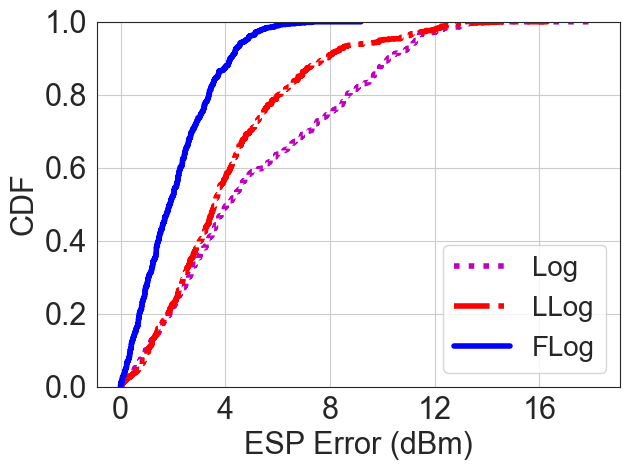

In [65]:

x_label = "ESP Error (dBm)"
plt.xlabel(x_label, size=label_size)
y_label = "CDF"
plt.ylabel(y_label, size=label_size)
plt.xticks(np.arange(0, 24, 4), size=ticks_size)
plt.yticks(size=ticks_size)
sns.ecdfplot(data=err_log, label="Log", linewidth=linewidth_t, linestyle='dotted', color = "m")
sns.ecdfplot(data=err_llog, label="LLog", linewidth=linewidth_t, linestyle='dashdot', color = "r")
sns.ecdfplot(data=err_flog2, label="FLog", linewidth=linewidth_t, linestyle='solid', color = "b")

plt.legend(loc="lower right",ncol=1, prop={'size': legend_size})
fig_path = "fig/ESP_error_cdf" +".pdf"
pdf = PdfPages(fig_path)
plt.grid()
plt.tight_layout()
pdf.savefig(dpi=2000)
plt.show()
pdf.close()
plt.close()

In [69]:
print(err_log_value/70, err_llog_value/70, err_flog2_value/70)

4.960757981520268 4.396844475864579 2.844729732601166


In [70]:
(4.96396390507993 - 2.8456556114551597) / 4.96396390507993

0.42673724751644043

In [71]:
(4.389887487478107 - 2.8456556114551597) / 4.389887487478107

0.3517702630028165

# All other methods evaluation:

In [73]:
err_ok_sm = []
err_ok_l = []
err_wei = []
err_itur = []
err_cost = []
all_data = pd.concat(dataset)

for index, row in all_data.iterrows():
    err_wei.append(abs(22 - (40*math.log10(row["d"]) + 1.33*math.pow(0.9043, 0.284)*math.pow(row["d"], 0.588)) - row["ESP"]))
    err_itur.append(abs(22 - (0.2*math.pow(904.3, 0.3)*math.pow(row["d"],0.6)) - row["ESP"]))
    err_cost.append(abs(22 - (15.6*math.pow(904.3, -0.009)*math.pow(row["d"],0.26)) - row["ESP"]))
    ahm_sm = (1.1 * math.log10(904.3) - 0.7)* 0.45 - (1.56 *  math.log10(904.3) + 0.8)
    ahm_l = 3.2 * (math.log10(11.75 * 0.45))**2 - 4.97
    err_ok_sm.append(abs((22 - (69.55 + 26.16 * math.log(904.3, 10) - 13.82 *  math.log10(20*(row["i"] + 1)/1000) - ahm_sm + (44.9 - 6.55 * math.log10(10)) * math.log10(20*(row["i"] + 1)/1000))) - row["ESP"]))
    err_ok_l.append(abs((22 - (69.55 + 26.16 * math.log(904.3, 10) - 13.82 *  math.log10(20*(row["i"] + 1)/1000) - ahm_l + (44.9 - 6.55 * math.log10(10)) * math.log10(20*(row["i"] + 1)/1000))) - row["ESP"]))
    
print("Errors of other methods:",
      "Weissberger:", sum(err_wei) / float(len(err_wei)),
      "ITU-R:", sum(err_itur) / float(len(err_itur)),
      "COST235:", sum(err_cost) / float(len(err_cost)),
      "O-H small town:", sum(err_ok_sm) / float(len(err_ok_sm)), 
      "O-H large city:", sum(err_ok_l) / float(len(err_ok_l)))


Errors of other methods: Weissberger: 41.51764310319872 ITU-R: 111.7390077720259 COST235: 87.92222060535589 O-H small town: 12.785290054395775 O-H large city: 13.44019176820634
